In [199]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [200]:
%matplotlib inline

In [201]:
main_df = pd.read_csv('PA1_train.csv.xls')

In [202]:
main_df.head()

dummy          id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      1  3066410850   7/9/2014         4       2.50         2720     10006   
1      1  9345400350  7/18/2014         2       2.50         2600      5000   
2      1  7128300060   7/7/2014         5       1.75         1650      3000   
3      1  2155500030  4/28/2015         4       1.75         1720      9600   
4      1  3999300080   9/4/2014         6       2.25         3830     11180   

   floors  waterfront  view   ...    sqft_above  sqft_basement  yr_built  \
0     2.0           0     0   ...          2720              0      1989   
1     1.0           0     0   ...          1300           1300      1926   
2     1.5           0     0   ...          1650              0      1902   
3     1.0           0     0   ...          1720              0      1969   
4     1.0           0     2   ...          2440           1390      1962   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  
0             0    98074  47.6295 -122.042           2720       10759  5.9495  
1             0    98126  47.5806 -122.379           2260        5000  6.6500  
2             0    98144  47.5955 -122.306           1740        4000  4.4300  
3             0    98059  47.4764 -122.155           1660       10720  3.8000  
4             0    98008  47.5849 -122.113           2500       10400  8.8700  

[5 rows x 22 columns]

In [203]:
main_df.isnull().any()

dummy            False
id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

In [204]:
main_df.isna().any()

dummy            False
id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

In [205]:
main_df.columns

Index(['dummy', 'id', 'date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [206]:
print(len(main_df.columns))

22


In [207]:
df = main_df.drop(['dummy','id'],1) #dropped dummy variable and id

In [208]:
df['date'] = pd.to_datetime(main_df['date'])

In [209]:
df['month'] = df['date'].apply(lambda x:x.month)

In [210]:
df['year'] =  df['date'].apply(lambda x:x.year)
df['day'] = df['date'].apply(lambda x:x.day)

In [211]:
df.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'month', 'year', 'day'],
      dtype='object')

In [212]:
df.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean       3.375200      2.118875   2080.223200  1.508920e+04      1.503700   
std        0.943246      0.765128    911.334358  4.120389e+04      0.542647   
min        1.000000      0.500000    370.000000  5.720000e+02      1.000000   
25%        3.000000      1.750000   1430.000000  5.035500e+03      1.000000   
50%        3.000000      2.250000   1920.000000  7.620000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.075050e+04      2.000000   
max       33.000000      7.750000   9890.000000  1.651359e+06      3.500000   

         waterfront          view    condition        grade    sqft_above  \
count  10000.000000  10000.000000  10000.00000  10000.00000  10000.000000   
mean       0.007000      0.229400      3.40910      7.67320   1793.099300   
std        0.083377      0.755932      0.65359      1.18006    830.865434   
min        0.000000      0.000000      1.00000      4.00000    370.000000   
25%        0.000000      0.000000      3.00000      7.00000   1190.000000   
50%        0.000000      0.000000      3.00000      7.00000   1560.000000   
75%        0.000000      0.000000      4.00000      8.00000   2230.000000   
max        1.000000      4.000000      5.00000     13.00000   8860.000000   

           ...       yr_renovated       zipcode           lat          long  \
count      ...       10000.000000  10000.000000  10000.000000  10000.000000   
mean       ...          81.226700  98078.293100     47.559814   -122.213287   
std        ...         394.379804     53.518391      0.138651      0.141405   
min        ...           0.000000  98001.000000     47.155900   -122.514000   
25%        ...           0.000000  98033.000000     47.470200   -122.328000   
50%        ...           0.000000  98065.000000     47.571300   -122.230000   
75%        ...           0.000000  98117.250000     47.677400   -122.125000   
max        ...        2015.000000  98199.000000     47.777600   -121.319000   

       sqft_living15     sqft_lot15         price         month          year  \
count   10000.000000   10000.000000  10000.000000  10000.000000  10000.000000   
mean     1994.326100   12746.323400      5.385297      6.592400   2014.318500   
std       691.900301   28241.243043      3.573901      3.111435      0.465918   
min       460.000000     660.000000      0.820000      1.000000   2014.000000   
25%      1490.000000    5092.000000      3.250000      4.000000   2014.000000   
50%      1850.000000    7620.000000      4.500000      6.000000   2014.000000   
75%      2380.000000   10095.750000      6.481880      9.000000   2015.000000   
max      6110.000000  871200.000000     68.900000     12.000000   2015.000000   

                day  
count  10000.000000  
mean      15.802100  
std        8.621761  
min        1.000000  
25%        8.000000  
50%       16.000000  
75%       23.000000  
max       31.000000  

[8 rows x 22 columns]

In [213]:
df = df.drop(['date'],1)
print(df.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'month', 'year', 'day'],
      dtype='object')


In [214]:
print(len(df.columns))

22


In [215]:
df.corr()

bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
bedrooms       1.000000   0.492908     0.566724  0.026586  0.171673   
bathrooms      0.492908   1.000000     0.753826  0.077894  0.514202   
sqft_living    0.566724   0.753826     1.000000  0.172406  0.359159   
sqft_lot       0.026586   0.077894     0.172406  1.000000 -0.003914   
floors         0.171673   0.514202     0.359159 -0.003914  1.000000   
waterfront    -0.009237   0.044960     0.080323  0.030918  0.019322   
view           0.082935   0.189175     0.281434  0.093269  0.032063   
condition      0.027587  -0.132256    -0.059997 -0.007812 -0.263973   
grade          0.345664   0.665506     0.764640  0.111763  0.463397   
sqft_above     0.468981   0.688100     0.879322  0.185731  0.525619   
sqft_basement  0.291525   0.264985     0.415481  0.006441 -0.251502   
yr_built       0.153975   0.515811     0.325948  0.053269  0.491236   
yr_renovated   0.011714   0.028823     0.030222  0.008237 -0.001851   
zipcode       -0.151854  -0.204217    -0.199869 -0.127988 -0.064221   
lat           -0.014800   0.014722     0.037184 -0.091396  0.047280   
long           0.135611   0.230576     0.252701  0.221079  0.133802   
sqft_living15  0.387012   0.575767     0.767427  0.145951  0.285700   
sqft_lot15     0.025704   0.087405     0.187928  0.766928 -0.014699   
price          0.304994   0.524480     0.693156  0.090327  0.265757   
month         -0.008508   0.001503     0.002517 -0.011095  0.021210   
year          -0.001368  -0.021985    -0.020675  0.006196 -0.029582   
day            0.001814   0.003108    -0.004228  0.010307  0.004475   

               waterfront      view  condition     grade  sqft_above  \
bedrooms        -0.009237  0.082935   0.027587  0.345664    0.468981   
bathrooms        0.044960  0.189175  -0.132256  0.665506    0.688100   
sqft_living      0.080323  0.281434  -0.059997  0.764640    0.879322   
sqft_lot         0.030918  0.093269  -0.007812  0.111763    0.185731   
floors           0.019322  0.032063  -0.263973  0.463397    0.525619   
waterfront       1.000000  0.387081   0.026360  0.056796    0.060511   
view             0.387081  1.000000   0.054153  0.250313    0.168429   
condition        0.026360  0.054153   1.000000 -0.139661   -0.154599   
grade            0.056796  0.250313  -0.139661  1.000000    0.758138   
sqft_above       0.060511  0.168429  -0.154599  0.758138    1.000000   
sqft_basement    0.052698  0.267902   0.169593  0.153864   -0.067837   
yr_built        -0.037503 -0.054604  -0.371877  0.448902    0.430545   
yr_renovated     0.061097  0.091935  -0.056667  0.002488    0.005719   
zipcode          0.039637  0.077631   0.015185 -0.192635   -0.265109   
lat             -0.019403 -0.003251  -0.000121  0.109004   -0.012607   
long            -0.048597 -0.072904  -0.117979  0.218135    0.357767   
sqft_living15    0.075997  0.273224  -0.095066  0.719191    0.743508   
sqft_lot15       0.023875  0.073885  -0.003873  0.123551    0.199800   
price            0.222654  0.392961   0.051306  0.671957    0.605777   
month            0.009457 -0.003188   0.009614  0.012392    0.009980   
year            -0.008483 -0.004157  -0.026268 -0.034950   -0.023068   
day              0.012640  0.004910  -0.006680 -0.009886    0.001827   

                 ...     yr_renovated   zipcode       lat      long  \
bedrooms         ...         0.011714 -0.151854 -0.014800  0.135611   
bathrooms        ...         0.028823 -0.204217  0.014722  0.230576   
sqft_living      ...         0.030222 -0.199869  0.037184  0.252701   
sqft_lot         ...         0.008237 -0.127988 -0.091396  0.221079   
floors           ...        -0.001851 -0.064221  0.047280  0.133802   
waterfront       ...         0.061097  0.039637 -0.019403 -0.048597   
view             ...         0.091935  0.077631 -0.003251 -0.072904   
condition        ...        -0.056667  0.015185 -0.000121 -0.117979   
grade            ...         0.002488 -0.192635  0.109004  0.218135   
sqft_above    

In [216]:
before_normalization_corr=df.corr()['price']
(before_normalization_corr.sort_values())

zipcode         -0.048750
day             -0.024775
month           -0.008468
year             0.001692
long             0.025544
condition        0.051306
yr_built         0.057532
sqft_lot15       0.085476
sqft_lot         0.090327
yr_renovated     0.095046
waterfront       0.222654
floors           0.265757
sqft_basement    0.295117
bedrooms         0.304994
lat              0.307248
view             0.392961
bathrooms        0.524480
sqft_living15    0.589190
sqft_above       0.605777
grade            0.671957
sqft_living      0.693156
price            1.000000
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002229B46E908>,
      dtype=object)

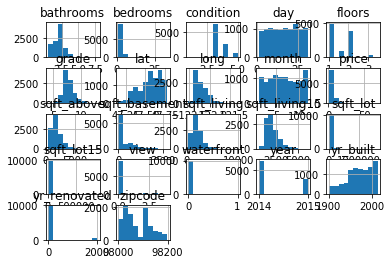

In [217]:

df.hist()

In [218]:
features = before_normalization_corr.keys()
print(len(features))
imprtant_features = [x for x in features if abs(before_normalization_corr[x])>0.1]

22


In [219]:
print(imprtant_features,len(imprtant_features))

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15', 'price'] 12


In [220]:
df = df[imprtant_features]
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15',
       'price'],
      dtype='object')

In [221]:
y_train = df['price'] #y_train will contain predictor values for training set

In [222]:
y_train.value_counts().head()

3.25    84
3.50    81
4.50    80
4.25    76
4.00    71
Name: price, dtype: int64

In [223]:
df = df.drop(['price'],1) #dropped price from training data as its not needed in it
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

In [224]:
df.head()

bedrooms  bathrooms  sqft_living  floors  waterfront  view  grade  \
0         4       2.50         2720     2.0           0     0      9   
1         2       2.50         2600     1.0           0     0      8   
2         5       1.75         1650     1.5           0     0      8   
3         4       1.75         1720     1.0           0     0      8   
4         6       2.25         3830     1.0           0     2      9   

   sqft_above  sqft_basement      lat  sqft_living15  
0        2720              0  47.6295           2720  
1        1300           1300  47.5806           2260  
2        1650              0  47.5955           1740  
3        1720              0  47.4764           1660  
4        2440           1390  47.5849           2500

In [225]:
df.bedrooms.value_counts()

3     4489
4     3269
2     1282
5      730
6      117
1       90
7       14
9        3
8        3
11       1
10       1
33       1
Name: bedrooms, dtype: int64

In [226]:
df.isnull().any()

bedrooms         False
bathrooms        False
sqft_living      False
floors           False
waterfront       False
view             False
grade            False
sqft_above       False
sqft_basement    False
lat              False
sqft_living15    False
dtype: bool

In [227]:
df.isna().any()

bedrooms         False
bathrooms        False
sqft_living      False
floors           False
waterfront       False
view             False
grade            False
sqft_above       False
sqft_basement    False
lat              False
sqft_living15    False
dtype: bool

In [228]:
(df['view'].mean())

0.2294

In [229]:
for feature in df.columns:
    mn = df[feature].min()
    rnge = df[feature].max() - df[feature].min()
    df[feature] = df[feature].apply(lambda x : (x-mn)/rnge)

In [230]:
df.describe()

bedrooms     bathrooms   sqft_living        floors    waterfront  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.074225      0.223293      0.179645      0.201480      0.007000   
std        0.029476      0.105535      0.095728      0.217059      0.083377   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.062500      0.172414      0.111345      0.000000      0.000000   
50%        0.062500      0.241379      0.162815      0.200000      0.000000   
75%        0.093750      0.275862      0.228992      0.400000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               view         grade    sqft_above  sqft_basement           lat  \
count  10000.000000  10000.000000  10000.000000   10000.000000  10000.000000   
mean       0.057350      0.408133      0.167621       0.105560      0.649693   
std        0.188983      0.131118      0.097864       0.159928      0.223018   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%        0.000000      0.333333      0.096584       0.000000      0.505549   
50%        0.000000      0.333333      0.140165       0.000000      0.668168   
75%        0.000000      0.444444      0.219081       0.202206      0.838829   
max        1.000000      1.000000      1.000000       1.000000      1.000000   

       sqft_living15  
count   10000.000000  
mean        0.271562  
std         0.122460  
min         0.000000  
25%         0.182301  
50%         0.246018  
75%         0.339823  
max         1.000000

In [231]:
df.head()

bedrooms  bathrooms  sqft_living  floors  waterfront  view     grade  \
0   0.09375   0.275862     0.246849     0.4         0.0   0.0  0.555556   
1   0.03125   0.275862     0.234244     0.0         0.0   0.0  0.444444   
2   0.12500   0.172414     0.134454     0.2         0.0   0.0  0.444444   
3   0.09375   0.172414     0.141807     0.0         0.0   0.0  0.444444   
4   0.15625   0.241379     0.363445     0.0         0.0   0.5  0.555556   

   sqft_above  sqft_basement       lat  sqft_living15  
0    0.276796       0.000000  0.761782       0.400000  
1    0.109541       0.477941  0.683127       0.318584  
2    0.150766       0.000000  0.707093       0.226549  
3    0.159011       0.000000  0.515522       0.212389  
4    0.243816       0.511029  0.690043       0.361062

In [232]:
ln=[]
for exp in range(-2,8):
    ln.append(10**(-exp))
learning_rate = np.array(ln)
print(learning_rate)

[1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]


In [233]:
df['dummy'] = main_df['dummy']

In [234]:
df.head()

bedrooms  bathrooms  sqft_living  floors  waterfront  view     grade  \
0   0.09375   0.275862     0.246849     0.4         0.0   0.0  0.555556   
1   0.03125   0.275862     0.234244     0.0         0.0   0.0  0.444444   
2   0.12500   0.172414     0.134454     0.2         0.0   0.0  0.444444   
3   0.09375   0.172414     0.141807     0.0         0.0   0.0  0.444444   
4   0.15625   0.241379     0.363445     0.0         0.0   0.5  0.555556   

   sqft_above  sqft_basement       lat  sqft_living15  dummy  
0    0.276796       0.000000  0.761782       0.400000      1  
1    0.109541       0.477941  0.683127       0.318584      1  
2    0.150766       0.000000  0.707093       0.226549      1  
3    0.159011       0.000000  0.515522       0.212389      1  
4    0.243816       0.511029  0.690043       0.361062      1

In [235]:
df.shape[0]

10000

In [236]:
import math
def norm_cal(a,b):
    s = sum(a*b)
    #print('called',a)
    return s
#norm_cal(np.array([1,3]),np.array([2,4]))
        

In [237]:
((df.iloc[0]))

bedrooms         0.093750
bathrooms        0.275862
sqft_living      0.246849
floors           0.400000
waterfront       0.000000
view             0.000000
grade            0.555556
sqft_above       0.276796
sqft_basement    0.000000
lat              0.761782
sqft_living15    0.400000
dummy            1.000000
Name: 0, dtype: float64

In [238]:
# mn = min(y_train)
# mx = max(y_train)
# y_train=y_train.apply(lambda x:(x-mn)/(mx-mn))

In [239]:
y_train.head()

0    5.9495
1    6.6500
2    4.4300
3    3.8000
4    8.8700
Name: price, dtype: float64

In [240]:
final_weights = np.array([0]*12)
final_weights 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [241]:
sse_for_each_iter = []
def sse_for_iter(weight):
    main_sse = 0
    for i in range(df.shape[0]):
        instance = np.array(df.iloc[i])
        predicted = norm_cal(instance,weight)
        actual = y_train[i]
        error = predicted - actual
        error = error**2
        main_sse = main_sse+ error
    sse_for_each_iter.append(main_sse)

In [242]:

for lmbda in [0.0001]:
    weight = np.array(np.random.randn(1,12)[0])
    #print('weight is',weight)
    #print(weight)
    ##### calculate for current iteration
    number_of_iteration = 0
    c = 1
    while True:
        gradient = np.array(np.zeros(12))
        #print('this is the default gradient',gradient)
        for i in range(df.shape[0]):
            ith_data_instance = np.array(df.iloc[i])
            predicted_y = norm_cal(ith_data_instance,weight)
            #print('predicted y',predicted_y)
            actual_y = y_train[i]
            diff = predicted_y -actual_y
            weighted_sum = diff*ith_data_instance
            #print('weighted sum for each iteration',weighted_sum)
            gradient = gradient + weighted_sum
            #print('updated gradient',gradient)
            
        weight = weight - lmbda*gradient
        sse_for_iter(weight)
 
        print('number of iteration',number_of_iteration,math.sqrt(norm_cal(gradient,gradient)),sse_for_each_iter[number_of_iteration])
    
        number_of_iteration = number_of_iteration + 1
        if(math.sqrt(norm_cal(gradient,gradient))<=0.5):
            final_weights = weight
            break
        if number_of_iteration==c*100:
            print('number of iteration',number_of_iteration,math.sqrt(norm_cal(gradient,gradient)))
            c = c + 1
    print(number_of_iteration)
        
            


number of iteration 0 67386.55577292037 280283.73140880273
number of iteration 1 58064.55840175164 229032.0363156373
number of iteration 2 50038.839444712175 190283.1808582502
number of iteration 3 43129.4832100425 160878.4718746095
number of iteration 4 37181.568116138995 138467.88689429013
number of iteration 5 32061.695890075218 121301.92023243017
number of iteration 6 27655.00268610319 108077.13163976216
number of iteration 7 23862.585147740203 97821.52861402


KeyboardInterrupt: 

In [ ]:
#calculate sse:
sse_for_lambda = 0
for i in range(df.shape[0]):
    instance = np.array(df.iloc[i])
    predicted = norm_cal(instance,final_weight)
    actual = y_train[i]
    error = predicted - actual
    error = error**2
    sse_for_lambda = sse_for_lambda + error
    

In [ ]:
sse_for_lambda 

In [198]:
a=np.array([[4,2],[1,3]])
b= np.array([2,1])
np.transpose(a)
a
b.dot(b)

5

In [248]:

for lr in [0.00001]:
    weight = np.array(np.random.randn(1,12)[0])
    #print('weight is',weight)
    #print(weight)
    ##### calculate for current iteration
    number_of_iteration = 0
    c = 1
    while True:
        gradient = (np.transpose(df)).dot(df.dot(weight)-y_train)
        
        weight = weight - lr*gradient
        
 
        print('number of iteration',gradient.shape,number_of_iteration,math.sqrt(gradient.dot(gradient)))
    
        number_of_iteration = number_of_iteration + 1
        if(math.sqrt(gradient.dot(gradient))<=0.5):
            final_weights = weight
            break
        if number_of_iteration==c*100:
            print('number of iteration',number_of_iteration,math.sqrt(norm_cal(gradient,gradient)))
            c = c + 1
    print(number_of_iteration)
        
            


number of iteration (12,) 0 92036.11368936881
number of iteration (12,) 1 74959.90268634933
number of iteration (12,) 2 61073.15812026361
number of iteration (12,) 3 49784.697228220946
number of iteration (12,) 4 40613.84973458416
number of iteration (12,) 5 33169.96620253855
number of iteration (12,) 6 27135.734334300752
number of iteration (12,) 7 22253.57762894471
number of iteration (12,) 8 18314.53337801016
number of iteration (12,) 9 15149.102350805893
number of iteration (12,) 10 12619.639680090453
number of iteration (12,) 11 10613.931392252427
number of iteration (12,) 12 9039.699321678238
number of iteration (12,) 13 7819.9243618355995
number of iteration (12,) 14 6889.0637316043385
number of iteration (12,) 15 6190.3683979970265
number of iteration (12,) 16 5674.430339513319
number of iteration (12,) 17 5298.7665178174975
number of iteration (12,) 18 5027.899115314429
number of iteration (12,) 19 4833.330739005448
number of iteration (12,) 20 4693.083468651104
number of iter

number of iteration (12,) 172 2238.1195661906277
number of iteration (12,) 173 2229.0459160663568
number of iteration (12,) 174 2220.022571685909
number of iteration (12,) 175 2211.0492171223436
number of iteration (12,) 176 2202.125538480521
number of iteration (12,) 177 2193.2512238845115
number of iteration (12,) 178 2184.4259634650757
number of iteration (12,) 179 2175.6494493472146
number of iteration (12,) 180 2166.9213756378076
number of iteration (12,) 181 2158.2414384133017
number of iteration (12,) 182 2149.6093357075097
number of iteration (12,) 183 2141.024767499438
number of iteration (12,) 184 2132.487435701232
number of iteration (12,) 185 2123.997044146156
number of iteration (12,) 186 2115.5532985766713
number of iteration (12,) 187 2107.155906632571
number of iteration (12,) 188 2098.804577839197
number of iteration (12,) 189 2090.499023595711
number of iteration (12,) 190 2082.238957163459
number of iteration (12,) 191 2074.0240936543787
number of iteration (12,) 192

number of iteration (12,) 372 1114.318058810968
number of iteration (12,) 373 1111.0310913534813
number of iteration (12,) 374 1107.7590377399524
number of iteration (12,) 375 1104.5018129123148
number of iteration (12,) 376 1101.2593323692552
number of iteration (12,) 377 1098.0315121624494
number of iteration (12,) 378 1094.81826889281
number of iteration (12,) 379 1091.619519706763
number of iteration (12,) 380 1088.4351822925482
number of iteration (12,) 381 1085.2651748765447
number of iteration (12,) 382 1082.109416219614
number of iteration (12,) 383 1078.967825613475
number of iteration (12,) 384 1075.8403228770933
number of iteration (12,) 385 1072.7268283530977
number of iteration (12,) 386 1069.6272629042244
number of iteration (12,) 387 1066.5415479097724
number of iteration (12,) 388 1063.469605262093
number of iteration (12,) 389 1060.4113573630952
number of iteration (12,) 390 1057.3667271207778
number of iteration (12,) 391 1054.335637945776
number of iteration (12,) 39

number of iteration (12,) 570 673.0836650324173
number of iteration (12,) 571 671.6146401141488
number of iteration (12,) 572 670.1509543680389
number of iteration (12,) 573 668.6925830709348
number of iteration (12,) 574 667.2395016416012
number of iteration (12,) 575 665.7916856397528
number of iteration (12,) 576 664.3491107651066
number of iteration (12,) 577 662.9117528564325
number of iteration (12,) 578 661.4795878906115
number of iteration (12,) 579 660.0525919817065
number of iteration (12,) 580 658.6307413800328
number of iteration (12,) 581 657.2140124712381
number of iteration (12,) 582 655.8023817753899
number of iteration (12,) 583 654.3958259460723
number of iteration (12,) 584 652.9943217694816
number of iteration (12,) 585 651.5978461635343
number of iteration (12,) 586 650.2063761769812
number of iteration (12,) 587 648.8198889885302
number of iteration (12,) 588 647.4383619059623
number of iteration (12,) 589 646.0617723652772
number of iteration (12,) 590 644.690097

number of iteration (12,) 757 470.3027696943419
number of iteration (12,) 758 469.51729621510526
number of iteration (12,) 759 468.73424641533626
number of iteration (12,) 760 467.95361093224824
number of iteration (12,) 761 467.17538044651036
number of iteration (12,) 762 466.39954568199295
number of iteration (12,) 763 465.62609740552523
number of iteration (12,) 764 464.85502642664966
number of iteration (12,) 765 464.086323597373
number of iteration (12,) 766 463.3199798119295
number of iteration (12,) 767 462.5559860065363
number of iteration (12,) 768 461.7943331591566
number of iteration (12,) 769 461.0350122892631
number of iteration (12,) 770 460.2780144575984
number of iteration (12,) 771 459.5233307659453
number of iteration (12,) 772 458.7709523568926
number of iteration (12,) 773 458.0208704136031
number of iteration (12,) 774 457.27307615958455
number of iteration (12,) 775 456.52756085846516
number of iteration (12,) 776 455.7843158137623
number of iteration (12,) 777 45

number of iteration (12,) 950 354.56950928363784
number of iteration (12,) 951 354.1185580437217
number of iteration (12,) 952 353.6688088989224
number of iteration (12,) 953 353.22025772427577
number of iteration (12,) 954 352.7729004109697
number of iteration (12,) 955 352.3267328662706
number of iteration (12,) 956 351.8817510134465
number of iteration (12,) 957 351.43795079169877
number of iteration (12,) 958 350.9953281560859
number of iteration (12,) 959 350.55387907745484
number of iteration (12,) 960 350.1135995423663
number of iteration (12,) 961 349.67448555302593
number of iteration (12,) 962 349.2365331272136
number of iteration (12,) 963 348.79973829821
number of iteration (12,) 964 348.3640971147294
number of iteration (12,) 965 347.9296056408513
number of iteration (12,) 966 347.49625995594675
number of iteration (12,) 967 347.0640561546135
number of iteration (12,) 968 346.6329903466049
number of iteration (12,) 969 346.20305865676346
number of iteration (12,) 970 345.7

number of iteration (12,) 1118 292.9207946208924
number of iteration (12,) 1119 292.6244743899359
number of iteration (12,) 1120 292.3288434331355
number of iteration (12,) 1121 292.0338995542961
number of iteration (12,) 1122 291.7396405651429
number of iteration (12,) 1123 291.4460642852885
number of iteration (12,) 1124 291.1531685422013
number of iteration (12,) 1125 290.86095117117515
number of iteration (12,) 1126 290.56941001530026
number of iteration (12,) 1127 290.2785429254264
number of iteration (12,) 1128 289.98834776013996
number of iteration (12,) 1129 289.69882238572654
number of iteration (12,) 1130 289.40996467614366
number of iteration (12,) 1131 289.12177251299096
number of iteration (12,) 1132 288.8342437854789
number of iteration (12,) 1133 288.54737639039763
number of iteration (12,) 1134 288.26116823208923
number of iteration (12,) 1135 287.9756172224155
number of iteration (12,) 1136 287.69072128073225
number of iteration (12,) 1137 287.4064783338544
number of i

number of iteration (12,) 1285 251.53402193909244
number of iteration (12,) 1286 251.32754961667743
number of iteration (12,) 1287 251.12148937161638
number of iteration (12,) 1288 250.915839982859
number of iteration (12,) 1289 250.71060023352948
number of iteration (12,) 1290 250.5057689109143
number of iteration (12,) 1291 250.30134480644531
number of iteration (12,) 1292 250.09732671568372
number of iteration (12,) 1293 249.8937134383085
number of iteration (12,) 1294 249.69050377809546
number of iteration (12,) 1295 249.48769654290658
number of iteration (12,) 1296 249.28529054467324
number of iteration (12,) 1297 249.08328459938102
number of iteration (12,) 1298 248.88167752705525
number of iteration (12,) 1299 248.6804681517452
number of iteration 1300 248.6804681517452
number of iteration (12,) 1300 248.47965530151046
number of iteration (12,) 1301 248.2792378084066
number of iteration (12,) 1302 248.07921450846663
number of iteration (12,) 1303 247.87958424169204
number of ite

number of iteration (12,) 1475 218.52198611341015
number of iteration (12,) 1476 218.37587636634836
number of iteration (12,) 1477 218.23000706559628
number of iteration (12,) 1478 218.08437756328377
number of iteration (12,) 1479 217.93898721363684
number of iteration (12,) 1480 217.79383537297292
number of iteration (12,) 1481 217.64892139969461
number of iteration (12,) 1482 217.50424465427827
number of iteration (12,) 1483 217.35980449927078
number of iteration (12,) 1484 217.2156002992808
number of iteration (12,) 1485 217.07163142097008
number of iteration (12,) 1486 216.92789723304847
number of iteration (12,) 1487 216.78439710626512
number of iteration (12,) 1488 216.64113041340167
number of iteration (12,) 1489 216.49809652926632
number of iteration (12,) 1490 216.3552948306836
number of iteration (12,) 1491 216.21272469649094
number of iteration (12,) 1492 216.0703855075287
number of iteration (12,) 1493 215.92827664663463
number of iteration (12,) 1494 215.7863974986376
numb

number of iteration (12,) 1662 194.77776265614412
number of iteration (12,) 1663 194.66727843506885
number of iteration (12,) 1664 194.5569432414145
number of iteration (12,) 1665 194.44675671583232
number of iteration (12,) 1666 194.33671850007113
number of iteration (12,) 1667 194.2268282369723
number of iteration (12,) 1668 194.1170855704666
number of iteration (12,) 1669 194.00749014556968
number of iteration (12,) 1670 193.8980416083798
number of iteration (12,) 1671 193.78873960607302
number of iteration (12,) 1672 193.67958378690025
number of iteration (12,) 1673 193.57057380018267
number of iteration (12,) 1674 193.46170929630884
number of iteration (12,) 1675 193.3529899267316
number of iteration (12,) 1676 193.2444153439633
number of iteration (12,) 1677 193.1359852015726
number of iteration (12,) 1678 193.02769915418136
number of iteration (12,) 1679 192.91955685746143
number of iteration (12,) 1680 192.81155796812828
number of iteration (12,) 1681 192.70370214394313
number 

number of iteration (12,) 1830 178.05960005714616
number of iteration (12,) 1831 177.9698565094377
number of iteration (12,) 1832 177.88021449955147
number of iteration (12,) 1833 177.79067380923667
number of iteration (12,) 1834 177.70123422087002
number of iteration (12,) 1835 177.61189551745267
number of iteration (12,) 1836 177.52265748260893
number of iteration (12,) 1837 177.43351990058437
number of iteration (12,) 1838 177.3444825562442
number of iteration (12,) 1839 177.25554523506912
number of iteration (12,) 1840 177.16670772315587
number of iteration (12,) 1841 177.0779698072148
number of iteration (12,) 1842 176.98933127456576
number of iteration (12,) 1843 176.9007919131379
number of iteration (12,) 1844 176.8123515114692
number of iteration (12,) 1845 176.72400985870001
number of iteration (12,) 1846 176.63576674457562
number of iteration (12,) 1847 176.5476219594427
number of iteration (12,) 1848 176.45957529424598
number of iteration (12,) 1849 176.371626540528
number o

number of iteration (12,) 2006 163.6552432265637
number of iteration (12,) 2007 163.58049928875164
number of iteration (12,) 2008 163.50582655888394
number of iteration (12,) 2009 163.43122490319078
number of iteration (12,) 2010 163.3566941882612
number of iteration (12,) 2011 163.28223428103973
number of iteration (12,) 2012 163.20784504883
number of iteration (12,) 2013 163.1335263592883
number of iteration (12,) 2014 163.0592780804259
number of iteration (12,) 2015 162.98510008060717
number of iteration (12,) 2016 162.91099222854797
number of iteration (12,) 2017 162.83695439331544
number of iteration (12,) 2018 162.76298644432566
number of iteration (12,) 2019 162.68908825134358
number of iteration (12,) 2020 162.6152596844822
number of iteration (12,) 2021 162.54150061419986
number of iteration (12,) 2022 162.46781091130137
number of iteration (12,) 2023 162.3941904469356
number of iteration (12,) 2024 162.3206390925942
number of iteration (12,) 2025 162.2471567201111
number of i

number of iteration (12,) 2175 151.9393315617612
number of iteration (12,) 2176 151.87497333014204
number of iteration (12,) 2177 151.81066802071297
number of iteration (12,) 2178 151.74641554709845
number of iteration (12,) 2179 151.68221582313762
number of iteration (12,) 2180 151.61806876288526
number of iteration (12,) 2181 151.55397428060772
number of iteration (12,) 2182 151.4899322907864
number of iteration (12,) 2183 151.425942708114
number of iteration (12,) 2184 151.36200544749553
number of iteration (12,) 2185 151.29812042404623
number of iteration (12,) 2186 151.2342875530932
number of iteration (12,) 2187 151.17050675017197
number of iteration (12,) 2188 151.10677793102914
number of iteration (12,) 2189 151.0431010116187
number of iteration (12,) 2190 150.97947590810293
number of iteration (12,) 2191 150.91590253685158
number of iteration (12,) 2192 150.85238081444177
number of iteration (12,) 2193 150.78891065765637
number of iteration (12,) 2194 150.7254919834836
number 

number of iteration (12,) 2360 140.85328392990465
number of iteration (12,) 2361 140.79744258216965
number of iteration (12,) 2362 140.74164126339625
number of iteration (12,) 2363 140.68587991801982
number of iteration (12,) 2364 140.6301584906016
number of iteration (12,) 2365 140.57447692582946
number of iteration (12,) 2366 140.51883516851674
number of iteration (12,) 2367 140.46323316360218
number of iteration (12,) 2368 140.40767085614877
number of iteration (12,) 2369 140.3521481913448
number of iteration (12,) 2370 140.2966651145027
number of iteration (12,) 2371 140.2412215710576
number of iteration (12,) 2372 140.18581750656955
number of iteration (12,) 2373 140.13045286672138
number of iteration (12,) 2374 140.07512759731813
number of iteration (12,) 2375 140.0198416442878
number of iteration (12,) 2376 139.96459495368086
number of iteration (12,) 2377 139.90938747166882
number of iteration (12,) 2378 139.85421914454585
number of iteration (12,) 2379 139.79908991872523
numbe

number of iteration (12,) 2544 131.2009510931588
number of iteration (12,) 2545 131.15165393765366
number of iteration (12,) 2546 131.1023883982941
number of iteration (12,) 2547 131.05315443778102
number of iteration (12,) 2548 131.0039520188922
number of iteration (12,) 2549 130.95478110448178
number of iteration (12,) 2550 130.9056416574797
number of iteration (12,) 2551 130.85653364089188
number of iteration (12,) 2552 130.80745701780057
number of iteration (12,) 2553 130.75841175136273
number of iteration (12,) 2554 130.70939780481174
number of iteration (12,) 2555 130.66041514145525
number of iteration (12,) 2556 130.61146372467633
number of iteration (12,) 2557 130.56254351793228
number of iteration (12,) 2558 130.5136544847553
number of iteration (12,) 2559 130.4647965887526
number of iteration (12,) 2560 130.4159697936044
number of iteration (12,) 2561 130.36717406306587
number of iteration (12,) 2562 130.3184093609647
number of iteration (12,) 2563 130.26967565120404
number o

number of iteration (12,) 2729 122.58365865049596
number of iteration (12,) 2730 122.53964651565046
number of iteration (12,) 2731 122.49566021492355
number of iteration (12,) 2732 122.4516997222767
number of iteration (12,) 2733 122.40776501171892
number of iteration (12,) 2734 122.36385605730621
number of iteration (12,) 2735 122.31997283314288
number of iteration (12,) 2736 122.27611531337875
number of iteration (12,) 2737 122.23228347221259
number of iteration (12,) 2738 122.1884772838891
number of iteration (12,) 2739 122.14469672269999
number of iteration (12,) 2740 122.1009417629842
number of iteration (12,) 2741 122.05721237912748
number of iteration (12,) 2742 122.01350854556011
number of iteration (12,) 2743 121.96983023676201
number of iteration (12,) 2744 121.92617742725648
number of iteration (12,) 2745 121.8825500916149
number of iteration (12,) 2746 121.83894820445325
number of iteration (12,) 2747 121.7953717404353
number of iteration (12,) 2748 121.75182067426877
numbe

number of iteration (12,) 2905 115.21380293241735
number of iteration (12,) 2906 115.17397493490037
number of iteration (12,) 2907 115.13416882722558
number of iteration (12,) 2908 115.09438459016695
number of iteration (12,) 2909 115.05462220452775
number of iteration (12,) 2910 115.01488165114347
number of iteration (12,) 2911 114.97516291087949
number of iteration (12,) 2912 114.93546596463312
number of iteration (12,) 2913 114.89579079333267
number of iteration (12,) 2914 114.85613737793497
number of iteration (12,) 2915 114.8165056994302
number of iteration (12,) 2916 114.7768957388374
number of iteration (12,) 2917 114.73730747720629
number of iteration (12,) 2918 114.69774089561767
number of iteration (12,) 2919 114.65819597518211
number of iteration (12,) 2920 114.6186726970408
number of iteration (12,) 2921 114.57917104236456
number of iteration (12,) 2922 114.53969099235559
number of iteration (12,) 2923 114.50023252824447
number of iteration (12,) 2924 114.46079563129305
num

number of iteration (12,) 3071 108.88862289061593
number of iteration (12,) 3072 108.85218650887083
number of iteration (12,) 3073 108.81576920167943
number of iteration (12,) 3074 108.77937095410536
number of iteration (12,) 3075 108.74299175123345
number of iteration (12,) 3076 108.7066315781709
number of iteration (12,) 3077 108.67029042004442
number of iteration (12,) 3078 108.63396826200383
number of iteration (12,) 3079 108.5976650892177
number of iteration (12,) 3080 108.5613808868786
number of iteration (12,) 3081 108.52511564019693
number of iteration (12,) 3082 108.48886933440669
number of iteration (12,) 3083 108.45264195476075
number of iteration (12,) 3084 108.41643348653449
number of iteration (12,) 3085 108.38024391502368
number of iteration (12,) 3086 108.34407322554415
number of iteration (12,) 3087 108.30792140343334
number of iteration (12,) 3088 108.2717884340487
number of iteration (12,) 3089 108.2356743027685
number of iteration (12,) 3090 108.19957899499208
numbe

number of iteration (12,) 3236 103.12431060897185
number of iteration (12,) 3237 103.09083381066796
number of iteration (12,) 3238 103.05737387946446
number of iteration (12,) 3239 103.02393080338534
number of iteration (12,) 3240 102.9905045704703
number of iteration (12,) 3241 102.95709516877342
number of iteration (12,) 3242 102.92370258636419
number of iteration (12,) 3243 102.8903268113265
number of iteration (12,) 3244 102.85696783175919
number of iteration (12,) 3245 102.82362563577661
number of iteration (12,) 3246 102.79030021150656
number of iteration (12,) 3247 102.7569915470935
number of iteration (12,) 3248 102.72369963069465
number of iteration (12,) 3249 102.69042445048373
number of iteration (12,) 3250 102.6571659946484
number of iteration (12,) 3251 102.62392425139043
number of iteration (12,) 3252 102.59069920892682
number of iteration (12,) 3253 102.55749085548916
number of iteration (12,) 3254 102.52429917932359
number of iteration (12,) 3255 102.49112416869113
numb

number of iteration (12,) 3406 97.66638887112767
number of iteration (12,) 3407 97.63561856587843
number of iteration (12,) 3408 97.6048632850544
number of iteration (12,) 3409 97.57412301884531
number of iteration (12,) 3410 97.54339775745184
number of iteration (12,) 3411 97.51268749108546
number of iteration (12,) 3412 97.48199220996729
number of iteration (12,) 3413 97.45131190433108
number of iteration (12,) 3414 97.4206465644198
number of iteration (12,) 3415 97.38999618048733
number of iteration (12,) 3416 97.35936074279849
number of iteration (12,) 3417 97.32874024162831
number of iteration (12,) 3418 97.29813466726245
number of iteration (12,) 3419 97.26754400999802
number of iteration (12,) 3420 97.23696826014148
number of iteration (12,) 3421 97.20640740801016
number of iteration (12,) 3422 97.17586144393212
number of iteration (12,) 3423 97.14533035824633
number of iteration (12,) 3424 97.11481414130166
number of iteration (12,) 3425 97.084312783457
number of iteration (12,

number of iteration (12,) 3597 92.05120445031211
number of iteration (12,) 3598 92.02313710463208
number of iteration (12,) 3599 91.99508308411158
number of iteration 3600 91.99508308411158
number of iteration (12,) 3600 91.96704238067915
number of iteration (12,) 3601 91.93901498626946
number of iteration (12,) 3602 91.91100089282625
number of iteration (12,) 3603 91.88300009230089
number of iteration (12,) 3604 91.85501257665175
number of iteration (12,) 3605 91.82703833784468
number of iteration (12,) 3606 91.7990773678536
number of iteration (12,) 3607 91.7711296586607
number of iteration (12,) 3608 91.74319520225401
number of iteration (12,) 3609 91.71527399063035
number of iteration (12,) 3610 91.68736601579465
number of iteration (12,) 3611 91.65947126975698
number of iteration (12,) 3612 91.63158974453835
number of iteration (12,) 3613 91.60372143216438
number of iteration (12,) 3614 91.57586632466895
number of iteration (12,) 3615 91.5480244140946
number of iteration (12,) 361

number of iteration (12,) 3797 86.69277003118711
number of iteration (12,) 3798 86.66721639673025
number of iteration (12,) 3799 86.64167461054986
number of iteration 3800 86.64167461054986
number of iteration (12,) 3800 86.61614466588729
number of iteration (12,) 3801 86.59062655598932
number of iteration (12,) 3802 86.56512027410866
number of iteration (12,) 3803 86.5396258135028
number of iteration (12,) 3804 86.51414316743661
number of iteration (12,) 3805 86.48867232917829
number of iteration (12,) 3806 86.46321329200349
number of iteration (12,) 3807 86.43776604919215
number of iteration (12,) 3808 86.41233059403079
number of iteration (12,) 3809 86.3869069198104
number of iteration (12,) 3810 86.36149501982796
number of iteration (12,) 3811 86.3360948873862
number of iteration (12,) 3812 86.31070651579374
number of iteration (12,) 3813 86.2853298983637
number of iteration (12,) 3814 86.25996502841514
number of iteration (12,) 3815 86.23461189927342
number of iteration (12,) 3816

number of iteration (12,) 3972 82.39554191159655
number of iteration (12,) 3973 82.37196346287313
number of iteration (12,) 3974 82.34839575851005
number of iteration (12,) 3975 82.32483879261954
number of iteration (12,) 3976 82.30129255931949
number of iteration (12,) 3977 82.27775705273052
number of iteration (12,) 3978 82.2542322669791
number of iteration (12,) 3979 82.23071819619528
number of iteration (12,) 3980 82.20721483451402
number of iteration (12,) 3981 82.18372217607413
number of iteration (12,) 3982 82.16024021501899
number of iteration (12,) 3983 82.1367689454966
number of iteration (12,) 3984 82.11330836165936
number of iteration (12,) 3985 82.08985845766358
number of iteration (12,) 3986 82.06641922766995
number of iteration (12,) 3987 82.04299066584419
number of iteration (12,) 3988 82.01957276635557
number of iteration (12,) 3989 81.99616552337878
number of iteration (12,) 3990 81.97276893109134
number of iteration (12,) 3991 81.94938298367593
number of iteration (1

number of iteration (12,) 4154 78.27560322274073
number of iteration (12,) 4155 78.25388740685374
number of iteration (12,) 4156 78.23218133142102
number of iteration (12,) 4157 78.21048499127642
number of iteration (12,) 4158 78.18879838125532
number of iteration (12,) 4159 78.16712149619873
number of iteration (12,) 4160 78.14545433095037
number of iteration (12,) 4161 78.12379688035716
number of iteration (12,) 4162 78.10214913926988
number of iteration (12,) 4163 78.08051110254335
number of iteration (12,) 4164 78.05888276503521
number of iteration (12,) 4165 78.03726412160631
number of iteration (12,) 4166 78.01565516712289
number of iteration (12,) 4167 77.99405589645205
number of iteration (12,) 4168 77.97246630446627
number of iteration (12,) 4169 77.95088638604108
number of iteration (12,) 4170 77.92931613605538
number of iteration (12,) 4171 77.90775554939101
number of iteration (12,) 4172 77.88620462093482
number of iteration (12,) 4173 77.86466334557556
number of iteration 

number of iteration (12,) 4332 74.55899241519776
number of iteration (12,) 4333 74.5389321344068
number of iteration (12,) 4334 74.51888072686079
number of iteration (12,) 4335 74.49883818796775
number of iteration (12,) 4336 74.47880451313904
number of iteration (12,) 4337 74.45877969778823
number of iteration (12,) 4338 74.43876373733337
number of iteration (12,) 4339 74.41875662719383
number of iteration (12,) 4340 74.39875836279221
number of iteration (12,) 4341 74.37876893955502
number of iteration (12,) 4342 74.35878835291024
number of iteration (12,) 4343 74.33881659829052
number of iteration (12,) 4344 74.31885367112946
number of iteration (12,) 4345 74.29889956686539
number of iteration (12,) 4346 74.27895428093804
number of iteration (12,) 4347 74.25901780879136
number of iteration (12,) 4348 74.23909014587115
number of iteration (12,) 4349 74.21917128762641
number of iteration (12,) 4350 74.19926122951009
number of iteration (12,) 4351 74.1793599669763
number of iteration (1

number of iteration (12,) 4516 71.01273209109108
number of iteration (12,) 4517 70.99423005823594
number of iteration (12,) 4518 70.97573610050766
number of iteration (12,) 4519 70.95725021381126
number of iteration (12,) 4520 70.93877239405401
number of iteration (12,) 4521 70.92030263714695
number of iteration (12,) 4522 70.90184093900136
number of iteration (12,) 4523 70.88338729553296
number of iteration (12,) 4524 70.86494170265944
number of iteration (12,) 4525 70.84650415629991
number of iteration (12,) 4526 70.8280746523777
number of iteration (12,) 4527 70.80965318681729
number of iteration (12,) 4528 70.79123975554563
number of iteration (12,) 4529 70.77283435449333
number of iteration (12,) 4530 70.75443697959194
number of iteration (12,) 4531 70.73604762677662
number of iteration (12,) 4532 70.71766629198424
number of iteration (12,) 4533 70.6992929711541
number of iteration (12,) 4534 70.68092766022932
number of iteration (12,) 4535 70.66257035515339
number of iteration (1

number of iteration (12,) 4688 67.94580762488778
number of iteration (12,) 4689 67.9286362872103
number of iteration (12,) 4690 67.91147235508842
number of iteration (12,) 4691 67.89431582482402
number of iteration (12,) 4692 67.8771666927213
number of iteration (12,) 4693 67.8600249550863
number of iteration (12,) 4694 67.84289060822793
number of iteration (12,) 4695 67.8257636484566
number of iteration (12,) 4696 67.80864407208475
number of iteration (12,) 4697 67.79153187542757
number of iteration (12,) 4698 67.77442705480179
number of iteration (12,) 4699 67.75732960652684
number of iteration 4700 67.75732960652684
number of iteration (12,) 4700 67.74023952692376
number of iteration (12,) 4701 67.72315681231602
number of iteration (12,) 4702 67.70608145902906
number of iteration (12,) 4703 67.68901346339054
number of iteration (12,) 4704 67.67195282173026
number of iteration (12,) 4705 67.65489953038022
number of iteration (12,) 4706 67.63785358567473
number of iteration (12,) 4707

number of iteration (12,) 4874 64.87554990906335
number of iteration (12,) 4875 64.85969456803802
number of iteration (12,) 4876 64.84384597998738
number of iteration (12,) 4877 64.82800414158606
number of iteration (12,) 4878 64.81216904951012
number of iteration (12,) 4879 64.79634070043694
number of iteration (12,) 4880 64.78051909104715
number of iteration (12,) 4881 64.76470421802185
number of iteration (12,) 4882 64.74889607804522
number of iteration (12,) 4883 64.73309466780154
number of iteration (12,) 4884 64.71729998397967
number of iteration (12,) 4885 64.70151202326707
number of iteration (12,) 4886 64.68573078235583
number of iteration (12,) 4887 64.66995625793844
number of iteration (12,) 4888 64.65418844670926
number of iteration (12,) 4889 64.63842734536537
number of iteration (12,) 4890 64.62267295060497
number of iteration (12,) 4891 64.60692525912812
number of iteration (12,) 4892 64.59118426763678
number of iteration (12,) 4893 64.57544997283536
number of iteration 

number of iteration (12,) 5068 61.92215527088486
number of iteration (12,) 5069 61.90754990485782
number of iteration (12,) 5070 61.89295067996982
number of iteration (12,) 5071 61.87835759323403
number of iteration (12,) 5072 61.86377064166351
number of iteration (12,) 5073 61.84918982227389
number of iteration (12,) 5074 61.83461513208221
number of iteration (12,) 5075 61.82004656810798
number of iteration (12,) 5076 61.805484127370704
number of iteration (12,) 5077 61.79092780689287
number of iteration (12,) 5078 61.77637760369824
number of iteration (12,) 5079 61.761833514811414
number of iteration (12,) 5080 61.74729553726025
number of iteration (12,) 5081 61.732763668072295
number of iteration (12,) 5082 61.718237904277984
number of iteration (12,) 5083 61.70371824290922
number of iteration (12,) 5084 61.68920468099915
number of iteration (12,) 5085 61.67469721558327
number of iteration (12,) 5086 61.66019584369671
number of iteration (12,) 5087 61.645700562379304
number of itera

number of iteration (12,) 5263 59.18672555585768
number of iteration (12,) 5264 59.17326311750047
number of iteration (12,) 5265 59.15980626718019
number of iteration (12,) 5266 59.14635500220738
number of iteration (12,) 5267 59.132909319893194
number of iteration (12,) 5268 59.119469217550495
number of iteration (12,) 5269 59.10603469249339
number of iteration (12,) 5270 59.09260574203826
number of iteration (12,) 5271 59.07918236350193
number of iteration (12,) 5272 59.065764554203454
number of iteration (12,) 5273 59.05235231146252
number of iteration (12,) 5274 59.03894563260092
number of iteration (12,) 5275 59.02554451494124
number of iteration (12,) 5276 59.012148955808144
number of iteration (12,) 5277 58.998758952526856
number of iteration (12,) 5278 58.98537450242529
number of iteration (12,) 5279 58.97199560283141
number of iteration (12,) 5280 58.95862225107644
number of iteration (12,) 5281 58.94525444449005
number of iteration (12,) 5282 58.931892180406464
number of iter

number of iteration (12,) 5460 56.63921734438279
number of iteration (12,) 5461 56.626805560781186
number of iteration (12,) 5462 56.614398861847405
number of iteration (12,) 5463 56.60199724515662
number of iteration (12,) 5464 56.58960070828662
number of iteration (12,) 5465 56.57720924881477
number of iteration (12,) 5466 56.564822864320426
number of iteration (12,) 5467 56.552441552383954
number of iteration (12,) 5468 56.540065310587316
number of iteration (12,) 5469 56.52769413651399
number of iteration (12,) 5470 56.51532802774802
number of iteration (12,) 5471 56.50296698187488
number of iteration (12,) 5472 56.49061099648161
number of iteration (12,) 5473 56.47826006915641
number of iteration (12,) 5474 56.4659141974882
number of iteration (12,) 5475 56.45357337906786
number of iteration (12,) 5476 56.441237611487914
number of iteration (12,) 5477 56.428906892340564
number of iteration (12,) 5478 56.416581219221165
number of iteration (12,) 5479 56.40426058972484
number of ite

number of iteration (12,) 5633 54.56561710890548
number of iteration (12,) 5634 54.55404994806728
number of iteration (12,) 5635 54.542487470668036
number of iteration (12,) 5636 54.53092967449105
number of iteration (12,) 5637 54.51937655732093
number of iteration (12,) 5638 54.507828116943884
number of iteration (12,) 5639 54.4962843511468
number of iteration (12,) 5640 54.48474525771754
number of iteration (12,) 5641 54.473210834446135
number of iteration (12,) 5642 54.46168107912244
number of iteration (12,) 5643 54.45015598953831
number of iteration (12,) 5644 54.438635563486024
number of iteration (12,) 5645 54.42711979876002
number of iteration (12,) 5646 54.41560869315465
number of iteration (12,) 5647 54.40410224446689
number of iteration (12,) 5648 54.39260045049342
number of iteration (12,) 5649 54.38110330903285
number of iteration (12,) 5650 54.369610817884826
number of iteration (12,) 5651 54.35812297484954
number of iteration (12,) 5652 54.34663977772908
number of iterat

number of iteration (12,) 5803 52.664732012344544
number of iteration (12,) 5804 52.65393009382624
number of iteration (12,) 5805 52.64313249783213
number of iteration (12,) 5806 52.632339222330145
number of iteration (12,) 5807 52.62155026529031
number of iteration (12,) 5808 52.610765624682365
number of iteration (12,) 5809 52.599985298478344
number of iteration (12,) 5810 52.5892092846505
number of iteration (12,) 5811 52.5784375811721
number of iteration (12,) 5812 52.56767018601817
number of iteration (12,) 5813 52.55690709716408
number of iteration (12,) 5814 52.546148312586354
number of iteration (12,) 5815 52.535393830262976
number of iteration (12,) 5816 52.524643648172244
number of iteration (12,) 5817 52.513897764294114
number of iteration (12,) 5818 52.503156176609146
number of iteration (12,) 5819 52.492418883098956
number of iteration (12,) 5820 52.48168588174666
number of iteration (12,) 5821 52.47095717053596
number of iteration (12,) 5822 52.46023274745173
number of it

number of iteration (12,) 5973 50.888898654348786
number of iteration (12,) 5974 50.87880319236833
number of iteration (12,) 5975 50.86871172191524
number of iteration (12,) 5976 50.85862424112561
number of iteration (12,) 5977 50.84854074813638
number of iteration (12,) 5978 50.83846124108527
number of iteration (12,) 5979 50.82838571811085
number of iteration (12,) 5980 50.81831417735252
number of iteration (12,) 5981 50.80824661695121
number of iteration (12,) 5982 50.79818303504776
number of iteration (12,) 5983 50.78812342978519
number of iteration (12,) 5984 50.77806779930661
number of iteration (12,) 5985 50.76801614175626
number of iteration (12,) 5986 50.757968455279226
number of iteration (12,) 5987 50.74792473802198
number of iteration (12,) 5988 50.73788498813095
number of iteration (12,) 5989 50.72784920375473
number of iteration (12,) 5990 50.7178173830419
number of iteration (12,) 5991 50.707789524142584
number of iteration (12,) 5992 50.69776562520753
number of iteratio

number of iteration (12,) 6165 49.0216441883128
number of iteration (12,) 6166 49.01228197927176
number of iteration (12,) 6167 49.002923420441725
number of iteration (12,) 6168 48.993568510129016
number of iteration (12,) 6169 48.9842172466414
number of iteration (12,) 6170 48.97486962828708
number of iteration (12,) 6171 48.965525653375096
number of iteration (12,) 6172 48.956185320215624
number of iteration (12,) 6173 48.94684862711967
number of iteration (12,) 6174 48.93751557239832
number of iteration (12,) 6175 48.92818615436459
number of iteration (12,) 6176 48.91886037133141
number of iteration (12,) 6177 48.90953822161338
number of iteration (12,) 6178 48.90021970352539
number of iteration (12,) 6179 48.890904815382534
number of iteration (12,) 6180 48.88159355550275
number of iteration (12,) 6181 48.87228592220289
number of iteration (12,) 6182 48.86298191380148
number of iteration (12,) 6183 48.85368152861772
number of iteration (12,) 6184 48.84438476497098
number of iterati

number of iteration (12,) 6340 47.43737652828816
number of iteration (12,) 6341 47.428628046734346
number of iteration (12,) 6342 47.41988293147649
number of iteration (12,) 6343 47.41114118096095
number of iteration (12,) 6344 47.40240279363665
number of iteration (12,) 6345 47.3936677679514
number of iteration (12,) 6346 47.3849361023555
number of iteration (12,) 6347 47.37620779529891
number of iteration (12,) 6348 47.367482845232004
number of iteration (12,) 6349 47.35876125060741
number of iteration (12,) 6350 47.35004300987723
number of iteration (12,) 6351 47.341328121494996
number of iteration (12,) 6352 47.33261658391464
number of iteration (12,) 6353 47.323908395590834
number of iteration (12,) 6354 47.3152035549798
number of iteration (12,) 6355 47.30650206053711
number of iteration (12,) 6356 47.297803910720134
number of iteration (12,) 6357 47.28910910398682
number of iteration (12,) 6358 47.28041763879598
number of iteration (12,) 6359 47.27172951360665
number of iteratio

number of iteration (12,) 6531 45.82576320579725
number of iteration (12,) 6532 45.817630363831576
number of iteration (12,) 6533 45.809500604996906
number of iteration (12,) 6534 45.80137392787873
number of iteration (12,) 6535 45.79325033106441
number of iteration (12,) 6536 45.78512981314105
number of iteration (12,) 6537 45.77701237269681
number of iteration (12,) 6538 45.76889800832046
number of iteration (12,) 6539 45.76078671860202
number of iteration (12,) 6540 45.75267850213098
number of iteration (12,) 6541 45.74457335749872
number of iteration (12,) 6542 45.73647128329652
number of iteration (12,) 6543 45.72837227811695
number of iteration (12,) 6544 45.720276340552786
number of iteration (12,) 6545 45.71218346919768
number of iteration (12,) 6546 45.70409366264592
number of iteration (12,) 6547 45.6960069194925
number of iteration (12,) 6548 45.68792323833328
number of iteration (12,) 6549 45.67984261776456
number of iteration (12,) 6550 45.671765056383315
number of iterati

number of iteration (12,) 6697 44.51689705571126
number of iteration (12,) 6698 44.50925715525782
number of iteration (12,) 6699 44.50162011240363
number of iteration 6700 44.50162011240362
number of iteration (12,) 6700 44.49398592584352
number of iteration (12,) 6701 44.48635459427511
number of iteration (12,) 6702 44.478726116394846
number of iteration (12,) 6703 44.47110049090037
number of iteration (12,) 6704 44.4634777164894
number of iteration (12,) 6705 44.45585779186199
number of iteration (12,) 6706 44.44824071571642
number of iteration (12,) 6707 44.44062648675377
number of iteration (12,) 6708 44.433015103674244
number of iteration (12,) 6709 44.42540656517986
number of iteration (12,) 6710 44.417800869972005
number of iteration (12,) 6711 44.41019801675318
number of iteration (12,) 6712 44.40259800422755
number of iteration (12,) 6713 44.39500083109834
number of iteration (12,) 6714 44.38740649607031
number of iteration (12,) 6715 44.3798149978483
number of iteration (12,)

number of iteration (12,) 6884 43.13656398554
number of iteration (12,) 6885 43.129436434826815
number of iteration (12,) 6886 43.12231150845107
number of iteration (12,) 6887 43.11518920522017
number of iteration (12,) 6888 43.108069523943776
number of iteration (12,) 6889 43.10095246343091
number of iteration (12,) 6890 43.093838022491575
number of iteration (12,) 6891 43.08672619993657
number of iteration (12,) 6892 43.079616994576746
number of iteration (12,) 6893 43.07251040522406
number of iteration (12,) 6894 43.06540643069029
number of iteration (12,) 6895 43.05830506978866
number of iteration (12,) 6896 43.051206321332465
number of iteration (12,) 6897 43.04411018413525
number of iteration (12,) 6898 43.037016657012515
number of iteration (12,) 6899 43.029925738778466
number of iteration 6900 43.029925738778466
number of iteration (12,) 6900 43.022837428248955
number of iteration (12,) 6901 43.01575172424093
number of iteration (12,) 6902 43.008668625570124
number of iteration

number of iteration (12,) 7060 41.92148711268047
number of iteration (12,) 7061 41.91480359252488
number of iteration (12,) 7062 41.90812249551659
number of iteration (12,) 7063 41.90144382056073
number of iteration (12,) 7064 41.89476756656167
number of iteration (12,) 7065 41.8880937324253
number of iteration (12,) 7066 41.88142231705794
number of iteration (12,) 7067 41.87475331936584
number of iteration (12,) 7068 41.86808673825665
number of iteration (12,) 7069 41.86142257263803
number of iteration (12,) 7070 41.85476082141783
number of iteration (12,) 7071 41.848101483505154
number of iteration (12,) 7072 41.84144455780912
number of iteration (12,) 7073 41.83479004323962
number of iteration (12,) 7074 41.828137938707044
number of iteration (12,) 7075 41.821488243122154
number of iteration (12,) 7076 41.81484095539616
number of iteration (12,) 7077 41.8081960744411
number of iteration (12,) 7078 41.80155359916931
number of iteration (12,) 7079 41.79491352849385
number of iteration

number of iteration (12,) 7249 40.7001647701666
number of iteration (12,) 7250 40.69392032892625
number of iteration (12,) 7251 40.68767811279465
number of iteration (12,) 7252 40.68143812077122
number of iteration (12,) 7253 40.67520035185488
number of iteration (12,) 7254 40.66896480504521
number of iteration (12,) 7255 40.66273147934241
number of iteration (12,) 7256 40.65650037374701
number of iteration (12,) 7257 40.650271487260866
number of iteration (12,) 7258 40.644044818884474
number of iteration (12,) 7259 40.63782036762085
number of iteration (12,) 7260 40.631598132472156
number of iteration (12,) 7261 40.62537811244119
number of iteration (12,) 7262 40.61916030653175
number of iteration (12,) 7263 40.61294471374784
number of iteration (12,) 7264 40.60673133309362
number of iteration (12,) 7265 40.60052016357408
number of iteration (12,) 7266 40.594311204194746
number of iteration (12,) 7267 40.588104453961456
number of iteration (12,) 7268 40.58189991188005
number of iterat

number of iteration (12,) 7443 39.529226432549144
number of iteration (12,) 7444 39.5233954731802
number of iteration (12,) 7445 39.51756655328057
number of iteration (12,) 7446 39.51173967193696
number of iteration (12,) 7447 39.50591482823634
number of iteration (12,) 7448 39.50009202126622
number of iteration (12,) 7449 39.49427125011359
number of iteration (12,) 7450 39.48845251386723
number of iteration (12,) 7451 39.48263581161562
number of iteration (12,) 7452 39.47682114244765
number of iteration (12,) 7453 39.47100850545324
number of iteration (12,) 7454 39.46519789972193
number of iteration (12,) 7455 39.459389324343775
number of iteration (12,) 7456 39.45358277840995
number of iteration (12,) 7457 39.447778261011614
number of iteration (12,) 7458 39.44197577123989
number of iteration (12,) 7459 39.436175308187515
number of iteration (12,) 7460 39.4303768709468
number of iteration (12,) 7461 39.42458045861007
number of iteration (12,) 7462 39.41878607027103
number of iteratio

number of iteration (12,) 7640 38.4187807270266
number of iteration (12,) 7641 38.41333443334663
number of iteration (12,) 7642 38.407890007210504
number of iteration (12,) 7643 38.40244744778602
number of iteration (12,) 7644 38.39700675424083
number of iteration (12,) 7645 38.391567925742194
number of iteration (12,) 7646 38.38613096145962
number of iteration (12,) 7647 38.380695860560856
number of iteration (12,) 7648 38.37526262221564
number of iteration (12,) 7649 38.36983124559303
number of iteration (12,) 7650 38.364401729863296
number of iteration (12,) 7651 38.35897407419671
number of iteration (12,) 7652 38.35354827776372
number of iteration (12,) 7653 38.34812433973618
number of iteration (12,) 7654 38.34270225928446
number of iteration (12,) 7655 38.337282035581325
number of iteration (12,) 7656 38.33186366779845
number of iteration (12,) 7657 38.32644715510891
number of iteration (12,) 7658 38.32103249668556
number of iteration (12,) 7659 38.31561969170192
number of iterat

number of iteration (12,) 7807 37.53451282040048
number of iteration (12,) 7808 37.529367154562614
number of iteration (12,) 7809 37.524223222453436
number of iteration (12,) 7810 37.519081023302434
number of iteration (12,) 7811 37.51394055634014
number of iteration (12,) 7812 37.50880182079649
number of iteration (12,) 7813 37.5036648159028
number of iteration (12,) 7814 37.49852954088989
number of iteration (12,) 7815 37.49339599498958
number of iteration (12,) 7816 37.48826417743353
number of iteration (12,) 7817 37.48313408745364
number of iteration (12,) 7818 37.4780057242832
number of iteration (12,) 7819 37.47287908715497
number of iteration (12,) 7820 37.467754175302076
number of iteration (12,) 7821 37.46263098795828
number of iteration (12,) 7822 37.45750952435751
number of iteration (12,) 7823 37.45238978373436
number of iteration (12,) 7824 37.44727176532359
number of iteration (12,) 7825 37.44215546836024
number of iteration (12,) 7826 37.43704089207963
number of iteratio

number of iteration (12,) 8005 36.54852432269533
number of iteration (12,) 8006 36.543707359668325
number of iteration (12,) 8007 36.5388919846451
number of iteration (12,) 8008 36.5340781969229
number of iteration (12,) 8009 36.52926599579996
number of iteration (12,) 8010 36.52445538057438
number of iteration (12,) 8011 36.51964635054473
number of iteration (12,) 8012 36.51483890501005
number of iteration (12,) 8013 36.51003304326884
number of iteration (12,) 8014 36.50522876462092
number of iteration (12,) 8015 36.500426068366636
number of iteration (12,) 8016 36.49562495380559
number of iteration (12,) 8017 36.49082542023826
number of iteration (12,) 8018 36.486027466965744
number of iteration (12,) 8019 36.48123109328887
number of iteration (12,) 8020 36.47643629850953
number of iteration (12,) 8021 36.471643081928995
number of iteration (12,) 8022 36.46685144284949
number of iteration (12,) 8023 36.46206138057355
number of iteration (12,) 8024 36.457272894404234
number of iterati

number of iteration (12,) 8198 35.647462315057304
number of iteration (12,) 8199 35.642939197806356
number of iteration 8200 35.642939197806356
number of iteration (12,) 8200 35.638417538847854
number of iteration (12,) 8201 35.63389733753904
number of iteration (12,) 8202 35.629378593238165
number of iteration (12,) 8203 35.6248613053034
number of iteration (12,) 8204 35.620345473093394
number of iteration (12,) 8205 35.61583109596669
number of iteration (12,) 8206 35.61131817328258
number of iteration (12,) 8207 35.60680670440079
number of iteration (12,) 8208 35.602296688680866
number of iteration (12,) 8209 35.5977881254829
number of iteration (12,) 8210 35.593281014166934
number of iteration (12,) 8211 35.588775354093904
number of iteration (12,) 8212 35.584271144624914
number of iteration (12,) 8213 35.57976838512074
number of iteration (12,) 8214 35.57526707494325
number of iteration (12,) 8215 35.570767213454175
number of iteration (12,) 8216 35.56626880001539
number of iterati

number of iteration (12,) 8378 34.85619268120145
number of iteration (12,) 8379 34.85192198677094
number of iteration (12,) 8380 34.84765263966805
number of iteration (12,) 8381 34.84338463930191
number of iteration (12,) 8382 34.83911798508122
number of iteration (12,) 8383 34.83485267641577
number of iteration (12,) 8384 34.83058871271531
number of iteration (12,) 8385 34.82632609338936
number of iteration (12,) 8386 34.8220648178491
number of iteration (12,) 8387 34.81780488550457
number of iteration (12,) 8388 34.813546295766606
number of iteration (12,) 8389 34.80928904804649
number of iteration (12,) 8390 34.805033141755736
number of iteration (12,) 8391 34.80077857630546
number of iteration (12,) 8392 34.79652535110825
number of iteration (12,) 8393 34.792273465575775
number of iteration (12,) 8394 34.78802291912076
number of iteration (12,) 8395 34.783773711156094
number of iteration (12,) 8396 34.77952584109459
number of iteration (12,) 8397 34.77527930834946
number of iterati

number of iteration (12,) 8558 34.10861950314749
number of iteration (12,) 8559 34.10458206096333
number of iteration (12,) 8560 34.10054586398789
number of iteration (12,) 8561 34.09651091167715
number of iteration (12,) 8562 34.09247720348719
number of iteration (12,) 8563 34.0884447388746
number of iteration (12,) 8564 34.084413517296454
number of iteration (12,) 8565 34.080383538209375
number of iteration (12,) 8566 34.07635480107076
number of iteration (12,) 8567 34.072327305338064
number of iteration (12,) 8568 34.068301050469024
number of iteration (12,) 8569 34.06427603592168
number of iteration (12,) 8570 34.06025226115417
number of iteration (12,) 8571 34.0562297256251
number of iteration (12,) 8572 34.05220842879343
number of iteration (12,) 8573 34.04818837011776
number of iteration (12,) 8574 34.04416954905747
number of iteration (12,) 8575 34.04015196507218
number of iteration (12,) 8576 34.03613561762178
number of iteration (12,) 8577 34.032120506165704
number of iterati

number of iteration (12,) 8757 33.329012177828666
number of iteration (12,) 8758 33.32521213141995
number of iteration (12,) 8759 33.321413226747566
number of iteration (12,) 8760 33.317615463315455
number of iteration (12,) 8761 33.31381884062748
number of iteration (12,) 8762 33.31002335818746
number of iteration (12,) 8763 33.30622901549969
number of iteration (12,) 8764 33.30243581206872
number of iteration (12,) 8765 33.29864374739926
number of iteration (12,) 8766 33.2948528209961
number of iteration (12,) 8767 33.29106303236488
number of iteration (12,) 8768 33.28727438101053
number of iteration (12,) 8769 33.283486866438615
number of iteration (12,) 8770 33.27970048815535
number of iteration (12,) 8771 33.275915245666766
number of iteration (12,) 8772 33.272131138478755
number of iteration (12,) 8773 33.26834816609847
number of iteration (12,) 8774 33.264566328031925
number of iteration (12,) 8775 33.260785623786944
number of iteration (12,) 8776 33.257006052870445
number of it

number of iteration (12,) 8948 32.62336468583725
number of iteration (12,) 8949 32.61977395855332
number of iteration (12,) 8950 32.61618428220742
number of iteration (12,) 8951 32.612595656344304
number of iteration (12,) 8952 32.6090080805104
number of iteration (12,) 8953 32.60542155425067
number of iteration (12,) 8954 32.6018360771111
number of iteration (12,) 8955 32.59825164863767
number of iteration (12,) 8956 32.59466826837707
number of iteration (12,) 8957 32.59108593587567
number of iteration (12,) 8958 32.587504650679854
number of iteration (12,) 8959 32.583924412336835
number of iteration (12,) 8960 32.58034522039353
number of iteration (12,) 8961 32.576767074397644
number of iteration (12,) 8962 32.57318997389609
number of iteration (12,) 8963 32.56961391843744
number of iteration (12,) 8964 32.56603890756891
number of iteration (12,) 8965 32.562464940839135
number of iteration (12,) 8966 32.558892017796026
number of iteration (12,) 8967 32.55532013798857
number of iterat

number of iteration (12,) 9114 32.04136236652781
number of iteration (12,) 9115 32.03794002035753
number of iteration (12,) 9116 32.03451865242117
number of iteration (12,) 9117 32.03109826229798
number of iteration (12,) 9118 32.02767884956613
number of iteration (12,) 9119 32.02426041380477
number of iteration (12,) 9120 32.020842954593135
number of iteration (12,) 9121 32.01742647151044
number of iteration (12,) 9122 32.014010964136446
number of iteration (12,) 9123 32.010596432050264
number of iteration (12,) 9124 32.00718287483253
number of iteration (12,) 9125 32.00377029206306
number of iteration (12,) 9126 32.00035868332234
number of iteration (12,) 9127 31.996948048190294
number of iteration (12,) 9128 31.993538386248602
number of iteration (12,) 9129 31.990129697077272
number of iteration (12,) 9130 31.986721980257567
number of iteration (12,) 9131 31.983315235371208
number of iteration (12,) 9132 31.979909461999416
number of iteration (12,) 9133 31.976504659723492
number of 

number of iteration (12,) 9305 31.40497275439396
number of iteration (12,) 9306 31.401729820120185
number of iteration (12,) 9307 31.39848778699076
number of iteration (12,) 9308 31.395246654619864
number of iteration (12,) 9309 31.392006422621183
number of iteration (12,) 9310 31.388767090609186
number of iteration (12,) 9311 31.385528658198197
number of iteration (12,) 9312 31.382291125002833
number of iteration (12,) 9313 31.379054490637813
number of iteration (12,) 9314 31.375818754718082
number of iteration (12,) 9315 31.372583916858552
number of iteration (12,) 9316 31.369349976674723
number of iteration (12,) 9317 31.366116933781942
number of iteration (12,) 9318 31.362884787795714
number of iteration (12,) 9319 31.35965353833229
number of iteration (12,) 9320 31.356423185007483
number of iteration (12,) 9321 31.353193727437198
number of iteration (12,) 9322 31.34996516523804
number of iteration (12,) 9323 31.346737498026148
number of iteration (12,) 9324 31.343510725418795
numb

number of iteration (12,) 9470 30.88180241116111
number of iteration (12,) 9471 30.878703068881013
number of iteration (12,) 9472 30.875604566365684
number of iteration (12,) 9473 30.87250690325713
number of iteration (12,) 9474 30.869410079197518
number of iteration (12,) 9475 30.866314093829015
number of iteration (12,) 9476 30.86321894679412
number of iteration (12,) 9477 30.860124637735392
number of iteration (12,) 9478 30.857031166295815
number of iteration (12,) 9479 30.853938532117837
number of iteration (12,) 9480 30.850846734844858
number of iteration (12,) 9481 30.847755774120298
number of iteration (12,) 9482 30.844665649587334
number of iteration (12,) 9483 30.841576360889817
number of iteration (12,) 9484 30.838487907671087
number of iteration (12,) 9485 30.83540028957552
number of iteration (12,) 9486 30.83231350624674
number of iteration (12,) 9487 30.82922755732917
number of iteration (12,) 9488 30.82614244246739
number of iteration (12,) 9489 30.82305816130527
number o

number of iteration (12,) 9669 30.281124490328573
number of iteration (12,) 9670 30.278185414427803
number of iteration (12,) 9671 30.275247110170344
number of iteration (12,) 9672 30.272309577229297
number of iteration (12,) 9673 30.2693728152776
number of iteration (12,) 9674 30.26643682398899
number of iteration (12,) 9675 30.26350160303699
number of iteration (12,) 9676 30.260567152095263
number of iteration (12,) 9677 30.257633470837447
number of iteration (12,) 9678 30.254700558937788
number of iteration (12,) 9679 30.251768416070153
number of iteration (12,) 9680 30.24883704190892
number of iteration (12,) 9681 30.245906436128895
number of iteration (12,) 9682 30.242976598403974
number of iteration (12,) 9683 30.240047528409434
number of iteration (12,) 9684 30.237119225820148
number of iteration (12,) 9685 30.23419169031092
number of iteration (12,) 9686 30.23126492155678
number of iteration (12,) 9687 30.2283389192335
number of iteration (12,) 9688 30.225413683016097
number of

number of iteration (12,) 9870 29.705454083658672
number of iteration (12,) 9871 29.702663731982465
number of iteration (12,) 9872 29.699874089154815
number of iteration (12,) 9873 29.697085154877584
number of iteration (12,) 9874 29.69429692885279
number of iteration (12,) 9875 29.69150941078261
number of iteration (12,) 9876 29.688722600368656
number of iteration (12,) 9877 29.685936497313836
number of iteration (12,) 9878 29.68315110132038
number of iteration (12,) 9879 29.680366412091093
number of iteration (12,) 9880 29.677582429328194
number of iteration (12,) 9881 29.674799152735368
number of iteration (12,) 9882 29.672016582014745
number of iteration (12,) 9883 29.669234716869987
number of iteration (12,) 9884 29.666453557004523
number of iteration (12,) 9885 29.6636731021212
number of iteration (12,) 9886 29.66089335192433
number of iteration (12,) 9887 29.658114306116783
number of iteration (12,) 9888 29.655335964403058
number of iteration (12,) 9889 29.652558326486535
number

number of iteration (12,) 10073 29.1531457493684
number of iteration (12,) 10074 29.150493362616395
number of iteration (12,) 10075 29.14784162688472
number of iteration (12,) 10076 29.14519054190178
number of iteration (12,) 10077 29.14254010739604
number of iteration (12,) 10078 29.139890323095575
number of iteration (12,) 10079 29.13724118872911
number of iteration (12,) 10080 29.134592704025657
number of iteration (12,) 10081 29.13194486871352
number of iteration (12,) 10082 29.129297682521887
number of iteration (12,) 10083 29.12665114517971
number of iteration (12,) 10084 29.12400525641648
number of iteration (12,) 10085 29.1213600159614
number of iteration (12,) 10086 29.11871542354358
number of iteration (12,) 10087 29.11607147889299
number of iteration (12,) 10088 29.11342818173906
number of iteration (12,) 10089 29.11078553181171
number of iteration (12,) 10090 29.10814352884074
number of iteration (12,) 10091 29.105502172556356
number of iteration (12,) 10092 29.102861462688

number of iteration (12,) 10272 28.637802640670532
number of iteration (12,) 10273 28.635274609266002
number of iteration (12,) 10274 28.632747177166554
number of iteration (12,) 10275 28.630220344124375
number of iteration (12,) 10276 28.62769410989126
number of iteration (12,) 10277 28.62516847421909
number of iteration (12,) 10278 28.62264343686023
number of iteration (12,) 10279 28.620118997566838
number of iteration (12,) 10280 28.617595156091106
number of iteration (12,) 10281 28.615071912185915
number of iteration (12,) 10282 28.61254926560355
number of iteration (12,) 10283 28.610027216096878
number of iteration (12,) 10284 28.60750576341861
number of iteration (12,) 10285 28.60498490732175
number of iteration (12,) 10286 28.602464647559746
number of iteration (12,) 10287 28.599944983885003
number of iteration (12,) 10288 28.597425916051368
number of iteration (12,) 10289 28.594907443811937
number of iteration (12,) 10290 28.59238956692054
number of iteration (12,) 10291 28.589

number of iteration (12,) 10435 28.233473456841395
number of iteration (12,) 10436 28.231039914178996
number of iteration (12,) 10437 28.22860693182645
number of iteration (12,) 10438 28.226174509553598
number of iteration (12,) 10439 28.22374264713027
number of iteration (12,) 10440 28.221311344326235
number of iteration (12,) 10441 28.218880600911454
number of iteration (12,) 10442 28.216450416655587
number of iteration (12,) 10443 28.214020791329283
number of iteration (12,) 10444 28.211591724702597
number of iteration (12,) 10445 28.20916321654577
number of iteration (12,) 10446 28.206735266629426
number of iteration (12,) 10447 28.204307874723778
number of iteration (12,) 10448 28.201881040599996
number of iteration (12,) 10449 28.19945476402821
number of iteration (12,) 10450 28.197029044780038
number of iteration (12,) 10451 28.194603882625938
number of iteration (12,) 10452 28.192179277337043
number of iteration (12,) 10453 28.189755228684678
number of iteration (12,) 10454 28.

number of iteration (12,) 10597 27.846389173373783
number of iteration (12,) 10598 27.844043468235153
number of iteration (12,) 10599 27.841698287421327
number of iteration 10600 27.841698287421327
number of iteration (12,) 10600 27.839353630718794
number of iteration (12,) 10601 27.837009497913375
number of iteration (12,) 10602 27.834665888791147
number of iteration (12,) 10603 27.832322803138776
number of iteration (12,) 10604 27.829980240742298
number of iteration (12,) 10605 27.827638201388737
number of iteration (12,) 10606 27.825296684864124
number of iteration (12,) 10607 27.822955690955812
number of iteration (12,) 10608 27.820615219449987
number of iteration (12,) 10609 27.81827527013412
number of iteration (12,) 10610 27.81593584279474
number of iteration (12,) 10611 27.81359693721919
number of iteration (12,) 10612 27.811258553194726
number of iteration (12,) 10613 27.80892069050837
number of iteration (12,) 10614 27.806583348947672
number of iteration (12,) 10615 27.804246

number of iteration (12,) 10793 27.39639211507914
number of iteration (12,) 10794 27.394145206660614
number of iteration (12,) 10795 27.39189878243973
number of iteration (12,) 10796 27.389652842221288
number of iteration (12,) 10797 27.387407385809677
number of iteration (12,) 10798 27.385162413009233
number of iteration (12,) 10799 27.3829179236246
number of iteration 10800 27.3829179236246
number of iteration (12,) 10800 27.380673917460477
number of iteration (12,) 10801 27.378430394321917
number of iteration (12,) 10802 27.376187354013265
number of iteration (12,) 10803 27.373944796339924
number of iteration (12,) 10804 27.37170272110677
number of iteration (12,) 10805 27.369461128118765
number of iteration (12,) 10806 27.36722001718148
number of iteration (12,) 10807 27.364979388099904
number of iteration (12,) 10808 27.362739240679577
number of iteration (12,) 10809 27.360499574726326
number of iteration (12,) 10810 27.358260390044965
number of iteration (12,) 10811 27.3560216864

number of iteration (12,) 10954 27.040745130245927
number of iteration (12,) 10955 27.038573717313703
number of iteration (12,) 10956 27.03640275819869
number of iteration (12,) 10957 27.034232252718862
number of iteration (12,) 10958 27.032062200692643
number of iteration (12,) 10959 27.029892601938478
number of iteration (12,) 10960 27.027723456274618
number of iteration (12,) 10961 27.02555476351972
number of iteration (12,) 10962 27.023386523492164
number of iteration (12,) 10963 27.021218736010873
number of iteration (12,) 10964 27.019051400894437
number of iteration (12,) 10965 27.01688451796185
number of iteration (12,) 10966 27.014718087031948
number of iteration (12,) 10967 27.01255210792373
number of iteration (12,) 10968 27.010386580456117
number of iteration (12,) 10969 27.008221504448567
number of iteration (12,) 10970 27.006056879720393
number of iteration (12,) 10971 27.00389270609065
number of iteration (12,) 10972 27.001728983378968
number of iteration (12,) 10973 26.9

number of iteration (12,) 11116 26.694770265150684
number of iteration (12,) 11117 26.692670056115276
number of iteration (12,) 11118 26.69057027249759
number of iteration (12,) 11119 26.688470914128327
number of iteration (12,) 11120 26.686371980838935
number of iteration (12,) 11121 26.684273472460717
number of iteration (12,) 11122 26.68217538882462
number of iteration (12,) 11123 26.68007772976261
number of iteration (12,) 11124 26.677980495105952
number of iteration (12,) 11125 26.67588368468618
number of iteration (12,) 11126 26.673787298334837
number of iteration (12,) 11127 26.671691335884073
number of iteration (12,) 11128 26.669595797165258
number of iteration (12,) 11129 26.667500682010623
number of iteration (12,) 11130 26.66540599025205
number of iteration (12,) 11131 26.66331172172145
number of iteration (12,) 11132 26.661217876250884
number of iteration (12,) 11133 26.659124453673005
number of iteration (12,) 11134 26.65703145381955
number of iteration (12,) 11135 26.654

number of iteration (12,) 11314 26.287015306264298
number of iteration (12,) 11315 26.284996132162146
number of iteration (12,) 11316 26.282977351496303
number of iteration (12,) 11317 26.280958964112614
number of iteration (12,) 11318 26.278940969856656
number of iteration (12,) 11319 26.276923368574284
number of iteration (12,) 11320 26.274906160111435
number of iteration (12,) 11321 26.27288934431395
number of iteration (12,) 11322 26.270872921028044
number of iteration (12,) 11323 26.26885689009976
number of iteration (12,) 11324 26.26684125137531
number of iteration (12,) 11325 26.264826004700772
number of iteration (12,) 11326 26.262811149922772
number of iteration (12,) 11327 26.26079668688741
number of iteration (12,) 11328 26.25878261544131
number of iteration (12,) 11329 26.256768935430838
number of iteration (12,) 11330 26.254755646702822
number of iteration (12,) 11331 26.252742749103742
number of iteration (12,) 11332 26.25073024248034
number of iteration (12,) 11333 26.24

number of iteration (12,) 11514 25.8908116574482
number of iteration (12,) 11515 25.88886818999304
number of iteration (12,) 11516 25.88692508646787
number of iteration (12,) 11517 25.88498234673185
number of iteration (12,) 11518 25.883039970644543
number of iteration (12,) 11519 25.881097958064608
number of iteration (12,) 11520 25.879156308851726
number of iteration (12,) 11521 25.87721502286524
number of iteration (12,) 11522 25.87527409996447
number of iteration (12,) 11523 25.87333354000881
number of iteration (12,) 11524 25.87139334285814
number of iteration (12,) 11525 25.86945350837169
number of iteration (12,) 11526 25.867514036409457
number of iteration (12,) 11527 25.865574926831247
number of iteration (12,) 11528 25.86363617949649
number of iteration (12,) 11529 25.86169779426542
number of iteration (12,) 11530 25.85975977099785
number of iteration (12,) 11531 25.85782210955379
number of iteration (12,) 11532 25.85588480979322
number of iteration (12,) 11533 25.85394787157

number of iteration (12,) 11717 25.503560205916802
number of iteration (12,) 11718 25.50168781366274
number of iteration (12,) 11719 25.499815758012346
number of iteration (12,) 11720 25.49794403883719
number of iteration (12,) 11721 25.496072656009037
number of iteration (12,) 11722 25.49420160939935
number of iteration (12,) 11723 25.492330898879782
number of iteration (12,) 11724 25.49046052432223
number of iteration (12,) 11725 25.488590485598596
number of iteration (12,) 11726 25.48672078258051
number of iteration (12,) 11727 25.484851415140263
number of iteration (12,) 11728 25.48298238314943
number of iteration (12,) 11729 25.4811136864804
number of iteration (12,) 11730 25.479245325005024
number of iteration (12,) 11731 25.47737729859582
number of iteration (12,) 11732 25.475509607124746
number of iteration (12,) 11733 25.4736422504639
number of iteration (12,) 11734 25.471775228486152
number of iteration (12,) 11735 25.469908541063635
number of iteration (12,) 11736 25.4680421

number of iteration (12,) 11917 25.135615145011307
number of iteration (12,) 11918 25.13380759189008
number of iteration (12,) 11919 25.132000350805566
number of iteration (12,) 11920 25.13019342163993
number of iteration (12,) 11921 25.128386804276452
number of iteration (12,) 11922 25.126580498597512
number of iteration (12,) 11923 25.124774504485792
number of iteration (12,) 11924 25.122968821824706
number of iteration (12,) 11925 25.121163450496788
number of iteration (12,) 11926 25.11935839038524
number of iteration (12,) 11927 25.117553641373068
number of iteration (12,) 11928 25.11574920334341
number of iteration (12,) 11929 25.11394507617913
number of iteration (12,) 11930 25.112141259764144
number of iteration (12,) 11931 25.110337753980918
number of iteration (12,) 11932 25.10853455871307
number of iteration (12,) 11933 25.10673167384414
number of iteration (12,) 11934 25.10492909925753
number of iteration (12,) 11935 25.10312683483649
number of iteration (12,) 11936 25.10132

number of iteration (12,) 12084 24.837991110013725
number of iteration (12,) 12085 24.83623408061721
number of iteration (12,) 12086 24.83447734438375
number of iteration (12,) 12087 24.83272090120477
number of iteration (12,) 12088 24.830964750971546
number of iteration (12,) 12089 24.829208893575398
number of iteration (12,) 12090 24.82745332890767
number of iteration (12,) 12091 24.825698056859707
number of iteration (12,) 12092 24.823943077323154
number of iteration (12,) 12093 24.822188390189574
number of iteration (12,) 12094 24.82043399535008
number of iteration (12,) 12095 24.81867989269716
number of iteration (12,) 12096 24.816926082121594
number of iteration (12,) 12097 24.815172563515638
number of iteration (12,) 12098 24.813419336770856
number of iteration (12,) 12099 24.811666401779345
number of iteration 12100 24.811666401779345
number of iteration (12,) 12100 24.809913758432447
number of iteration (12,) 12101 24.808161406622634
number of iteration (12,) 12102 24.80640934

number of iteration (12,) 12247 24.55539026041704
number of iteration (12,) 12248 24.55367961484867
number of iteration (12,) 12249 24.551969245348843
number of iteration (12,) 12250 24.5502591518171
number of iteration (12,) 12251 24.548549334152003
number of iteration (12,) 12252 24.54683979225297
number of iteration (12,) 12253 24.545130526018813
number of iteration (12,) 12254 24.54342153534872
number of iteration (12,) 12255 24.541712820142003
number of iteration (12,) 12256 24.54000438029798
number of iteration (12,) 12257 24.53829621571574
number of iteration (12,) 12258 24.53658832629464
number of iteration (12,) 12259 24.534880711934317
number of iteration (12,) 12260 24.53317337253371
number of iteration (12,) 12261 24.531466307992865
number of iteration (12,) 12262 24.529759518210994
number of iteration (12,) 12263 24.52805300308754
number of iteration (12,) 12264 24.526346762522152
number of iteration (12,) 12265 24.524640796414864
number of iteration (12,) 12266 24.5229351

number of iteration (12,) 12408 24.283464337280623
number of iteration (12,) 12409 24.281796868147747
number of iteration (12,) 12410 24.280129659391903
number of iteration (12,) 12411 24.278462710919303
number of iteration (12,) 12412 24.276796022636095
number of iteration (12,) 12413 24.275129594448384
number of iteration (12,) 12414 24.27346342626226
number of iteration (12,) 12415 24.271797517984083
number of iteration (12,) 12416 24.270131869520092
number of iteration (12,) 12417 24.26846648077656
number of iteration (12,) 12418 24.266801351660042
number of iteration (12,) 12419 24.26513648207657
number of iteration (12,) 12420 24.263471871932968
number of iteration (12,) 12421 24.261807521135395
number of iteration (12,) 12422 24.260143429590304
number of iteration (12,) 12423 24.258479597204825
number of iteration (12,) 12424 24.25681602388517
number of iteration (12,) 12425 24.255152709537903
number of iteration (12,) 12426 24.25348965406994
number of iteration (12,) 12427 24.2

number of iteration (12,) 12572 24.01341301166233
number of iteration (12,) 12573 24.011787018818293
number of iteration (12,) 12574 24.01016127149768
number of iteration (12,) 12575 24.008535769613733
number of iteration (12,) 12576 24.00691051307895
number of iteration (12,) 12577 24.00528550180645
number of iteration (12,) 12578 24.003660735708902
number of iteration (12,) 12579 24.00203621469946
number of iteration (12,) 12580 24.000411938690732
number of iteration (12,) 12581 23.998787907595933
number of iteration (12,) 12582 23.997164121328034
number of iteration (12,) 12583 23.99554057980001
number of iteration (12,) 12584 23.993917282925143
number of iteration (12,) 12585 23.992294230616555
number of iteration (12,) 12586 23.990671422787383
number of iteration (12,) 12587 23.989048859350852
number of iteration (12,) 12588 23.98742654022037
number of iteration (12,) 12589 23.985804465309034
number of iteration (12,) 12590 23.984182634530185
number of iteration (12,) 12591 23.982

number of iteration (12,) 12734 23.753144438155857
number of iteration (12,) 12735 23.751557109270752
number of iteration (12,) 12736 23.749970012276204
number of iteration (12,) 12737 23.748383147091193
number of iteration (12,) 12738 23.746796513634642
number of iteration (12,) 12739 23.74521011182543
number of iteration (12,) 12740 23.743623941582506
number of iteration (12,) 12741 23.74203800282521
number of iteration (12,) 12742 23.74045229547236
number of iteration (12,) 12743 23.738866819443107
number of iteration (12,) 12744 23.737281574656592
number of iteration (12,) 12745 23.73569656103202
number of iteration (12,) 12746 23.734111778488636
number of iteration (12,) 12747 23.73252722694571
number of iteration (12,) 12748 23.73094290632246
number of iteration (12,) 12749 23.729358816538507
number of iteration (12,) 12750 23.72777495751265
number of iteration (12,) 12751 23.726191329164738
number of iteration (12,) 12752 23.724607931414056
number of iteration (12,) 12753 23.723

number of iteration (12,) 12900 23.492763959443007
number of iteration (12,) 12901 23.49121404042932
number of iteration (12,) 12902 23.489664340329366
number of iteration (12,) 12903 23.48811485906792
number of iteration (12,) 12904 23.486565596569704
number of iteration (12,) 12905 23.48501655275958
number of iteration (12,) 12906 23.483467727562424
number of iteration (12,) 12907 23.481919120902894
number of iteration (12,) 12908 23.480370732705943
number of iteration (12,) 12909 23.478822562896717
number of iteration (12,) 12910 23.47727461139998
number of iteration (12,) 12911 23.47572687814064
number of iteration (12,) 12912 23.474179363043703
number of iteration (12,) 12913 23.472632066034574
number of iteration (12,) 12914 23.471084987038008
number of iteration (12,) 12915 23.469538125979152
number of iteration (12,) 12916 23.467991482783297
number of iteration (12,) 12917 23.466445057375605
number of iteration (12,) 12918 23.464898849681383
number of iteration (12,) 12919 23.4

number of iteration (12,) 13063 23.242965081672263
number of iteration (12,) 13064 23.241449875173007
number of iteration (12,) 13065 23.239934875751594
number of iteration (12,) 13066 23.238420083338447
number of iteration (12,) 13067 23.236905497863518
number of iteration (12,) 13068 23.2353911192566
number of iteration (12,) 13069 23.23387694744803
number of iteration (12,) 13070 23.23236298236798
number of iteration (12,) 13071 23.230849223946514
number of iteration (12,) 13072 23.229335672114047
number of iteration (12,) 13073 23.227822326800528
number of iteration (12,) 13074 23.226309187936344
number of iteration (12,) 13075 23.224796255451924
number of iteration (12,) 13076 23.223283529277598
number of iteration (12,) 13077 23.221771009343538
number of iteration (12,) 13078 23.220258695580288
number of iteration (12,) 13079 23.218746587918176
number of iteration (12,) 13080 23.217234686287664
number of iteration (12,) 13081 23.215722990619433
number of iteration (12,) 13082 23.

number of iteration (12,) 13263 22.943954713979817
number of iteration (12,) 13264 22.942479570711846
number of iteration (12,) 13265 22.94100462113046
number of iteration (12,) 13266 22.93952986517179
number of iteration (12,) 13267 22.93805530277183
number of iteration (12,) 13268 22.936580933866587
number of iteration (12,) 13269 22.935106758392088
number of iteration (12,) 13270 22.93363277628459
number of iteration (12,) 13271 22.932158987480225
number of iteration (12,) 13272 22.930685391915045
number of iteration (12,) 13273 22.92921198952556
number of iteration (12,) 13274 22.92773878024755
number of iteration (12,) 13275 22.926265764017575
number of iteration (12,) 13276 22.924792940771997
number of iteration (12,) 13277 22.923320310446847
number of iteration (12,) 13278 22.921847872978404
number of iteration (12,) 13279 22.92037562830346
number of iteration (12,) 13280 22.918903576358144
number of iteration (12,) 13281 22.917431717078937
number of iteration (12,) 13282 22.915

number of iteration (12,) 13466 22.64838579757667
number of iteration (12,) 13467 22.64694869884173
number of iteration (12,) 13468 22.645511781368985
number of iteration (12,) 13469 22.6440750451001
number of iteration (12,) 13470 22.6426384899763
number of iteration (12,) 13471 22.64120211593934
number of iteration (12,) 13472 22.639765922930813
number of iteration (12,) 13473 22.63832991089245
number of iteration (12,) 13474 22.636894079765632
number of iteration (12,) 13475 22.6354584294924
number of iteration (12,) 13476 22.63402296001427
number of iteration (12,) 13477 22.63258767127294
number of iteration (12,) 13478 22.631152563210406
number of iteration (12,) 13479 22.629717635768156
number of iteration (12,) 13480 22.62828288888803
number of iteration (12,) 13481 22.626848322511968
number of iteration (12,) 13482 22.62541393658204
number of iteration (12,) 13483 22.623979731039967
number of iteration (12,) 13484 22.622545705827513
number of iteration (12,) 13485 22.6211118608

number of iteration (12,) 13668 22.36169423904255
number of iteration (12,) 13669 22.360292602599596
number of iteration (12,) 13670 22.35889113611869
number of iteration (12,) 13671 22.357489839546727
number of iteration (12,) 13672 22.356088712830292
number of iteration (12,) 13673 22.354687755915634
number of iteration (12,) 13674 22.353286968749433
number of iteration (12,) 13675 22.35188635127863
number of iteration (12,) 13676 22.35048590344965
number of iteration (12,) 13677 22.349085625209046
number of iteration (12,) 13678 22.347685516503898
number of iteration (12,) 13679 22.34628557728057
number of iteration (12,) 13680 22.344885807485845
number of iteration (12,) 13681 22.34348620706676
number of iteration (12,) 13682 22.342086775969968
number of iteration (12,) 13683 22.340687514142182
number of iteration (12,) 13684 22.33928842153028
number of iteration (12,) 13685 22.337889498081225
number of iteration (12,) 13686 22.336490743741912
number of iteration (12,) 13687 22.335

number of iteration (12,) 13829 22.138184017764686
number of iteration (12,) 13830 22.136809072483665
number of iteration (12,) 13831 22.135434288854523
number of iteration (12,) 13832 22.134059666827216
number of iteration (12,) 13833 22.13268520635232
number of iteration (12,) 13834 22.13131090737976
number of iteration (12,) 13835 22.12993676985988
number of iteration (12,) 13836 22.128562793742983
number of iteration (12,) 13837 22.127188978979454
number of iteration (12,) 13838 22.12581532551964
number of iteration (12,) 13839 22.124441833313668
number of iteration (12,) 13840 22.123068502312204
number of iteration (12,) 13841 22.121695332465542
number of iteration (12,) 13842 22.120322323723954
number of iteration (12,) 13843 22.118949476038125
number of iteration (12,) 13844 22.117576789358438
number of iteration (12,) 13845 22.11620426363539
number of iteration (12,) 13846 22.11483189881934
number of iteration (12,) 13847 22.113459694860964
number of iteration (12,) 13848 22.11

number of iteration (12,) 13993 21.91481831612863
number of iteration (12,) 13994 21.913469231704685
number of iteration (12,) 13995 21.91212030105187
number of iteration (12,) 13996 21.91077152412386
number of iteration (12,) 13997 21.909422900874592
number of iteration (12,) 13998 21.908074431257322
number of iteration (12,) 13999 21.906726115226164
number of iteration 14000 21.906726115226164
number of iteration (12,) 14000 21.905377952734842
number of iteration (12,) 14001 21.90402994373677
number of iteration (12,) 14002 21.902682088186246
number of iteration (12,) 14003 21.901334386036673
number of iteration (12,) 14004 21.89998683724222
number of iteration (12,) 14005 21.89863944175632
number of iteration (12,) 14006 21.89729219953321
number of iteration (12,) 14007 21.895945110526636
number of iteration (12,) 14008 21.894598174690515
number of iteration (12,) 14009 21.893251391978758
number of iteration (12,) 14010 21.891904762345423
number of iteration (12,) 14011 21.890558285

number of iteration (12,) 14193 21.64800191720383
number of iteration (12,) 14194 21.646682691113607
number of iteration (12,) 14195 21.645363609920476
number of iteration (12,) 14196 21.64404467358222
number of iteration (12,) 14197 21.642725882056148
number of iteration (12,) 14198 21.641407235300118
number of iteration (12,) 14199 21.64008873327156
number of iteration 14200 21.64008873327156
number of iteration (12,) 14200 21.63877037592816
number of iteration (12,) 14201 21.637452163227522
number of iteration (12,) 14202 21.636134095127332
number of iteration (12,) 14203 21.63481617158534
number of iteration (12,) 14204 21.63349839255897
number of iteration (12,) 14205 21.632180758006367
number of iteration (12,) 14206 21.63086326788501
number of iteration (12,) 14207 21.629545922152644
number of iteration (12,) 14208 21.62822872076723
number of iteration (12,) 14209 21.62691166368615
number of iteration (12,) 14210 21.625594750867794
number of iteration (12,) 14211 21.624277982269

number of iteration (12,) 14355 21.43614787556168
number of iteration (12,) 14356 21.434851581889117
number of iteration (12,) 14357 21.433555426472797
number of iteration (12,) 14358 21.432259409273083
number of iteration (12,) 14359 21.430963530250295
number of iteration (12,) 14360 21.429667789365052
number of iteration (12,) 14361 21.428372186577768
number of iteration (12,) 14362 21.42707672184919
number of iteration (12,) 14363 21.425781395139275
number of iteration (12,) 14364 21.424486206409224
number of iteration (12,) 14365 21.423191155619293
number of iteration (12,) 14366 21.421896242730107
number of iteration (12,) 14367 21.42060146770205
number of iteration (12,) 14368 21.41930683049621
number of iteration (12,) 14369 21.418012331072852
number of iteration (12,) 14370 21.41671796939264
number of iteration (12,) 14371 21.415423745416412
number of iteration (12,) 14372 21.414129659104685
number of iteration (12,) 14373 21.41283571041828
number of iteration (12,) 14374 21.41

number of iteration (12,) 14517 21.227924253500856
number of iteration (12,) 14518 21.22664985317647
number of iteration (12,) 14519 21.22537558491845
number of iteration (12,) 14520 21.224101448689815
number of iteration (12,) 14521 21.222827444453745
number of iteration (12,) 14522 21.221553572173413
number of iteration (12,) 14523 21.220279831812046
number of iteration (12,) 14524 21.21900622333276
number of iteration (12,) 14525 21.217732746698655
number of iteration (12,) 14526 21.21645940187321
number of iteration (12,) 14527 21.2151861888195
number of iteration (12,) 14528 21.213913107500687
number of iteration (12,) 14529 21.212640157880063
number of iteration (12,) 14530 21.211367339921168
number of iteration (12,) 14531 21.210094653587024
number of iteration (12,) 14532 21.208822098841093
number of iteration (12,) 14533 21.207549675646636
number of iteration (12,) 14534 21.206277383966913
number of iteration (12,) 14535 21.205005223765458
number of iteration (12,) 14536 21.20

number of iteration (12,) 14711 20.983119716331338
number of iteration (12,) 14712 20.981870265180643
number of iteration (12,) 14713 20.98062093923188
number of iteration (12,) 14714 20.97937173845095
number of iteration (12,) 14715 20.978122662804175
number of iteration (12,) 14716 20.976873712257632
number of iteration (12,) 14717 20.975624886777418
number of iteration (12,) 14718 20.974376186329597
number of iteration (12,) 14719 20.97312761088016
number of iteration (12,) 14720 20.971879160395694
number of iteration (12,) 14721 20.970630834842066
number of iteration (12,) 14722 20.9693826341856
number of iteration (12,) 14723 20.968134558392496
number of iteration (12,) 14724 20.966886607429036
number of iteration (12,) 14725 20.965638781261166
number of iteration (12,) 14726 20.964391079855666
number of iteration (12,) 14727 20.96314350317832
number of iteration (12,) 14728 20.96189605119554
number of iteration (12,) 14729 20.960648723873643
number of iteration (12,) 14730 20.959

number of iteration (12,) 14887 20.765114679331873
number of iteration (12,) 14888 20.76388675409735
number of iteration (12,) 14889 20.76265894831305
number of iteration (12,) 14890 20.76143126194758
number of iteration (12,) 14891 20.76020369496977
number of iteration (12,) 14892 20.758976247347753
number of iteration (12,) 14893 20.757748919050314
number of iteration (12,) 14894 20.756521710046073
number of iteration (12,) 14895 20.755294620303644
number of iteration (12,) 14896 20.754067649791683
number of iteration (12,) 14897 20.75284079847862
number of iteration (12,) 14898 20.751614066333484
number of iteration (12,) 14899 20.750387453324368
number of iteration 14900 20.750387453324368
number of iteration (12,) 14900 20.749160959420507
number of iteration (12,) 14901 20.74793458459026
number of iteration (12,) 14902 20.74670832880237
number of iteration (12,) 14903 20.745482192025893
number of iteration (12,) 14904 20.74425617422897
number of iteration (12,) 14905 20.7430302753

number of iteration (12,) 15058 20.556850371032564
number of iteration (12,) 15059 20.55564242533633
number of iteration (12,) 15060 20.554434593900922
number of iteration (12,) 15061 20.55322687669734
number of iteration (12,) 15062 20.55201927369642
number of iteration (12,) 15063 20.550811784868866
number of iteration (12,) 15064 20.549604410185257
number of iteration (12,) 15065 20.548397149616488
number of iteration (12,) 15066 20.547190003133394
number of iteration (12,) 15067 20.54598297070707
number of iteration (12,) 15068 20.544776052307938
number of iteration (12,) 15069 20.543569247907033
number of iteration (12,) 15070 20.54236255747522
number of iteration (12,) 15071 20.54115598098348
number of iteration (12,) 15072 20.539949518402388
number of iteration (12,) 15073 20.53874316970309
number of iteration (12,) 15074 20.537536934856412
number of iteration (12,) 15075 20.536330813833278
number of iteration (12,) 15076 20.535124806604635
number of iteration (12,) 15077 20.533

number of iteration (12,) 15238 20.341233446444924
number of iteration (12,) 15239 20.340045608102873
number of iteration (12,) 15240 20.338857878950705
number of iteration (12,) 15241 20.337670258961918
number of iteration (12,) 15242 20.33648274810864
number of iteration (12,) 15243 20.335295346364227
number of iteration (12,) 15244 20.33410805370179
number of iteration (12,) 15245 20.33292087009373
number of iteration (12,) 15246 20.331733795513365
number of iteration (12,) 15247 20.3305468299337
number of iteration (12,) 15248 20.329359973327353
number of iteration (12,) 15249 20.328173225667584
number of iteration (12,) 15250 20.326986586927422
number of iteration (12,) 15251 20.32580005707965
number of iteration (12,) 15252 20.324613636097542
number of iteration (12,) 15253 20.3234273239538
number of iteration (12,) 15254 20.322241120621854
number of iteration (12,) 15255 20.321055026074415
number of iteration (12,) 15256 20.319869040284672
number of iteration (12,) 15257 20.3186

number of iteration (12,) 15428 20.11747475566935
number of iteration (12,) 15429 20.116307189244452
number of iteration (12,) 15430 20.115139727057684
number of iteration (12,) 15431 20.11397236908398
number of iteration (12,) 15432 20.112805115298404
number of iteration (12,) 15433 20.111637965675953
number of iteration (12,) 15434 20.110470920191453
number of iteration (12,) 15435 20.10930397882013
number of iteration (12,) 15436 20.108137141536883
number of iteration (12,) 15437 20.106970408316794
number of iteration (12,) 15438 20.105803779134884
number of iteration (12,) 15439 20.104637253966136
number of iteration (12,) 15440 20.10347083278573
number of iteration (12,) 15441 20.102304515568605
number of iteration (12,) 15442 20.101138302289904
number of iteration (12,) 15443 20.099972192924685
number of iteration (12,) 15444 20.098806187448144
number of iteration (12,) 15445 20.097640285835347
number of iteration (12,) 15446 20.09647448806132
number of iteration (12,) 15447 20.0

number of iteration (12,) 15602 19.91586586216787
number of iteration (12,) 15603 19.914716065216908
number of iteration (12,) 15604 19.913566368301066
number of iteration (12,) 15605 19.912416771397005
number of iteration (12,) 15606 19.9112672744817
number of iteration (12,) 15607 19.910117877531782
number of iteration (12,) 15608 19.908968580523677
number of iteration (12,) 15609 19.907819383434532
number of iteration (12,) 15610 19.906670286241106
number of iteration (12,) 15611 19.905521288919864
number of iteration (12,) 15612 19.90437239144789
number of iteration (12,) 15613 19.90322359380174
number of iteration (12,) 15614 19.9020748959585
number of iteration (12,) 15615 19.90092629789455
number of iteration (12,) 15616 19.89977779958697
number of iteration (12,) 15617 19.89862940101271
number of iteration (12,) 15618 19.897481102148458
number of iteration (12,) 15619 19.896332902970876
number of iteration (12,) 15620 19.895184803457106
number of iteration (12,) 15621 19.894036

number of iteration (12,) 15785 19.707095935961608
number of iteration (12,) 15786 19.705964067111374
number of iteration (12,) 15787 19.70483229419054
number of iteration (12,) 15788 19.70370061717761
number of iteration (12,) 15789 19.702569036051237
number of iteration (12,) 15790 19.701437550789343
number of iteration (12,) 15791 19.70030616137077
number of iteration (12,) 15792 19.699174867773763
number of iteration (12,) 15793 19.69804366997691
number of iteration (12,) 15794 19.696912567958606
number of iteration (12,) 15795 19.695781561697174
number of iteration (12,) 15796 19.69465065117122
number of iteration (12,) 15797 19.693519836359208
number of iteration (12,) 15798 19.692389117239724
number of iteration (12,) 15799 19.691258493791103
number of iteration 15800 19.691258493791103
number of iteration (12,) 15800 19.690127965992044
number of iteration (12,) 15801 19.68899753382084
number of iteration (12,) 15802 19.68786719725612
number of iteration (12,) 15803 19.686736956

number of iteration (12,) 15959 19.511576276483186
number of iteration (12,) 15960 19.510460781810497
number of iteration (12,) 15961 19.50934537943944
number of iteration (12,) 15962 19.508230069349697
number of iteration (12,) 15963 19.50711485152127
number of iteration (12,) 15964 19.505999725934103
number of iteration (12,) 15965 19.504884692568005
number of iteration (12,) 15966 19.5037697514031
number of iteration (12,) 15967 19.502654902418904
number of iteration (12,) 15968 19.501540145595758
number of iteration (12,) 15969 19.500425480913336
number of iteration (12,) 15970 19.499310908351855
number of iteration (12,) 15971 19.498196427891056
number of iteration (12,) 15972 19.497082039510964
number of iteration (12,) 15973 19.495967743191486
number of iteration (12,) 15974 19.49485353891275
number of iteration (12,) 15975 19.49373942665459
number of iteration (12,) 15976 19.492625406397078
number of iteration (12,) 15977 19.491511478120234
number of iteration (12,) 15978 19.49

number of iteration (12,) 16134 19.31775264241588
number of iteration (12,) 16135 19.316653001288408
number of iteration (12,) 16136 19.315553449063493
number of iteration (12,) 16137 19.314453985722395
number of iteration (12,) 16138 19.31335461124622
number of iteration (12,) 16139 19.312255325616576
number of iteration (12,) 16140 19.311156128814307
number of iteration (12,) 16141 19.310057020821105
number of iteration (12,) 16142 19.308958001617995
number of iteration (12,) 16143 19.307859071186392
number of iteration (12,) 16144 19.306760229507457
number of iteration (12,) 16145 19.305661476562843
number of iteration (12,) 16146 19.304562812333675
number of iteration (12,) 16147 19.30346423680108
number of iteration (12,) 16148 19.302365749946873
number of iteration (12,) 16149 19.301267351751893
number of iteration (12,) 16150 19.300169042197805
number of iteration (12,) 16151 19.299070821266056
number of iteration (12,) 16152 19.297972688937758
number of iteration (12,) 16153 19

number of iteration (12,) 16307 19.128821793454758
number of iteration (12,) 16308 19.127737259906866
number of iteration (12,) 16309 19.12665281212883
number of iteration (12,) 16310 19.12556845010286
number of iteration (12,) 16311 19.124484173811556
number of iteration (12,) 16312 19.123399983237398
number of iteration (12,) 16313 19.122315878363068
number of iteration (12,) 16314 19.1212318591709
number of iteration (12,) 16315 19.12014792564366
number of iteration (12,) 16316 19.119064077763735
number of iteration (12,) 16317 19.11798031551373
number of iteration (12,) 16318 19.116896638876412
number of iteration (12,) 16319 19.115813047834006
number of iteration (12,) 16320 19.114729542369396
number of iteration (12,) 16321 19.11364612246489
number of iteration (12,) 16322 19.112562788103432
number of iteration (12,) 16323 19.11147953926726
number of iteration (12,) 16324 19.110396375939192
number of iteration (12,) 16325 19.109313298102002
number of iteration (12,) 16326 19.1082

number of iteration (12,) 16487 18.934971078871992
number of iteration (12,) 16488 18.933901708673663
number of iteration (12,) 16489 18.93283242120651
number of iteration (12,) 16490 18.931763216454325
number of iteration (12,) 16491 18.930694094400934
number of iteration (12,) 16492 18.929625055029828
number of iteration (12,) 16493 18.92855609832482
number of iteration (12,) 16494 18.92748722426994
number of iteration (12,) 16495 18.926418432848465
number of iteration (12,) 16496 18.925349724044512
number of iteration (12,) 16497 18.924281097841636
number of iteration (12,) 16498 18.92321255422375
number of iteration (12,) 16499 18.922144093174566
number of iteration 16500 18.92214409317457
number of iteration (12,) 16500 18.921075714677713
number of iteration (12,) 16501 18.92000741871725
number of iteration (12,) 16502 18.918939205276853
number of iteration (12,) 16503 18.917871074340397
number of iteration (12,) 16504 18.91680302589131
number of iteration (12,) 16505 18.915735059

number of iteration (12,) 16678 18.732204254086213
number of iteration (12,) 16679 18.73115039726972
number of iteration (12,) 16680 18.730096620187364
number of iteration (12,) 16681 18.729042922824213
number of iteration (12,) 16682 18.727989305165014
number of iteration (12,) 16683 18.72693576719476
number of iteration (12,) 16684 18.725882308898132
number of iteration (12,) 16685 18.724828930260323
number of iteration (12,) 16686 18.723775631266022
number of iteration (12,) 16687 18.722722411900328
number of iteration (12,) 16688 18.721669272148013
number of iteration (12,) 16689 18.720616211994187
number of iteration (12,) 16690 18.719563231423837
number of iteration (12,) 16691 18.718510330421715
number of iteration (12,) 16692 18.71745750897285
number of iteration (12,) 16693 18.71640476706202
number of iteration (12,) 16694 18.71535210467461
number of iteration (12,) 16695 18.714299521795212
number of iteration (12,) 16696 18.71324701840909
number of iteration (12,) 16697 18.71

number of iteration (12,) 16867 18.53442543735851
number of iteration (12,) 16868 18.533386388221263
number of iteration (12,) 16869 18.53234741606394
number of iteration (12,) 16870 18.53130852087227
number of iteration (12,) 16871 18.53026970263219
number of iteration (12,) 16872 18.52923096132985
number of iteration (12,) 16873 18.52819229695101
number of iteration (12,) 16874 18.527153709481894
number of iteration (12,) 16875 18.526115198908318
number of iteration (12,) 16876 18.5250767652162
number of iteration (12,) 16877 18.52403840839171
number of iteration (12,) 16878 18.52300012842072
number of iteration (12,) 16879 18.521961925289265
number of iteration (12,) 16880 18.520923798983365
number of iteration (12,) 16881 18.519885749489
number of iteration (12,) 16882 18.51884777679224
number of iteration (12,) 16883 18.517809880879117
number of iteration (12,) 16884 18.51677206173557
number of iteration (12,) 16885 18.51573431934776
number of iteration (12,) 16886 18.514696653701

number of iteration (12,) 17044 18.351700223761046
number of iteration (12,) 17045 18.350674586051642
number of iteration (12,) 17046 18.349649022917433
number of iteration (12,) 17047 18.34862353434539
number of iteration (12,) 17048 18.34759812032231
number of iteration (12,) 17049 18.346572780835004
number of iteration (12,) 17050 18.345547515870592
number of iteration (12,) 17051 18.344522325415767
number of iteration (12,) 17052 18.343497209457492
number of iteration (12,) 17053 18.342472167982656
number of iteration (12,) 17054 18.34144720097809
number of iteration (12,) 17055 18.340422308430803
number of iteration (12,) 17056 18.339397490327674
number of iteration (12,) 17057 18.338372746655644
number of iteration (12,) 17058 18.337348077401554
number of iteration (12,) 17059 18.336323482552466
number of iteration (12,) 17060 18.335298962095255
number of iteration (12,) 17061 18.33427451601678
number of iteration (12,) 17062 18.333250144304177
number of iteration (12,) 17063 18.

number of iteration (12,) 17228 18.164225248846886
number of iteration (12,) 17229 18.163213116892866
number of iteration (12,) 17230 18.16220105717918
number of iteration (12,) 17231 18.161189069693883
number of iteration (12,) 17232 18.160177154424844
number of iteration (12,) 17233 18.15916531135985
number of iteration (12,) 17234 18.15815354048643
number of iteration (12,) 17235 18.15714184179253
number of iteration (12,) 17236 18.156130215265684
number of iteration (12,) 17237 18.155118660893983
number of iteration (12,) 17238 18.15410717866497
number of iteration (12,) 17239 18.153095768566608
number of iteration (12,) 17240 18.152084430586424
number of iteration (12,) 17241 18.15107316471237
number of iteration (12,) 17242 18.15006197093245
number of iteration (12,) 17243 18.149050849234055
number of iteration (12,) 17244 18.148039799605385
number of iteration (12,) 17245 18.147028822033874
number of iteration (12,) 17246 18.14601791650766
number of iteration (12,) 17247 18.1450

number of iteration (12,) 17393 17.998192019152892
number of iteration (12,) 17394 17.997191644424134
number of iteration (12,) 17395 17.99619133997474
number of iteration (12,) 17396 17.995191105792877
number of iteration (12,) 17397 17.99419094186734
number of iteration (12,) 17398 17.99319084818645
number of iteration (12,) 17399 17.992190824738852
number of iteration 17400 17.992190824738852
number of iteration (12,) 17400 17.991190871512785
number of iteration (12,) 17401 17.990190988496966
number of iteration (12,) 17402 17.989191175679682
number of iteration (12,) 17403 17.988191433049675
number of iteration (12,) 17404 17.987191760595383
number of iteration (12,) 17405 17.986192158305084
number of iteration (12,) 17406 17.985192626167752
number of iteration (12,) 17407 17.984193164171465
number of iteration (12,) 17408 17.983193772304915
number of iteration (12,) 17409 17.982194450556662
number of iteration (12,) 17410 17.981195198915177
number of iteration (12,) 17411 17.98019

number of iteration (12,) 17567 17.82517479712367
number of iteration (12,) 17568 17.824186481091598
number of iteration (12,) 17569 17.82319823339537
number of iteration (12,) 17570 17.822210054024413
number of iteration (12,) 17571 17.8212219429676
number of iteration (12,) 17572 17.820233900214077
number of iteration (12,) 17573 17.819245925753318
number of iteration (12,) 17574 17.818258019574404
number of iteration (12,) 17575 17.817270181666274
number of iteration (12,) 17576 17.816282412018655
number of iteration (12,) 17577 17.815294710620318
number of iteration (12,) 17578 17.814307077460622
number of iteration (12,) 17579 17.813319512528874
number of iteration (12,) 17580 17.81233201581418
number of iteration (12,) 17581 17.811344587305815
number of iteration (12,) 17582 17.810357226992984
number of iteration (12,) 17583 17.80936993486492
number of iteration (12,) 17584 17.808382710910898
number of iteration (12,) 17585 17.807395555120273
number of iteration (12,) 17586 17.80

number of iteration (12,) 17740 17.655203790550015
number of iteration (12,) 17741 17.654227138950684
number of iteration (12,) 17742 17.65325055387287
number of iteration (12,) 17743 17.652274035306203
number of iteration (12,) 17744 17.651297583240552
number of iteration (12,) 17745 17.650321197665946
number of iteration (12,) 17746 17.649344878571984
number of iteration (12,) 17747 17.648368625948674
number of iteration (12,) 17748 17.64739243978573
number of iteration (12,) 17749 17.646416320073225
number of iteration (12,) 17750 17.645440266800858
number of iteration (12,) 17751 17.64446427995849
number of iteration (12,) 17752 17.64348835953596
number of iteration (12,) 17753 17.64251250552325
number of iteration (12,) 17754 17.64153671791025
number of iteration (12,) 17755 17.640560996686794
number of iteration (12,) 17756 17.639585341842764
number of iteration (12,) 17757 17.638609753368005
number of iteration (12,) 17758 17.63763423125232
number of iteration (12,) 17759 17.636

number of iteration (12,) 17901 17.498812836158184
number of iteration (12,) 17902 17.497846766013232
number of iteration (12,) 17903 17.49688076079867
number of iteration (12,) 17904 17.49591482050493
number of iteration (12,) 17905 17.494948945122577
number of iteration (12,) 17906 17.493983134641834
number of iteration (12,) 17907 17.493017389053282
number of iteration (12,) 17908 17.492051708346974
number of iteration (12,) 17909 17.491086092513854
number of iteration (12,) 17910 17.490120541543913
number of iteration (12,) 17911 17.48915505542778
number of iteration (12,) 17912 17.48818963415574
number of iteration (12,) 17913 17.487224277718372
number of iteration (12,) 17914 17.48625898610622
number of iteration (12,) 17915 17.485293759309243
number of iteration (12,) 17916 17.484328597318257
number of iteration (12,) 17917 17.483363500123723
number of iteration (12,) 17918 17.482398467715868
number of iteration (12,) 17919 17.48143350008532
number of iteration (12,) 17920 17.48

number of iteration (12,) 18075 17.331685736367447
number of iteration (12,) 18076 17.33073082246248
number of iteration (12,) 18077 17.329775971866688
number of iteration (12,) 18078 17.328821184571098
number of iteration (12,) 18079 17.327866460566625
number of iteration (12,) 18080 17.3269117998443
number of iteration (12,) 18081 17.325957202394925
number of iteration (12,) 18082 17.325002668209816
number of iteration (12,) 18083 17.3240481972797
number of iteration (12,) 18084 17.323093789595468
number of iteration (12,) 18085 17.32213944514834
number of iteration (12,) 18086 17.321185163929222
number of iteration (12,) 18087 17.320230945928973
number of iteration (12,) 18088 17.319276791138787
number of iteration (12,) 18089 17.318322699549658
number of iteration (12,) 18090 17.317368671152355
number of iteration (12,) 18091 17.316414705938108
number of iteration (12,) 18092 17.315460803897682
number of iteration (12,) 18093 17.314506965022478
number of iteration (12,) 18094 17.31

number of iteration (12,) 18251 17.16458789724729
number of iteration (12,) 18252 17.163643989316576
number of iteration (12,) 18253 17.16270014315145
number of iteration (12,) 18254 17.161756358743226
number of iteration (12,) 18255 17.160812636083243
number of iteration (12,) 18256 17.159868975163054
number of iteration (12,) 18257 17.15892537597438
number of iteration (12,) 18258 17.157981838508533
number of iteration (12,) 18259 17.157038362757074
number of iteration (12,) 18260 17.156094948711345
number of iteration (12,) 18261 17.15515159636304
number of iteration (12,) 18262 17.154208305703786
number of iteration (12,) 18263 17.153265076724757
number of iteration (12,) 18264 17.15232190941766
number of iteration (12,) 18265 17.151378803774122
number of iteration (12,) 18266 17.150435759785516
number of iteration (12,) 18267 17.14949277744335
number of iteration (12,) 18268 17.148549856739294
number of iteration (12,) 18269 17.14760699766481
number of iteration (12,) 18270 17.146

number of iteration (12,) 18421 17.005004058242914
number of iteration (12,) 18422 17.004070530454854
number of iteration (12,) 18423 17.003137063025896
number of iteration (12,) 18424 17.002203655947913
number of iteration (12,) 18425 17.00127030921286
number of iteration (12,) 18426 17.000337022812634
number of iteration (12,) 18427 16.999403796739355
number of iteration (12,) 18428 16.99847063098498
number of iteration (12,) 18429 16.9975375255414
number of iteration (12,) 18430 16.996604480400684
number of iteration (12,) 18431 16.995671495554774
number of iteration (12,) 18432 16.994738570995555
number of iteration (12,) 18433 16.99380570671529
number of iteration (12,) 18434 16.992872902705635
number of iteration (12,) 18435 16.991940158958773
number of iteration (12,) 18436 16.991007475466645
number of iteration (12,) 18437 16.990074852221298
number of iteration (12,) 18438 16.98914228921471
number of iteration (12,) 18439 16.988209786438834
number of iteration (12,) 18440 16.98

number of iteration (12,) 18595 16.843471847424137
number of iteration (12,) 18596 16.842548703382366
number of iteration (12,) 18597 16.841625618340338
number of iteration (12,) 18598 16.84070259229009
number of iteration (12,) 18599 16.83977962522419
number of iteration 18600 16.83977962522419
number of iteration (12,) 18600 16.838856717135165
number of iteration (12,) 18601 16.837933868015167
number of iteration (12,) 18602 16.83701107785692
number of iteration (12,) 18603 16.836088346652602
number of iteration (12,) 18604 16.835165674394766
number of iteration (12,) 18605 16.83424306107567
number of iteration (12,) 18606 16.83332050668798
number of iteration (12,) 18607 16.832398011223944
number of iteration (12,) 18608 16.831475574676052
number of iteration (12,) 18609 16.830553197036945
number of iteration (12,) 18610 16.829630878298676
number of iteration (12,) 18611 16.828708618453888
number of iteration (12,) 18612 16.82778641749507
number of iteration (12,) 18613 16.826864275

number of iteration (12,) 18764 16.688292142483053
number of iteration (12,) 18765 16.68737886351136
number of iteration (12,) 18766 16.686465642290663
number of iteration (12,) 18767 16.685552478813516
number of iteration (12,) 18768 16.6846393730728
number of iteration (12,) 18769 16.68372632506134
number of iteration (12,) 18770 16.68281333477188
number of iteration (12,) 18771 16.681900402197442
number of iteration (12,) 18772 16.680987527330636
number of iteration (12,) 18773 16.68007471016437
number of iteration (12,) 18774 16.679161950691462
number of iteration (12,) 18775 16.678249248904645
number of iteration (12,) 18776 16.677336604797084
number of iteration (12,) 18777 16.676424018361107
number of iteration (12,) 18778 16.675511489590075
number of iteration (12,) 18779 16.674599018476524
number of iteration (12,) 18780 16.673686605013206
number of iteration (12,) 18781 16.6727742491933
number of iteration (12,) 18782 16.6718619510093
number of iteration (12,) 18783 16.670949

number of iteration (12,) 18943 16.52572857098266
number of iteration (12,) 18944 16.524825516992255
number of iteration (12,) 18945 16.523922519501365
number of iteration (12,) 18946 16.523019578503266
number of iteration (12,) 18947 16.522116693991258
number of iteration (12,) 18948 16.521213865958376
number of iteration (12,) 18949 16.520311094397886
number of iteration (12,) 18950 16.519408379303126
number of iteration (12,) 18951 16.51850572066699
number of iteration (12,) 18952 16.51760311848308
number of iteration (12,) 18953 16.516700572744394
number of iteration (12,) 18954 16.51579808344416
number of iteration (12,) 18955 16.514895650575706
number of iteration (12,) 18956 16.513993274132233
number of iteration (12,) 18957 16.51309095410691
number of iteration (12,) 18958 16.51218869049297
number of iteration (12,) 18959 16.511286483283673
number of iteration (12,) 18960 16.51038433247218
number of iteration (12,) 18961 16.50948223805193
number of iteration (12,) 18962 16.5085

number of iteration (12,) 19126 16.361403845876104
number of iteration (12,) 19127 16.360511020247422
number of iteration (12,) 19128 16.35961824990932
number of iteration (12,) 19129 16.35872553485547
number of iteration (12,) 19130 16.357832875079357
number of iteration (12,) 19131 16.356940270574373
number of iteration (12,) 19132 16.35604772133445
number of iteration (12,) 19133 16.355155227352846
number of iteration (12,) 19134 16.354262788623362
number of iteration (12,) 19135 16.35337040513949
number of iteration (12,) 19136 16.35247807689493
number of iteration (12,) 19137 16.35158580388325
number of iteration (12,) 19138 16.350693586097947
number of iteration (12,) 19139 16.34980142353259
number of iteration (12,) 19140 16.34890931618102
number of iteration (12,) 19141 16.34801726403663
number of iteration (12,) 19142 16.34712526709306
number of iteration (12,) 19143 16.346233325343725
number of iteration (12,) 19144 16.34534143878266
number of iteration (12,) 19145 16.3444496

number of iteration (12,) 19313 16.195400219275175
number of iteration (12,) 19314 16.194517623353523
number of iteration (12,) 19315 16.19363508155462
number of iteration (12,) 19316 16.192752593872417
number of iteration (12,) 19317 16.191870160300862
number of iteration (12,) 19318 16.19098778083381
number of iteration (12,) 19319 16.190105455465353
number of iteration (12,) 19320 16.18922318418931
number of iteration (12,) 19321 16.18834096699959
number of iteration (12,) 19322 16.187458803890166
number of iteration (12,) 19323 16.186576694855066
number of iteration (12,) 19324 16.18569463988811
number of iteration (12,) 19325 16.184812638983338
number of iteration (12,) 19326 16.183930692134535
number of iteration (12,) 19327 16.183048799335957
number of iteration (12,) 19328 16.182166960581156
number of iteration (12,) 19329 16.181285175864414
number of iteration (12,) 19330 16.18040344517957
number of iteration (12,) 19331 16.17952176852049
number of iteration (12,) 19332 16.178

number of iteration (12,) 19502 16.02954450349696
number of iteration (12,) 19503 16.02867203087851
number of iteration (12,) 19504 16.027799611266534
number of iteration (12,) 19505 16.026927244655283
number of iteration (12,) 19506 16.02605493103924
number of iteration (12,) 19507 16.025182670412335
number of iteration (12,) 19508 16.024310462769144
number of iteration (12,) 19509 16.023438308103735
number of iteration (12,) 19510 16.022566206410357
number of iteration (12,) 19511 16.021694157683367
number of iteration (12,) 19512 16.02082216191689
number of iteration (12,) 19513 16.019950219105464
number of iteration (12,) 19514 16.019078329243108
number of iteration (12,) 19515 16.018206492324165
number of iteration (12,) 19516 16.01733470834295
number of iteration (12,) 19517 16.01646297729369
number of iteration (12,) 19518 16.015591299170875
number of iteration (12,) 19519 16.014719673968425
number of iteration (12,) 19520 16.0138481016807
number of iteration (12,) 19521 16.0129

number of iteration (12,) 19689 15.867307880749882
number of iteration (12,) 19690 15.866445222201783
number of iteration (12,) 19691 15.865582615614196
number of iteration (12,) 19692 15.86472006098176
number of iteration (12,) 19693 15.86385755829891
number of iteration (12,) 19694 15.86299510756012
number of iteration (12,) 19695 15.862132708760157
number of iteration (12,) 19696 15.861270361893345
number of iteration (12,) 19697 15.86040806695447
number of iteration (12,) 19698 15.859545823937905
number of iteration (12,) 19699 15.858683632838451
number of iteration 19700 15.858683632838453
number of iteration (12,) 19700 15.857821493650253
number of iteration (12,) 19701 15.85695940636847
number of iteration (12,) 19702 15.856097370987214
number of iteration (12,) 19703 15.855235387501207
number of iteration (12,) 19704 15.854373455904977
number of iteration (12,) 19705 15.853511576193197
number of iteration (12,) 19706 15.85264974836043
number of iteration (12,) 19707 15.85178797

number of iteration (12,) 19874 15.708594833996214
number of iteration (12,) 19875 15.707741697006954
number of iteration (12,) 19876 15.706888610995856
number of iteration (12,) 19877 15.706035575958103
number of iteration (12,) 19878 15.705182591888308
number of iteration (12,) 19879 15.70432965878143
number of iteration (12,) 19880 15.703476776632128
number of iteration (12,) 19881 15.702623945435372
number of iteration (12,) 19882 15.70177116518585
number of iteration (12,) 19883 15.700918435878725
number of iteration (12,) 19884 15.700065757508506
number of iteration (12,) 19885 15.699213130070081
number of iteration (12,) 19886 15.698360553558356
number of iteration (12,) 19887 15.697508027968208
number of iteration (12,) 19888 15.696655553294324
number of iteration (12,) 19889 15.695803129531775
number of iteration (12,) 19890 15.694950756675249
number of iteration (12,) 19891 15.694098434719571
number of iteration (12,) 19892 15.693246163659646
number of iteration (12,) 19893 1

number of iteration (12,) 20052 15.557534786785938
number of iteration (12,) 20053 15.556690643723526
number of iteration (12,) 20054 15.555846550740302
number of iteration (12,) 20055 15.555002507831167
number of iteration (12,) 20056 15.554158514991299
number of iteration (12,) 20057 15.553314572215816
number of iteration (12,) 20058 15.552470679499738
number of iteration (12,) 20059 15.551626836838153
number of iteration (12,) 20060 15.550783044226085
number of iteration (12,) 20061 15.54993930165869
number of iteration (12,) 20062 15.549095609131022
number of iteration (12,) 20063 15.548251966638118
number of iteration (12,) 20064 15.547408374175033
number of iteration (12,) 20065 15.546564831737081
number of iteration (12,) 20066 15.54572133931908
number of iteration (12,) 20067 15.544877896916319
number of iteration (12,) 20068 15.544034504523557
number of iteration (12,) 20069 15.54319116213624
number of iteration (12,) 20070 15.542347869749138
number of iteration (12,) 20071 15

number of iteration (12,) 20248 15.393033741253138
number of iteration (12,) 20249 15.392199321043863
number of iteration (12,) 20250 15.391364949971432
number of iteration (12,) 20251 15.3905306280313
number of iteration (12,) 20252 15.389696355218684
number of iteration (12,) 20253 15.388862131529015
number of iteration (12,) 20254 15.388027956957306
number of iteration (12,) 20255 15.387193831499172
number of iteration (12,) 20256 15.386359755149899
number of iteration (12,) 20257 15.385525727904655
number of iteration (12,) 20258 15.384691749758938
number of iteration (12,) 20259 15.383857820707851
number of iteration (12,) 20260 15.383023940746963
number of iteration (12,) 20261 15.382190109871512
number of iteration (12,) 20262 15.38135632807683
number of iteration (12,) 20263 15.380522595358155
number of iteration (12,) 20264 15.37968891171095
number of iteration (12,) 20265 15.3788552771305
number of iteration (12,) 20266 15.378021691612053
number of iteration (12,) 20267 15.37

number of iteration (12,) 20410 15.258495235795774
number of iteration (12,) 20411 15.257668715487402
number of iteration (12,) 20412 15.256842243572377
number of iteration (12,) 20413 15.256015820046063
number of iteration (12,) 20414 15.255189444904028
number of iteration (12,) 20415 15.254363118141802
number of iteration (12,) 20416 15.253536839754863
number of iteration (12,) 20417 15.252710609738577
number of iteration (12,) 20418 15.251884428088623
number of iteration (12,) 20419 15.251058294800513
number of iteration (12,) 20420 15.250232209869647
number of iteration (12,) 20421 15.249406173291684
number of iteration (12,) 20422 15.248580185062075
number of iteration (12,) 20423 15.247754245176209
number of iteration (12,) 20424 15.246928353629839
number of iteration (12,) 20425 15.246102510418272
number of iteration (12,) 20426 15.245276715537049
number of iteration (12,) 20427 15.244450968981846
number of iteration (12,) 20428 15.24362527074818
number of iteration (12,) 20429 

number of iteration (12,) 20576 15.121952277729802
number of iteration (12,) 20577 15.121133729950278
number of iteration (12,) 20578 15.120315229832546
number of iteration (12,) 20579 15.119496777372394
number of iteration (12,) 20580 15.118678372565515
number of iteration (12,) 20581 15.11786001540762
number of iteration (12,) 20582 15.117041705894277
number of iteration (12,) 20583 15.116223444021417
number of iteration (12,) 20584 15.115405229784516
number of iteration (12,) 20585 15.114587063179332
number of iteration (12,) 20586 15.113768944201539
number of iteration (12,) 20587 15.112950872846698
number of iteration (12,) 20588 15.112132849110802
number of iteration (12,) 20589 15.111314872989444
number of iteration (12,) 20590 15.110496944478097
number of iteration (12,) 20591 15.109679063572841
number of iteration (12,) 20592 15.108861230268927
number of iteration (12,) 20593 15.108043444562382
number of iteration (12,) 20594 15.107225706448911
number of iteration (12,) 20595 

number of iteration (12,) 20740 14.988344405812802
number of iteration (12,) 20741 14.987533617642677
number of iteration (12,) 20742 14.986722876440568
number of iteration (12,) 20743 14.985912182202057
number of iteration (12,) 20744 14.98510153492294
number of iteration (12,) 20745 14.984290934599217
number of iteration (12,) 20746 14.983480381226759
number of iteration (12,) 20747 14.982669874801436
number of iteration (12,) 20748 14.981859415318935
number of iteration (12,) 20749 14.98104900277526
number of iteration (12,) 20750 14.980238637166154
number of iteration (12,) 20751 14.97942831848759
number of iteration (12,) 20752 14.978618046735363
number of iteration (12,) 20753 14.97780782190542
number of iteration (12,) 20754 14.976997643993503
number of iteration (12,) 20755 14.976187512995484
number of iteration (12,) 20756 14.975377428907308
number of iteration (12,) 20757 14.974567391724696
number of iteration (12,) 20758 14.973757401443786
number of iteration (12,) 20759 14.

number of iteration (12,) 20939 14.827917565728184
number of iteration (12,) 20940 14.827116043646376
number of iteration (12,) 20941 14.826314567725333
number of iteration (12,) 20942 14.825513137961215
number of iteration (12,) 20943 14.824711754350073
number of iteration (12,) 20944 14.823910416887825
number of iteration (12,) 20945 14.823109125570689
number of iteration (12,) 20946 14.822307880394732
number of iteration (12,) 20947 14.821506681355753
number of iteration (12,) 20948 14.820705528449912
number of iteration (12,) 20949 14.819904421673368
number of iteration (12,) 20950 14.819103361021902
number of iteration (12,) 20951 14.818302346491855
number of iteration (12,) 20952 14.817501378079266
number of iteration (12,) 20953 14.816700455779811
number of iteration (12,) 20954 14.815899579589912
number of iteration (12,) 20955 14.81509874950543
number of iteration (12,) 20956 14.814297965522634
number of iteration (12,) 20957 14.813497227637333
number of iteration (12,) 20958 

number of iteration (12,) 21139 14.668526604482683
number of iteration (12,) 21140 14.667734236893901
number of iteration (12,) 21141 14.666941914691117
number of iteration (12,) 21142 14.666149637870554
number of iteration (12,) 21143 14.66535740642832
number of iteration (12,) 21144 14.664565220360796
number of iteration (12,) 21145 14.663773079664068
number of iteration (12,) 21146 14.662980984334322
number of iteration (12,) 21147 14.662188934367917
number of iteration (12,) 21148 14.661396929760922
number of iteration (12,) 21149 14.6606049705096
number of iteration (12,) 21150 14.659813056610247
number of iteration (12,) 21151 14.659021188058956
number of iteration (12,) 21152 14.658229364852103
number of iteration (12,) 21153 14.657437586985617
number of iteration (12,) 21154 14.656645854456201
number of iteration (12,) 21155 14.655854167259605
number of iteration (12,) 21156 14.655062525392324
number of iteration (12,) 21157 14.654270928850465
number of iteration (12,) 21158 14

number of iteration (12,) 21304 14.538397264031488
number of iteration (12,) 21305 14.53761233447295
number of iteration (12,) 21306 14.53682744968642
number of iteration (12,) 21307 14.53604260966808
number of iteration (12,) 21308 14.535257814414258
number of iteration (12,) 21309 14.534473063921283
number of iteration (12,) 21310 14.533688358185918
number of iteration (12,) 21311 14.53290369720412
number of iteration (12,) 21312 14.532119080972219
number of iteration (12,) 21313 14.531334509486532
number of iteration (12,) 21314 14.530549982743796
number of iteration (12,) 21315 14.529765500739954
number of iteration (12,) 21316 14.528981063471441
number of iteration (12,) 21317 14.528196670934621
number of iteration (12,) 21318 14.527412323126079
number of iteration (12,) 21319 14.526628020041874
number of iteration (12,) 21320 14.52584376167845
number of iteration (12,) 21321 14.525059548032388
number of iteration (12,) 21322 14.524275379099564
number of iteration (12,) 21323 14.5

number of iteration (12,) 21471 14.40793184841601
number of iteration (12,) 21472 14.407154345681601
number of iteration (12,) 21473 14.406376887119187
number of iteration (12,) 21474 14.405599472725275
number of iteration (12,) 21475 14.404822102496354
number of iteration (12,) 21476 14.404044776428796
number of iteration (12,) 21477 14.403267494519156
number of iteration (12,) 21478 14.402490256763963
number of iteration (12,) 21479 14.401713063159605
number of iteration (12,) 21480 14.400935913702329
number of iteration (12,) 21481 14.400158808389106
number of iteration (12,) 21482 14.399381747216054
number of iteration (12,) 21483 14.398604730179727
number of iteration (12,) 21484 14.397827757276739
number of iteration (12,) 21485 14.397050828503337
number of iteration (12,) 21486 14.396273943856151
number of iteration (12,) 21487 14.395497103331563
number of iteration (12,) 21488 14.3947203069262
number of iteration (12,) 21489 14.393943554636374
number of iteration (12,) 21490 14

number of iteration (12,) 21635 14.281009276429298
number of iteration (12,) 21636 14.280238971245723
number of iteration (12,) 21637 14.279468709664942
number of iteration (12,) 21638 14.278698491683354
number of iteration (12,) 21639 14.277928317297691
number of iteration (12,) 21640 14.277158186504408
number of iteration (12,) 21641 14.276388099300268
number of iteration (12,) 21642 14.275618055681676
number of iteration (12,) 21643 14.274848055645412
number of iteration (12,) 21644 14.274078099187916
number of iteration (12,) 21645 14.273308186305746
number of iteration (12,) 21646 14.272538316995686
number of iteration (12,) 21647 14.271768491254168
number of iteration (12,) 21648 14.270998709077784
number of iteration (12,) 21649 14.27022897046324
number of iteration (12,) 21650 14.269459275406973
number of iteration (12,) 21651 14.268689623905797
number of iteration (12,) 21652 14.26792001595599
number of iteration (12,) 21653 14.267150451554485
number of iteration (12,) 21654 1

number of iteration (12,) 21798 14.156022818111673
number of iteration (12,) 21799 14.155259575571208
number of iteration 21800 14.155259575571206
number of iteration (12,) 21800 14.154496376085781
number of iteration (12,) 21801 14.153733219652006
number of iteration (12,) 21802 14.152970106266768
number of iteration (12,) 21803 14.15220703592667
number of iteration (12,) 21804 14.151444008628488
number of iteration (12,) 21805 14.150681024368843
number of iteration (12,) 21806 14.149918083144346
number of iteration (12,) 21807 14.149155184951955
number of iteration (12,) 21808 14.148392329788058
number of iteration (12,) 21809 14.1476295176495
number of iteration (12,) 21810 14.146866748533121
number of iteration (12,) 21811 14.1461040224353
number of iteration (12,) 21812 14.145341339353038
number of iteration (12,) 21813 14.144578699282954
number of iteration (12,) 21814 14.143816102221601
number of iteration (12,) 21815 14.143053548165916
number of iteration (12,) 21816 14.1422910

number of iteration (12,) 21960 14.032936725877624
number of iteration (12,) 21961 14.032180415584667
number of iteration (12,) 21962 14.031424147819285
number of iteration (12,) 21963 14.030667922578331
number of iteration (12,) 21964 14.02991173985876
number of iteration (12,) 21965 14.02915559965723
number of iteration (12,) 21966 14.028399501970545
number of iteration (12,) 21967 14.027643446795585
number of iteration (12,) 21968 14.02688743412904
number of iteration (12,) 21969 14.026131463967934
number of iteration (12,) 21970 14.025375536308676
number of iteration (12,) 21971 14.02461965114831
number of iteration (12,) 21972 14.023863808483732
number of iteration (12,) 21973 14.023108008311452
number of iteration (12,) 21974 14.022352250628607
number of iteration (12,) 21975 14.021596535431714
number of iteration (12,) 21976 14.020840862717693
number of iteration (12,) 21977 14.02008523248342
number of iteration (12,) 21978 14.019329644725586
number of iteration (12,) 21979 14.0

number of iteration (12,) 22128 13.906470706079292
number of iteration (12,) 22129 13.90572149593354
number of iteration (12,) 22130 13.90497232778513
number of iteration (12,) 22131 13.904223201631147
number of iteration (12,) 22132 13.903474117468338
number of iteration (12,) 22133 13.902725075293688
number of iteration (12,) 22134 13.901976075104162
number of iteration (12,) 22135 13.901227116896424
number of iteration (12,) 22136 13.900478200667619
number of iteration (12,) 22137 13.899729326414356
number of iteration (12,) 22138 13.898980494133916
number of iteration (12,) 22139 13.898231703822793
number of iteration (12,) 22140 13.897482955478225
number of iteration (12,) 22141 13.896734249096944
number of iteration (12,) 22142 13.895985584675712
number of iteration (12,) 22143 13.895236962211804
number of iteration (12,) 22144 13.894488381701702
number of iteration (12,) 22145 13.89373984314271
number of iteration (12,) 22146 13.892991346531478
number of iteration (12,) 22147 13

number of iteration (12,) 22289 13.786386693608302
number of iteration (12,) 22290 13.78564420540848
number of iteration (12,) 22291 13.784901758713021
number of iteration (12,) 22292 13.784159353518627
number of iteration (12,) 22293 13.783416989822713
number of iteration (12,) 22294 13.782674667621874
number of iteration (12,) 22295 13.781932386913363
number of iteration (12,) 22296 13.78119014769388
number of iteration (12,) 22297 13.780447949960688
number of iteration (12,) 22298 13.77970579371065
number of iteration (12,) 22299 13.778963678940737
number of iteration 22300 13.778963678940737
number of iteration (12,) 22300 13.778221605647872
number of iteration (12,) 22301 13.777479573829249
number of iteration (12,) 22302 13.77673758348159
number of iteration (12,) 22303 13.775995634602072
number of iteration (12,) 22304 13.775253727187653
number of iteration (12,) 22305 13.774511861235249
number of iteration (12,) 22306 13.773770036741931
number of iteration (12,) 22307 13.773028

number of iteration (12,) 22480 13.645321119236426
number of iteration (12,) 22481 13.644586504164769
number of iteration (12,) 22482 13.643851930030028
number of iteration (12,) 22483 13.643117396829307
number of iteration (12,) 22484 13.642382904559753
number of iteration (12,) 22485 13.641648453218522
number of iteration (12,) 22486 13.640914042802617
number of iteration (12,) 22487 13.640179673308978
number of iteration (12,) 22488 13.639445344734915
number of iteration (12,) 22489 13.638711057077321
number of iteration (12,) 22490 13.637976810333436
number of iteration (12,) 22491 13.637242604500278
number of iteration (12,) 22492 13.636508439574849
number of iteration (12,) 22493 13.635774315554317
number of iteration (12,) 22494 13.635040232435864
number of iteration (12,) 22495 13.634306190216304
number of iteration (12,) 22496 13.633572188892938
number of iteration (12,) 22497 13.632838228462854
number of iteration (12,) 22498 13.632104308923209
number of iteration (12,) 22499

number of iteration (12,) 22644 13.525389316930132
number of iteration (12,) 22645 13.524661376828604
number of iteration (12,) 22646 13.52393347719157
number of iteration (12,) 22647 13.523205618015936
number of iteration (12,) 22648 13.52247779929903
number of iteration (12,) 22649 13.521750021037938
number of iteration (12,) 22650 13.52102228322978
number of iteration (12,) 22651 13.520294585871744
number of iteration (12,) 22652 13.519566928961076
number of iteration (12,) 22653 13.5188393124948
number of iteration (12,) 22654 13.51811173647024
number of iteration (12,) 22655 13.51738420088442
number of iteration (12,) 22656 13.5166567057345
number of iteration (12,) 22657 13.515929251017614
number of iteration (12,) 22658 13.515201836731224
number of iteration (12,) 22659 13.514474462872093
number of iteration (12,) 22660 13.513747129437624
number of iteration (12,) 22661 13.513019836424764
number of iteration (12,) 22662 13.512292583830964
number of iteration (12,) 22663 13.51156

number of iteration (12,) 22806 13.407988751532171
number of iteration (12,) 22807 13.40726732990067
number of iteration (12,) 22808 13.40654594827891
number of iteration (12,) 22809 13.405824606664108
number of iteration (12,) 22810 13.405103305053744
number of iteration (12,) 22811 13.40438204344469
number of iteration (12,) 22812 13.403660821834299
number of iteration (12,) 22813 13.402939640219854
number of iteration (12,) 22814 13.402218498598655
number of iteration (12,) 22815 13.401497396967681
number of iteration (12,) 22816 13.40077633532446
number of iteration (12,) 22817 13.400055313666032
number of iteration (12,) 22818 13.399334331989747
number of iteration (12,) 22819 13.39861339029252
number of iteration (12,) 22820 13.397892488572149
number of iteration (12,) 22821 13.397171626825475
number of iteration (12,) 22822 13.396450805049797
number of iteration (12,) 22823 13.39573002324239
number of iteration (12,) 22824 13.395009281400512
number of iteration (12,) 22825 13.39

number of iteration (12,) 23008 13.26307010079129
number of iteration (12,) 23009 13.262356705487834
number of iteration (12,) 23010 13.261643349643473
number of iteration (12,) 23011 13.260930033255262
number of iteration (12,) 23012 13.260216756320794
number of iteration (12,) 23013 13.259503518837306
number of iteration (12,) 23014 13.258790320801985
number of iteration (12,) 23015 13.258077162212189
number of iteration (12,) 23016 13.25736404306532
number of iteration (12,) 23017 13.256650963358721
number of iteration (12,) 23018 13.255937923089563
number of iteration (12,) 23019 13.255224922255206
number of iteration (12,) 23020 13.25451196085315
number of iteration (12,) 23021 13.253799038880501
number of iteration (12,) 23022 13.253086156334659
number of iteration (12,) 23023 13.252373313212944
number of iteration (12,) 23024 13.251660509512677
number of iteration (12,) 23025 13.250947745231139
number of iteration (12,) 23026 13.250235020365757
number of iteration (12,) 23027 13

number of iteration (12,) 23175 13.144477992436283
number of iteration (12,) 23176 13.143771149884703
number of iteration (12,) 23177 13.143064346349293
number of iteration (12,) 23178 13.142357581827742
number of iteration (12,) 23179 13.141650856317131
number of iteration (12,) 23180 13.140944169815045
number of iteration (12,) 23181 13.140237522318731
number of iteration (12,) 23182 13.139530913825524
number of iteration (12,) 23183 13.138824344332907
number of iteration (12,) 23184 13.138117813838381
number of iteration (12,) 23185 13.13741132233897
number of iteration (12,) 23186 13.136704869832448
number of iteration (12,) 23187 13.135998456316058
number of iteration (12,) 23188 13.135292081787135
number of iteration (12,) 23189 13.13458574624303
number of iteration (12,) 23190 13.133879449681222
number of iteration (12,) 23191 13.133173192099129
number of iteration (12,) 23192 13.13246697349405
number of iteration (12,) 23193 13.131760793863476
number of iteration (12,) 23194 13

number of iteration (12,) 23335 13.031877727375855
number of iteration (12,) 23336 13.031177094381787
number of iteration (12,) 23337 13.030476499989884
number of iteration (12,) 23338 13.02977594419768
number of iteration (12,) 23339 13.029075427002569
number of iteration (12,) 23340 13.028374948401982
number of iteration (12,) 23341 13.027674508393284
number of iteration (12,) 23342 13.02697410697405
number of iteration (12,) 23343 13.026273744141612
number of iteration (12,) 23344 13.025573419893625
number of iteration (12,) 23345 13.024873134227361
number of iteration (12,) 23346 13.024172887140303
number of iteration (12,) 23347 13.023472678629666
number of iteration (12,) 23348 13.022772508693395
number of iteration (12,) 23349 13.022072377328488
number of iteration (12,) 23350 13.02137228453263
number of iteration (12,) 23351 13.020672230303118
number of iteration (12,) 23352 13.019972214637523
number of iteration (12,) 23353 13.019272237533254
number of iteration (12,) 23354 13

number of iteration (12,) 23502 12.91540514355786
number of iteration (12,) 23503 12.91471092194733
number of iteration (12,) 23504 12.914016738516741
number of iteration (12,) 23505 12.913322593263535
number of iteration (12,) 23506 12.912628486185445
number of iteration (12,) 23507 12.911934417279694
number of iteration (12,) 23508 12.911240386543891
number of iteration (12,) 23509 12.910546393975554
number of iteration (12,) 23510 12.909852439572205
number of iteration (12,) 23511 12.909158523331339
number of iteration (12,) 23512 12.908464645250348
number of iteration (12,) 23513 12.907770805326955
number of iteration (12,) 23514 12.907077003558484
number of iteration (12,) 23515 12.90638323994238
number of iteration (12,) 23516 12.905689514476373
number of iteration (12,) 23517 12.90499582715792
number of iteration (12,) 23518 12.90430217798444
number of iteration (12,) 23519 12.90360856695341
number of iteration (12,) 23520 12.902914994062366
number of iteration (12,) 23521 12.90

number of iteration (12,) 23665 12.802749349877262
number of iteration (12,) 23666 12.8020613188448
number of iteration (12,) 23667 12.801373325589356
number of iteration (12,) 23668 12.800685370108614
number of iteration (12,) 23669 12.799997452400063
number of iteration (12,) 23670 12.799309572461157
number of iteration (12,) 23671 12.79862173028962
number of iteration (12,) 23672 12.797933925883083
number of iteration (12,) 23673 12.797246159238753
number of iteration (12,) 23674 12.796558430354462
number of iteration (12,) 23675 12.795870739227698
number of iteration (12,) 23676 12.795183085855992
number of iteration (12,) 23677 12.7944954702369
number of iteration (12,) 23678 12.793807892368012
number of iteration (12,) 23679 12.793120352247024
number of iteration (12,) 23680 12.792432849871288
number of iteration (12,) 23681 12.791745385238464
number of iteration (12,) 23682 12.791057958345966
number of iteration (12,) 23683 12.790370569191445
number of iteration (12,) 23684 12.7

number of iteration (12,) 23826 12.692461262376248
number of iteration (12,) 23827 12.691779282187634
number of iteration (12,) 23828 12.691097339386674
number of iteration (12,) 23829 12.690415433971037
number of iteration (12,) 23830 12.689733565938315
number of iteration (12,) 23831 12.689051735285872
number of iteration (12,) 23832 12.688369942011636
number of iteration (12,) 23833 12.687688186113022
number of iteration (12,) 23834 12.687006467587697
number of iteration (12,) 23835 12.68632478643322
number of iteration (12,) 23836 12.685643142647343
number of iteration (12,) 23837 12.684961536227526
number of iteration (12,) 23838 12.684279967171415
number of iteration (12,) 23839 12.683598435476632
number of iteration (12,) 23840 12.682916941140805
number of iteration (12,) 23841 12.682235484161538
number of iteration (12,) 23842 12.681554064536423
number of iteration (12,) 23843 12.680872682263141
number of iteration (12,) 23844 12.680191337339124
number of iteration (12,) 23845 

number of iteration (12,) 23991 12.580438635721105
number of iteration (12,) 23992 12.579762792335282
number of iteration (12,) 23993 12.579086985946379
number of iteration (12,) 23994 12.578411216551984
number of iteration (12,) 23995 12.57773548414967
number of iteration (12,) 23996 12.577059788737232
number of iteration (12,) 23997 12.57638413031235
number of iteration (12,) 23998 12.575708508872346
number of iteration (12,) 23999 12.57503292441536
number of iteration 24000 12.57503292441536
number of iteration (12,) 24000 12.574357376938703
number of iteration (12,) 24001 12.573681866440301
number of iteration (12,) 24002 12.573006392917463
number of iteration (12,) 24003 12.572330956368173
number of iteration (12,) 24004 12.57165555678986
number of iteration (12,) 24005 12.57098019418032
number of iteration (12,) 24006 12.570304868537306
number of iteration (12,) 24007 12.569629579858155
number of iteration (12,) 24008 12.5689543281409
number of iteration (12,) 24009 12.5682791133

number of iteration (12,) 24151 12.472772731384222
number of iteration (12,) 24152 12.472102777875339
number of iteration (12,) 24153 12.471432860991897
number of iteration (12,) 24154 12.470762980731857
number of iteration (12,) 24155 12.470093137092606
number of iteration (12,) 24156 12.469423330071946
number of iteration (12,) 24157 12.468753559667654
number of iteration (12,) 24158 12.468083825877322
number of iteration (12,) 24159 12.467414128698909
number of iteration (12,) 24160 12.466744468129844
number of iteration (12,) 24161 12.466074844167782
number of iteration (12,) 24162 12.465405256810714
number of iteration (12,) 24163 12.464735706056162
number of iteration (12,) 24164 12.46406619190188
number of iteration (12,) 24165 12.46339671434544
number of iteration (12,) 24166 12.462727273384763
number of iteration (12,) 24167 12.462057869017547
number of iteration (12,) 24168 12.461388501241265
number of iteration (12,) 24169 12.460719170053766
number of iteration (12,) 24170 1

number of iteration (12,) 24311 12.366044514290152
number of iteration (12,) 24312 12.365380391817407
number of iteration (12,) 24313 12.364716305606027
number of iteration (12,) 24314 12.364052255653705
number of iteration (12,) 24315 12.363388241958237
number of iteration (12,) 24316 12.36272426451727
number of iteration (12,) 24317 12.362060323328592
number of iteration (12,) 24318 12.361396418389948
number of iteration (12,) 24319 12.360732549699128
number of iteration (12,) 24320 12.360068717253943
number of iteration (12,) 24321 12.359404921051944
number of iteration (12,) 24322 12.358741161090999
number of iteration (12,) 24323 12.358077437368904
number of iteration (12,) 24324 12.35741374988316
number of iteration (12,) 24325 12.356750098631961
number of iteration (12,) 24326 12.356086483612648
number of iteration (12,) 24327 12.355422904823177
number of iteration (12,) 24328 12.354759362261175
number of iteration (12,) 24329 12.354095855924362
number of iteration (12,) 24330 1

number of iteration (12,) 24472 12.25958631004608
number of iteration (12,) 24473 12.25892799678659
number of iteration (12,) 24474 12.25826971942882
number of iteration (12,) 24475 12.257611477970448
number of iteration (12,) 24476 12.256953272409419
number of iteration (12,) 24477 12.25629510274344
number of iteration (12,) 24478 12.255636968970233
number of iteration (12,) 24479 12.254978871087802
number of iteration (12,) 24480 12.25432080909371
number of iteration (12,) 24481 12.253662782985803
number of iteration (12,) 24482 12.253004792762038
number of iteration (12,) 24483 12.252346838420062
number of iteration (12,) 24484 12.251688919957543
number of iteration (12,) 24485 12.25103103737247
number of iteration (12,) 24486 12.250373190662522
number of iteration (12,) 24487 12.249715379825567
number of iteration (12,) 24488 12.249057604859464
number of iteration (12,) 24489 12.24839986576179
number of iteration (12,) 24490 12.247742162530322
number of iteration (12,) 24491 12.247

number of iteration (12,) 24640 12.149491601880923
number of iteration (12,) 24641 12.148839289259099
number of iteration (12,) 24642 12.148187012170677
number of iteration (12,) 24643 12.147534770613374
number of iteration (12,) 24644 12.14688256458535
number of iteration (12,) 24645 12.146230394084137
number of iteration (12,) 24646 12.14557825910762
number of iteration (12,) 24647 12.144926159653739
number of iteration (12,) 24648 12.144274095720254
number of iteration (12,) 24649 12.143622067304946
number of iteration (12,) 24650 12.142970074405916
number of iteration (12,) 24651 12.142318117020432
number of iteration (12,) 24652 12.141666195146856
number of iteration (12,) 24653 12.141014308782815
number of iteration (12,) 24654 12.140362457926196
number of iteration (12,) 24655 12.13971064257482
number of iteration (12,) 24656 12.139058862726287
number of iteration (12,) 24657 12.138407118378787
number of iteration (12,) 24658 12.137755409529982
number of iteration (12,) 24659 12

number of iteration (12,) 24804 12.042985711278488
number of iteration (12,) 24805 12.04233919728578
number of iteration (12,) 24806 12.041692718473522
number of iteration (12,) 24807 12.041046274839575
number of iteration (12,) 24808 12.040399866381875
number of iteration (12,) 24809 12.039753493098187
number of iteration (12,) 24810 12.03910715498656
number of iteration (12,) 24811 12.038460852044564
number of iteration (12,) 24812 12.037814584270226
number of iteration (12,) 24813 12.037168351661602
number of iteration (12,) 24814 12.036522154216158
number of iteration (12,) 24815 12.035875991932247
number of iteration (12,) 24816 12.035229864807338
number of iteration (12,) 24817 12.034583772839502
number of iteration (12,) 24818 12.033937716026399
number of iteration (12,) 24819 12.03329169436623
number of iteration (12,) 24820 12.032645707856574
number of iteration (12,) 24821 12.031999756495441
number of iteration (12,) 24822 12.031353840280705
number of iteration (12,) 24823 12

number of iteration (12,) 24998 11.91821806746341
number of iteration (12,) 24999 11.917578338819338
number of iteration 25000 11.917578338819336
number of iteration (12,) 25000 11.91693864494623
number of iteration (12,) 25001 11.916298985841761
number of iteration (12,) 25002 11.91565936150411
number of iteration (12,) 25003 11.915019771930915
number of iteration (12,) 25004 11.91438021712048
number of iteration (12,) 25005 11.913740697070185
number of iteration (12,) 25006 11.913101211778395
number of iteration (12,) 25007 11.912461761242877
number of iteration (12,) 25008 11.911822345461335
number of iteration (12,) 25009 11.911182964432022
number of iteration (12,) 25010 11.910543618152724
number of iteration (12,) 25011 11.909904306621224
number of iteration (12,) 25012 11.909265029835524
number of iteration (12,) 25013 11.908625787793587
number of iteration (12,) 25014 11.90798658049322
number of iteration (12,) 25015 11.90734740793256
number of iteration (12,) 25016 11.90670827

number of iteration (12,) 25199 11.79032873241171
number of iteration 25200 11.790328732411709
number of iteration (12,) 25200 11.789695950993961
number of iteration (12,) 25201 11.789063203931219
number of iteration (12,) 25202 11.788430491221733
number of iteration (12,) 25203 11.787797812863104
number of iteration (12,) 25204 11.787165168853521
number of iteration (12,) 25205 11.78653255919085
number of iteration (12,) 25206 11.785899983872978
number of iteration (12,) 25207 11.785267442898137
number of iteration (12,) 25208 11.784634936263812
number of iteration (12,) 25209 11.784002463968458
number of iteration (12,) 25210 11.783370026009688
number of iteration (12,) 25211 11.782737622385548
number of iteration (12,) 25212 11.782105253094075
number of iteration (12,) 25213 11.781472918133215
number of iteration (12,) 25214 11.780840617500568
number of iteration (12,) 25215 11.780208351194656
number of iteration (12,) 25216 11.779576119213058
number of iteration (12,) 25217 11.7789

number of iteration (12,) 25391 11.669462269123413
number of iteration (12,) 25392 11.668836046582296
number of iteration (12,) 25393 11.668209858006753
number of iteration (12,) 25394 11.667583703395017
number of iteration (12,) 25395 11.666957582744917
number of iteration (12,) 25396 11.666331496054557
number of iteration (12,) 25397 11.66570544332186
number of iteration (12,) 25398 11.665079424544937
number of iteration (12,) 25399 11.664453439721557
number of iteration 25400 11.664453439721555
number of iteration (12,) 25400 11.663827488849888
number of iteration (12,) 25401 11.663201571927887
number of iteration (12,) 25402 11.662575688953531
number of iteration (12,) 25403 11.66194983992484
number of iteration (12,) 25404 11.661324024839768
number of iteration (12,) 25405 11.660698243696253
number of iteration (12,) 25406 11.660072496492427
number of iteration (12,) 25407 11.659446783226134
number of iteration (12,) 25408 11.658821103895574
number of iteration (12,) 25409 11.6581

number of iteration (12,) 25567 11.559768387089708
number of iteration (12,) 25568 11.559148111750515
number of iteration (12,) 25569 11.55852787002651
number of iteration (12,) 25570 11.557907661915454
number of iteration (12,) 25571 11.557287487415683
number of iteration (12,) 25572 11.556667346525114
number of iteration (12,) 25573 11.556047239241698
number of iteration (12,) 25574 11.555427165563522
number of iteration (12,) 25575 11.554807125488617
number of iteration (12,) 25576 11.554187119014891
number of iteration (12,) 25577 11.553567146140622
number of iteration (12,) 25578 11.55294720686368
number of iteration (12,) 25579 11.552327301181949
number of iteration (12,) 25580 11.551707429093922
number of iteration (12,) 25581 11.551087590597147
number of iteration (12,) 25582 11.55046778568979
number of iteration (12,) 25583 11.549848014369855
number of iteration (12,) 25584 11.549228276635535
number of iteration (12,) 25585 11.548608572484644
number of iteration (12,) 25586 11

number of iteration (12,) 25747 11.44865848513672
number of iteration (12,) 25748 11.448044228870986
number of iteration (12,) 25749 11.447430005867712
number of iteration (12,) 25750 11.446815816124985
number of iteration (12,) 25751 11.446201659640893
number of iteration (12,) 25752 11.445587536413482
number of iteration (12,) 25753 11.444973446440823
number of iteration (12,) 25754 11.4443593897209
number of iteration (12,) 25755 11.443745366251923
number of iteration (12,) 25756 11.443131376031891
number of iteration (12,) 25757 11.442517419058632
number of iteration (12,) 25758 11.441903495330559
number of iteration (12,) 25759 11.441289604845517
number of iteration (12,) 25760 11.440675747601679
number of iteration (12,) 25761 11.440061923597002
number of iteration (12,) 25762 11.439448132829574
number of iteration (12,) 25763 11.438834375297581
number of iteration (12,) 25764 11.438220650998913
number of iteration (12,) 25765 11.437606959931694
number of iteration (12,) 25766 11

number of iteration (12,) 25917 11.344711179155164
number of iteration (12,) 25918 11.344102549753032
number of iteration (12,) 25919 11.343493953285648
number of iteration (12,) 25920 11.342885389751208
number of iteration (12,) 25921 11.3422768591477
number of iteration (12,) 25922 11.341668361473273
number of iteration (12,) 25923 11.341059896726064
number of iteration (12,) 25924 11.340451464903985
number of iteration (12,) 25925 11.33984306600525
number of iteration (12,) 25926 11.339234700027935
number of iteration (12,) 25927 11.338626366970285
number of iteration (12,) 25928 11.33801806683007
number of iteration (12,) 25929 11.33740979960554
number of iteration (12,) 25930 11.336801565294735
number of iteration (12,) 25931 11.336193363895921
number of iteration (12,) 25932 11.335585195406924
number of iteration (12,) 25933 11.334977059826025
number of iteration (12,) 25934 11.334368957151234
number of iteration (12,) 25935 11.333760887380718
number of iteration (12,) 25936 11.3

number of iteration (12,) 26108 11.229058387773035
number of iteration (12,) 26109 11.22845601440245
number of iteration (12,) 26110 11.22785367360447
number of iteration (12,) 26111 11.227251365377118
number of iteration (12,) 26112 11.226649089718423
number of iteration (12,) 26113 11.226046846626701
number of iteration (12,) 26114 11.225444636099873
number of iteration (12,) 26115 11.224842458136234
number of iteration (12,) 26116 11.22424031273368
number of iteration (12,) 26117 11.223638199890656
number of iteration (12,) 26118 11.223036119604986
number of iteration (12,) 26119 11.222434071874853
number of iteration (12,) 26120 11.221832056698409
number of iteration (12,) 26121 11.221230074073977
number of iteration (12,) 26122 11.220628123999289
number of iteration (12,) 26123 11.22002620647281
number of iteration (12,) 26124 11.21942432149234
number of iteration (12,) 26125 11.218822469056393
number of iteration (12,) 26126 11.218220649162644
number of iteration (12,) 26127 11.2

number of iteration (12,) 26286 11.122347310728063
number of iteration (12,) 26287 11.121750705782581
number of iteration (12,) 26288 11.121154133077448
number of iteration (12,) 26289 11.120557592610696
number of iteration (12,) 26290 11.11996108438042
number of iteration (12,) 26291 11.11936460838489
number of iteration (12,) 26292 11.118768164622244
number of iteration (12,) 26293 11.118171753090445
number of iteration (12,) 26294 11.117575373787849
number of iteration (12,) 26295 11.116979026712503
number of iteration (12,) 26296 11.116382711862633
number of iteration (12,) 26297 11.11578642923626
number of iteration (12,) 26298 11.115190178831654
number of iteration (12,) 26299 11.114593960647015
number of iteration 26300 11.114593960647015
number of iteration (12,) 26300 11.113997774680199
number of iteration (12,) 26301 11.113401620929707
number of iteration (12,) 26302 11.112805499393506
number of iteration (12,) 26303 11.112209410069799
number of iteration (12,) 26304 11.11161

number of iteration (12,) 26456 11.021386116171112
number of iteration (12,) 26457 11.02079496558223
number of iteration (12,) 26458 11.02020384692089
number of iteration (12,) 26459 11.019612760185316
number of iteration (12,) 26460 11.019021705373694
number of iteration (12,) 26461 11.018430682484025
number of iteration (12,) 26462 11.017839691514764
number of iteration (12,) 26463 11.017248732463832
number of iteration (12,) 26464 11.016657805329508
number of iteration (12,) 26465 11.01606691011007
number of iteration (12,) 26466 11.015476046803407
number of iteration (12,) 26467 11.014885215408068
number of iteration (12,) 26468 11.014294415921842
number of iteration (12,) 26469 11.013703648343224
number of iteration (12,) 26470 11.013112912670275
number of iteration (12,) 26471 11.012522208901146
number of iteration (12,) 26472 11.011931537034059
number of iteration (12,) 26473 11.011340897067099
number of iteration (12,) 26474 11.010750288998468
number of iteration (12,) 26475 11

number of iteration (12,) 26623 10.923105128244732
number of iteration (12,) 26624 10.9225192843601
number of iteration (12,) 26625 10.921933472100116
number of iteration (12,) 26626 10.921347691462879
number of iteration (12,) 26627 10.920761942446726
number of iteration (12,) 26628 10.92017622504984
number of iteration (12,) 26629 10.919590539270295
number of iteration (12,) 26630 10.919004885106666
number of iteration (12,) 26631 10.918419262556613
number of iteration (12,) 26632 10.917833671618808
number of iteration (12,) 26633 10.917248112291166
number of iteration (12,) 26634 10.916662584572084
number of iteration (12,) 26635 10.916077088459529
number of iteration (12,) 26636 10.915491623951844
number of iteration (12,) 26637 10.914906191047118
number of iteration (12,) 26638 10.914320789743803
number of iteration (12,) 26639 10.91373542003985
number of iteration (12,) 26640 10.913150081933594
number of iteration (12,) 26641 10.912564775423236
number of iteration (12,) 26642 10.

number of iteration (12,) 26794 10.823384018364681
number of iteration (12,) 26795 10.822803556231799
number of iteration (12,) 26796 10.822223125417622
number of iteration (12,) 26797 10.821642725920414
number of iteration (12,) 26798 10.821062357738398
number of iteration (12,) 26799 10.820482020869665
number of iteration 26800 10.820482020869665
number of iteration (12,) 26800 10.819901715312676
number of iteration (12,) 26801 10.81932144106539
number of iteration (12,) 26802 10.818741198126276
number of iteration (12,) 26803 10.81816098649331
number of iteration (12,) 26804 10.817580806164985
number of iteration (12,) 26805 10.817000657139335
number of iteration (12,) 26806 10.816420539414649
number of iteration (12,) 26807 10.815840452989075
number of iteration (12,) 26808 10.815260397860957
number of iteration (12,) 26809 10.814680374028415
number of iteration (12,) 26810 10.81410038148985
number of iteration (12,) 26811 10.813520420243185
number of iteration (12,) 26812 10.81294

number of iteration (12,) 26966 10.72400362875064
number of iteration (12,) 26967 10.723428527422753
number of iteration (12,) 26968 10.722853457110086
number of iteration (12,) 26969 10.722278417810777
number of iteration (12,) 26970 10.72170340952316
number of iteration (12,) 26971 10.721128432245308
number of iteration (12,) 26972 10.720553485975719
number of iteration (12,) 26973 10.719978570712426
number of iteration (12,) 26974 10.719403686453827
number of iteration (12,) 26975 10.718828833197986
number of iteration (12,) 26976 10.718254010943435
number of iteration (12,) 26977 10.717679219688177
number of iteration (12,) 26978 10.717104459430445
number of iteration (12,) 26979 10.71652973016876
number of iteration (12,) 26980 10.715955031900998
number of iteration (12,) 26981 10.715380364625728
number of iteration (12,) 26982 10.714805728341085
number of iteration (12,) 26983 10.714231123045234
number of iteration (12,) 26984 10.713656548736486
number of iteration (12,) 26985 10

number of iteration (12,) 27133 10.628390275674775
number of iteration (12,) 27134 10.627820329679624
number of iteration (12,) 27135 10.627250414408696
number of iteration (12,) 27136 10.62668052986035
number of iteration (12,) 27137 10.626110676032773
number of iteration (12,) 27138 10.62554085292417
number of iteration (12,) 27139 10.624971060532882
number of iteration (12,) 27140 10.62440129885725
number of iteration (12,) 27141 10.62383156789552
number of iteration (12,) 27142 10.623261867645917
number of iteration (12,) 27143 10.622692198106556
number of iteration (12,) 27144 10.622122559276074
number of iteration (12,) 27145 10.621552951152509
number of iteration (12,) 27146 10.620983373734063
number of iteration (12,) 27147 10.620413827019211
number of iteration (12,) 27148 10.619844311006052
number of iteration (12,) 27149 10.619274825692925
number of iteration (12,) 27150 10.618705371078162
number of iteration (12,) 27151 10.618135947159947
number of iteration (12,) 27152 10.

number of iteration (12,) 27319 10.522907111282576
number of iteration (12,) 27320 10.522342850358893
number of iteration (12,) 27321 10.521778619839608
number of iteration (12,) 27322 10.521214419723247
number of iteration (12,) 27323 10.52065025000817
number of iteration (12,) 27324 10.520086110692425
number of iteration (12,) 27325 10.519522001774396
number of iteration (12,) 27326 10.518957923252568
number of iteration (12,) 27327 10.518393875124964
number of iteration (12,) 27328 10.517829857389966
number of iteration (12,) 27329 10.517265870045996
number of iteration (12,) 27330 10.516701913091238
number of iteration (12,) 27331 10.51613798652392
number of iteration (12,) 27332 10.515574090342579
number of iteration (12,) 27333 10.515010224545184
number of iteration (12,) 27334 10.514446389130244
number of iteration (12,) 27335 10.513882584095974
number of iteration (12,) 27336 10.513318809440852
number of iteration (12,) 27337 10.512755065162759
number of iteration (12,) 27338 1

number of iteration (12,) 27491 10.42629994439523
number of iteration (12,) 27492 10.42574088806679
number of iteration (12,) 27493 10.425181861851307
number of iteration (12,) 27494 10.424622865747022
number of iteration (12,) 27495 10.424063899752163
number of iteration (12,) 27496 10.423504963865302
number of iteration (12,) 27497 10.422946058084483
number of iteration (12,) 27498 10.422387182408071
number of iteration (12,) 27499 10.421828336834619
number of iteration 27500 10.421828336834619
number of iteration (12,) 27500 10.421269521362172
number of iteration (12,) 27501 10.42071073598911
number of iteration (12,) 27502 10.420151980713742
number of iteration (12,) 27503 10.419593255534524
number of iteration (12,) 27504 10.419034560449665
number of iteration (12,) 27505 10.418475895457433
number of iteration (12,) 27506 10.417917260556226
number of iteration (12,) 27507 10.417358655744357
number of iteration (12,) 27508 10.41680008101999
number of iteration (12,) 27509 10.416241

number of iteration (12,) 27676 10.323385301400572
number of iteration (12,) 27677 10.322831787404578
number of iteration (12,) 27678 10.32227830321182
number of iteration (12,) 27679 10.321724848820734
number of iteration (12,) 27680 10.321171424229425
number of iteration (12,) 27681 10.32061802943639
number of iteration (12,) 27682 10.320064664440007
number of iteration (12,) 27683 10.319511329238436
number of iteration (12,) 27684 10.31895802383018
number of iteration (12,) 27685 10.318404748213482
number of iteration (12,) 27686 10.317851502386898
number of iteration (12,) 27687 10.317298286348306
number of iteration (12,) 27688 10.316745100096535
number of iteration (12,) 27689 10.316191943629573
number of iteration (12,) 27690 10.315638816945944
number of iteration (12,) 27691 10.315085720044078
number of iteration (12,) 27692 10.314532652922042
number of iteration (12,) 27693 10.313979615578386
number of iteration (12,) 27694 10.313426608011351
number of iteration (12,) 27695 10

number of iteration (12,) 27850 10.227521004226096
number of iteration (12,) 27851 10.226972651070799
number of iteration (12,) 27852 10.226424327431387
number of iteration (12,) 27853 10.225876033305893
number of iteration (12,) 27854 10.225327768693012
number of iteration (12,) 27855 10.224779533590805
number of iteration (12,) 27856 10.224231327997755
number of iteration (12,) 27857 10.223683151912306
number of iteration (12,) 27858 10.223135005332729
number of iteration (12,) 27859 10.222586888257236
number of iteration (12,) 27860 10.222038800684276
number of iteration (12,) 27861 10.221490742612394
number of iteration (12,) 27862 10.220942714039825
number of iteration (12,) 27863 10.220394714964918
number of iteration (12,) 27864 10.219846745385995
number of iteration (12,) 27865 10.2192988053014
number of iteration (12,) 27866 10.218750894709618
number of iteration (12,) 27867 10.218203013608896
number of iteration (12,) 27868 10.217655161997671
number of iteration (12,) 27869 1

number of iteration (12,) 28020 10.134723644001452
number of iteration (12,) 28021 10.134180285021575
number of iteration (12,) 28022 10.133636955279995
number of iteration (12,) 28023 10.133093654774905
number of iteration (12,) 28024 10.132550383504858
number of iteration (12,) 28025 10.13200714146824
number of iteration (12,) 28026 10.131463928663182
number of iteration (12,) 28027 10.13092074508822
number of iteration (12,) 28028 10.130377590741807
number of iteration (12,) 28029 10.129834465622206
number of iteration (12,) 28030 10.12929136972783
number of iteration (12,) 28031 10.128748303057003
number of iteration (12,) 28032 10.128205265608287
number of iteration (12,) 28033 10.12766225737981
number of iteration (12,) 28034 10.12711927837024
number of iteration (12,) 28035 10.126576328577636
number of iteration (12,) 28036 10.126033408000447
number of iteration (12,) 28037 10.125490516637338
number of iteration (12,) 28038 10.124947654486423
number of iteration (12,) 28039 10.1

number of iteration (12,) 28201 10.036850386665774
number of iteration (12,) 28202 10.036312293476309
number of iteration (12,) 28203 10.035774229233258
number of iteration (12,) 28204 10.035236193934914
number of iteration (12,) 28205 10.034698187579663
number of iteration (12,) 28206 10.034160210165913
number of iteration (12,) 28207 10.033622261692168
number of iteration (12,) 28208 10.033084342156565
number of iteration (12,) 28209 10.032546451557742
number of iteration (12,) 28210 10.032008589894087
number of iteration (12,) 28211 10.031470757163833
number of iteration (12,) 28212 10.030932953365522
number of iteration (12,) 28213 10.030395178497573
number of iteration (12,) 28214 10.029857432558279
number of iteration (12,) 28215 10.029319715546034
number of iteration (12,) 28216 10.028782027459364
number of iteration (12,) 28217 10.028244368296471
number of iteration (12,) 28218 10.027706738055874
number of iteration (12,) 28219 10.027169136736124
number of iteration (12,) 28220

number of iteration (12,) 28372 9.945255877594272
number of iteration (12,) 28373 9.94472271102143
number of iteration (12,) 28374 9.944189573122387
number of iteration (12,) 28375 9.943656463895852
number of iteration (12,) 28376 9.943123383339817
number of iteration (12,) 28377 9.942590331452944
number of iteration (12,) 28378 9.942057308233547
number of iteration (12,) 28379 9.94152431368014
number of iteration (12,) 28380 9.940991347791138
number of iteration (12,) 28381 9.940458410564824
number of iteration (12,) 28382 9.93992550199971
number of iteration (12,) 28383 9.939392622094152
number of iteration (12,) 28384 9.9388597708468
number of iteration (12,) 28385 9.938326948255721
number of iteration (12,) 28386 9.937794154319544
number of iteration (12,) 28387 9.93726138903672
number of iteration (12,) 28388 9.936728652405654
number of iteration (12,) 28389 9.936195944424453
number of iteration (12,) 28390 9.935663265091966
number of iteration (12,) 28391 9.935130614406386
number

number of iteration (12,) 28556 9.847634368322494
number of iteration (12,) 28557 9.847106451179679
number of iteration (12,) 28558 9.846578562421087
number of iteration (12,) 28559 9.846050702044923
number of iteration (12,) 28560 9.845522870049955
number of iteration (12,) 28561 9.844995066434404
number of iteration (12,) 28562 9.84446729119672
number of iteration (12,) 28563 9.84393954433559
number of iteration (12,) 28564 9.843411825849103
number of iteration (12,) 28565 9.842884135735904
number of iteration (12,) 28566 9.842356473994272
number of iteration (12,) 28567 9.84182884062283
number of iteration (12,) 28568 9.841301235619982
number of iteration (12,) 28569 9.84077365898403
number of iteration (12,) 28570 9.840246110713442
number of iteration (12,) 28571 9.83971859080683
number of iteration (12,) 28572 9.83919109926235
number of iteration (12,) 28573 9.838663636078637
number of iteration (12,) 28574 9.838136201254121
number of iteration (12,) 28575 9.837608794787188
number

number of iteration (12,) 28730 9.756202649405742
number of iteration (12,) 28731 9.75567964764988
number of iteration (12,) 28732 9.755156674007436
number of iteration (12,) 28733 9.754633728477202
number of iteration (12,) 28734 9.754110811057108
number of iteration (12,) 28735 9.753587921746073
number of iteration (12,) 28736 9.753065060542164
number of iteration (12,) 28737 9.752542227444042
number of iteration (12,) 28738 9.752019422450097
number of iteration (12,) 28739 9.751496645558897
number of iteration (12,) 28740 9.750973896768723
number of iteration (12,) 28741 9.750451176078208
number of iteration (12,) 28742 9.749928483485613
number of iteration (12,) 28743 9.749405818989569
number of iteration (12,) 28744 9.748883182588422
number of iteration (12,) 28745 9.74836057428068
number of iteration (12,) 28746 9.747837994064716
number of iteration (12,) 28747 9.747315441939127
number of iteration (12,) 28748 9.74679291790232
number of iteration (12,) 28749 9.74627042195257
numb

number of iteration (12,) 28895 9.67028660107302
number of iteration (12,) 28896 9.669768217188562
number of iteration (12,) 28897 9.669249861163722
number of iteration (12,) 28898 9.668731532996985
number of iteration (12,) 28899 9.668213232686742
number of iteration 28900 9.668213232686742
number of iteration (12,) 28900 9.667694960231746
number of iteration (12,) 28901 9.667176715630104
number of iteration (12,) 28902 9.666658498880482
number of iteration (12,) 28903 9.666140309981323
number of iteration (12,) 28904 9.665622148931007
number of iteration (12,) 28905 9.665104015728186
number of iteration (12,) 28906 9.664585910371176
number of iteration (12,) 28907 9.664067832858521
number of iteration (12,) 28908 9.663549783188673
number of iteration (12,) 28909 9.66303176136011
number of iteration (12,) 28910 9.662513767371209
number of iteration (12,) 28911 9.661995801220623
number of iteration (12,) 28912 9.661477862906658
number of iteration (12,) 28913 9.660959952427879
number o

number of iteration (12,) 29058 9.58615677716825
number of iteration (12,) 29059 9.585642914270212
number of iteration (12,) 29060 9.585129078983721
number of iteration (12,) 29061 9.58461527130727
number of iteration (12,) 29062 9.584101491239334
number of iteration (12,) 29063 9.583587738778188
number of iteration (12,) 29064 9.583074013922571
number of iteration (12,) 29065 9.58256031667087
number of iteration (12,) 29066 9.582046647021619
number of iteration (12,) 29067 9.581533004973366
number of iteration (12,) 29068 9.581019390524432
number of iteration (12,) 29069 9.580505803673327
number of iteration (12,) 29070 9.579992244418781
number of iteration (12,) 29071 9.57947871275884
number of iteration (12,) 29072 9.578965208692388
number of iteration (12,) 29073 9.578451732217683
number of iteration (12,) 29074 9.577938283333317
number of iteration (12,) 29075 9.577424862037844
number of iteration (12,) 29076 9.576911468329635
number of iteration (12,) 29077 9.576398102207259
numb

number of iteration (12,) 29224 9.501232545032158
number of iteration (12,) 29225 9.500723244979811
number of iteration (12,) 29226 9.500213972288975
number of iteration (12,) 29227 9.49970472695811
number of iteration (12,) 29228 9.499195508985718
number of iteration (12,) 29229 9.498686318370355
number of iteration (12,) 29230 9.498177155110422
number of iteration (12,) 29231 9.4976680192045
number of iteration (12,) 29232 9.497158910650993
number of iteration (12,) 29233 9.49664982944845
number of iteration (12,) 29234 9.496140775595471
number of iteration (12,) 29235 9.49563174909049
number of iteration (12,) 29236 9.495122749932069
number of iteration (12,) 29237 9.494613778118373
number of iteration (12,) 29238 9.49410483364842
number of iteration (12,) 29239 9.493595916520448
number of iteration (12,) 29240 9.493087026732946
number of iteration (12,) 29241 9.492578164284359
number of iteration (12,) 29242 9.49206932917343
number of iteration (12,) 29243 9.491560521398451
number 

number of iteration (12,) 29426 9.398907378342386
number of iteration (12,) 29427 9.398403575019366
number of iteration (12,) 29428 9.397899798757084
number of iteration (12,) 29429 9.397396049553974
number of iteration (12,) 29430 9.396892327408715
number of iteration (12,) 29431 9.396388632319747
number of iteration (12,) 29432 9.395884964285552
number of iteration (12,) 29433 9.395381323304726
number of iteration (12,) 29434 9.394877709375846
number of iteration (12,) 29435 9.394374122497133
number of iteration (12,) 29436 9.393870562667548
number of iteration (12,) 29437 9.393367029885264
number of iteration (12,) 29438 9.392863524149014
number of iteration (12,) 29439 9.392360045457213
number of iteration (12,) 29440 9.391856593808411
number of iteration (12,) 29441 9.391353169201068
number of iteration (12,) 29442 9.390849771633796
number of iteration (12,) 29443 9.390346401105191
number of iteration (12,) 29444 9.389843057613543
number of iteration (12,) 29445 9.389339741157555


number of iteration (12,) 29594 9.314646882850118
number of iteration (12,) 29595 9.314147605051668
number of iteration (12,) 29596 9.313648354066844
number of iteration (12,) 29597 9.31314912989412
number of iteration (12,) 29598 9.31264993253191
number of iteration (12,) 29599 9.312150761978753
number of iteration 29600 9.312150761978753
number of iteration (12,) 29600 9.311651618233439
number of iteration (12,) 29601 9.311152501294046
number of iteration (12,) 29602 9.310653411159654
number of iteration (12,) 29603 9.310154347828377
number of iteration (12,) 29604 9.309655311298986
number of iteration (12,) 29605 9.309156301569876
number of iteration (12,) 29606 9.308657318639725
number of iteration (12,) 29607 9.308158362506914
number of iteration (12,) 29608 9.307659433170087
number of iteration (12,) 29609 9.30716053062774
number of iteration (12,) 29610 9.306661654878532
number of iteration (12,) 29611 9.306162805920787
number of iteration (12,) 29612 9.305663983753087
number of

number of iteration (12,) 29794 9.215322995354894
number of iteration (12,) 29795 9.214829051247614
number of iteration (12,) 29796 9.214335133662894
number of iteration (12,) 29797 9.213841242599306
number of iteration (12,) 29798 9.21334737805526
number of iteration (12,) 29799 9.21285354002944
number of iteration 29800 9.21285354002944
number of iteration (12,) 29800 9.212359728520509
number of iteration (12,) 29801 9.211865943526767
number of iteration (12,) 29802 9.21137218504691
number of iteration (12,) 29803 9.210878453079472
number of iteration (12,) 29804 9.210384747623088
number of iteration (12,) 29805 9.209891068676027
number of iteration (12,) 29806 9.20939741623719
number of iteration (12,) 29807 9.208903790305088
number of iteration (12,) 29808 9.208410190878007
number of iteration (12,) 29809 9.207916617954819
number of iteration (12,) 29810 9.20742307153387
number of iteration (12,) 29811 9.206929551613793
number of iteration (12,) 29812 9.206436058193074
number of it

number of iteration (12,) 29959 9.134180007363542
number of iteration (12,) 29960 9.13369041997782
number of iteration (12,) 29961 9.133200858877293
number of iteration (12,) 29962 9.132711324060633
number of iteration (12,) 29963 9.132221815526144
number of iteration (12,) 29964 9.131732333272629
number of iteration (12,) 29965 9.131242877298448
number of iteration (12,) 29966 9.13075344760234
number of iteration (12,) 29967 9.130264044182773
number of iteration (12,) 29968 9.12977466703844
number of iteration (12,) 29969 9.129285316167747
number of iteration (12,) 29970 9.128795991569337
number of iteration (12,) 29971 9.12830669324187
number of iteration (12,) 29972 9.12781742118373
number of iteration (12,) 29973 9.127328175393561
number of iteration (12,) 29974 9.12683895587007
number of iteration (12,) 29975 9.126349762611623
number of iteration (12,) 29976 9.125860595616945
number of iteration (12,) 29977 9.125371454884517
number of iteration (12,) 29978 9.124882340412913
number

number of iteration (12,) 30153 9.039690429174614
number of iteration (12,) 30154 9.039205914419085
number of iteration (12,) 30155 9.038721425672811
number of iteration (12,) 30156 9.03823696293419
number of iteration (12,) 30157 9.03775252620189
number of iteration (12,) 30158 9.037268115474408
number of iteration (12,) 30159 9.036783730750393
number of iteration (12,) 30160 9.03629937202838
number of iteration (12,) 30161 9.03581503930704
number of iteration (12,) 30162 9.035330732584885
number of iteration (12,) 30163 9.034846451860476
number of iteration (12,) 30164 9.03436219713254
number of iteration (12,) 30165 9.03387796839955
number of iteration (12,) 30166 9.033393765660001
number of iteration (12,) 30167 9.032909588912664
number of iteration (12,) 30168 9.032425438156098
number of iteration (12,) 30169 9.031941313388813
number of iteration (12,) 30170 9.031457214609475
number of iteration (12,) 30171 9.030973141816425
number of iteration (12,) 30172 9.030489095008644
number

number of iteration (12,) 30320 8.959135901511706
number of iteration (12,) 30321 8.958655710734506
number of iteration (12,) 30322 8.958175545731388
number of iteration (12,) 30323 8.957695406501017
number of iteration (12,) 30324 8.957215293041884
number of iteration (12,) 30325 8.956735205352485
number of iteration (12,) 30326 8.956255143431687
number of iteration (12,) 30327 8.955775107277704
number of iteration (12,) 30328 8.95529509688968
number of iteration (12,) 30329 8.95481511226569
number of iteration (12,) 30330 8.954335153404605
number of iteration (12,) 30331 8.953855220304943
number of iteration (12,) 30332 8.95337531296533
number of iteration (12,) 30333 8.952895431384366
number of iteration (12,) 30334 8.952415575560767
number of iteration (12,) 30335 8.951935745492893
number of iteration (12,) 30336 8.951455941179546
number of iteration (12,) 30337 8.950976162619163
number of iteration (12,) 30338 8.95049640981049
number of iteration (12,) 30339 8.950016682752098
numb

number of iteration (12,) 30515 8.86598451683734
number of iteration (12,) 30516 8.865509325611853
number of iteration (12,) 30517 8.865034159889111
number of iteration (12,) 30518 8.8645590196674
number of iteration (12,) 30519 8.86408390494549
number of iteration (12,) 30520 8.863608815721925
number of iteration (12,) 30521 8.863133751995452
number of iteration (12,) 30522 8.86265871376448
number of iteration (12,) 30523 8.86218370102787
number of iteration (12,) 30524 8.861708713783928
number of iteration (12,) 30525 8.861233752031602
number of iteration (12,) 30526 8.860758815769378
number of iteration (12,) 30527 8.860283904995818
number of iteration (12,) 30528 8.859809019709552
number of iteration (12,) 30529 8.859334159909197
number of iteration (12,) 30530 8.858859325593473
number of iteration (12,) 30531 8.858384516760802
number of iteration (12,) 30532 8.857909733410002
number of iteration (12,) 30533 8.85743497553953
number of iteration (12,) 30534 8.856960243148164
number 

number of iteration (12,) 30714 8.771922102924917
number of iteration (12,) 30715 8.77145195954
number of iteration (12,) 30716 8.770981841383746
number of iteration (12,) 30717 8.770511748454872
number of iteration (12,) 30718 8.770041680751838
number of iteration (12,) 30719 8.769571638273515
number of iteration (12,) 30720 8.769101621018306
number of iteration (12,) 30721 8.768631628985025
number of iteration (12,) 30722 8.76816166217216
number of iteration (12,) 30723 8.767691720578503
number of iteration (12,) 30724 8.767221804202585
number of iteration (12,) 30725 8.766751913042942
number of iteration (12,) 30726 8.766282047098302
number of iteration (12,) 30727 8.765812206367395
number of iteration (12,) 30728 8.765342390848758
number of iteration (12,) 30729 8.764872600541024
number of iteration (12,) 30730 8.764402835442809
number of iteration (12,) 30731 8.763933095552735
number of iteration (12,) 30732 8.763463380869485
number of iteration (12,) 30733 8.762993691391742
numbe

number of iteration (12,) 30909 8.68071968350754
number of iteration (12,) 30910 8.680254433938575
number of iteration (12,) 30911 8.679789209333121
number of iteration (12,) 30912 8.679324009689804
number of iteration (12,) 30913 8.678858835007073
number of iteration (12,) 30914 8.678393685283732
number of iteration (12,) 30915 8.677928560518449
number of iteration (12,) 30916 8.677463460709971
number of iteration (12,) 30917 8.676998385856697
number of iteration (12,) 30918 8.676533335957433
number of iteration (12,) 30919 8.676068311010757
number of iteration (12,) 30920 8.675603311015385
number of iteration (12,) 30921 8.675138335969905
number of iteration (12,) 30922 8.674673385873058
number of iteration (12,) 30923 8.674208460723417
number of iteration (12,) 30924 8.673743560519622
number of iteration (12,) 30925 8.673278685260366
number of iteration (12,) 30926 8.672813834944327
number of iteration (12,) 30927 8.672349009569949
number of iteration (12,) 30928 8.671884209136136
n

number of iteration (12,) 31105 8.59000615282005
number of iteration (12,) 31106 8.589545770338926
number of iteration (12,) 31107 8.589085412557665
number of iteration (12,) 31108 8.588625079474932
number of iteration (12,) 31109 8.588164771089403
number of iteration (12,) 31110 8.587704487399696
number of iteration (12,) 31111 8.587244228404597
number of iteration (12,) 31112 8.5867839941027
number of iteration (12,) 31113 8.586323784492661
number of iteration (12,) 31114 8.585863599572994
number of iteration (12,) 31115 8.585403439342674
number of iteration (12,) 31116 8.58494330380018
number of iteration (12,) 31117 8.584483192944072
number of iteration (12,) 31118 8.584023106773147
number of iteration (12,) 31119 8.583563045286141
number of iteration (12,) 31120 8.58310300848158
number of iteration (12,) 31121 8.582642996358313
number of iteration (12,) 31122 8.582183008914756
number of iteration (12,) 31123 8.58172304614979
number of iteration (12,) 31124 8.581263108061817
number

number of iteration (12,) 31272 8.513463626598277
number of iteration (12,) 31273 8.513007350523102
number of iteration (12,) 31274 8.512551098925753
number of iteration (12,) 31275 8.512094871804715
number of iteration (12,) 31276 8.511638669158751
number of iteration (12,) 31277 8.511182490986423
number of iteration (12,) 31278 8.510726337286403
number of iteration (12,) 31279 8.51027020805744
number of iteration (12,) 31280 8.509814103298247
number of iteration (12,) 31281 8.509358023007492
number of iteration (12,) 31282 8.508901967183759
number of iteration (12,) 31283 8.50844593582589
number of iteration (12,) 31284 8.507989928932272
number of iteration (12,) 31285 8.507533946501795
number of iteration (12,) 31286 8.50707798853323
number of iteration (12,) 31287 8.506622055025064
number of iteration (12,) 31288 8.506166145976017
number of iteration (12,) 31289 8.505710261384783
number of iteration (12,) 31290 8.505254401250115
number of iteration (12,) 31291 8.504798565570507
num

number of iteration (12,) 31436 8.438960565327811
number of iteration (12,) 31437 8.438508285947476
number of iteration (12,) 31438 8.43805603082866
number of iteration (12,) 31439 8.437603799970038
number of iteration (12,) 31440 8.437151593370238
number of iteration (12,) 31441 8.436699411028222
number of iteration (12,) 31442 8.436247252942357
number of iteration (12,) 31443 8.435795119111571
number of iteration (12,) 31444 8.43534300953433
number of iteration (12,) 31445 8.434890924209515
number of iteration (12,) 31446 8.43443886313573
number of iteration (12,) 31447 8.43398682631169
number of iteration (12,) 31448 8.433534813736024
number of iteration (12,) 31449 8.4330828254075
number of iteration (12,) 31450 8.432630861324743
number of iteration (12,) 31451 8.432178921486628
number of iteration (12,) 31452 8.431727005891533
number of iteration (12,) 31453 8.43127511453833
number of iteration (12,) 31454 8.43082324742582
number of iteration (12,) 31455 8.430371404552314
number o

number of iteration (12,) 31636 8.34898577597415
number of iteration (12,) 31637 8.348538322898202
number of iteration (12,) 31638 8.348090893822908
number of iteration (12,) 31639 8.347643488747133
number of iteration (12,) 31640 8.347196107669433
number of iteration (12,) 31641 8.346748750588523
number of iteration (12,) 31642 8.346301417503323
number of iteration (12,) 31643 8.34585410841214
number of iteration (12,) 31644 8.34540682331389
number of iteration (12,) 31645 8.344959562207388
number of iteration (12,) 31646 8.344512325091042
number of iteration (12,) 31647 8.344065111963936
number of iteration (12,) 31648 8.34361792282437
number of iteration (12,) 31649 8.343170757671382
number of iteration (12,) 31650 8.342723616503546
number of iteration (12,) 31651 8.342276499319572
number of iteration (12,) 31652 8.3418294061181
number of iteration (12,) 31653 8.341382336897944
number of iteration (12,) 31654 8.340935291657667
number of iteration (12,) 31655 8.340488270396222
number

number of iteration (12,) 31809 8.271932379411966
number of iteration (12,) 31810 8.271489059229738
number of iteration (12,) 31811 8.271045762825048
number of iteration (12,) 31812 8.270602490196424
number of iteration (12,) 31813 8.27015924134281
number of iteration (12,) 31814 8.269716016262873
number of iteration (12,) 31815 8.269272814955203
number of iteration (12,) 31816 8.268829637418621
number of iteration (12,) 31817 8.268386483651911
number of iteration (12,) 31818 8.267943353653669
number of iteration (12,) 31819 8.267500247422646
number of iteration (12,) 31820 8.267057164957455
number of iteration (12,) 31821 8.266614106257078
number of iteration (12,) 31822 8.266171071319992
number of iteration (12,) 31823 8.265728060144937
number of iteration (12,) 31824 8.265285072730823
number of iteration (12,) 31825 8.264842109076106
number of iteration (12,) 31826 8.264399169179635
number of iteration (12,) 31827 8.263956253040101
number of iteration (12,) 31828 8.263513360656393
n

number of iteration (12,) 31993 8.190760475759076
number of iteration (12,) 31994 8.190321509094504
number of iteration (12,) 31995 8.189882565972384
number of iteration (12,) 31996 8.189443646391497
number of iteration (12,) 31997 8.189004750350396
number of iteration (12,) 31998 8.18856587784813
number of iteration (12,) 31999 8.18812702888322
number of iteration 32000 8.188127028883223
number of iteration (12,) 32000 8.187688203454481
number of iteration (12,) 32001 8.187249401560546
number of iteration (12,) 32002 8.186810623200229
number of iteration (12,) 32003 8.18637186837221
number of iteration (12,) 32004 8.185933137075258
number of iteration (12,) 32005 8.185494429308145
number of iteration (12,) 32006 8.185055745069514
number of iteration (12,) 32007 8.184617084358122
number of iteration (12,) 32008 8.184178447172739
number of iteration (12,) 32009 8.183739833512028
number of iteration (12,) 32010 8.183301243374775
number of iteration (12,) 32011 8.182862676759608
number of

number of iteration (12,) 32197 8.101696980643162
number of iteration (12,) 32198 8.10126279043956
number of iteration (12,) 32199 8.100828623520808
number of iteration 32200 8.100828623520808
number of iteration (12,) 32200 8.10039447988561
number of iteration (12,) 32201 8.099960359532643
number of iteration (12,) 32202 8.099526262460719
number of iteration (12,) 32203 8.099092188668598
number of iteration (12,) 32204 8.098658138154935
number of iteration (12,) 32205 8.098224110918586
number of iteration (12,) 32206 8.097790106958255
number of iteration (12,) 32207 8.097356126272567
number of iteration (12,) 32208 8.096922168860479
number of iteration (12,) 32209 8.09648823472061
number of iteration (12,) 32210 8.096054323851705
number of iteration (12,) 32211 8.09562043625252
number of iteration (12,) 32212 8.095186571921882
number of iteration (12,) 32213 8.09475273085837
number of iteration (12,) 32214 8.094318913060887
number of iteration (12,) 32215 8.093885118528164
number of i

number of iteration (12,) 32388 8.01918772256839
number of iteration (12,) 32389 8.018757957054055
number of iteration (12,) 32390 8.018328214585964
number of iteration (12,) 32391 8.017898495162845
number of iteration (12,) 32392 8.01746879878346
number of iteration (12,) 32393 8.01703912544652
number of iteration (12,) 32394 8.016609475150847
number of iteration (12,) 32395 8.016179847895213
number of iteration (12,) 32396 8.015750243678283
number of iteration (12,) 32397 8.015320662498862
number of iteration (12,) 32398 8.014891104355678
number of iteration (12,) 32399 8.01446156924759
number of iteration 32400 8.01446156924759
number of iteration (12,) 32400 8.01403205717329
number of iteration (12,) 32401 8.01360256813143
number of iteration (12,) 32402 8.01317310212102
number of iteration (12,) 32403 8.012743659140536
number of iteration (12,) 32404 8.012314239189031
number of iteration (12,) 32405 8.011884842264976
number of iteration (12,) 32406 8.011455468367195
number of iter

number of iteration (12,) 32587 7.934116815704372
number of iteration (12,) 32588 7.933691611999223
number of iteration (12,) 32589 7.933266431094474
number of iteration (12,) 32590 7.932841272988682
number of iteration (12,) 32591 7.932416137680868
number of iteration (12,) 32592 7.931991025169649
number of iteration (12,) 32593 7.931565935454095
number of iteration (12,) 32594 7.931140868532491
number of iteration (12,) 32595 7.930715824403957
number of iteration (12,) 32596 7.930290803067142
number of iteration (12,) 32597 7.929865804520912
number of iteration (12,) 32598 7.929440828763861
number of iteration (12,) 32599 7.929015875794922
number of iteration 32600 7.929015875794922
number of iteration (12,) 32600 7.9285909456128465
number of iteration (12,) 32601 7.928166038216412
number of iteration (12,) 32602 7.927741153604259
number of iteration (12,) 32603 7.92731629177529
number of iteration (12,) 32604 7.926891452728269
number of iteration (12,) 32605 7.926466636461856
number

number of iteration (12,) 32786 7.849948882893762
number of iteration (12,) 32787 7.849528192341655
number of iteration (12,) 32788 7.849107524346709
number of iteration (12,) 32789 7.848686878907859
number of iteration (12,) 32790 7.848266256023786
number of iteration (12,) 32791 7.847845655693135
number of iteration (12,) 32792 7.847425077914973
number of iteration (12,) 32793 7.847004522687871
number of iteration (12,) 32794 7.846583990010658
number of iteration (12,) 32795 7.846163479882295
number of iteration (12,) 32796 7.845742992301397
number of iteration (12,) 32797 7.845322527266678
number of iteration (12,) 32798 7.844902084777131
number of iteration (12,) 32799 7.844481664831279
number of iteration 32800 7.844481664831279
number of iteration (12,) 32800 7.8440612674281995
number of iteration (12,) 32801 7.8436408925663805
number of iteration (12,) 32802 7.843220540244927
number of iteration (12,) 32803 7.842800210462436
number of iteration (12,) 32804 7.842379903217743
numb

number of iteration (12,) 32985 7.766674295118069
number of iteration (12,) 32986 7.766258069602394
number of iteration (12,) 32987 7.765841866403525
number of iteration (12,) 32988 7.765425685520335
number of iteration (12,) 32989 7.765009526951313
number of iteration (12,) 32990 7.764593390695598
number of iteration (12,) 32991 7.7641772767517905
number of iteration (12,) 32992 7.763761185118789
number of iteration (12,) 32993 7.763345115795363
number of iteration (12,) 32994 7.762929068780157
number of iteration (12,) 32995 7.762513044072246
number of iteration (12,) 32996 7.76209704167017
number of iteration (12,) 32997 7.7616810615730065
number of iteration (12,) 32998 7.761265103779331
number of iteration (12,) 32999 7.76084916828788
number of iteration 33000 7.76084916828788
number of iteration (12,) 33000 7.760433255097681
number of iteration (12,) 33001 7.760017364207413
number of iteration (12,) 33002 7.759601495616031
number of iteration (12,) 33003 7.7591856493219975
number

number of iteration (12,) 33149 7.698710731183689
number of iteration (12,) 33150 7.698298149606461
number of iteration (12,) 33151 7.697885590149799
number of iteration (12,) 33152 7.697473052812573
number of iteration (12,) 33153 7.697060537593595
number of iteration (12,) 33154 7.696648044491625
number of iteration (12,) 33155 7.696235573505384
number of iteration (12,) 33156 7.69582312463401
number of iteration (12,) 33157 7.695410697875934
number of iteration (12,) 33158 7.6949982932303405
number of iteration (12,) 33159 7.6945859106956345
number of iteration (12,) 33160 7.694173550270862
number of iteration (12,) 33161 7.693761211954864
number of iteration (12,) 33162 7.693348895746419
number of iteration (12,) 33163 7.692936601644149
number of iteration (12,) 33164 7.692524329647138
number of iteration (12,) 33165 7.692112079754022
number of iteration (12,) 33166 7.691699851963643
number of iteration (12,) 33167 7.691287646274871
number of iteration (12,) 33168 7.690875462686446

number of iteration (12,) 33318 7.629297530087775
number of iteration (12,) 33319 7.62888867004373
number of iteration (12,) 33320 7.628479831920073
number of iteration (12,) 33321 7.628071015715644
number of iteration (12,) 33322 7.62766222142897
number of iteration (12,) 33323 7.627253449059204
number of iteration (12,) 33324 7.626844698605077
number of iteration (12,) 33325 7.6264359700654465
number of iteration (12,) 33326 7.6260272634390365
number of iteration (12,) 33327 7.625618578724609
number of iteration (12,) 33328 7.625209915921162
number of iteration (12,) 33329 7.62480127502739
number of iteration (12,) 33330 7.624392656042203
number of iteration (12,) 33331 7.62398405896439
number of iteration (12,) 33332 7.623575483792672
number of iteration (12,) 33333 7.623166930526062
number of iteration (12,) 33334 7.622758399163233
number of iteration (12,) 33335 7.622349889703134
number of iteration (12,) 33336 7.621941402144346
number of iteration (12,) 33337 7.621532936485988
nu

number of iteration (12,) 33502 7.554435131037888
number of iteration (12,) 33503 7.554030284544121
number of iteration (12,) 33504 7.553625459754765
number of iteration (12,) 33505 7.553220656668674
number of iteration (12,) 33506 7.552815875284654
number of iteration (12,) 33507 7.552411115601532
number of iteration (12,) 33508 7.552006377618088
number of iteration (12,) 33509 7.551601661333317
number of iteration (12,) 33510 7.551196966745856
number of iteration (12,) 33511 7.550792293854629
number of iteration (12,) 33512 7.550387642658611
number of iteration (12,) 33513 7.549983013156376
number of iteration (12,) 33514 7.549578405346937
number of iteration (12,) 33515 7.549173819228982
number of iteration (12,) 33516 7.548769254801461
number of iteration (12,) 33517 7.5483647120632105
number of iteration (12,) 33518 7.5479601910129785
number of iteration (12,) 33519 7.547555691649593
number of iteration (12,) 33520 7.547151213972111
number of iteration (12,) 33521 7.54674675797910

number of iteration (12,) 33666 7.488329566363008
number of iteration (12,) 33667 7.487928263833461
number of iteration (12,) 33668 7.487526982817641
number of iteration (12,) 33669 7.487125723314506
number of iteration (12,) 33670 7.486724485322902
number of iteration (12,) 33671 7.486323268841595
number of iteration (12,) 33672 7.485922073869405
number of iteration (12,) 33673 7.4855209004051595
number of iteration (12,) 33674 7.485119748447912
number of iteration (12,) 33675 7.48471861799632
number of iteration (12,) 33676 7.484317509049159
number of iteration (12,) 33677 7.4839164216055485
number of iteration (12,) 33678 7.483515355664065
number of iteration (12,) 33679 7.483114311223692
number of iteration (12,) 33680 7.482713288283248
number of iteration (12,) 33681 7.482312286841523
number of iteration (12,) 33682 7.481911306897396
number of iteration (12,) 33683 7.481510348449791
number of iteration (12,) 33684 7.481109411497386
number of iteration (12,) 33685 7.480708496039189

number of iteration (12,) 33871 7.406510768782523
number of iteration (12,) 33872 7.406113852478671
number of iteration (12,) 33873 7.405716957452639
number of iteration (12,) 33874 7.405320083703398
number of iteration (12,) 33875 7.404923231229882
number of iteration (12,) 33876 7.404526400030815
number of iteration (12,) 33877 7.404129590105203
number of iteration (12,) 33878 7.403732801451719
number of iteration (12,) 33879 7.403336034069401
number of iteration (12,) 33880 7.402939287957017
number of iteration (12,) 33881 7.402542563113404
number of iteration (12,) 33882 7.40214585953737
number of iteration (12,) 33883 7.4017491772280275
number of iteration (12,) 33884 7.401352516183839
number of iteration (12,) 33885 7.400955876403981
number of iteration (12,) 33886 7.400559257887272
number of iteration (12,) 33887 7.400162660632282
number of iteration (12,) 33888 7.399766084638175
number of iteration (12,) 33889 7.399369529903797
number of iteration (12,) 33890 7.398972996427932


number of iteration (12,) 34067 7.329120384789018
number of iteration (12,) 34068 7.328727617178701
number of iteration (12,) 34069 7.328334870623274
number of iteration (12,) 34070 7.327942145121609
number of iteration (12,) 34071 7.327549440672656
number of iteration (12,) 34072 7.327156757275139
number of iteration (12,) 34073 7.326764094928093
number of iteration (12,) 34074 7.326371453630338
number of iteration (12,) 34075 7.325978833380692
number of iteration (12,) 34076 7.325586234178109
number of iteration (12,) 34077 7.325193656021346
number of iteration (12,) 34078 7.3248010989093055
number of iteration (12,) 34079 7.3244085628409055
number of iteration (12,) 34080 7.324016047814984
number of iteration (12,) 34081 7.323623553830421
number of iteration (12,) 34082 7.323231080886122
number of iteration (12,) 34083 7.32283862898092
number of iteration (12,) 34084 7.322446198113517
number of iteration (12,) 34085 7.322053788283001
number of iteration (12,) 34086 7.321661399488224

number of iteration (12,) 34230 7.265376452381443
number of iteration (12,) 34231 7.264987101826427
number of iteration (12,) 34232 7.264597772142486
number of iteration (12,) 34233 7.264208463328804
number of iteration (12,) 34234 7.263819175384302
number of iteration (12,) 34235 7.263429908307515
number of iteration (12,) 34236 7.263040662097659
number of iteration (12,) 34237 7.262651436753351
number of iteration (12,) 34238 7.262262232273628
number of iteration (12,) 34239 7.26187304865735
number of iteration (12,) 34240 7.261483885903368
number of iteration (12,) 34241 7.2610947440106095
number of iteration (12,) 34242 7.260705622977928
number of iteration (12,) 34243 7.2603165228041275
number of iteration (12,) 34244 7.259927443488227
number of iteration (12,) 34245 7.259538385028986
number of iteration (12,) 34246 7.259149347425349
number of iteration (12,) 34247 7.258760330676154
number of iteration (12,) 34248 7.258371334780297
number of iteration (12,) 34249 7.25798235973674


number of iteration (12,) 34429 7.18830542986391
number of iteration (12,) 34430 7.187920210676019
number of iteration (12,) 34431 7.187535012137483
number of iteration (12,) 34432 7.187149834247111
number of iteration (12,) 34433 7.186764677003826
number of iteration (12,) 34434 7.186379540406408
number of iteration (12,) 34435 7.18599442445402
number of iteration (12,) 34436 7.1856093291452385
number of iteration (12,) 34437 7.185224254479079
number of iteration (12,) 34438 7.184839200454451
number of iteration (12,) 34439 7.184454167070239
number of iteration (12,) 34440 7.1840691543253605
number of iteration (12,) 34441 7.183684162218665
number of iteration (12,) 34442 7.183299190749031
number of iteration (12,) 34443 7.1829142399154104
number of iteration (12,) 34444 7.182529309716666
number of iteration (12,) 34445 7.182144400151685
number of iteration (12,) 34446 7.181759511219432
number of iteration (12,) 34447 7.181374642918641
number of iteration (12,) 34448 7.180989795248267

number of iteration (12,) 34593 7.125404682454481
number of iteration (12,) 34594 7.125022834964986
number of iteration (12,) 34595 7.124641007943547
number of iteration (12,) 34596 7.124259201389263
number of iteration (12,) 34597 7.1238774153009485
number of iteration (12,) 34598 7.123495649677393
number of iteration (12,) 34599 7.123113904517661
number of iteration 34600 7.123113904517662
number of iteration (12,) 34600 7.1227321798206376
number of iteration (12,) 34601 7.122350475585073
number of iteration (12,) 34602 7.121968791809932
number of iteration (12,) 34603 7.121587128494201
number of iteration (12,) 34604 7.121205485636728
number of iteration (12,) 34605 7.120823863236384
number of iteration (12,) 34606 7.120442261292144
number of iteration (12,) 34607 7.120060679802871
number of iteration (12,) 34608 7.1196791187674195
number of iteration (12,) 34609 7.119297578184703
number of iteration (12,) 34610 7.118916058053712
number of iteration (12,) 34611 7.118534558373321
num

number of iteration (12,) 34757 7.06305447963625
number of iteration (12,) 34758 7.062675974270774
number of iteration (12,) 34759 7.0622974891938135
number of iteration (12,) 34760 7.061919024404517
number of iteration (12,) 34761 7.06154057990165
number of iteration (12,) 34762 7.061162155684073
number of iteration (12,) 34763 7.060783751750845
number of iteration (12,) 34764 7.060405368100773
number of iteration (12,) 34765 7.060027004732805
number of iteration (12,) 34766 7.059648661645788
number of iteration (12,) 34767 7.059270338838743
number of iteration (12,) 34768 7.058892036310479
number of iteration (12,) 34769 7.058513754060073
number of iteration (12,) 34770 7.05813549208622
number of iteration (12,) 34771 7.0577572503879225
number of iteration (12,) 34772 7.057379028964076
number of iteration (12,) 34773 7.057000827813667
number of iteration (12,) 34774 7.056622646935499
number of iteration (12,) 34775 7.056244486328656
number of iteration (12,) 34776 7.055866345991866
n

number of iteration (12,) 34921 7.0012499927703935
number of iteration (12,) 34922 7.000874800218549
number of iteration (12,) 34923 7.00049962777745
number of iteration (12,) 34924 7.000124475445945
number of iteration (12,) 34925 6.999749343222919
number of iteration (12,) 34926 6.999374231107422
number of iteration (12,) 34927 6.998999139098292
number of iteration (12,) 34928 6.998624067194437
number of iteration (12,) 34929 6.998249015395008
number of iteration (12,) 34930 6.9978739836986055
number of iteration (12,) 34931 6.997498972104264
number of iteration (12,) 34932 6.997123980610991
number of iteration (12,) 34933 6.996749009217574
number of iteration (12,) 34934 6.996374057922932
number of iteration (12,) 34935 6.995999126726202
number of iteration (12,) 34936 6.995624215626151
number of iteration (12,) 34937 6.99524932462162
number of iteration (12,) 34938 6.994874453711533
number of iteration (12,) 34939 6.9944996028949395
number of iteration (12,) 34940 6.994124772170808

number of iteration (12,) 35120 6.926981482696397
number of iteration (12,) 35121 6.926610270976104
number of iteration (12,) 35122 6.926239079152655
number of iteration (12,) 35123 6.925867907225214
number of iteration (12,) 35124 6.925496755192514
number of iteration (12,) 35125 6.925125623053605
number of iteration (12,) 35126 6.924754510807365
number of iteration (12,) 35127 6.924383418452797
number of iteration (12,) 35128 6.924012345988695
number of iteration (12,) 35129 6.923641293414048
number of iteration (12,) 35130 6.923270260727849
number of iteration (12,) 35131 6.922899247929009
number of iteration (12,) 35132 6.9225282550164735
number of iteration (12,) 35133 6.922157281989119
number of iteration (12,) 35134 6.921786328845832
number of iteration (12,) 35135 6.921415395585606
number of iteration (12,) 35136 6.921044482207509
number of iteration (12,) 35137 6.920673588710256
number of iteration (12,) 35138 6.920302715092888
number of iteration (12,) 35139 6.919931861354303

number of iteration (12,) 35307 6.857909776077414
number of iteration (12,) 35308 6.857542266570625
number of iteration (12,) 35309 6.8571747767620534
number of iteration (12,) 35310 6.856807306650566
number of iteration (12,) 35311 6.856439856235067
number of iteration (12,) 35312 6.85607242551472
number of iteration (12,) 35313 6.855705014488271
number of iteration (12,) 35314 6.85533762315471
number of iteration (12,) 35315 6.854970251513014
number of iteration (12,) 35316 6.854602899562072
number of iteration (12,) 35317 6.854235567300839
number of iteration (12,) 35318 6.853868254728354
number of iteration (12,) 35319 6.853500961843379
number of iteration (12,) 35320 6.8531336886450545
number of iteration (12,) 35321 6.852766435132191
number of iteration (12,) 35322 6.852399201303815
number of iteration (12,) 35323 6.852031987158751
number of iteration (12,) 35324 6.851664792696104
number of iteration (12,) 35325 6.851297617914685
number of iteration (12,) 35326 6.850930462813413


number of iteration (12,) 35512 6.782980724090978
number of iteration (12,) 35513 6.7826172306812715
number of iteration (12,) 35514 6.782253756754064
number of iteration (12,) 35515 6.781890302308436
number of iteration (12,) 35516 6.781526867343339
number of iteration (12,) 35517 6.781163451857604
number of iteration (12,) 35518 6.780800055850403
number of iteration (12,) 35519 6.780436679320509
number of iteration (12,) 35520 6.780073322266985
number of iteration (12,) 35521 6.779709984688738
number of iteration (12,) 35522 6.779346666584664
number of iteration (12,) 35523 6.77898336795384
number of iteration (12,) 35524 6.77862008879508
number of iteration (12,) 35525 6.778256829107429
number of iteration (12,) 35526 6.77789358888995
number of iteration (12,) 35527 6.777530368141367
number of iteration (12,) 35528 6.777167166860735
number of iteration (12,) 35529 6.7768039850470885
number of iteration (12,) 35530 6.776440822699294
number of iteration (12,) 35531 6.776077679816298
n

number of iteration (12,) 35677 6.723267143925984
number of iteration (12,) 35678 6.722906851037026
number of iteration (12,) 35679 6.72254657745903
number of iteration (12,) 35680 6.72218632319065
number of iteration (12,) 35681 6.721826088231121
number of iteration (12,) 35682 6.721465872579172
number of iteration (12,) 35683 6.7211056762340124
number of iteration (12,) 35684 6.720745499194369
number of iteration (12,) 35685 6.72038534145948
number of iteration (12,) 35686 6.72002520302806
number of iteration (12,) 35687 6.7196650838990495
number of iteration (12,) 35688 6.7193049840717
number of iteration (12,) 35689 6.718944903544737
number of iteration (12,) 35690 6.718584842317181
number of iteration (12,) 35691 6.718224800388073
number of iteration (12,) 35692 6.717864777756199
number of iteration (12,) 35693 6.717504774420616
number of iteration (12,) 35694 6.717144790380332
number of iteration (12,) 35695 6.716784825634305
number of iteration (12,) 35696 6.716424880181493
numb

number of iteration (12,) 35881 6.65016580316685
number of iteration (12,) 35882 6.649809428301112
number of iteration (12,) 35883 6.64945307253586
number of iteration (12,) 35884 6.649096735870153
number of iteration (12,) 35885 6.648740418302959
number of iteration (12,) 35886 6.648384119833166
number of iteration (12,) 35887 6.648027840459743
number of iteration (12,) 35888 6.647671580181794
number of iteration (12,) 35889 6.64731533899841
number of iteration (12,) 35890 6.646959116908222
number of iteration (12,) 35891 6.646602913910299
number of iteration (12,) 35892 6.646246730003872
number of iteration (12,) 35893 6.645890565187669
number of iteration (12,) 35894 6.6455344194607155
number of iteration (12,) 35895 6.6451782928219645
number of iteration (12,) 35896 6.644822185270506
number of iteration (12,) 35897 6.644466096805172
number of iteration (12,) 35898 6.6441100274250315
number of iteration (12,) 35899 6.643753977129167
number of iteration 35900 6.643753977129167
number

number of iteration (12,) 36050 6.590208793885694
number of iteration (12,) 36051 6.589855632503379
number of iteration (12,) 36052 6.589502490049082
number of iteration (12,) 36053 6.589149366521955
number of iteration (12,) 36054 6.588796261920949
number of iteration (12,) 36055 6.5884431762448745
number of iteration (12,) 36056 6.588090109492773
number of iteration (12,) 36057 6.587737061663891
number of iteration (12,) 36058 6.587384032756886
number of iteration (12,) 36059 6.5870310227708915
number of iteration (12,) 36060 6.586678031704889
number of iteration (12,) 36061 6.586325059557836
number of iteration (12,) 36062 6.585972106328662
number of iteration (12,) 36063 6.585619172016388
number of iteration (12,) 36064 6.585266256620149
number of iteration (12,) 36065 6.584913360138747
number of iteration (12,) 36066 6.584560482571235
number of iteration (12,) 36067 6.584207623916575
number of iteration (12,) 36068 6.5838547841737265
number of iteration (12,) 36069 6.5835019633418

number of iteration (12,) 36254 6.518554384815932
number of iteration (12,) 36255 6.518205063810982
number of iteration (12,) 36256 6.517855761528027
number of iteration (12,) 36257 6.51750647796613
number of iteration (12,) 36258 6.517157213124179
number of iteration (12,) 36259 6.516807967001268
number of iteration (12,) 36260 6.516458739596515
number of iteration (12,) 36261 6.516109530908582
number of iteration (12,) 36262 6.515760340936708
number of iteration (12,) 36263 6.5154111696799655
number of iteration (12,) 36264 6.515062017137026
number of iteration (12,) 36265 6.514712883307168
number of iteration (12,) 36266 6.5143637681893125
number of iteration (12,) 36267 6.5140146717823875
number of iteration (12,) 36268 6.513665594085492
number of iteration (12,) 36269 6.5133165350976565
number of iteration (12,) 36270 6.512967494817664
number of iteration (12,) 36271 6.512618473244728
number of iteration (12,) 36272 6.51226947037766
number of iteration (12,) 36273 6.51192048621557

number of iteration (12,) 36449 6.4507896969076635
number of iteration (12,) 36450 6.45044400776481
number of iteration (12,) 36451 6.450098337149003
number of iteration (12,) 36452 6.449752685059398
number of iteration (12,) 36453 6.449407051495085
number of iteration (12,) 36454 6.4490614364549215
number of iteration (12,) 36455 6.448715839937907
number of iteration (12,) 36456 6.448370261943172
number of iteration (12,) 36457 6.448024702469502
number of iteration (12,) 36458 6.4476791615161995
number of iteration (12,) 36459 6.447333639082104
number of iteration (12,) 36460 6.446988135166245
number of iteration (12,) 36461 6.446642649767597
number of iteration (12,) 36462 6.446297182885205
number of iteration (12,) 36463 6.445951734518179
number of iteration (12,) 36464 6.4456063046653
number of iteration (12,) 36465 6.445260893325639
number of iteration (12,) 36466 6.444915500498407
number of iteration (12,) 36467 6.444570126182245
number of iteration (12,) 36468 6.444224770376552


number of iteration (12,) 36620 6.391945333987402
number of iteration (12,) 36621 6.391602798588507
number of iteration (12,) 36622 6.3912602815477655
number of iteration (12,) 36623 6.3909177828640376
number of iteration (12,) 36624 6.390575302536292
number of iteration (12,) 36625 6.390232840563565
number of iteration (12,) 36626 6.389890396944921
number of iteration (12,) 36627 6.389547971679301
number of iteration (12,) 36628 6.389205564765716
number of iteration (12,) 36629 6.38886317620336
number of iteration (12,) 36630 6.388520805991038
number of iteration (12,) 36631 6.388178454127857
number of iteration (12,) 36632 6.387836120612857
number of iteration (12,) 36633 6.387493805444993
number of iteration (12,) 36634 6.387151508623397
number of iteration (12,) 36635 6.386809230146778
number of iteration (12,) 36636 6.386466970014528
number of iteration (12,) 36637 6.386124728225522
number of iteration (12,) 36638 6.385782504778562
number of iteration (12,) 36639 6.385440299673076

number of iteration (12,) 36787 6.334995633378809
number of iteration (12,) 36788 6.334656150154296
number of iteration (12,) 36789 6.334316685124233
number of iteration (12,) 36790 6.33397723828735
number of iteration (12,) 36791 6.333637809642813
number of iteration (12,) 36792 6.33329839918967
number of iteration (12,) 36793 6.332959006926765
number of iteration (12,) 36794 6.332619632853333
number of iteration (12,) 36795 6.332280276968272
number of iteration (12,) 36796 6.331940939270681
number of iteration (12,) 36797 6.331601619759499
number of iteration (12,) 36798 6.331262318433908
number of iteration (12,) 36799 6.330923035292652
number of iteration 36800 6.330923035292652
number of iteration (12,) 36800 6.330583770334938
number of iteration (12,) 36801 6.330244523559918
number of iteration (12,) 36802 6.329905294966337
number of iteration (12,) 36803 6.329566084553496
number of iteration (12,) 36804 6.329226892320206
number of iteration (12,) 36805 6.32888771826557
number of

number of iteration (12,) 36951 6.279562866208586
number of iteration (12,) 36952 6.2792263538365996
number of iteration (12,) 36953 6.278889859499463
number of iteration (12,) 36954 6.27855338319624
number of iteration (12,) 36955 6.278216924926108
number of iteration (12,) 36956 6.277880484687891
number of iteration (12,) 36957 6.277544062480717
number of iteration (12,) 36958 6.277207658303697
number of iteration (12,) 36959 6.276871272155638
number of iteration (12,) 36960 6.276534904035796
number of iteration (12,) 36961 6.27619855394311
number of iteration (12,) 36962 6.275862221876665
number of iteration (12,) 36963 6.275525907835534
number of iteration (12,) 36964 6.2751896118184884
number of iteration (12,) 36965 6.274853333824874
number of iteration (12,) 36966 6.274517073853502
number of iteration (12,) 36967 6.274180831903507
number of iteration (12,) 36968 6.273844607974035
number of iteration (12,) 36969 6.273508402064015
number of iteration (12,) 36970 6.273172214172348


number of iteration (12,) 37117 6.223948077896453
number of iteration (12,) 37118 6.223614546110338
number of iteration (12,) 37119 6.223281032199374
number of iteration (12,) 37120 6.222947536162446
number of iteration (12,) 37121 6.222614057998577
number of iteration (12,) 37122 6.222280597706805
number of iteration (12,) 37123 6.221947155286571
number of iteration (12,) 37124 6.22161373073629
number of iteration (12,) 37125 6.221280324055336
number of iteration (12,) 37126 6.2209469352428135
number of iteration (12,) 37127 6.220613564297513
number of iteration (12,) 37128 6.2202802112188404
number of iteration (12,) 37129 6.219946876005507
number of iteration (12,) 37130 6.2196135586566035
number of iteration (12,) 37131 6.219280259171305
number of iteration (12,) 37132 6.218946977548602
number of iteration (12,) 37133 6.218613713787558
number of iteration (12,) 37134 6.218280467887127
number of iteration (12,) 37135 6.217947239846373
number of iteration (12,) 37136 6.21761402966437

number of iteration (12,) 37314 6.158586211656655
number of iteration (12,) 37315 6.158256182809653
number of iteration (12,) 37316 6.157926171649765
number of iteration (12,) 37317 6.157596178176095
number of iteration (12,) 37318 6.157266202387739
number of iteration (12,) 37319 6.156936244283556
number of iteration (12,) 37320 6.156606303863076
number of iteration (12,) 37321 6.156276381124734
number of iteration (12,) 37322 6.155946476068044
number of iteration (12,) 37323 6.155616588691767
number of iteration (12,) 37324 6.155286718995183
number of iteration (12,) 37325 6.154956866977075
number of iteration (12,) 37326 6.154627032636796
number of iteration (12,) 37327 6.154297215973234
number of iteration (12,) 37328 6.153967416985357
number of iteration (12,) 37329 6.153637635672535
number of iteration (12,) 37330 6.153307872033357
number of iteration (12,) 37331 6.152978126067293
number of iteration (12,) 37332 6.152648397773188
number of iteration (12,) 37333 6.1523186871500695

number of iteration (12,) 37514 6.092931174385493
number of iteration (12,) 37515 6.092604664162915
number of iteration (12,) 37516 6.092278171438847
number of iteration (12,) 37517 6.091951696212319
number of iteration (12,) 37518 6.0916252384823215
number of iteration (12,) 37519 6.091298798247947
number of iteration (12,) 37520 6.090972375508353
number of iteration (12,) 37521 6.090645970262544
number of iteration (12,) 37522 6.090319582509556
number of iteration (12,) 37523 6.089993212248471
number of iteration (12,) 37524 6.089666859478365
number of iteration (12,) 37525 6.089340524198347
number of iteration (12,) 37526 6.089014206407356
number of iteration (12,) 37527 6.088687906104488
number of iteration (12,) 37528 6.088361623288893
number of iteration (12,) 37529 6.08803535795953
number of iteration (12,) 37530 6.0877091101154965
number of iteration (12,) 37531 6.087382879755828
number of iteration (12,) 37532 6.0870566668797315
number of iteration (12,) 37533 6.08673047148609

number of iteration (12,) 37678 6.039616706603733
number of iteration (12,) 37679 6.03929305362416
number of iteration (12,) 37680 6.038969417989711
number of iteration (12,) 37681 6.038645799699656
number of iteration (12,) 37682 6.038322198753061
number of iteration (12,) 37683 6.037998615148815
number of iteration (12,) 37684 6.037675048886106
number of iteration (12,) 37685 6.037351499964066
number of iteration (12,) 37686 6.037027968381616
number of iteration (12,) 37687 6.036704454137908
number of iteration (12,) 37688 6.036380957232098
number of iteration (12,) 37689 6.036057477662976
number of iteration (12,) 37690 6.035734015429965
number of iteration (12,) 37691 6.035410570531938
number of iteration (12,) 37692 6.03508714296805
number of iteration (12,) 37693 6.034763732737319
number of iteration (12,) 37694 6.034440339838751
number of iteration (12,) 37695 6.0341169642714405
number of iteration (12,) 37696 6.033793606034496
number of iteration (12,) 37697 6.033470265127118
n

number of iteration (12,) 37843 5.9864479638846895
number of iteration (12,) 37844 5.986127160322968
number of iteration (12,) 37845 5.985806373953643
number of iteration (12,) 37846 5.98548560477598
number of iteration (12,) 37847 5.985164852788679
number of iteration (12,) 37848 5.984844117991284
number of iteration (12,) 37849 5.984523400382583
number of iteration (12,) 37850 5.984202699961794
number of iteration (12,) 37851 5.983882016727836
number of iteration (12,) 37852 5.983561350679875
number of iteration (12,) 37853 5.983240701817007
number of iteration (12,) 37854 5.982920070138303
number of iteration (12,) 37855 5.982599455642856
number of iteration (12,) 37856 5.982278858329675
number of iteration (12,) 37857 5.981958278197911
number of iteration (12,) 37858 5.981637715246675
number of iteration (12,) 37859 5.981317169474916
number of iteration (12,) 37860 5.980996640881839
number of iteration (12,) 37861 5.9806761294663815
number of iteration (12,) 37862 5.980355635227807

number of iteration (12,) 38042 5.922945574069532
number of iteration (12,) 38043 5.922628173707453
number of iteration (12,) 38044 5.9223107903552386
number of iteration (12,) 38045 5.921993424012223
number of iteration (12,) 38046 5.921676074677112
number of iteration (12,) 38047 5.9213587423495015
number of iteration (12,) 38048 5.921041427028155
number of iteration (12,) 38049 5.920724128712188
number of iteration (12,) 38050 5.920406847400554
number of iteration (12,) 38051 5.920089583092771
number of iteration (12,) 38052 5.919772335787556
number of iteration (12,) 38053 5.919455105484046
number of iteration (12,) 38054 5.91913789218143
number of iteration (12,) 38055 5.918820695878702
number of iteration (12,) 38056 5.918503516574982
number of iteration (12,) 38057 5.918186354269531
number of iteration (12,) 38058 5.917869208961019
number of iteration (12,) 38059 5.917552080649135
number of iteration (12,) 38060 5.917234969332356
number of iteration (12,) 38061 5.916917875010246

number of iteration (12,) 38245 5.858860806402207
number of iteration (12,) 38246 5.8585468404308525
number of iteration (12,) 38247 5.858232891285395
number of iteration (12,) 38248 5.857918958964802
number of iteration (12,) 38249 5.8576050434681495
number of iteration (12,) 38250 5.857291144794791
number of iteration (12,) 38251 5.856977262943447
number of iteration (12,) 38252 5.856663397913581
number of iteration (12,) 38253 5.856349549703986
number of iteration (12,) 38254 5.8560357183140095
number of iteration (12,) 38255 5.855721903742572
number of iteration (12,) 38256 5.855408105988832
number of iteration (12,) 38257 5.855094325051906
number of iteration (12,) 38258 5.854780560930977
number of iteration (12,) 38259 5.854466813624898
number of iteration (12,) 38260 5.854153083133022
number of iteration (12,) 38261 5.853839369454241
number of iteration (12,) 38262 5.853525672587945
number of iteration (12,) 38263 5.853211992532928
number of iteration (12,) 38264 5.8528983292883

number of iteration (12,) 38409 5.80759463130921
number of iteration (12,) 38410 5.807283412749548
number of iteration (12,) 38411 5.806972210868343
number of iteration (12,) 38412 5.806661025664866
number of iteration (12,) 38413 5.806349857137987
number of iteration (12,) 38414 5.806038705287049
number of iteration (12,) 38415 5.805727570110972
number of iteration (12,) 38416 5.805416451609028
number of iteration (12,) 38417 5.805105349780134
number of iteration (12,) 38418 5.804794264623529
number of iteration (12,) 38419 5.804483196138359
number of iteration (12,) 38420 5.8041721443236005
number of iteration (12,) 38421 5.803861109178332
number of iteration (12,) 38422 5.803550090701882
number of iteration (12,) 38423 5.803239088893162
number of iteration (12,) 38424 5.8029281037513485
number of iteration (12,) 38425 5.802617135275497
number of iteration (12,) 38426 5.802306183464848
number of iteration (12,) 38427 5.801995248318321
number of iteration (12,) 38428 5.801684329835089

number of iteration (12,) 38572 5.757085580283524
number of iteration (12,) 38573 5.756777068549625
number of iteration (12,) 38574 5.756468573349106
number of iteration (12,) 38575 5.7561600946810865
number of iteration (12,) 38576 5.755851632544723
number of iteration (12,) 38577 5.755543186939113
number of iteration (12,) 38578 5.755234757863326
number of iteration (12,) 38579 5.754926345316506
number of iteration (12,) 38580 5.754617949297712
number of iteration (12,) 38581 5.7543095698061295
number of iteration (12,) 38582 5.754001206840871
number of iteration (12,) 38583 5.753692860400961
number of iteration (12,) 38584 5.753384530485712
number of iteration (12,) 38585 5.753076217093976
number of iteration (12,) 38586 5.752767920225058
number of iteration (12,) 38587 5.752459639877893
number of iteration (12,) 38588 5.752151376051977
number of iteration (12,) 38589 5.751843128745892
number of iteration (12,) 38590 5.751534897959198
number of iteration (12,) 38591 5.75122668369076

number of iteration (12,) 38769 5.696626852915919
number of iteration (12,) 38770 5.696321581206833
number of iteration (12,) 38771 5.696016325857469
number of iteration (12,) 38772 5.695711086866871
number of iteration (12,) 38773 5.695405864234194
number of iteration (12,) 38774 5.695100657958639
number of iteration (12,) 38775 5.6947954680392305
number of iteration (12,) 38776 5.694490294475005
number of iteration (12,) 38777 5.694185137265266
number of iteration (12,) 38778 5.693879996409203
number of iteration (12,) 38779 5.693574871905678
number of iteration (12,) 38780 5.69326976375394
number of iteration (12,) 38781 5.692964671953225
number of iteration (12,) 38782 5.692659596502451
number of iteration (12,) 38783 5.692354537401024
number of iteration (12,) 38784 5.6920494946477085
number of iteration (12,) 38785 5.691744468241786
number of iteration (12,) 38786 5.691439458182534
number of iteration (12,) 38787 5.691134464468805
number of iteration (12,) 38788 5.690829487100022

number of iteration (12,) 38971 5.635292901816331
number of iteration (12,) 38972 5.634990917022167
number of iteration (12,) 38973 5.634688948411435
number of iteration (12,) 38974 5.6343869959834025
number of iteration (12,) 38975 5.634085059737129
number of iteration (12,) 38976 5.6337831396716505
number of iteration (12,) 38977 5.6334812357862365
number of iteration (12,) 38978 5.6331793480798735
number of iteration (12,) 38979 5.632877476551827
number of iteration (12,) 38980 5.632575621201163
number of iteration (12,) 38981 5.632273782027001
number of iteration (12,) 38982 5.631971959028601
number of iteration (12,) 38983 5.6316701522049595
number of iteration (12,) 38984 5.631368361555266
number of iteration (12,) 38985 5.631066587078581
number of iteration (12,) 38986 5.630764828774088
number of iteration (12,) 38987 5.630463086640976
number of iteration (12,) 38988 5.6301613606783665
number of iteration (12,) 38989 5.629859650885282
number of iteration (12,) 38990 5.6295579572

number of iteration (12,) 39176 5.57372319120027
number of iteration (12,) 39177 5.573424505942578
number of iteration (12,) 39178 5.573125836691463
number of iteration (12,) 39179 5.572827183446175
number of iteration (12,) 39180 5.572528546205705
number of iteration (12,) 39181 5.572229924969258
number of iteration (12,) 39182 5.571931319735939
number of iteration (12,) 39183 5.57163273050495
number of iteration (12,) 39184 5.5713341572753485
number of iteration (12,) 39185 5.571035600046469
number of iteration (12,) 39186 5.570737058817233
number of iteration (12,) 39187 5.5704385335867475
number of iteration (12,) 39188 5.570140024354405
number of iteration (12,) 39189 5.569841531119107
number of iteration (12,) 39190 5.569543053880295
number of iteration (12,) 39191 5.569244592636744
number of iteration (12,) 39192 5.568946147387805
number of iteration (12,) 39193 5.568647718132664
number of iteration (12,) 39194 5.568349304870381
number of iteration (12,) 39195 5.568050907599977


number of iteration (12,) 39374 5.5148945961859095
number of iteration (12,) 39375 5.514599063556357
number of iteration (12,) 39376 5.514303546764538
number of iteration (12,) 39377 5.514008045809201
number of iteration (12,) 39378 5.513712560689757
number of iteration (12,) 39379 5.513417091405571
number of iteration (12,) 39380 5.513121637955465
number of iteration (12,) 39381 5.512826200338682
number of iteration (12,) 39382 5.512530778554378
number of iteration (12,) 39383 5.512235372601839
number of iteration (12,) 39384 5.511939982480052
number of iteration (12,) 39385 5.511644608188116
number of iteration (12,) 39386 5.511349249725311
number of iteration (12,) 39387 5.511053907090851
number of iteration (12,) 39388 5.510758580283681
number of iteration (12,) 39389 5.510463269303064
number of iteration (12,) 39390 5.510167974148255
number of iteration (12,) 39391 5.509872694818213
number of iteration (12,) 39392 5.509577431312244
number of iteration (12,) 39393 5.50928218362926


number of iteration (12,) 39575 5.455809744165339
number of iteration (12,) 39576 5.4555173778864114
number of iteration (12,) 39577 5.455225027275356
number of iteration (12,) 39578 5.4549326923313295
number of iteration (12,) 39579 5.454640373053475
number of iteration (12,) 39580 5.4543480694409165
number of iteration (12,) 39581 5.454055781492868
number of iteration (12,) 39582 5.453763509208517
number of iteration (12,) 39583 5.453471252587004
number of iteration (12,) 39584 5.453179011627368
number of iteration (12,) 39585 5.452886786328888
number of iteration (12,) 39586 5.452594576690796
number of iteration (12,) 39587 5.4523023827121
number of iteration (12,) 39588 5.452010204391973
number of iteration (12,) 39589 5.451718041729677
number of iteration (12,) 39590 5.451425894724367
number of iteration (12,) 39591 5.4511337633749415
number of iteration (12,) 39592 5.450841647680923
number of iteration (12,) 39593 5.4505495476412955
number of iteration (12,) 39594 5.4502574632553

number of iteration (12,) 39738 5.408360309529677
number of iteration (12,) 39739 5.408070486053721
number of iteration (12,) 39740 5.407780678109275
number of iteration (12,) 39741 5.407490885695636
number of iteration (12,) 39742 5.407201108811786
number of iteration (12,) 39743 5.406911347456948
number of iteration (12,) 39744 5.406621601630412
number of iteration (12,) 39745 5.406331871331192
number of iteration (12,) 39746 5.40604215655871
number of iteration (12,) 39747 5.405752457311685
number of iteration (12,) 39748 5.405462773589637
number of iteration (12,) 39749 5.405173105391814
number of iteration (12,) 39750 5.404883452716983
number of iteration (12,) 39751 5.404593815564639
number of iteration (12,) 39752 5.404304193933848
number of iteration (12,) 39753 5.4040145878238075
number of iteration (12,) 39754 5.403724997233658
number of iteration (12,) 39755 5.403435422162553
number of iteration (12,) 39756 5.4031458626096605
number of iteration (12,) 39757 5.402856318574104

number of iteration (12,) 39944 5.348983429950344
number of iteration (12,) 39945 5.3486967884578505
number of iteration (12,) 39946 5.348410162326307
number of iteration (12,) 39947 5.34812355155481
number of iteration (12,) 39948 5.347836956142743
number of iteration (12,) 39949 5.3475503760891385
number of iteration (12,) 39950 5.3472638113932085
number of iteration (12,) 39951 5.346977262054164
number of iteration (12,) 39952 5.3466907280712395
number of iteration (12,) 39953 5.346404209443489
number of iteration (12,) 39954 5.346117706170083
number of iteration (12,) 39955 5.345831218250291
number of iteration (12,) 39956 5.345544745683281
number of iteration (12,) 39957 5.345258288468166
number of iteration (12,) 39958 5.344971846604165
number of iteration (12,) 39959 5.34468542009029
number of iteration (12,) 39960 5.344399008926154
number of iteration (12,) 39961 5.344112613110561
number of iteration (12,) 39962 5.343826232642721
number of iteration (12,) 39963 5.34353986752182

number of iteration (12,) 40109 5.301894813788682
number of iteration (12,) 40110 5.301610695750227
number of iteration (12,) 40111 5.301326592937512
number of iteration (12,) 40112 5.301042505349725
number of iteration (12,) 40113 5.300758432986061
number of iteration (12,) 40114 5.3004743758455675
number of iteration (12,) 40115 5.300190333927637
number of iteration (12,) 40116 5.299906307231247
number of iteration (12,) 40117 5.299622295755817
number of iteration (12,) 40118 5.299338299500228
number of iteration (12,) 40119 5.299054318463896
number of iteration (12,) 40120 5.298770352645965
number of iteration (12,) 40121 5.2984864020456595
number of iteration (12,) 40122 5.298202466662059
number of iteration (12,) 40123 5.297918546494292
number of iteration (12,) 40124 5.297634641541695
number of iteration (12,) 40125 5.297350751803403
number of iteration (12,) 40126 5.297066877278608
number of iteration (12,) 40127 5.296783017966443
number of iteration (12,) 40128 5.29649917386624

number of iteration (12,) 40311 5.244810965784234
number of iteration (12,) 40312 5.244529906832496
number of iteration (12,) 40313 5.24424886294246
number of iteration (12,) 40314 5.243967834113364
number of iteration (12,) 40315 5.243686820344346
number of iteration (12,) 40316 5.243405821634603
number of iteration (12,) 40317 5.243124837983533
number of iteration (12,) 40318 5.242843869390141
number of iteration (12,) 40319 5.242562915853531
number of iteration (12,) 40320 5.2422819773731035
number of iteration (12,) 40321 5.242001053948113
number of iteration (12,) 40322 5.241720145577389
number of iteration (12,) 40323 5.241439252260445
number of iteration (12,) 40324 5.241158373996356
number of iteration (12,) 40325 5.240877510784397
number of iteration (12,) 40326 5.240596662623653
number of iteration (12,) 40327 5.240315829513316
number of iteration (12,) 40328 5.24003501145267
number of iteration (12,) 40329 5.239754208440855
number of iteration (12,) 40330 5.239473420477099
n

number of iteration (12,) 40514 5.188063703596927
number of iteration (12,) 40515 5.18778568568753
number of iteration (12,) 40516 5.187507682676794
number of iteration (12,) 40517 5.187229694563962
number of iteration (12,) 40518 5.186951721348378
number of iteration (12,) 40519 5.18667376302908
number of iteration (12,) 40520 5.186395819605381
number of iteration (12,) 40521 5.186117891076504
number of iteration (12,) 40522 5.185839977441474
number of iteration (12,) 40523 5.185562078699688
number of iteration (12,) 40524 5.185284194850139
number of iteration (12,) 40525 5.185006325892268
number of iteration (12,) 40526 5.184728471825187
number of iteration (12,) 40527 5.184450632647983
number of iteration (12,) 40528 5.184172808359992
number of iteration (12,) 40529 5.183894998960249
number of iteration (12,) 40530 5.183617204448383
number of iteration (12,) 40531 5.183339424823084
number of iteration (12,) 40532 5.1830616600837836
number of iteration (12,) 40533 5.182783910229649
n

number of iteration (12,) 40682 5.141565075994695
number of iteration (12,) 40683 5.141289549906261
number of iteration (12,) 40684 5.141014038583196
number of iteration (12,) 40685 5.140738542024342
number of iteration (12,) 40686 5.140463060229171
number of iteration (12,) 40687 5.140187593196852
number of iteration (12,) 40688 5.139912140926471
number of iteration (12,) 40689 5.139636703417412
number of iteration (12,) 40690 5.1393612806687115
number of iteration (12,) 40691 5.1390858726797015
number of iteration (12,) 40692 5.138810479449553
number of iteration (12,) 40693 5.138535100977534
number of iteration (12,) 40694 5.138259737262693
number of iteration (12,) 40695 5.137984388304453
number of iteration (12,) 40696 5.137709054101767
number of iteration (12,) 40697 5.13743373465414
number of iteration (12,) 40698 5.137158429960523
number of iteration (12,) 40699 5.136883140020224
number of iteration 40700 5.136883140020224
number of iteration (12,) 40700 5.13660786483251
number

number of iteration (12,) 40847 5.096302463940964
number of iteration (12,) 40848 5.096029363432775
number of iteration (12,) 40849 5.09575627755984
number of iteration (12,) 40850 5.095483206321246
number of iteration (12,) 40851 5.095210149716359
number of iteration (12,) 40852 5.094937107744227
number of iteration (12,) 40853 5.094664080404169
number of iteration (12,) 40854 5.09439106769526
number of iteration (12,) 40855 5.094118069616993
number of iteration (12,) 40856 5.093845086168305
number of iteration (12,) 40857 5.093572117348606
number of iteration (12,) 40858 5.093299163157044
number of iteration (12,) 40859 5.093026223592804
number of iteration (12,) 40860 5.092753298655096
number of iteration (12,) 40861 5.092480388343204
number of iteration (12,) 40862 5.092207492656267
number of iteration (12,) 40863 5.09193461159352
number of iteration (12,) 40864 5.091661745154259
number of iteration (12,) 40865 5.091388893337556
number of iteration (12,) 40866 5.091116056142831
num

number of iteration (12,) 41018 5.04981435861979
number of iteration (12,) 41019 5.0495437493612005
number of iteration (12,) 41020 5.049273154604209
number of iteration (12,) 41021 5.049002574348066
number of iteration (12,) 41022 5.0487320085921
number of iteration (12,) 41023 5.04846145733542
number of iteration (12,) 41024 5.048190920577357
number of iteration (12,) 41025 5.047920398317028
number of iteration (12,) 41026 5.047649890553643
number of iteration (12,) 41027 5.047379397286467
number of iteration (12,) 41028 5.04710891851484
number of iteration (12,) 41029 5.046838454237837
number of iteration (12,) 41030 5.046568004454683
number of iteration (12,) 41031 5.046297569164714
number of iteration (12,) 41032 5.046027148366983
number of iteration (12,) 41033 5.045756742060897
number of iteration (12,) 41034 5.045486350245542
number of iteration (12,) 41035 5.0452159729201655
number of iteration (12,) 41036 5.044945610084113
number of iteration (12,) 41037 5.044675261736408
num

number of iteration (12,) 41217 4.996247810461792
number of iteration (12,) 41218 4.995980071774652
number of iteration (12,) 41219 4.995712347435302
number of iteration (12,) 41220 4.995444637443113
number of iteration (12,) 41221 4.995176941797101
number of iteration (12,) 41222 4.994909260496637
number of iteration (12,) 41223 4.9946415935408375
number of iteration (12,) 41224 4.99437394092902
number of iteration (12,) 41225 4.994106302660351
number of iteration (12,) 41226 4.993838678734235
number of iteration (12,) 41227 4.993571069149691
number of iteration (12,) 41228 4.9933034739059385
number of iteration (12,) 41229 4.993035893002446
number of iteration (12,) 41230 4.99276832643832
number of iteration (12,) 41231 4.992500774212679
number of iteration (12,) 41232 4.9922332363248785
number of iteration (12,) 41233 4.9919657127741255
number of iteration (12,) 41234 4.991698203559682
number of iteration (12,) 41235 4.991430708680845
number of iteration (12,) 41236 4.99116322813646

number of iteration (12,) 41386 4.9512030474547
number of iteration (12,) 41387 4.950937722662841
number of iteration (12,) 41388 4.9506724120891725
number of iteration (12,) 41389 4.950407115733424
number of iteration (12,) 41390 4.950141833594418
number of iteration (12,) 41391 4.949876565671645
number of iteration (12,) 41392 4.9496113119642535
number of iteration (12,) 41393 4.949346072471343
number of iteration (12,) 41394 4.94908084719245
number of iteration (12,) 41395 4.948815636126519
number of iteration (12,) 41396 4.948550439273143
number of iteration (12,) 41397 4.948285256631179
number of iteration (12,) 41398 4.948020088200006
number of iteration (12,) 41399 4.94775493397881
number of iteration 41400 4.94775493397881
number of iteration (12,) 41400 4.947489793967143
number of iteration (12,) 41401 4.947224668163815
number of iteration (12,) 41402 4.946959556568367
number of iteration (12,) 41403 4.94669445917986
number of iteration (12,) 41404 4.94642937599753
number of i

number of iteration (12,) 41550 4.907879276279467
number of iteration (12,) 41551 4.90761627315398
number of iteration (12,) 41552 4.907353284122528
number of iteration (12,) 41553 4.907090309184205
number of iteration (12,) 41554 4.906827348338546
number of iteration (12,) 41555 4.906564401584462
number of iteration (12,) 41556 4.906301468921459
number of iteration (12,) 41557 4.906038550348614
number of iteration (12,) 41558 4.905775645865212
number of iteration (12,) 41559 4.905512755470531
number of iteration (12,) 41560 4.905249879163912
number of iteration (12,) 41561 4.904987016944458
number of iteration (12,) 41562 4.904724168811338
number of iteration (12,) 41563 4.904461334764103
number of iteration (12,) 41564 4.904198514801649
number of iteration (12,) 41565 4.903935708923423
number of iteration (12,) 41566 4.903672917128621
number of iteration (12,) 41567 4.903410139416483
number of iteration (12,) 41568 4.903147375786341
number of iteration (12,) 41569 4.902884626237294
n

number of iteration (12,) 41750 4.855558132272672
number of iteration (12,) 41751 4.855297932968182
number of iteration (12,) 41752 4.855037747607395
number of iteration (12,) 41753 4.85477757618957
number of iteration (12,) 41754 4.854517418714048
number of iteration (12,) 41755 4.854257275179924
number of iteration (12,) 41756 4.853997145586584
number of iteration (12,) 41757 4.853737029933182
number of iteration (12,) 41758 4.853476928219125
number of iteration (12,) 41759 4.853216840443534
number of iteration (12,) 41760 4.852956766605663
number of iteration (12,) 41761 4.852696706704783
number of iteration (12,) 41762 4.852436660740143
number of iteration (12,) 41763 4.852176628711092
number of iteration (12,) 41764 4.851916610616773
number of iteration (12,) 41765 4.851656606456436
number of iteration (12,) 41766 4.851396616229415
number of iteration (12,) 41767 4.851136639934883
number of iteration (12,) 41768 4.850876677572178
number of iteration (12,) 41769 4.850616729140517
n

number of iteration (12,) 41917 4.812297553967399
number of iteration (12,) 41918 4.812039672937527
number of iteration (12,) 41919 4.811781805727145
number of iteration (12,) 41920 4.81152395233545
number of iteration (12,) 41921 4.811266112761685
number of iteration (12,) 41922 4.811008287005277
number of iteration (12,) 41923 4.810750475065316
number of iteration (12,) 41924 4.810492676941203
number of iteration (12,) 41925 4.81023489263212
number of iteration (12,) 41926 4.809977122137338
number of iteration (12,) 41927 4.809719365456005
number of iteration (12,) 41928 4.80946162258759
number of iteration (12,) 41929 4.809203893531285
number of iteration (12,) 41930 4.808946178286271
number of iteration (12,) 41931 4.8086884768518185
number of iteration (12,) 41932 4.808430789227134
number of iteration (12,) 41933 4.808173115411774
number of iteration (12,) 41934 4.8079154554046735
number of iteration (12,) 41935 4.8076578092052005
number of iteration (12,) 41936 4.807400176812723


number of iteration (12,) 42082 4.7699336183184675
number of iteration (12,) 42083 4.769678007511113
number of iteration (12,) 42084 4.7694224104015674
number of iteration (12,) 42085 4.769166826989073
number of iteration (12,) 42086 4.768911257272975
number of iteration (12,) 42087 4.768655701252491
number of iteration (12,) 42088 4.768400158926872
number of iteration (12,) 42089 4.768144630295445
number of iteration (12,) 42090 4.767889115357251
number of iteration (12,) 42091 4.767633614111795
number of iteration (12,) 42092 4.767378126558269
number of iteration (12,) 42093 4.767122652696145
number of iteration (12,) 42094 4.766867192524318
number of iteration (12,) 42095 4.7666117460422015
number of iteration (12,) 42096 4.766356313249242
number of iteration (12,) 42097 4.76610089414435
number of iteration (12,) 42098 4.765845488727125
number of iteration (12,) 42099 4.765590096996659
number of iteration 42100 4.765590096996659
number of iteration (12,) 42100 4.7653347189523085
num

number of iteration (12,) 42247 4.727942627977802
number of iteration (12,) 42248 4.727689267405494
number of iteration (12,) 42249 4.727435920410299
number of iteration (12,) 42250 4.727182586991603
number of iteration (12,) 42251 4.72692926714871
number of iteration (12,) 42252 4.7266759608807645
number of iteration (12,) 42253 4.7264226681870705
number of iteration (12,) 42254 4.726169389067179
number of iteration (12,) 42255 4.725916123519974
number of iteration (12,) 42256 4.7256628715449205
number of iteration (12,) 42257 4.7254096331412585
number of iteration (12,) 42258 4.725156408308242
number of iteration (12,) 42259 4.724903197045129
number of iteration (12,) 42260 4.724649999351232
number of iteration (12,) 42261 4.724396815225945
number of iteration (12,) 42262 4.7241436446682314
number of iteration (12,) 42263 4.723890487677763
number of iteration (12,) 42264 4.723637344253435
number of iteration (12,) 42265 4.723384214394715
number of iteration (12,) 42266 4.723131098100

number of iteration (12,) 42411 4.686572443061197
number of iteration (12,) 42412 4.686321299453902
number of iteration (12,) 42413 4.686070169305024
number of iteration (12,) 42414 4.685819052613838
number of iteration (12,) 42415 4.685567949379553
number of iteration (12,) 42416 4.685316859601537
number of iteration (12,) 42417 4.6850657832789535
number of iteration (12,) 42418 4.684814720411306
number of iteration (12,) 42419 4.6845636709975516
number of iteration (12,) 42420 4.684312635037266
number of iteration (12,) 42421 4.684061612529601
number of iteration (12,) 42422 4.683810603473842
number of iteration (12,) 42423 4.683559607869284
number of iteration (12,) 42424 4.683308625715096
number of iteration (12,) 42425 4.6830576570107265
number of iteration (12,) 42426 4.682806701755376
number of iteration (12,) 42427 4.6825557599482535
number of iteration (12,) 42428 4.682304831588798
number of iteration (12,) 42429 4.682053916676186
number of iteration (12,) 42430 4.681803015209

number of iteration (12,) 42576 4.645315310889276
number of iteration (12,) 42577 4.645066378187105
number of iteration (12,) 42578 4.6448174588247175
number of iteration (12,) 42579 4.644568552801529
number of iteration (12,) 42580 4.644319660116918
number of iteration (12,) 42581 4.6440707807700035
number of iteration (12,) 42582 4.643821914760205
number of iteration (12,) 42583 4.643573062086572
number of iteration (12,) 42584 4.643324222748666
number of iteration (12,) 42585 4.643075396745659
number of iteration (12,) 42586 4.642826584076867
number of iteration (12,) 42587 4.642577784741559
number of iteration (12,) 42588 4.642328998738897
number of iteration (12,) 42589 4.642080226068394
number of iteration (12,) 42590 4.641831466729203
number of iteration (12,) 42591 4.641582720720603
number of iteration (12,) 42592 4.641333988041931
number of iteration (12,) 42593 4.641085268692594
number of iteration (12,) 42594 4.640836562671451
number of iteration (12,) 42595 4.64058786997818

number of iteration (12,) 42746 4.603187805461474
number of iteration (12,) 42747 4.602941130304606
number of iteration (12,) 42748 4.6026944683664865
number of iteration (12,) 42749 4.60244781964673
number of iteration (12,) 42750 4.602201184144454
number of iteration (12,) 42751 4.601954561858901
number of iteration (12,) 42752 4.601707952789546
number of iteration (12,) 42753 4.601461356935525
number of iteration (12,) 42754 4.6012147742961975
number of iteration (12,) 42755 4.600968204870683
number of iteration (12,) 42756 4.600721648658539
number of iteration (12,) 42757 4.600475105658913
number of iteration (12,) 42758 4.600228575871057
number of iteration (12,) 42759 4.599982059294506
number of iteration (12,) 42760 4.599735555928325
number of iteration (12,) 42761 4.599489065771882
number of iteration (12,) 42762 4.59924258882437
number of iteration (12,) 42763 4.598996125085063
number of iteration (12,) 42764 4.598749674553488
number of iteration (12,) 42765 4.5985032372287735

number of iteration (12,) 42911 4.562664736898394
number of iteration (12,) 42912 4.562420233306081
number of iteration (12,) 42913 4.5621757428162715
number of iteration (12,) 42914 4.561931265428405
number of iteration (12,) 42915 4.5616868011415646
number of iteration (12,) 42916 4.561442349955265
number of iteration (12,) 42917 4.561197911868539
number of iteration (12,) 42918 4.560953486880985
number of iteration (12,) 42919 4.560709074991724
number of iteration (12,) 42920 4.560464676200089
number of iteration (12,) 42921 4.560220290505431
number of iteration (12,) 42922 4.559975917906911
number of iteration (12,) 42923 4.559731558403927
number of iteration (12,) 42924 4.559487211995742
number of iteration (12,) 42925 4.559242878681784
number of iteration (12,) 42926 4.558998558461106
number of iteration (12,) 42927 4.558754251333119
number of iteration (12,) 42928 4.558509957297299
number of iteration (12,) 42929 4.558265676352762
number of iteration (12,) 42930 4.55802140849872

number of iteration (12,) 43111 4.514023839176848
number of iteration (12,) 43112 4.513781942168628
number of iteration (12,) 43113 4.513540058123137
number of iteration (12,) 43114 4.513298187039726
number of iteration (12,) 43115 4.513056328917652
number of iteration (12,) 43116 4.512814483756592
number of iteration (12,) 43117 4.512572651555494
number of iteration (12,) 43118 4.51233083231379
number of iteration (12,) 43119 4.5120890260307
number of iteration (12,) 43120 4.511847232705749
number of iteration (12,) 43121 4.511605452337954
number of iteration (12,) 43122 4.511363684926791
number of iteration (12,) 43123 4.511121930471586
number of iteration (12,) 43124 4.510880188971581
number of iteration (12,) 43125 4.51063846042601
number of iteration (12,) 43126 4.5103967448344084
number of iteration (12,) 43127 4.51015504219578
number of iteration (12,) 43128 4.509913352509601
number of iteration (12,) 43129 4.50967167577521
number of iteration (12,) 43130 4.509430011991842
numbe

number of iteration (12,) 43309 4.466380163086479
number of iteration (12,) 43310 4.466140819220842
number of iteration (12,) 43311 4.465901488181211
number of iteration (12,) 43312 4.46566216996684
number of iteration (12,) 43313 4.465422864577085
number of iteration (12,) 43314 4.465183572011439
number of iteration (12,) 43315 4.464944292268982
number of iteration (12,) 43316 4.464705025349138
number of iteration (12,) 43317 4.464465771251122
number of iteration (12,) 43318 4.464226529974425
number of iteration (12,) 43319 4.46398730151816
number of iteration (12,) 43320 4.463748085881735
number of iteration (12,) 43321 4.463508883064547
number of iteration (12,) 43322 4.4632696930656826
number of iteration (12,) 43323 4.463030515884755
number of iteration (12,) 43324 4.462791351520847
number of iteration (12,) 43325 4.462552199973294
number of iteration (12,) 43326 4.4623130612415185
number of iteration (12,) 43327 4.462073935324681
number of iteration (12,) 43328 4.461834822222368


number of iteration (12,) 43508 4.419002532360743
number of iteration (12,) 43509 4.418765727379189
number of iteration (12,) 43510 4.418528935087576
number of iteration (12,) 43511 4.418292155485271
number of iteration (12,) 43512 4.4180553885715845
number of iteration (12,) 43513 4.417818634345758
number of iteration (12,) 43514 4.4175818928072115
number of iteration (12,) 43515 4.417345163955132
number of iteration (12,) 43516 4.41710844778904
number of iteration (12,) 43517 4.416871744308143
number of iteration (12,) 43518 4.416635053511762
number of iteration (12,) 43519 4.416398375399238
number of iteration (12,) 43520 4.416161709969833
number of iteration (12,) 43521 4.415925057222958
number of iteration (12,) 43522 4.415688417157813
number of iteration (12,) 43523 4.415451789773732
number of iteration (12,) 43524 4.415215175070192
number of iteration (12,) 43525 4.414978573046458
number of iteration (12,) 43526 4.414741983701789
number of iteration (12,) 43527 4.414505407035479

number of iteration (12,) 43710 4.371424627001343
number of iteration (12,) 43711 4.371190371634749
number of iteration (12,) 43712 4.3709561288214545
number of iteration (12,) 43713 4.370721898560876
number of iteration (12,) 43714 4.3704876808521345
number of iteration (12,) 43715 4.37025347569485
number of iteration (12,) 43716 4.370019283088199
number of iteration (12,) 43717 4.369785103031383
number of iteration (12,) 43718 4.369550935523919
number of iteration (12,) 43719 4.369316780565127
number of iteration (12,) 43720 4.3690826381542305
number of iteration (12,) 43721 4.368848508290628
number of iteration (12,) 43722 4.368614390973546
number of iteration (12,) 43723 4.3683802862025045
number of iteration (12,) 43724 4.368146193976585
number of iteration (12,) 43725 4.367912114295379
number of iteration (12,) 43726 4.367678047157967
number of iteration (12,) 43727 4.367443992563897
number of iteration (12,) 43728 4.367209950512295
number of iteration (12,) 43729 4.3669759210025

number of iteration (12,) 43875 4.332941844491797
number of iteration (12,) 43876 4.3327096513478125
number of iteration (12,) 43877 4.3324774706465154
number of iteration (12,) 43878 4.332245302387391
number of iteration (12,) 43879 4.332013146569701
number of iteration (12,) 43880 4.331781003192897
number of iteration (12,) 43881 4.331548872256172
number of iteration (12,) 43882 4.331316753759017
number of iteration (12,) 43883 4.33108464770053
number of iteration (12,) 43884 4.330852554080291
number of iteration (12,) 43885 4.33062047289739
number of iteration (12,) 43886 4.3303884041514324
number of iteration (12,) 43887 4.33015634784151
number of iteration (12,) 43888 4.329924303967225
number of iteration (12,) 43889 4.329692272527647
number of iteration (12,) 43890 4.3294602535221225
number of iteration (12,) 43891 4.329228246950216
number of iteration (12,) 43892 4.328996252811027
number of iteration (12,) 43893 4.328764271103996
number of iteration (12,) 43894 4.328532301828494

number of iteration (12,) 44040 4.29479783775927
number of iteration (12,) 44041 4.294567688682389
number of iteration (12,) 44042 4.294337551938858
number of iteration (12,) 44043 4.294107427527985
number of iteration (12,) 44044 4.293877315448971
number of iteration (12,) 44045 4.293647215701264
number of iteration (12,) 44046 4.293417128284244
number of iteration (12,) 44047 4.293187053197016
number of iteration (12,) 44048 4.292956990439219
number of iteration (12,) 44049 4.292726940009986
number of iteration (12,) 44050 4.292496901908792
number of iteration (12,) 44051 4.292266876134942
number of iteration (12,) 44052 4.2920368626876515
number of iteration (12,) 44053 4.291806861566433
number of iteration (12,) 44054 4.291576872770551
number of iteration (12,) 44055 4.291346896299284
number of iteration (12,) 44056 4.291116932151954
number of iteration (12,) 44057 4.290886980328166
number of iteration (12,) 44058 4.290657040827024
number of iteration (12,) 44059 4.290427113647773


number of iteration (12,) 44244 4.2481018796350405
number of iteration (12,) 44245 4.247874232907753
number of iteration (12,) 44246 4.247646598379585
number of iteration (12,) 44247 4.247418976050063
number of iteration (12,) 44248 4.247191365918182
number of iteration (12,) 44249 4.246963767983674
number of iteration (12,) 44250 4.246736182245513
number of iteration (12,) 44251 4.246508608703631
number of iteration (12,) 44252 4.246281047356682
number of iteration (12,) 44253 4.246053498204429
number of iteration (12,) 44254 4.245825961246029
number of iteration (12,) 44255 4.245598436480946
number of iteration (12,) 44256 4.245370923908535
number of iteration (12,) 44257 4.245143423528042
number of iteration (12,) 44258 4.2449159353389545
number of iteration (12,) 44259 4.244688459340441
number of iteration (12,) 44260 4.24446099553188
number of iteration (12,) 44261 4.244233543912827
number of iteration (12,) 44262 4.2440061044824
number of iteration (12,) 44263 4.243778677239973
n

number of iteration (12,) 44448 4.201913634092572
number of iteration (12,) 44449 4.20168846250638
number of iteration (12,) 44450 4.201463302986591
number of iteration (12,) 44451 4.201238155532688
number of iteration (12,) 44452 4.201013020144084
number of iteration (12,) 44453 4.200787896820027
number of iteration (12,) 44454 4.200562785559892
number of iteration (12,) 44455 4.200337686363026
number of iteration (12,) 44456 4.200112599228833
number of iteration (12,) 44457 4.199887524156576
number of iteration (12,) 44458 4.199662461145708
number of iteration (12,) 44459 4.199437410195654
number of iteration (12,) 44460 4.1992123713055785
number of iteration (12,) 44461 4.198987344474868
number of iteration (12,) 44462 4.198762329702843
number of iteration (12,) 44463 4.1985373269889745
number of iteration (12,) 44464 4.1983123363326476
number of iteration (12,) 44465 4.198087357733157
number of iteration (12,) 44466 4.197862391189877
number of iteration (12,) 44467 4.19763743670198

number of iteration (12,) 44645 4.15778697843899
number of iteration (12,) 44646 4.157564171515974
number of iteration (12,) 44647 4.157341376532901
number of iteration (12,) 44648 4.157118593489002
number of iteration (12,) 44649 4.156895822383493
number of iteration (12,) 44650 4.156673063215917
number of iteration (12,) 44651 4.156450315985477
number of iteration (12,) 44652 4.156227580691873
number of iteration (12,) 44653 4.156004857334092
number of iteration (12,) 44654 4.155782145911562
number of iteration (12,) 44655 4.155559446423788
number of iteration (12,) 44656 4.155336758870082
number of iteration (12,) 44657 4.155114083249797
number of iteration (12,) 44658 4.15489141956214
number of iteration (12,) 44659 4.1546687678066325
number of iteration (12,) 44660 4.154446127982727
number of iteration (12,) 44661 4.154223500089505
number of iteration (12,) 44662 4.154000884126558
number of iteration (12,) 44663 4.153778280093167
number of iteration (12,) 44664 4.153555687988791
n

number of iteration (12,) 44809 4.121405769564188
number of iteration (12,) 44810 4.121184912240202
number of iteration (12,) 44811 4.120964066751534
number of iteration (12,) 44812 4.120743233097627
number of iteration (12,) 44813 4.120522411277737
number of iteration (12,) 44814 4.120301601291132
number of iteration (12,) 44815 4.120080803137392
number of iteration (12,) 44816 4.119860016815886
number of iteration (12,) 44817 4.119639242325839
number of iteration (12,) 44818 4.1194184796665905
number of iteration (12,) 44819 4.119197728837597
number of iteration (12,) 44820 4.118976989838353
number of iteration (12,) 44821 4.118756262667957
number of iteration (12,) 44822 4.118535547325904
number of iteration (12,) 44823 4.118314843811628
number of iteration (12,) 44824 4.118094152124403
number of iteration (12,) 44825 4.117873472263573
number of iteration (12,) 44826 4.117652804228656
number of iteration (12,) 44827 4.117432148018738
number of iteration (12,) 44828 4.117211503633545

number of iteration (12,) 44975 4.084905064647963
number of iteration (12,) 44976 4.084686163325884
number of iteration (12,) 44977 4.084467273734245
number of iteration (12,) 44978 4.084248395872692
number of iteration (12,) 44979 4.08402952974018
number of iteration (12,) 44980 4.083810675336358
number of iteration (12,) 44981 4.083591832660493
number of iteration (12,) 44982 4.08337300171207
number of iteration (12,) 44983 4.083154182490301
number of iteration (12,) 44984 4.082935374994635
number of iteration (12,) 44985 4.0827165792244315
number of iteration (12,) 44986 4.082497795178982
number of iteration (12,) 44987 4.0822790228579695
number of iteration (12,) 44988 4.0820602622603115
number of iteration (12,) 44989 4.081841513385714
number of iteration (12,) 44990 4.081622776233392
number of iteration (12,) 44991 4.081404050802819
number of iteration (12,) 44992 4.081185337093266
number of iteration (12,) 44993 4.080966635104266
number of iteration (12,) 44994 4.08074794483499


number of iteration (12,) 45138 4.049378582414494
number of iteration (12,) 45139 4.0491615848871865
number of iteration (12,) 45140 4.048944598988304
number of iteration (12,) 45141 4.048727624717279
number of iteration (12,) 45142 4.048510662073692
number of iteration (12,) 45143 4.048293711056484
number of iteration (12,) 45144 4.048076771665274
number of iteration (12,) 45145 4.047859843899397
number of iteration (12,) 45146 4.047642927758339
number of iteration (12,) 45147 4.047426023241339
number of iteration (12,) 45148 4.047209130347894
number of iteration (12,) 45149 4.046992249077187
number of iteration (12,) 45150 4.0467753794287376
number of iteration (12,) 45151 4.046558521401973
number of iteration (12,) 45152 4.046341674996176
number of iteration (12,) 45153 4.046124840210815
number of iteration (12,) 45154 4.045908017045159
number of iteration (12,) 45155 4.04569120549863
number of iteration (12,) 45156 4.045474405570548
number of iteration (12,) 45157 4.045257617260435

number of iteration (12,) 45340 4.005780310352509
number of iteration (12,) 45341 4.005565649170737
number of iteration (12,) 45342 4.005350999492164
number of iteration (12,) 45343 4.005136361316198
number of iteration (12,) 45344 4.004921734642411
number of iteration (12,) 45345 4.004707119469896
number of iteration (12,) 45346 4.0044925157982565
number of iteration (12,) 45347 4.0042779236267885
number of iteration (12,) 45348 4.0040633429548995
number of iteration (12,) 45349 4.003848773782011
number of iteration (12,) 45350 4.003634216107401
number of iteration (12,) 45351 4.003419669930488
number of iteration (12,) 45352 4.003205135250712
number of iteration (12,) 45353 4.002990612067455
number of iteration (12,) 45354 4.002776100379951
number of iteration (12,) 45355 4.002561600187882
number of iteration (12,) 45356 4.00234711149032
number of iteration (12,) 45357 4.002132634286823
number of iteration (12,) 45358 4.001918168576743
number of iteration (12,) 45359 4.00170371435938

number of iteration (12,) 45505 3.9705164023766892
number of iteration (12,) 45506 3.9703036309177038
number of iteration (12,) 45507 3.9700908708607354
number of iteration (12,) 45508 3.9698781222050967
number of iteration (12,) 45509 3.9696653849502663
number of iteration (12,) 45510 3.969452659095586
number of iteration (12,) 45511 3.969239944640509
number of iteration (12,) 45512 3.9690272415843784
number of iteration (12,) 45513 3.9688145499265612
number of iteration (12,) 45514 3.968601869666453
number of iteration (12,) 45515 3.968389200803456
number of iteration (12,) 45516 3.968176543336985
number of iteration (12,) 45517 3.9679638972664883
number of iteration (12,) 45518 3.9677512625912175
number of iteration (12,) 45519 3.9675386393105487
number of iteration (12,) 45520 3.9673260274238595
number of iteration (12,) 45521 3.967113426930769
number of iteration (12,) 45522 3.9669008378304613
number of iteration (12,) 45523 3.9666882601223716
number of iteration (12,) 45524 3.966

number of iteration (12,) 45667 3.9361956954141766
number of iteration (12,) 45668 3.9359847631333875
number of iteration (12,) 45669 3.9357738421559816
number of iteration (12,) 45670 3.9355629324814867
number of iteration (12,) 45671 3.935352034109166
number of iteration (12,) 45672 3.9351411470384705
number of iteration (12,) 45673 3.934930271268762
number of iteration (12,) 45674 3.9347194067995512
number of iteration (12,) 45675 3.9345085536301476
number of iteration (12,) 45676 3.9342977117599234
number of iteration (12,) 45677 3.9340868811882332
number of iteration (12,) 45678 3.933876061914592
number of iteration (12,) 45679 3.933665253938374
number of iteration (12,) 45680 3.9334544572588577
number of iteration (12,) 45681 3.933243671875417
number of iteration (12,) 45682 3.933032897787663
number of iteration (12,) 45683 3.932822134994883
number of iteration (12,) 45684 3.932611383496406
number of iteration (12,) 45685 3.9324006432917424
number of iteration (12,) 45686 3.93218

number of iteration (12,) 45849 3.8979916020493603
number of iteration (12,) 45850 3.897782717049174
number of iteration (12,) 45851 3.897573843242808
number of iteration (12,) 45852 3.8973649806294497
number of iteration (12,) 45853 3.8971561292087493
number of iteration (12,) 45854 3.896947288979901
number of iteration (12,) 45855 3.8967384599423824
number of iteration (12,) 45856 3.8965296420955884
number of iteration (12,) 45857 3.89632083543903
number of iteration (12,) 45858 3.8961120399718996
number of iteration (12,) 45859 3.8959032556936424
number of iteration (12,) 45860 3.895694482603867
number of iteration (12,) 45861 3.895485720701684
number of iteration (12,) 45862 3.895276969986666
number of iteration (12,) 45863 3.8950682304582376
number of iteration (12,) 45864 3.8948595021156684
number of iteration (12,) 45865 3.8946507849585204
number of iteration (12,) 45866 3.89444207898602
number of iteration (12,) 45867 3.8942333841976344
number of iteration (12,) 45868 3.8940247

number of iteration (12,) 46034 3.8595377729779434
number of iteration (12,) 46035 3.8593309486408436
number of iteration (12,) 46036 3.8591241353870407
number of iteration (12,) 46037 3.8589173332160076
number of iteration (12,) 46038 3.858710542127031
number of iteration (12,) 46039 3.858503762119575
number of iteration (12,) 46040 3.85829699319306
number of iteration (12,) 46041 3.858090235346835
number of iteration (12,) 46042 3.857883488580495
number of iteration (12,) 46043 3.857676752893156
number of iteration (12,) 46044 3.8574700282844274
number of iteration (12,) 46045 3.857263314753526
number of iteration (12,) 46046 3.8570566123001524
number of iteration (12,) 46047 3.8568499209232634
number of iteration (12,) 46048 3.856643240622846
number of iteration (12,) 46049 3.8564365713978437
number of iteration (12,) 46050 3.8562299132479883
number of iteration (12,) 46051 3.8560232661723846
number of iteration (12,) 46052 3.8558166301706107
number of iteration (12,) 46053 3.855610

number of iteration (12,) 46228 3.8196206321870503
number of iteration (12,) 46229 3.8194159469285194
number of iteration (12,) 46230 3.819211272638691
number of iteration (12,) 46231 3.819006609316846
number of iteration (12,) 46232 3.8188019569627247
number of iteration (12,) 46233 3.818597315575277
number of iteration (12,) 46234 3.8183926851541674
number of iteration (12,) 46235 3.818188065698815
number of iteration (12,) 46236 3.817983457208612
number of iteration (12,) 46237 3.8177788596830333
number of iteration (12,) 46238 3.8175742731213442
number of iteration (12,) 46239 3.817369697523044
number of iteration (12,) 46240 3.8171651328874403
number of iteration (12,) 46241 3.816960579214225
number of iteration (12,) 46242 3.8167560365023836
number of iteration (12,) 46243 3.8165515047517995
number of iteration (12,) 46244 3.8163469839615227
number of iteration (12,) 46245 3.8161424741312473
number of iteration (12,) 46246 3.815937975260105
number of iteration (12,) 46247 3.81573

number of iteration (12,) 46412 3.7821426141719794
number of iteration (12,) 46413 3.7819399372838864
number of iteration (12,) 46414 3.7817372712570028
number of iteration (12,) 46415 3.7815346160905294
number of iteration (12,) 46416 3.7813319717838634
number of iteration (12,) 46417 3.781129338336612
number of iteration (12,) 46418 3.780926715747996
number of iteration (12,) 46419 3.780724104017469
number of iteration (12,) 46420 3.7805215031446107
number of iteration (12,) 46421 3.780318913128622
number of iteration (12,) 46422 3.7801163339690826
number of iteration (12,) 46423 3.7799137656652713
number of iteration (12,) 46424 3.779711208216706
number of iteration (12,) 46425 3.7795086616227733
number of iteration (12,) 46426 3.779306125882954
number of iteration (12,) 46427 3.779103600996581
number of iteration (12,) 46428 3.778901086963125
number of iteration (12,) 46429 3.77869858378193
number of iteration (12,) 46430 3.7784960914525585
number of iteration (12,) 46431 3.7782936

number of iteration (12,) 46608 3.742624781196299
number of iteration (12,) 46609 3.742424221988019
number of iteration (12,) 46610 3.7422236735272443
number of iteration (12,) 46611 3.742023135813533
number of iteration (12,) 46612 3.741822608846175
number of iteration (12,) 46613 3.7416220926245964
number of iteration (12,) 46614 3.741421587148358
number of iteration (12,) 46615 3.7412210924168265
number of iteration (12,) 46616 3.741020608429297
number of iteration (12,) 46617 3.7408201351853054
number of iteration (12,) 46618 3.7406196726842755
number of iteration (12,) 46619 3.7404192209256473
number of iteration (12,) 46620 3.740218779908792
number of iteration (12,) 46621 3.7400183496331194
number of iteration (12,) 46622 3.739817930098173
number of iteration (12,) 46623 3.7396175213032476
number of iteration (12,) 46624 3.7394171232479096
number of iteration (12,) 46625 3.7392167359312927
number of iteration (12,) 46626 3.7390163593531565
number of iteration (12,) 46627 3.73881

number of iteration (12,) 46781 3.708087452980048
number of iteration (12,) 46782 3.707888744556051
number of iteration (12,) 46783 3.7076900467805203
number of iteration (12,) 46784 3.707491359652754
number of iteration (12,) 46785 3.7072926831722923
number of iteration (12,) 46786 3.707094017338367
number of iteration (12,) 46787 3.7068953621505085
number of iteration (12,) 46788 3.7066967176083954
number of iteration (12,) 46789 3.706498083711073
number of iteration (12,) 46790 3.706299460458131
number of iteration (12,) 46791 3.706100847848982
number of iteration (12,) 46792 3.7059022458831636
number of iteration (12,) 46793 3.7057036545600193
number of iteration (12,) 46794 3.7055050738788653
number of iteration (12,) 46795 3.7053065038392234
number of iteration (12,) 46796 3.7051079444405803
number of iteration (12,) 46797 3.7049093956823675
number of iteration (12,) 46798 3.704710857564076
number of iteration (12,) 46799 3.704512330084889
number of iteration 46800 3.704512330084

number of iteration (12,) 46965 3.671703797589147
number of iteration (12,) 46966 3.671507038890086
number of iteration (12,) 46967 3.6713102907350477
number of iteration (12,) 46968 3.6711135531231744
number of iteration (12,) 46969 3.670916826054254
number of iteration (12,) 46970 3.6707201095273962
number of iteration (12,) 46971 3.670523403542232
number of iteration (12,) 46972 3.670326708098145
number of iteration (12,) 46973 3.6701300231945
number of iteration (12,) 46974 3.669933348830856
number of iteration (12,) 46975 3.669736685006596
number of iteration (12,) 46976 3.669540031721043
number of iteration (12,) 46977 3.669343388973877
number of iteration (12,) 46978 3.6691467567642513
number of iteration (12,) 46979 3.66895013509176
number of iteration (12,) 46980 3.6687535239558557
number of iteration (12,) 46981 3.6685569233559785
number of iteration (12,) 46982 3.66836033329149
number of iteration (12,) 46983 3.6681637537617275
number of iteration (12,) 46984 3.6679671847663

number of iteration (12,) 47138 3.6378209365994874
number of iteration (12,) 47139 3.637625993612877
number of iteration (12,) 47140 3.637431061072716
number of iteration (12,) 47141 3.637236138978747
number of iteration (12,) 47142 3.6370412273300974
number of iteration (12,) 47143 3.6368463261264945
number of iteration (12,) 47144 3.6366514353671104
number of iteration (12,) 47145 3.6364565550515877
number of iteration (12,) 47146 3.636261685179386
number of iteration (12,) 47147 3.6360668257496216
number of iteration (12,) 47148 3.6358719767621563
number of iteration (12,) 47149 3.6356771382162507
number of iteration (12,) 47150 3.6354823101112226
number of iteration (12,) 47151 3.635287492446687
number of iteration (12,) 47152 3.635092685221966
number of iteration (12,) 47153 3.6348978884366643
number of iteration (12,) 47154 3.634703102090123
number of iteration (12,) 47155 3.6345083261816855
number of iteration (12,) 47156 3.6343135607109835
number of iteration (12,) 47157 3.6341

number of iteration 47300 3.6065692864782064
number of iteration (12,) 47300 3.6063760182025266
number of iteration (12,) 47301 3.6061827602836796
number of iteration (12,) 47302 3.605989512721046
number of iteration (12,) 47303 3.6057962755143373
number of iteration (12,) 47304 3.605603048662657
number of iteration (12,) 47305 3.605409832165672
number of iteration (12,) 47306 3.6052166260226386
number of iteration (12,) 47307 3.6050234302332735
number of iteration (12,) 47308 3.604830244796751
number of iteration (12,) 47309 3.6046370697126813
number of iteration (12,) 47310 3.604443904980464
number of iteration (12,) 47311 3.6042507505995656
number of iteration (12,) 47312 3.6040576065693566
number of iteration (12,) 47313 3.6038644728894105
number of iteration (12,) 47314 3.603671349559055
number of iteration (12,) 47315 3.603478236577673
number of iteration (12,) 47316 3.603285133944988
number of iteration (12,) 47317 3.6030920416601395
number of iteration (12,) 47318 3.60289895972

number of iteration (12,) 47464 3.5748197419778815
number of iteration (12,) 47465 3.5746281750941726
number of iteration (12,) 47466 3.5744366184760756
number of iteration (12,) 47467 3.5742450721230643
number of iteration (12,) 47468 3.5740535360346337
number of iteration (12,) 47469 3.5738620102103047
number of iteration (12,) 47470 3.5736704946493716
number of iteration (12,) 47471 3.573478989351352
number of iteration (12,) 47472 3.573287494315673
number of iteration (12,) 47473 3.573096009541865
number of iteration (12,) 47474 3.572904535029412
number of iteration (12,) 47475 3.572713070777567
number of iteration (12,) 47476 3.5725216167859006
number of iteration (12,) 47477 3.572330173053801
number of iteration (12,) 47478 3.572138739580912
number of iteration (12,) 47479 3.5719473163664412
number of iteration (12,) 47480 3.5717559034100788
number of iteration (12,) 47481 3.571564500710987
number of iteration (12,) 47482 3.5713731082687623
number of iteration (12,) 47483 3.57118

number of iteration (12,) 47638 3.541641139167825
number of iteration (12,) 47639 3.5414513502559846
number of iteration (12,) 47640 3.5412615715146294
number of iteration (12,) 47641 3.5410718029430397
number of iteration (12,) 47642 3.5408820445408096
number of iteration (12,) 47643 3.5406922963073724
number of iteration (12,) 47644 3.5405025582421215
number of iteration (12,) 47645 3.540312830344561
number of iteration (12,) 47646 3.54012311261407
number of iteration (12,) 47647 3.5399334050502516
number of iteration (12,) 47648 3.5397437076522764
number of iteration (12,) 47649 3.539554020419914
number of iteration (12,) 47650 3.5393643433525317
number of iteration (12,) 47651 3.5391746764495173
number of iteration (12,) 47652 3.5389850197102732
number of iteration (12,) 47653 3.538795373134374
number of iteration (12,) 47654 3.538605736721321
number of iteration (12,) 47655 3.538416110470413
number of iteration (12,) 47656 3.53822649438125
number of iteration (12,) 47657 3.5380368

number of iteration (12,) 47807 3.5097107622082984
number of iteration (12,) 47808 3.5095226843784864
number of iteration (12,) 47809 3.509334616627434
number of iteration (12,) 47810 3.509146558954597
number of iteration (12,) 47811 3.50895851135937
number of iteration (12,) 47812 3.508770473841139
number of iteration (12,) 47813 3.5085824463995046
number of iteration (12,) 47814 3.508394429033825
number of iteration (12,) 47815 3.5082064217436573
number of iteration (12,) 47816 3.5080184245283506
number of iteration (12,) 47817 3.5078304373874887
number of iteration (12,) 47818 3.507642460320355
number of iteration (12,) 47819 3.5074544933265845
number of iteration (12,) 47820 3.5072665364055924
number of iteration (12,) 47821 3.50707858955678
number of iteration (12,) 47822 3.5068906527797425
number of iteration (12,) 47823 3.5067027260736645
number of iteration (12,) 47824 3.506514809438332
number of iteration (12,) 47825 3.5063269028730266
number of iteration (12,) 47826 3.5061390

number of iteration (12,) 47985 3.4763911802415284
number of iteration (12,) 47986 3.476204887938224
number of iteration (12,) 47987 3.4760186056180054
number of iteration (12,) 47988 3.475832333280161
number of iteration (12,) 47989 3.4756460709243187
number of iteration (12,) 47990 3.475459818549972
number of iteration (12,) 47991 3.4752735761563454
number of iteration (12,) 47992 3.4750873437431147
number of iteration (12,) 47993 3.4749011213097822
number of iteration (12,) 47994 3.4747149088555833
number of iteration (12,) 47995 3.4745287063801364
number of iteration (12,) 47996 3.4743425138828887
number of iteration (12,) 47997 3.47415633136336
number of iteration (12,) 47998 3.473970158820966
number of iteration (12,) 47999 3.473783996255063
number of iteration 48000 3.4737839962550625
number of iteration (12,) 48000 3.473597843665346
number of iteration (12,) 48001 3.473411701051082
number of iteration (12,) 48002 3.473225568411838
number of iteration (12,) 48003 3.4730394457471

number of iteration (12,) 48163 3.443387919409237
number of iteration (12,) 48164 3.4432033956813544
number of iteration (12,) 48165 3.4430188818415464
number of iteration (12,) 48166 3.4428343778895845
number of iteration (12,) 48167 3.4426498838246613
number of iteration (12,) 48168 3.4424653996465926
number of iteration (12,) 48169 3.442280925354469
number of iteration (12,) 48170 3.4420964609479894
number of iteration (12,) 48171 3.441912006426496
number of iteration (12,) 48172 3.441727561789631
number of iteration (12,) 48173 3.441543127036652
number of iteration (12,) 48174 3.44135870216726
number of iteration (12,) 48175 3.441174287180838
number of iteration (12,) 48176 3.4409898820767792
number of iteration (12,) 48177 3.4408054868545785
number of iteration (12,) 48178 3.440621101513685
number of iteration (12,) 48179 3.440436726053674
number of iteration (12,) 48180 3.440252360473964
number of iteration (12,) 48181 3.440068004773976
number of iteration (12,) 48182 3.439883658

number of iteration (12,) 48338 3.411246351274765
number of iteration (12,) 48339 3.4110635499457036
number of iteration (12,) 48340 3.4108807584125915
number of iteration (12,) 48341 3.4106979766747823
number of iteration (12,) 48342 3.4105152047319485
number of iteration (12,) 48343 3.410332442583494
number of iteration (12,) 48344 3.4101496902287587
number of iteration (12,) 48345 3.409966947667516
number of iteration (12,) 48346 3.4097842148989663
number of iteration (12,) 48347 3.4096014919226834
number of iteration (12,) 48348 3.409418778738154
number of iteration (12,) 48349 3.409236075344841
number of iteration (12,) 48350 3.4090533817422273
number of iteration (12,) 48351 3.4088706979296504
number of iteration (12,) 48352 3.4086880239069335
number of iteration (12,) 48353 3.4085053596731383
number of iteration (12,) 48354 3.408322705227995
number of iteration (12,) 48355 3.4081400605710104
number of iteration (12,) 48356 3.4079574257014804
number of iteration (12,) 48357 3.407

number of iteration (12,) 48513 3.379404802002699
number of iteration (12,) 48514 3.379223706995068
number of iteration (12,) 48515 3.3790426216917897
number of iteration (12,) 48516 3.378861546092615
number of iteration (12,) 48517 3.378680480196827
number of iteration (12,) 48518 3.3784994240039876
number of iteration (12,) 48519 3.3783183775136134
number of iteration (12,) 48520 3.3781373407250945
number of iteration (12,) 48521 3.3779563136379593
number of iteration (12,) 48522 3.3777752962517464
number of iteration (12,) 48523 3.377594288565759
number of iteration (12,) 48524 3.3774132905796352
number of iteration (12,) 48525 3.377232302292696
number of iteration (12,) 48526 3.377051323704744
number of iteration (12,) 48527 3.3768703548150394
number of iteration (12,) 48528 3.376689395622961
number of iteration (12,) 48529 3.3765084461280677
number of iteration (12,) 48530 3.3763275063299703
number of iteration (12,) 48531 3.3761465762280523
number of iteration (12,) 48532 3.37596

number of iteration (12,) 48706 3.344632658568722
number of iteration (12,) 48707 3.3444534269265396
number of iteration (12,) 48708 3.344274204889172
number of iteration (12,) 48709 3.34409499245575
number of iteration (12,) 48710 3.343915789626088
number of iteration (12,) 48711 3.3437365963994967
number of iteration (12,) 48712 3.3435574127755006
number of iteration (12,) 48713 3.3433782387534996
number of iteration (12,) 48714 3.3431990743330395
number of iteration (12,) 48715 3.3430199195136434
number of iteration (12,) 48716 3.342840774294838
number of iteration (12,) 48717 3.342661638676032
number of iteration (12,) 48718 3.3424825126567392
number of iteration (12,) 48719 3.342303396236326
number of iteration (12,) 48720 3.3421242894144356
number of iteration (12,) 48721 3.3419451921905217
number of iteration (12,) 48722 3.341766104564097
number of iteration (12,) 48723 3.341587026534513
number of iteration (12,) 48724 3.3414079581014553
number of iteration (12,) 48725 3.3412288

number of iteration (12,) 48872 3.315011357087629
number of iteration (12,) 48873 3.314833712788214
number of iteration (12,) 48874 3.3146560780085057
number of iteration (12,) 48875 3.3144784527478186
number of iteration (12,) 48876 3.314300837005685
number of iteration (12,) 48877 3.314123230781617
number of iteration (12,) 48878 3.313945634075079
number of iteration (12,) 48879 3.31376804688561
number of iteration (12,) 48880 3.3135904692125324
number of iteration (12,) 48881 3.3134129010556492
number of iteration (12,) 48882 3.3132353424141483
number of iteration (12,) 48883 3.31305779328764
number of iteration (12,) 48884 3.312880253675708
number of iteration (12,) 48885 3.3127027235776474
number of iteration (12,) 48886 3.3125252029930627
number of iteration (12,) 48887 3.3123476919213983
number of iteration (12,) 48888 3.3121701903622798
number of iteration (12,) 48889 3.311992698315055
number of iteration (12,) 48890 3.3118152157791743
number of iteration (12,) 48891 3.31163774

number of iteration (12,) 49046 3.284244089016893
number of iteration (12,) 49047 3.2840680934701814
number of iteration (12,) 49048 3.2838921073546623
number of iteration (12,) 49049 3.283716130669832
number of iteration (12,) 49050 3.2835401634152706
number of iteration (12,) 49051 3.2833642055903596
number of iteration (12,) 49052 3.2831882571947695
number of iteration (12,) 49053 3.283012318227753
number of iteration (12,) 49054 3.2828363886891205
number of iteration (12,) 49055 3.2826604685779897
number of iteration (12,) 49056 3.282484557894084
number of iteration (12,) 49057 3.2823086566369177
number of iteration (12,) 49058 3.28213276480584
number of iteration (12,) 49059 3.2819568824005247
number of iteration (12,) 49060 3.2817810094203104
number of iteration (12,) 49061 3.2816051458647326
number of iteration (12,) 49062 3.2814292917333536
number of iteration (12,) 49063 3.2812534470256525
number of iteration (12,) 49064 3.281077611741115
number of iteration (12,) 49065 3.2809

number of iteration (12,) 49234 3.2513221589044807
number of iteration (12,) 49235 3.2511479275739963
number of iteration (12,) 49236 3.25097370558019
number of iteration (12,) 49237 3.250799492922559
number of iteration (12,) 49238 3.250625289600732
number of iteration (12,) 49239 3.2504510956140455
number of iteration (12,) 49240 3.25027691096194
number of iteration (12,) 49241 3.2501027356441368
number of iteration (12,) 49242 3.249928569659962
number of iteration (12,) 49243 3.2497544130089486
number of iteration (12,) 49244 3.249580265690574
number of iteration (12,) 49245 3.2494061277044772
number of iteration (12,) 49246 3.249231999050004
number of iteration (12,) 49247 3.2490578797268452
number of iteration (12,) 49248 3.248883769734211
number of iteration (12,) 49249 3.2487096690718187
number of iteration (12,) 49250 3.248535577739073
number of iteration (12,) 49251 3.2483614957356
number of iteration (12,) 49252 3.2481874230607906
number of iteration (12,) 49253 3.24801335971

number of iteration (12,) 49420 3.2190752424435765
number of iteration (12,) 49421 3.218902739156682
number of iteration (12,) 49422 3.2187302451138793
number of iteration (12,) 49423 3.2185577603147286
number of iteration (12,) 49424 3.2183852847586234
number of iteration (12,) 49425 3.2182128184451346
number of iteration (12,) 49426 3.2180403613737254
number of iteration (12,) 49427 3.217867913543995
number of iteration (12,) 49428 3.217695474955273
number of iteration (12,) 49429 3.217523045607205
number of iteration (12,) 49430 3.217350625499286
number of iteration (12,) 49431 3.217178214631029
number of iteration (12,) 49432 3.217005813001811
number of iteration (12,) 49433 3.2168334206113816
number of iteration (12,) 49434 3.2166610374588904
number of iteration (12,) 49435 3.2164886635442413
number of iteration (12,) 49436 3.216316298866508
number of iteration (12,) 49437 3.216143943425595
number of iteration (12,) 49438 3.2159715972208662
number of iteration (12,) 49439 3.215799

number of iteration (12,) 49592 3.189540208719508
number of iteration (12,) 49593 3.189369288152186
number of iteration (12,) 49594 3.1891983767441396
number of iteration (12,) 49595 3.189027474494908
number of iteration (12,) 49596 3.1888565814037935
number of iteration (12,) 49597 3.1886856974706146
number of iteration (12,) 49598 3.1885148226947133
number of iteration (12,) 49599 3.1883439570756806
number of iteration 49600 3.1883439570756806
number of iteration (12,) 49600 3.188173100612934
number of iteration (12,) 49601 3.188002253305933
number of iteration (12,) 49602 3.187831415154329
number of iteration (12,) 49603 3.187660586157705
number of iteration (12,) 49604 3.1874897663153203
number of iteration (12,) 49605 3.1873189556268073
number of iteration (12,) 49606 3.18714815409171
number of iteration (12,) 49607 3.1869773617095136
number of iteration (12,) 49608 3.186806578479783
number of iteration (12,) 49609 3.1866358044017993
number of iteration (12,) 49610 3.1864650394752

number of iteration (12,) 49756 3.1616313049651024
number of iteration (12,) 49757 3.1614618799764287
number of iteration (12,) 49758 3.1612924640668276
number of iteration (12,) 49759 3.1611230572359172
number of iteration (12,) 49760 3.160953659483101
number of iteration (12,) 49761 3.1607842708079157
number of iteration (12,) 49762 3.160614891210071
number of iteration (12,) 49763 3.160445520688776
number of iteration (12,) 49764 3.1602761592436073
number of iteration (12,) 49765 3.1601068068743245
number of iteration (12,) 49766 3.1599374635802073
number of iteration (12,) 49767 3.1597681293607085
number of iteration (12,) 49768 3.1595988042158267
number of iteration (12,) 49769 3.1594294881444043
number of iteration (12,) 49770 3.159260181146325
number of iteration (12,) 49771 3.159090883221159
number of iteration (12,) 49772 3.1589215943682265
number of iteration (12,) 49773 3.1587523145871375
number of iteration (12,) 49774 3.1585830438773326
number of iteration (12,) 49775 3.15

number of iteration (12,) 49928 3.1326233199673066
number of iteration (12,) 49929 3.1324554494546555
number of iteration (12,) 49930 3.1322875879377166
number of iteration (12,) 49931 3.132119735416137
number of iteration (12,) 49932 3.1319518918894027
number of iteration (12,) 49933 3.131784057357142
number of iteration (12,) 49934 3.1316162318187346
number of iteration (12,) 49935 3.1314484152737125
number of iteration (12,) 49936 3.131280607721529
number of iteration (12,) 49937 3.131112809161924
number of iteration (12,) 49938 3.130945019594322
number of iteration (12,) 49939 3.1307772390180255
number of iteration (12,) 49940 3.1306094674328993
number of iteration (12,) 49941 3.1304417048381885
number of iteration (12,) 49942 3.130273951233495
number of iteration (12,) 49943 3.130106206618399
number of iteration (12,) 49944 3.129938470992458
number of iteration (12,) 49945 3.1297707443550165
number of iteration (12,) 49946 3.129603026705797
number of iteration (12,) 49947 3.129435

number of iteration (12,) 50103 3.1033825193613076
number of iteration (12,) 50104 3.1032162158005865
number of iteration (12,) 50105 3.103049921151715
number of iteration (12,) 50106 3.102883635414279
number of iteration (12,) 50107 3.102717358587666
number of iteration (12,) 50108 3.102551090671369
number of iteration (12,) 50109 3.1023848316652356
number of iteration (12,) 50110 3.102218581568467
number of iteration (12,) 50111 3.1020523403806117
number of iteration (12,) 50112 3.101886108101428
number of iteration (12,) 50113 3.1017198847301253
number of iteration (12,) 50114 3.1015536702664606
number of iteration (12,) 50115 3.101387464709882
number of iteration (12,) 50116 3.101221268059848
number of iteration (12,) 50117 3.1010550803160655
number of iteration (12,) 50118 3.1008889014776617
number of iteration (12,) 50119 3.1007227315447325
number of iteration (12,) 50120 3.10055657051638
number of iteration (12,) 50121 3.1003904183920707
number of iteration (12,) 50122 3.1002242

number of iteration (12,) 50265 3.0765572305373996
number of iteration (12,) 50266 3.0763923644865905
number of iteration (12,) 50267 3.0762275072704575
number of iteration (12,) 50268 3.076062658888776
number of iteration (12,) 50269 3.0758978193409208
number of iteration (12,) 50270 3.075732988626532
number of iteration (12,) 50271 3.0755681667450756
number of iteration (12,) 50272 3.075403353695914
number of iteration (12,) 50273 3.075238549478833
number of iteration (12,) 50274 3.075073754093289
number of iteration (12,) 50275 3.0749089675387453
number of iteration (12,) 50276 3.0747441898148153
number of iteration (12,) 50277 3.0745794209208723
number of iteration (12,) 50278 3.0744146608565837
number of iteration (12,) 50279 3.0742499096214324
number of iteration (12,) 50280 3.0740851672149048
number of iteration (12,) 50281 3.073920433636654
number of iteration (12,) 50282 3.07375570888609
number of iteration (12,) 50283 3.0735909929626746
number of iteration (12,) 50284 3.07342

number of iteration (12,) 50443 3.0473498118653963
number of iteration (12,) 50444 3.047186510977653
number of iteration (12,) 50445 3.047023218840725
number of iteration (12,) 50446 3.0468599354541723
number of iteration (12,) 50447 3.046696660817877
number of iteration (12,) 50448 3.0465333949310325
number of iteration (12,) 50449 3.046370137793271
number of iteration (12,) 50450 3.046206889403965
number of iteration (12,) 50451 3.0460436497629613
number of iteration (12,) 50452 3.045880418869572
number of iteration (12,) 50453 3.045717196723425
number of iteration (12,) 50454 3.0455539833239142
number of iteration (12,) 50455 3.045390778670682
number of iteration (12,) 50456 3.045227582763232
number of iteration (12,) 50457 3.0450643956011585
number of iteration (12,) 50458 3.044901217183782
number of iteration (12,) 50459 3.044738047510952
number of iteration (12,) 50460 3.0445748865820583
number of iteration (12,) 50461 3.044411734396426
number of iteration (12,) 50462 3.044248590

number of iteration (12,) 50612 3.0198758204761105
number of iteration (12,) 50613 3.019713991860538
number of iteration (12,) 50614 3.0195521719171814
number of iteration (12,) 50615 3.019390360645247
number of iteration (12,) 50616 3.0192285580445297
number of iteration (12,) 50617 3.0190667641144557
number of iteration (12,) 50618 3.0189049788546116
number of iteration (12,) 50619 3.0187432022644054
number of iteration (12,) 50620 3.01858143434351
number of iteration (12,) 50621 3.0184196750912977
number of iteration (12,) 50622 3.018257924507531
number of iteration (12,) 50623 3.0180961825916848
number of iteration (12,) 50624 3.017934449343207
number of iteration (12,) 50625 3.017772724761588
number of iteration (12,) 50626 3.017611008846398
number of iteration (12,) 50627 3.0174493015973174
number of iteration (12,) 50628 3.0172876030138194
number of iteration (12,) 50629 3.0171259130953283
number of iteration (12,) 50630 3.016964231841532
number of iteration (12,) 50631 3.016802

number of iteration (12,) 50796 2.990244884330261
number of iteration (12,) 50797 2.9900846435731654
number of iteration (12,) 50798 2.989924411402883
number of iteration (12,) 50799 2.9897641878192247
number of iteration 50800 2.989764187819225
number of iteration (12,) 50800 2.9896039728215493
number of iteration (12,) 50801 2.989443766409464
number of iteration (12,) 50802 2.989283568582619
number of iteration (12,) 50803 2.989123379340185
number of iteration (12,) 50804 2.9889631986821237
number of iteration (12,) 50805 2.9888030266077834
number of iteration (12,) 50806 2.9886428631167306
number of iteration (12,) 50807 2.9884827082083447
number of iteration (12,) 50808 2.988322561882463
number of iteration (12,) 50809 2.988162424138473
number of iteration (12,) 50810 2.988002294975927
number of iteration (12,) 50811 2.9878421743943044
number of iteration (12,) 50812 2.987682062393238
number of iteration (12,) 50813 2.9875219589721924
number of iteration (12,) 50814 2.9873618641307

number of iteration (12,) 50960 2.9640798420342978
number of iteration (12,) 50961 2.9639210034056767
number of iteration (12,) 50962 2.96376217328883
number of iteration (12,) 50963 2.9636033516833495
number of iteration (12,) 50964 2.9634445385888277
number of iteration (12,) 50965 2.9632857340045753
number of iteration (12,) 50966 2.963126937930593
number of iteration (12,) 50967 2.9629681503659206
number of iteration (12,) 50968 2.9628093713104517
number of iteration (12,) 50969 2.962650600763594
number of iteration (12,) 50970 2.962491838724889
number of iteration (12,) 50971 2.9623330851938454
number of iteration (12,) 50972 2.96217434017018
number of iteration (12,) 50973 2.9620156036531835
number of iteration (12,) 50974 2.961856875642663
number of iteration (12,) 50975 2.9616981561381435
number of iteration (12,) 50976 2.9615394451387975
number of iteration (12,) 50977 2.961380742644561
number of iteration (12,) 50978 2.9612220486548604
number of iteration (12,) 50979 2.961063

number of iteration (12,) 51132 2.9368843934927216
number of iteration (12,) 51133 2.9367270122097437
number of iteration (12,) 51134 2.9365696393605303
number of iteration (12,) 51135 2.9364122749446193
number of iteration (12,) 51136 2.936254918961381
number of iteration (12,) 51137 2.936097571410634
number of iteration (12,) 51138 2.9359402322918258
number of iteration (12,) 51139 2.935782901604376
number of iteration (12,) 51140 2.9356255793479926
number of iteration (12,) 51141 2.9354682655223123
number of iteration (12,) 51142 2.935310960126537
number of iteration (12,) 51143 2.935153663160479
number of iteration (12,) 51144 2.9349963746236125
number of iteration (12,) 51145 2.934839094515547
number of iteration (12,) 51146 2.934681822835767
number of iteration (12,) 51147 2.9345245595838727
number of iteration (12,) 51148 2.9343673047592813
number of iteration (12,) 51149 2.934210058361742
number of iteration (12,) 51150 2.93405282039063
number of iteration (12,) 51151 2.9338955

number of iteration (12,) 51316 2.908067767128355
number of iteration (12,) 51317 2.9079119300665397
number of iteration (12,) 51318 2.9077561013556577
number of iteration (12,) 51319 2.907600280995303
number of iteration (12,) 51320 2.907444468984976
number of iteration (12,) 51321 2.9072886653244026
number of iteration (12,) 51322 2.90713287001293
number of iteration (12,) 51323 2.9069770830501165
number of iteration (12,) 51324 2.906821304435744
number of iteration (12,) 51325 2.9066655341690812
number of iteration (12,) 51326 2.9065097722498607
number of iteration (12,) 51327 2.9063540186776238
number of iteration (12,) 51328 2.906198273451976
number of iteration (12,) 51329 2.9060425365722624
number of iteration (12,) 51330 2.9058868080381597
number of iteration (12,) 51331 2.9057310878492326
number of iteration (12,) 51332 2.9055753760050007
number of iteration (12,) 51333 2.9054196725050536
number of iteration (12,) 51334 2.905263977348941
number of iteration (12,) 51335 2.90510

number of iteration (12,) 51494 2.8804599103896438
number of iteration (12,) 51495 2.8803055527734664
number of iteration (12,) 51496 2.88015120342908
number of iteration (12,) 51497 2.879996862355779
number of iteration (12,) 51498 2.8798425295534718
number of iteration (12,) 51499 2.8796882050214023
number of iteration 51500 2.8796882050214023
number of iteration (12,) 51500 2.8795338887592674
number of iteration (12,) 51501 2.879379580766692
number of iteration (12,) 51502 2.8792252810430154
number of iteration (12,) 51503 2.8790709895879933
number of iteration (12,) 51504 2.878916706401104
number of iteration (12,) 51505 2.8787624314819977
number of iteration (12,) 51506 2.878608164830176
number of iteration (12,) 51507 2.8784539064450416
number of iteration (12,) 51508 2.878299656326327
number of iteration (12,) 51509 2.8781454144735155
number of iteration (12,) 51510 2.8779911808863265
number of iteration (12,) 51511 2.8778369555640975
number of iteration (12,) 51512 2.8776827385

number of iteration (12,) 51663 2.8544905487044603
number of iteration (12,) 51664 2.8543375827304995
number of iteration (12,) 51665 2.8541846249537945
number of iteration (12,) 51666 2.8540316753736787
number of iteration (12,) 51667 2.8538787339898803
number of iteration (12,) 51668 2.8537258008017448
number of iteration (12,) 51669 2.853572875809042
number of iteration (12,) 51670 2.8534199590113265
number of iteration (12,) 51671 2.853267050407974
number of iteration (12,) 51672 2.8531141499986905
number of iteration (12,) 51673 2.852961257783112
number of iteration (12,) 51674 2.8528083737606473
number of iteration (12,) 51675 2.852655497930856
number of iteration (12,) 51676 2.8525026302934307
number of iteration (12,) 51677 2.8523497708478427
number of iteration (12,) 51678 2.852196919593563
number of iteration (12,) 51679 2.8520440765302975
number of iteration (12,) 51680 2.8518912416576665
number of iteration (12,) 51681 2.85173841497502
number of iteration (12,) 51682 2.8515

number of iteration (12,) 51832 2.8287553190406016
number of iteration (12,) 51833 2.828603732162358
number of iteration (12,) 51834 2.8284521534072056
number of iteration (12,) 51835 2.828300582774952
number of iteration (12,) 51836 2.8281490202650024
number of iteration (12,) 51837 2.8279974658768516
number of iteration (12,) 51838 2.8278459196103896
number of iteration (12,) 51839 2.827694381464864
number of iteration (12,) 51840 2.827542851439811
number of iteration (12,) 51841 2.827391329535131
number of iteration (12,) 51842 2.827239815750181
number of iteration (12,) 51843 2.827088310084374
number of iteration (12,) 51844 2.8269368125374896
number of iteration (12,) 51845 2.8267853231090867
number of iteration (12,) 51846 2.8266338417986967
number of iteration (12,) 51847 2.82648236860565
number of iteration (12,) 51848 2.8263309035300193
number of iteration (12,) 51849 2.8261794465708885
number of iteration (12,) 51850 2.8260279977280236
number of iteration (12,) 51851 2.825876

number of iteration (12,) 52007 2.802350909973238
number of iteration (12,) 52008 2.8022007380503844
number of iteration (12,) 52009 2.8020505741748565
number of iteration (12,) 52010 2.8019004183465137
number of iteration (12,) 52011 2.8017502705645656
number of iteration (12,) 52012 2.8016001308287355
number of iteration (12,) 52013 2.801449999138515
number of iteration (12,) 52014 2.8012998754935
number of iteration (12,) 52015 2.8011497598933466
number of iteration (12,) 52016 2.8009996523376084
number of iteration (12,) 52017 2.800849552825751
number of iteration (12,) 52018 2.8006994613572744
number of iteration (12,) 52019 2.8005493779321493
number of iteration (12,) 52020 2.800399302549534
number of iteration (12,) 52021 2.800249235209158
number of iteration (12,) 52022 2.800099175910449
number of iteration (12,) 52023 2.7999491246532555
number of iteration (12,) 52024 2.7997990814369773
number of iteration (12,) 52025 2.799649046261148
number of iteration (12,) 52026 2.7994990

number of iteration (12,) 52194 2.77440825121731
number of iteration (12,) 52195 2.7742595766814557
number of iteration (12,) 52196 2.7741109101126176
number of iteration (12,) 52197 2.773962251510674
number of iteration (12,) 52198 2.7738136008749086
number of iteration (12,) 52199 2.7736649582050057
number of iteration 52200 2.773664958205006
number of iteration (12,) 52200 2.773516323500562
number of iteration (12,) 52201 2.773367696761176
number of iteration (12,) 52202 2.7732190779862522
number of iteration (12,) 52203 2.773070467175586
number of iteration (12,) 52204 2.772921864328676
number of iteration (12,) 52205 2.772773269445032
number of iteration (12,) 52206 2.772624682524264
number of iteration (12,) 52207 2.772476103565975
number of iteration (12,) 52208 2.772327532569637
number of iteration (12,) 52209 2.7721789695349677
number of iteration (12,) 52210 2.7720304144614247
number of iteration (12,) 52211 2.771881867348744
number of iteration (12,) 52212 2.7717333281962393

number of iteration (12,) 52363 2.749395019643841
number of iteration (12,) 52364 2.749247685513101
number of iteration (12,) 52365 2.749100359277667
number of iteration (12,) 52366 2.748953040937243
number of iteration (12,) 52367 2.748805730491256
number of iteration (12,) 52368 2.748658427939288
number of iteration (12,) 52369 2.7485111332808607
number of iteration (12,) 52370 2.7483638465157325
number of iteration (12,) 52371 2.7482165676433246
number of iteration (12,) 52372 2.7480692966633145
number of iteration (12,) 52373 2.7479220335752785
number of iteration (12,) 52374 2.747774778378697
number of iteration (12,) 52375 2.747627531073295
number of iteration (12,) 52376 2.7474802916584964
number of iteration (12,) 52377 2.747333060133949
number of iteration (12,) 52378 2.747185836499181
number of iteration (12,) 52379 2.747038620753857
number of iteration (12,) 52380 2.746891412897425
number of iteration (12,) 52381 2.7467442129295643
number of iteration (12,) 52382 2.746597020

number of iteration (12,) 52554 2.721396978798346
number of iteration (12,) 52555 2.7212511450223245
number of iteration (12,) 52556 2.721105319061168
number of iteration (12,) 52557 2.720959500914559
number of iteration (12,) 52558 2.7208136905820877
number of iteration (12,) 52559 2.720667888063255
number of iteration (12,) 52560 2.720522093357599
number of iteration (12,) 52561 2.7203763064647664
number of iteration (12,) 52562 2.720230527384365
number of iteration (12,) 52563 2.720084756115933
number of iteration (12,) 52564 2.7199389926591313
number of iteration (12,) 52565 2.719793237013525
number of iteration (12,) 52566 2.7196474891785667
number of iteration (12,) 52567 2.7195017491538414
number of iteration (12,) 52568 2.7193560169390887
number of iteration (12,) 52569 2.7192102925338233
number of iteration (12,) 52570 2.719064575937651
number of iteration (12,) 52571 2.718918867150015
number of iteration (12,) 52572 2.718773166170697
number of iteration (12,) 52573 2.71862747

number of iteration (12,) 52717 2.6977289575660968
number of iteration (12,) 52718 2.6975843921083
number of iteration (12,) 52719 2.697439834397459
number of iteration (12,) 52720 2.697295284433092
number of iteration (12,) 52721 2.6971507422149013
number of iteration (12,) 52722 2.6970062077425507
number of iteration (12,) 52723 2.696861681015381
number of iteration (12,) 52724 2.696717162033083
number of iteration (12,) 52725 2.696572650795202
number of iteration (12,) 52726 2.696428147301496
number of iteration (12,) 52727 2.6962836515512367
number of iteration (12,) 52728 2.696139163544312
number of iteration (12,) 52729 2.6959946832802566
number of iteration (12,) 52730 2.695850210758394
number of iteration (12,) 52731 2.6957057459785823
number of iteration (12,) 52732 2.6955612889404015
number of iteration (12,) 52733 2.695416839643391
number of iteration (12,) 52734 2.6952723980869893
number of iteration (12,) 52735 2.695127964270939
number of iteration (12,) 52736 2.6949835381

number of iteration (12,) 52887 2.673263781486778
number of iteration (12,) 52888 2.6731205270649934
number of iteration (12,) 52889 2.6729772803199046
number of iteration (12,) 52890 2.672834041251126
number of iteration (12,) 52891 2.672690809858298
number of iteration (12,) 52892 2.672547586140807
number of iteration (12,) 52893 2.672404370098538
number of iteration (12,) 52894 2.6722611617306873
number of iteration (12,) 52895 2.672117961037219
number of iteration (12,) 52896 2.671974768017492
number of iteration (12,) 52897 2.671831582671204
number of iteration (12,) 52898 2.6716884049980445
number of iteration (12,) 52899 2.6715452349972137
number of iteration 52900 2.6715452349972137
number of iteration (12,) 52900 2.671402072668696
number of iteration (12,) 52901 2.671258918011999
number of iteration (12,) 52902 2.6711157710265327
number of iteration (12,) 52903 2.6709726317121123
number of iteration (12,) 52904 2.670829500068188
number of iteration (12,) 52905 2.67068637609425

number of iteration (12,) 53050 2.650014375292363
number of iteration (12,) 53051 2.649872366756207
number of iteration (12,) 53052 2.6497303658300275
number of iteration (12,) 53053 2.6495883725132074
number of iteration (12,) 53054 2.6494463868055877
number of iteration (12,) 53055 2.6493044087065787
number of iteration (12,) 53056 2.6491624382160226
number of iteration (12,) 53057 2.649020475333278
number of iteration (12,) 53058 2.648878520057979
number of iteration (12,) 53059 2.6487365723898533
number of iteration (12,) 53060 2.648594632328364
number of iteration (12,) 53061 2.648452699873161
number of iteration (12,) 53062 2.6483107750237727
number of iteration (12,) 53063 2.6481688577798512
number of iteration (12,) 53064 2.6480269481409566
number of iteration (12,) 53065 2.6478850461066745
number of iteration (12,) 53066 2.6477431516766554
number of iteration (12,) 53067 2.6476012648503944
number of iteration (12,) 53068 2.6474593856275765
number of iteration (12,) 53069 2.647

number of iteration (12,) 53243 2.622747244785237
number of iteration (12,) 53244 2.622606697435875
number of iteration (12,) 53245 2.6224661576180024
number of iteration (12,) 53246 2.6223256253312797
number of iteration (12,) 53247 2.6221851005755226
number of iteration (12,) 53248 2.6220445833501005
number of iteration (12,) 53249 2.6219040736547212
number of iteration (12,) 53250 2.6217635714890144
number of iteration (12,) 53251 2.6216230768523525
number of iteration (12,) 53252 2.621482589744695
number of iteration (12,) 53253 2.6213421101652434
number of iteration (12,) 53254 2.6212016381139334
number of iteration (12,) 53255 2.6210611735902125
number of iteration (12,) 53256 2.620920716593531
number of iteration (12,) 53257 2.6207802671237976
number of iteration (12,) 53258 2.6206398251804237
number of iteration (12,) 53259 2.6204993907629945
number of iteration (12,) 53260 2.62035896387113
number of iteration (12,) 53261 2.620218544504491
number of iteration (12,) 53262 2.6200

number of iteration (12,) 53422 2.597708877145336
number of iteration (12,) 53423 2.5975696715479426
number of iteration (12,) 53424 2.5974304734102445
number of iteration (12,) 53425 2.597291282731865
number of iteration (12,) 53426 2.597152099512549
number of iteration (12,) 53427 2.5970129237517288
number of iteration (12,) 53428 2.5968737554488635
number of iteration (12,) 53429 2.5967345946038507
number of iteration (12,) 53430 2.5965954412160683
number of iteration (12,) 53431 2.5964562952854395
number of iteration (12,) 53432 2.596317156811132
number of iteration (12,) 53433 2.596178025793088
number of iteration (12,) 53434 2.596038902230814
number of iteration (12,) 53435 2.5958997861235398
number of iteration (12,) 53436 2.5957606774714805
number of iteration (12,) 53437 2.5956215762739285
number of iteration (12,) 53438 2.5954824825305396
number of iteration (12,) 53439 2.5953433962408137
number of iteration (12,) 53440 2.5952043174044377
number of iteration (12,) 53441 2.595

number of iteration (12,) 53614 2.571117720960585
number of iteration (12,) 53615 2.570979940325871
number of iteration (12,) 53616 2.5708421670745563
number of iteration (12,) 53617 2.570704401206121
number of iteration (12,) 53618 2.57056664272031
number of iteration (12,) 53619 2.5704288916166775
number of iteration (12,) 53620 2.570291147894846
number of iteration (12,) 53621 2.570153411554396
number of iteration (12,) 53622 2.5700156825949363
number of iteration (12,) 53623 2.569877961016019
number of iteration (12,) 53624 2.5697402468173927
number of iteration (12,) 53625 2.5696025399985176
number of iteration (12,) 53626 2.5694648405590983
number of iteration (12,) 53627 2.5693271484986604
number of iteration (12,) 53628 2.5691894638168726
number of iteration (12,) 53629 2.5690517865132043
number of iteration (12,) 53630 2.5689141165874707
number of iteration (12,) 53631 2.5687764540391527
number of iteration (12,) 53632 2.5686387988679398
number of iteration (12,) 53633 2.56850

number of iteration (12,) 53800 2.5456171372348373
number of iteration (12,) 53801 2.545480723121425
number of iteration (12,) 53802 2.5453443163180363
number of iteration (12,) 53803 2.5452079168244155
number of iteration (12,) 53804 2.5450715246401625
number of iteration (12,) 53805 2.5449351397648914
number of iteration (12,) 53806 2.5447987621981527
number of iteration (12,) 53807 2.544662391939608
number of iteration (12,) 53808 2.5445260289889693
number of iteration (12,) 53809 2.54438967334551
number of iteration (12,) 53810 2.544253325009205
number of iteration (12,) 53811 2.5441169839794493
number of iteration (12,) 53812 2.543980650255911
number of iteration (12,) 53813 2.5438443238382717
number of iteration (12,) 53814 2.5437080047260094
number of iteration (12,) 53815 2.5435716929188295
number of iteration (12,) 53816 2.543435388416269
number of iteration (12,) 53817 2.543299091218008
number of iteration (12,) 53818 2.543162801323558
number of iteration (12,) 53819 2.543026

number of iteration (12,) 53985 2.520504539068436
number of iteration (12,) 53986 2.5203694706849524
number of iteration (12,) 53987 2.520234409539323
number of iteration (12,) 53988 2.520099355631405
number of iteration (12,) 53989 2.519964308960841
number of iteration (12,) 53990 2.5198292695269746
number of iteration (12,) 53991 2.5196942373295577
number of iteration (12,) 53992 2.5195592123683226
number of iteration (12,) 53993 2.519424194642852
number of iteration (12,) 53994 2.5192891841527145
number of iteration (12,) 53995 2.519154180897263
number of iteration (12,) 53996 2.5190191848764685
number of iteration (12,) 53997 2.518884196089834
number of iteration (12,) 53998 2.5187492145369155
number of iteration (12,) 53999 2.5186142402174823
number of iteration 54000 2.5186142402174823
number of iteration (12,) 54000 2.5184792731309047
number of iteration (12,) 54001 2.5183443132769647
number of iteration (12,) 54002 2.5182093606552014
number of iteration (12,) 54003 2.5180744152

number of iteration (12,) 54180 2.494302640703089
number of iteration (12,) 54181 2.494168976422565
number of iteration (12,) 54182 2.4940353193050444
number of iteration (12,) 54183 2.493901669349696
number of iteration (12,) 54184 2.493768026556543
number of iteration (12,) 54185 2.4936343909248766
number of iteration (12,) 54186 2.4935007624545347
number of iteration (12,) 54187 2.493367141145057
number of iteration (12,) 54188 2.493233526996033
number of iteration (12,) 54189 2.4930999200070314
number of iteration (12,) 54190 2.4929663201779246
number of iteration (12,) 54191 2.4928327275079543
number of iteration (12,) 54192 2.4926991419970776
number of iteration (12,) 54193 2.4925655636446704
number of iteration (12,) 54194 2.492431992450412
number of iteration (12,) 54195 2.492298428414078
number of iteration (12,) 54196 2.4921648715349956
number of iteration (12,) 54197 2.4920313218129513
number of iteration (12,) 54198 2.4918977792476364
number of iteration (12,) 54199 2.49176

number of iteration (12,) 54360 2.4703580965873133
number of iteration (12,) 54361 2.4702257154432647
number of iteration (12,) 54362 2.4700933413931403
number of iteration (12,) 54363 2.4699609744368547
number of iteration (12,) 54364 2.4698286145737414
number of iteration (12,) 54365 2.469696261803578
number of iteration (12,) 54366 2.46956391612582
number of iteration (12,) 54367 2.4694315775401927
number of iteration (12,) 54368 2.469299246046331
number of iteration (12,) 54369 2.4691669216438834
number of iteration (12,) 54370 2.469034604332293
number of iteration (12,) 54371 2.4689022941114023
number of iteration (12,) 54372 2.4687699909806557
number of iteration (12,) 54373 2.4686376949398654
number of iteration (12,) 54374 2.4685054059884144
number of iteration (12,) 54375 2.4683731241261
number of iteration (12,) 54376 2.468240849352463
number of iteration (12,) 54377 2.46810858166712
number of iteration (12,) 54378 2.4679763210697403
number of iteration (12,) 54379 2.46784406

number of iteration (12,) 54550 2.4453326256725365
number of iteration (12,) 54551 2.4452015855894436
number of iteration (12,) 54552 2.445070552528607
number of iteration (12,) 54553 2.444939526489381
number of iteration (12,) 54554 2.4448085074716257
number of iteration (12,) 54555 2.4446774954748505
number of iteration (12,) 54556 2.444546490498884
number of iteration (12,) 54557 2.4444154925430364
number of iteration (12,) 54558 2.444284501607131
number of iteration (12,) 54559 2.4441535176906832
number of iteration (12,) 54560 2.4440225407934104
number of iteration (12,) 54561 2.443891570914987
number of iteration (12,) 54562 2.4437606080548897
number of iteration (12,) 54563 2.4436296522127763
number of iteration (12,) 54564 2.4434987033883595
number of iteration (12,) 54565 2.4433677615812552
number of iteration (12,) 54566 2.4432368267909017
number of iteration (12,) 54567 2.4431058990171564
number of iteration (12,) 54568 2.442974978259559
number of iteration (12,) 54569 2.442

number of iteration (12,) 54727 2.422247566937066
number of iteration (12,) 54728 2.4221177639324387
number of iteration (12,) 54729 2.421987967883607
number of iteration (12,) 54730 2.421858178790324
number of iteration (12,) 54731 2.4217283966520227
number of iteration (12,) 54732 2.421598621468567
number of iteration (12,) 54733 2.421468853239465
number of iteration (12,) 54734 2.4213390919643807
number of iteration (12,) 54735 2.4212093376428654
number of iteration (12,) 54736 2.421079590274793
number of iteration (12,) 54737 2.420949849859319
number of iteration (12,) 54738 2.4208201163965835
number of iteration (12,) 54739 2.4206903898858134
number of iteration (12,) 54740 2.4205606703269895
number of iteration (12,) 54741 2.420430957719506
number of iteration (12,) 54742 2.4203012520629126
number of iteration (12,) 54743 2.42017155335705
number of iteration (12,) 54744 2.4200418616014945
number of iteration (12,) 54745 2.419912176795793
number of iteration (12,) 54746 2.41978249

number of iteration (12,) 54926 2.3965533254919684
number of iteration (12,) 54927 2.3964248993860995
number of iteration (12,) 54928 2.39629648016234
number of iteration (12,) 54929 2.3961680678204047
number of iteration (12,) 54930 2.3960396623597555
number of iteration (12,) 54931 2.3959112637799445
number of iteration (12,) 54932 2.395782872080948
number of iteration (12,) 54933 2.395654487262029
number of iteration (12,) 54934 2.3955261093230327
number of iteration (12,) 54935 2.395397738263603
number of iteration (12,) 54936 2.3952693740831186
number of iteration (12,) 54937 2.3951410167815825
number of iteration (12,) 54938 2.395012666358371
number of iteration (12,) 54939 2.3948843228131476
number of iteration (12,) 54940 2.394755986145525
number of iteration (12,) 54941 2.3946276563552193
number of iteration (12,) 54942 2.3944993334419116
number of iteration (12,) 54943 2.3943710174051636
number of iteration (12,) 54944 2.394242708244557
number of iteration (12,) 54945 2.39411

number of iteration (12,) 55107 2.3734199517787187
number of iteration (12,) 55108 2.373292765340442
number of iteration (12,) 55109 2.3731655857178264
number of iteration (12,) 55110 2.373038412910374
number of iteration (12,) 55111 2.3729112469179956
number of iteration (12,) 55112 2.372784087740077
number of iteration (12,) 55113 2.372656935376357
number of iteration (12,) 55114 2.3725297898264333
number of iteration (12,) 55115 2.3724026510900575
number of iteration (12,) 55116 2.372275519166639
number of iteration (12,) 55117 2.3721483940560515
number of iteration (12,) 55118 2.372021275757812
number of iteration (12,) 55119 2.371894164271472
number of iteration (12,) 55120 2.3717670595968445
number of iteration (12,) 55121 2.3716399617335138
number of iteration (12,) 55122 2.3715128706809847
number of iteration (12,) 55123 2.371385786439001
number of iteration (12,) 55124 2.3712587090073023
number of iteration (12,) 55125 2.3711316383852883
number of iteration (12,) 55126 2.37100

number of iteration (12,) 55294 2.3497542279905135
number of iteration (12,) 55295 2.3496283097472688
number of iteration (12,) 55296 2.3495023982516
number of iteration (12,) 55297 2.3493764935033195
number of iteration (12,) 55298 2.349250595501977
number of iteration (12,) 55299 2.349124704247182
number of iteration 55300 2.349124704247182
number of iteration (12,) 55300 2.348998819738716
number of iteration (12,) 55301 2.3488729419760666
number of iteration (12,) 55302 2.348747070959066
number of iteration (12,) 55303 2.348621206687116
number of iteration (12,) 55304 2.348495349159819
number of iteration (12,) 55305 2.3483694983772
number of iteration (12,) 55306 2.348243654338478
number of iteration (12,) 55307 2.3481178170436316
number of iteration (12,) 55308 2.3479919864919903
number of iteration (12,) 55309 2.347866162683378
number of iteration (12,) 55310 2.347740345617429
number of iteration (12,) 55311 2.3476145352937006
number of iteration (12,) 55312 2.3474887317119593
nu

number of iteration (12,) 55482 2.3261998159770734
number of iteration (12,) 55483 2.3260751599637692
number of iteration (12,) 55484 2.3259505106305696
number of iteration (12,) 55485 2.3258258679770183
number of iteration (12,) 55486 2.325701232002782
number of iteration (12,) 55487 2.325576602707454
number of iteration (12,) 55488 2.3254519800909073
number of iteration (12,) 55489 2.3253273641524626
number of iteration (12,) 55490 2.325202754892
number of iteration (12,) 55491 2.32507815230903
number of iteration (12,) 55492 2.3249535564033503
number of iteration (12,) 55493 2.3248289671744318
number of iteration (12,) 55494 2.324704384621925
number of iteration (12,) 55495 2.32457980874559
number of iteration (12,) 55496 2.3244552395449825
number of iteration (12,) 55497 2.3243306770197036
number of iteration (12,) 55498 2.3242061211695413
number of iteration (12,) 55499 2.3240815719941095
number of iteration 55500 2.32408157199411
number of iteration (12,) 55500 2.3239570294929277

number of iteration (12,) 55675 2.3022645521155836
number of iteration (12,) 55676 2.302141178741319
number of iteration (12,) 55677 2.3020178119783874
number of iteration (12,) 55678 2.3018944518263273
number of iteration (12,) 55679 2.301771098284941
number of iteration (12,) 55680 2.301647751353915
number of iteration (12,) 55681 2.3015244110326276
number of iteration (12,) 55682 2.301401077320994
number of iteration (12,) 55683 2.301277750218447
number of iteration (12,) 55684 2.3011544297247815
number of iteration (12,) 55685 2.301031115839649
number of iteration (12,) 55686 2.3009078085625525
number of iteration (12,) 55687 2.300784507893189
number of iteration (12,) 55688 2.3006612138314564
number of iteration (12,) 55689 2.3005379263766668
number of iteration (12,) 55690 2.3004146455284356
number of iteration (12,) 55691 2.300291371286746
number of iteration (12,) 55692 2.300168103650972
number of iteration (12,) 55693 2.3000448426207973
number of iteration (12,) 55694 2.299921

number of iteration (12,) 55837 2.2823640377235064
number of iteration (12,) 55838 2.2822417307747793
number of iteration (12,) 55839 2.282119430380129
number of iteration (12,) 55840 2.2819971365394083
number of iteration (12,) 55841 2.281874849252157
number of iteration (12,) 55842 2.281752568518032
number of iteration (12,) 55843 2.2816302943366185
number of iteration (12,) 55844 2.2815080267075913
number of iteration (12,) 55845 2.281385765630754
number of iteration (12,) 55846 2.281263511105452
number of iteration (12,) 55847 2.2811412631316768
number of iteration (12,) 55848 2.2810190217086825
number of iteration (12,) 55849 2.280896786836502
number of iteration (12,) 55850 2.2807745585146484
number of iteration (12,) 55851 2.2806523367427
number of iteration (12,) 55852 2.2805301215203584
number of iteration (12,) 55853 2.2804079128471826
number of iteration (12,) 55854 2.2802857107229997
number of iteration (12,) 55855 2.2801635151474158
number of iteration (12,) 55856 2.280041

number of iteration (12,) 56025 2.2594851586481726
number of iteration (12,) 56026 2.259364077729134
number of iteration (12,) 56027 2.2592430032985367
number of iteration (12,) 56028 2.259121935356027
number of iteration (12,) 56029 2.259000873901309
number of iteration (12,) 56030 2.258879818934104
number of iteration (12,) 56031 2.258758770453923
number of iteration (12,) 56032 2.258637728460382
number of iteration (12,) 56033 2.258516692953283
number of iteration (12,) 56034 2.258395663932188
number of iteration (12,) 56035 2.2582746413968375
number of iteration (12,) 56036 2.258153625346822
number of iteration (12,) 56037 2.258032615781781
number of iteration (12,) 56038 2.257911612701415
number of iteration (12,) 56039 2.257790616105185
number of iteration (12,) 56040 2.2576696259930817
number of iteration (12,) 56041 2.2575486423643945
number of iteration (12,) 56042 2.2574276652191543
number of iteration (12,) 56043 2.2573066945566937
number of iteration (12,) 56044 2.257185730

number of iteration (12,) 56197 2.2387543708326767
number of iteration (12,) 56198 2.2386344008317884
number of iteration (12,) 56199 2.238514437259712
number of iteration 56200 2.238514437259712
number of iteration (12,) 56200 2.238394480116239
number of iteration (12,) 56201 2.238274529401086
number of iteration (12,) 56202 2.238154585113787
number of iteration (12,) 56203 2.238034647254039
number of iteration (12,) 56204 2.237914715821528
number of iteration (12,) 56205 2.2377947908158573
number of iteration (12,) 56206 2.237674872236713
number of iteration (12,) 56207 2.2375549600837163
number of iteration (12,) 56208 2.2374350543566384
number of iteration (12,) 56209 2.237315155055011
number of iteration (12,) 56210 2.2371952621785116
number of iteration (12,) 56211 2.2370753757267674
number of iteration (12,) 56212 2.2369554956995388
number of iteration (12,) 56213 2.2368356220963874
number of iteration (12,) 56214 2.236715754917007
number of iteration (12,) 56215 2.2365958941610

number of iteration (12,) 56378 2.2171441939171075
number of iteration (12,) 56379 2.217025381958854
number of iteration (12,) 56380 2.2169065763674136
number of iteration (12,) 56381 2.21678777714251
number of iteration (12,) 56382 2.216668984283778
number of iteration (12,) 56383 2.2165501977908493
number of iteration (12,) 56384 2.2164314176635336
number of iteration (12,) 56385 2.216312643901356
number of iteration (12,) 56386 2.2161938765040357
number of iteration (12,) 56387 2.216075115471135
number of iteration (12,) 56388 2.2159563608024335
number of iteration (12,) 56389 2.2158376124976065
number of iteration (12,) 56390 2.2157188705560547
number of iteration (12,) 56391 2.215600134977785
number of iteration (12,) 56392 2.2154814057622407
number of iteration (12,) 56393 2.215362682909125
number of iteration (12,) 56394 2.2152439664181354
number of iteration (12,) 56395 2.215125256288869
number of iteration (12,) 56396 2.215006552521141
number of iteration (12,) 56397 2.2148878

number of iteration (12,) 56563 2.1952719924913944
number of iteration (12,) 56564 2.195154352617035
number of iteration (12,) 56565 2.1950367190467825
number of iteration (12,) 56566 2.1949190917801897
number of iteration (12,) 56567 2.194801470817095
number of iteration (12,) 56568 2.19468385615698
number of iteration (12,) 56569 2.1945662477995844
number of iteration (12,) 56570 2.1944486457446337
number of iteration (12,) 56571 2.194331049991543
number of iteration (12,) 56572 2.1942134605403187
number of iteration (12,) 56573 2.194095877390432
number of iteration (12,) 56574 2.193978300541575
number of iteration (12,) 56575 2.1938607299934434
number of iteration (12,) 56576 2.1937431657455035
number of iteration (12,) 56577 2.193625607797659
number of iteration (12,) 56578 2.1935080561494704
number of iteration (12,) 56579 2.1933905108007807
number of iteration (12,) 56580 2.1932729717509694
number of iteration (12,) 56581 2.193155438999774
number of iteration (12,) 56582 2.193037

number of iteration (12,) 56753 2.1730332267192383
number of iteration (12,) 56754 2.1729167785723704
number of iteration (12,) 56755 2.1728003366654987
number of iteration (12,) 56756 2.1726839009986074
number of iteration (12,) 56757 2.172567471571245
number of iteration (12,) 56758 2.1724510483831394
number of iteration (12,) 56759 2.172334631433854
number of iteration (12,) 56760 2.172218220722931
number of iteration (12,) 56761 2.172101816250422
number of iteration (12,) 56762 2.1719854180156046
number of iteration (12,) 56763 2.1718690260184625
number of iteration (12,) 56764 2.1717526402584197
number of iteration (12,) 56765 2.17163626073534
number of iteration (12,) 56766 2.171519887448822
number of iteration (12,) 56767 2.1714035203983375
number of iteration (12,) 56768 2.171287159583801
number of iteration (12,) 56769 2.171170805004776
number of iteration (12,) 56770 2.1710544566609995
number of iteration (12,) 56771 2.170938114551984
number of iteration (12,) 56772 2.1708217

number of iteration (12,) 56915 2.154249773325178
number of iteration (12,) 56916 2.1541343317429447
number of iteration (12,) 56917 2.154018896346806
number of iteration (12,) 56918 2.153903467136591
number of iteration (12,) 56919 2.1537880441120425
number of iteration (12,) 56920 2.1536726272728437
number of iteration (12,) 56921 2.153557216618558
number of iteration (12,) 56922 2.153441812148748
number of iteration (12,) 56923 2.1533264138632835
number of iteration (12,) 56924 2.1532110217618485
number of iteration (12,) 56925 2.1530956358438473
number of iteration (12,) 56926 2.152980256109241
number of iteration (12,) 56927 2.152864882557619
number of iteration (12,) 56928 2.152749515188525
number of iteration (12,) 56929 2.152634154001823
number of iteration (12,) 56930 2.1525187989969035
number of iteration (12,) 56931 2.1524034501738187
number of iteration (12,) 56932 2.15228810753189
number of iteration (12,) 56933 2.1521727710709633
number of iteration (12,) 56934 2.15205744

number of iteration (12,) 57102 2.1327694281049134
number of iteration (12,) 57103 2.1326551376078378
number of iteration (12,) 57104 2.1325408532352266
number of iteration (12,) 57105 2.1324265749870506
number of iteration (12,) 57106 2.132312302862652
number of iteration (12,) 57107 2.132198036861958
number of iteration (12,) 57108 2.1320837769843797
number of iteration (12,) 57109 2.13196952322985
number of iteration (12,) 57110 2.131855275597878
number of iteration (12,) 57111 2.1317410340882668
number of iteration (12,) 57112 2.1316267987005935
number of iteration (12,) 57113 2.131512569434508
number of iteration (12,) 57114 2.1313983462897452
number of iteration (12,) 57115 2.131284129265897
number of iteration (12,) 57116 2.1311699183627004
number of iteration (12,) 57117 2.13105571357978
number of iteration (12,) 57118 2.1309415149170445
number of iteration (12,) 57119 2.1308273223737726
number of iteration (12,) 57120 2.1307131359499367
number of iteration (12,) 57121 2.130598

number of iteration (12,) 57267 2.1139941209060393
number of iteration (12,) 57268 2.1138808365369886
number of iteration (12,) 57269 2.1137675582386324
number of iteration (12,) 57270 2.1136542860105134
number of iteration (12,) 57271 2.1135410198526405
number of iteration (12,) 57272 2.113427759764314
number of iteration (12,) 57273 2.1133145057453406
number of iteration (12,) 57274 2.1132012577954935
number of iteration (12,) 57275 2.1130880159142285
number of iteration (12,) 57276 2.11297478010146
number of iteration (12,) 57277 2.112861550356723
number of iteration (12,) 57278 2.1127483266797107
number of iteration (12,) 57279 2.1126351090700584
number of iteration (12,) 57280 2.112521897527586
number of iteration (12,) 57281 2.1124086920518037
number of iteration (12,) 57282 2.112295492642444
number of iteration (12,) 57283 2.1121822992992176
number of iteration (12,) 57284 2.112069112021874
number of iteration (12,) 57285 2.1119559308098785
number of iteration (12,) 57286 2.1118

number of iteration (12,) 57434 2.095159529296698
number of iteration (12,) 57435 2.0950472542326373
number of iteration (12,) 57436 2.0949349851852452
number of iteration (12,) 57437 2.094822722154089
number of iteration (12,) 57438 2.0947104651388413
number of iteration (12,) 57439 2.0945982141392148
number of iteration (12,) 57440 2.0944859691548063
number of iteration (12,) 57441 2.094373730185514
number of iteration (12,) 57442 2.0942614972307214
number of iteration (12,) 57443 2.094149270290468
number of iteration (12,) 57444 2.0940370493639597
number of iteration (12,) 57445 2.09392483445122
number of iteration (12,) 57446 2.0938126255518643
number of iteration (12,) 57447 2.0937004226655094
number of iteration (12,) 57448 2.0935882257919136
number of iteration (12,) 57449 2.093476034930684
number of iteration (12,) 57450 2.093363850081393
number of iteration (12,) 57451 2.0932516712439986
number of iteration (12,) 57452 2.0931394984180987
number of iteration (12,) 57453 2.09302

number of iteration (12,) 57598 2.076826604172415
number of iteration (12,) 57599 2.076715311530213
number of iteration 57600 2.0767153115302133
number of iteration (12,) 57600 2.0766040248520308
number of iteration (12,) 57601 2.0764927441372705
number of iteration (12,) 57602 2.0763814693859253
number of iteration (12,) 57603 2.076270200597544
number of iteration (12,) 57604 2.076158937771798
number of iteration (12,) 57605 2.076047680908309
number of iteration (12,) 57606 2.075936430007072
number of iteration (12,) 57607 2.075825185067274
number of iteration (12,) 57608 2.0757139460890084
number of iteration (12,) 57609 2.0756027130716337
number of iteration (12,) 57610 2.0754914860151663
number of iteration (12,) 57611 2.0753802649191
number of iteration (12,) 57612 2.075269049782974
number of iteration (12,) 57613 2.075157840606802
number of iteration (12,) 57614 2.0750466373900207
number of iteration (12,) 57615 2.074935440132375
number of iteration (12,) 57616 2.0748242488336
nu

number of iteration (12,) 57768 2.0579922703591316
number of iteration (12,) 57769 2.0578819870081677
number of iteration (12,) 57770 2.057771709567062
number of iteration (12,) 57771 2.057661438035342
number of iteration (12,) 57772 2.0575511724129285
number of iteration (12,) 57773 2.0574409126994775
number of iteration (12,) 57774 2.057330658894492
number of iteration (12,) 57775 2.0572204109978096
number of iteration (12,) 57776 2.0571101690090883
number of iteration (12,) 57777 2.0569999329279582
number of iteration (12,) 57778 2.0568897027542046
number of iteration (12,) 57779 2.056779478487413
number of iteration (12,) 57780 2.0566692601272805
number of iteration (12,) 57781 2.056559047673534
number of iteration (12,) 57782 2.0564488411258313
number of iteration (12,) 57783 2.056338640483885
number of iteration (12,) 57784 2.0562284457473163
number of iteration (12,) 57785 2.056118256915825
number of iteration (12,) 57786 2.05600807398914
number of iteration (12,) 57787 2.055897

number of iteration (12,) 57932 2.0399845637107066
number of iteration (12,) 57933 2.0398752453536813
number of iteration (12,) 57934 2.0397659328549036
number of iteration (12,) 57935 2.0396566262139015
number of iteration (12,) 57936 2.039547325430288
number of iteration (12,) 57937 2.039438030503976
number of iteration (12,) 57938 2.0393287414346393
number of iteration (12,) 57939 2.039219458221735
number of iteration (12,) 57940 2.0391101808651184
number of iteration (12,) 57941 2.0390009093644546
number of iteration (12,) 57942 2.0388916437192934
number of iteration (12,) 57943 2.038782383929617
number of iteration (12,) 57944 2.0386731299948573
number of iteration (12,) 57945 2.0385638819148806
number of iteration (12,) 57946 2.0384546396891015
number of iteration (12,) 57947 2.038345403317531
number of iteration (12,) 57948 2.0382361727995115
number of iteration (12,) 57949 2.038126948135021
number of iteration (12,) 57950 2.038017729323708
number of iteration (12,) 57951 2.0379

number of iteration (12,) 58122 2.019318906347962
number of iteration (12,) 58123 2.019210695418823
number of iteration (12,) 58124 2.0191024902885624
number of iteration (12,) 58125 2.018994290956671
number of iteration (12,) 58126 2.018886097422963
number of iteration (12,) 58127 2.018777909687099
number of iteration (12,) 58128 2.018669727748882
number of iteration (12,) 58129 2.0185615516079194
number of iteration (12,) 58130 2.018453381263758
number of iteration (12,) 58131 2.0183452167163254
number of iteration (12,) 58132 2.0182370579651767
number of iteration (12,) 58133 2.018128905009961
number of iteration (12,) 58134 2.018020757850438
number of iteration (12,) 58135 2.017912616486343
number of iteration (12,) 58136 2.0178044809172264
number of iteration (12,) 58137 2.0176963511429924
number of iteration (12,) 58138 2.0175882271629866
number of iteration (12,) 58139 2.0174801089773116
number of iteration (12,) 58140 2.0173719965853265
number of iteration (12,) 58141 2.0172638

number of iteration (12,) 58305 1.9996125621008245
number of iteration (12,) 58306 1.999505407192067
number of iteration (12,) 58307 1.9993982580254293
number of iteration (12,) 58308 1.9992911146008199
number of iteration (12,) 58309 1.9991839769178275
number of iteration (12,) 58310 1.9990768449758782
number of iteration (12,) 58311 1.9989697187751765
number of iteration (12,) 58312 1.9988625983149533
number of iteration (12,) 58313 1.9987554835950936
number of iteration (12,) 58314 1.9986483746153791
number of iteration (12,) 58315 1.9985412713752917
number of iteration (12,) 58316 1.9984341738747282
number of iteration (12,) 58317 1.9983270821132935
number of iteration (12,) 58318 1.9982199960905092
number of iteration (12,) 58319 1.998112915806402
number of iteration (12,) 58320 1.9980058412604134
number of iteration (12,) 58321 1.9978987724523347
number of iteration (12,) 58322 1.9977917093819408
number of iteration (12,) 58323 1.9976846520487184
number of iteration (12,) 58324 1

number of iteration (12,) 58467 1.982328137343653
number of iteration (12,) 58468 1.9822219086697996
number of iteration (12,) 58469 1.9821156856884854
number of iteration (12,) 58470 1.9820094683995044
number of iteration (12,) 58471 1.9819032568024773
number of iteration (12,) 58472 1.9817970508970684
number of iteration (12,) 58473 1.9816908506829858
number of iteration (12,) 58474 1.9815846561599484
number of iteration (12,) 58475 1.9814784673276584
number of iteration (12,) 58476 1.9813722841858876
number of iteration (12,) 58477 1.9812661067341433
number of iteration (12,) 58478 1.981159934972168
number of iteration (12,) 58479 1.9810537688998395
number of iteration (12,) 58480 1.9809476085165865
number of iteration (12,) 58481 1.9808414538224173
number of iteration (12,) 58482 1.9807353048166587
number of iteration (12,) 58483 1.980629161499213
number of iteration (12,) 58484 1.9805230238698361
number of iteration (12,) 58485 1.9804168919281253
number of iteration (12,) 58486 1.

number of iteration (12,) 58638 1.964245526329586
number of iteration (12,) 58639 1.9641402666638184
number of iteration (12,) 58640 1.964035012638613
number of iteration (12,) 58641 1.9639297642537519
number of iteration (12,) 58642 1.9638245215087993
number of iteration (12,) 58643 1.9637192844037632
number of iteration (12,) 58644 1.963614052938052
number of iteration (12,) 58645 1.963508827111527
number of iteration (12,) 58646 1.963403606923744
number of iteration (12,) 58647 1.9632983923745604
number of iteration (12,) 58648 1.9631931834636869
number of iteration (12,) 58649 1.9630879801905976
number of iteration (12,) 58650 1.9629827825550954
number of iteration (12,) 58651 1.9628775905569629
number of iteration (12,) 58652 1.9627724041958048
number of iteration (12,) 58653 1.962667223471521
number of iteration (12,) 58654 1.9625620483834305
number of iteration (12,) 58655 1.9624568789315646
number of iteration (12,) 58656 1.9623517151153853
number of iteration (12,) 58657 1.962

number of iteration (12,) 58803 1.94695377756829
number of iteration (12,) 58804 1.946849444529816
number of iteration (12,) 58805 1.9467451170823111
number of iteration (12,) 58806 1.9466407952256044
number of iteration (12,) 58807 1.946536478959181
number of iteration (12,) 58808 1.9464321682828536
number of iteration (12,) 58809 1.9463278631962695
number of iteration (12,) 58810 1.9462235636993248
number of iteration (12,) 58811 1.9461192697913665
number of iteration (12,) 58812 1.9460149814724959
number of iteration (12,) 58813 1.9459106987421262
number of iteration (12,) 58814 1.9458064215999757
number of iteration (12,) 58815 1.9457021500458505
number of iteration (12,) 58816 1.9455978840794663
number of iteration (12,) 58817 1.945493623700377
number of iteration (12,) 58818 1.9453893689084538
number of iteration (12,) 58819 1.945285119703262
number of iteration (12,) 58820 1.9451808760845424
number of iteration (12,) 58821 1.9450766380521107
number of iteration (12,) 58822 1.944

number of iteration (12,) 58973 1.9292972350070423
number of iteration (12,) 58974 1.9291938481445892
number of iteration (12,) 58975 1.9290904668223514
number of iteration (12,) 58976 1.9289870910400284
number of iteration (12,) 58977 1.9288837207973684
number of iteration (12,) 58978 1.9287803560940917
number of iteration (12,) 58979 1.9286769969300803
number of iteration (12,) 58980 1.9285736433046934
number of iteration (12,) 58981 1.9284702952179442
number of iteration (12,) 58982 1.9283669526693092
number of iteration (12,) 58983 1.9282636156585624
number of iteration (12,) 58984 1.9281602841854713
number of iteration (12,) 58985 1.9280569582496179
number of iteration (12,) 58986 1.9279536378507836
number of iteration (12,) 58987 1.9278503229887716
number of iteration (12,) 58988 1.9277470136632426
number of iteration (12,) 58989 1.927643709873523
number of iteration (12,) 58990 1.9275404116199173
number of iteration (12,) 58991 1.9274371189018427
number of iteration (12,) 58992 

number of iteration (12,) 59139 1.912210668150225
number of iteration (12,) 59140 1.9121081969197877
number of iteration (12,) 59141 1.9120057311805976
number of iteration (12,) 59142 1.9119032709324464
number of iteration (12,) 59143 1.911800816174658
number of iteration (12,) 59144 1.9116983669073906
number of iteration (12,) 59145 1.9115959231300548
number of iteration (12,) 59146 1.9114934848426595
number of iteration (12,) 59147 1.911391052044425
number of iteration (12,) 59148 1.9112886247355545
number of iteration (12,) 59149 1.9111862029153897
number of iteration (12,) 59150 1.9110837865839885
number of iteration (12,) 59151 1.9109813757406107
number of iteration (12,) 59152 1.9108789703854274
number of iteration (12,) 59153 1.9107765705177824
number of iteration (12,) 59154 1.9106741761376036
number of iteration (12,) 59155 1.910571787244449
number of iteration (12,) 59156 1.9104694038381342
number of iteration (12,) 59157 1.910367025918333
number of iteration (12,) 59158 1.91

number of iteration (12,) 59310 1.8947676621096161
number of iteration (12,) 59311 1.8946661256121584
number of iteration (12,) 59312 1.894564594555866
number of iteration (12,) 59313 1.8944630689403046
number of iteration (12,) 59314 1.8943615487653818
number of iteration (12,) 59315 1.894260034030662
number of iteration (12,) 59316 1.894158524735859
number of iteration (12,) 59317 1.8940570208808403
number of iteration (12,) 59318 1.8939555224651117
number of iteration (12,) 59319 1.893854029488421
number of iteration (12,) 59320 1.893752541950574
number of iteration (12,) 59321 1.8936510598512508
number of iteration (12,) 59322 1.8935495831900537
number of iteration (12,) 59323 1.8934481119668176
number of iteration (12,) 59324 1.8933466461812147
number of iteration (12,) 59325 1.8932451858329564
number of iteration (12,) 59326 1.8931437309216903
number of iteration (12,) 59327 1.8930422814472188
number of iteration (12,) 59328 1.8929408374091066
number of iteration (12,) 59329 1.89

number of iteration (12,) 59477 1.8778862646175838
number of iteration (12,) 59478 1.8777856327577027
number of iteration (12,) 59479 1.8776850062904888
number of iteration (12,) 59480 1.877584385215551
number of iteration (12,) 59481 1.8774837695327469
number of iteration (12,) 59482 1.8773831592416446
number of iteration (12,) 59483 1.877282554342192
number of iteration (12,) 59484 1.877181954833783
number of iteration (12,) 59485 1.877081360716333
number of iteration (12,) 59486 1.8769807719895124
number of iteration (12,) 59487 1.8768801886529114
number of iteration (12,) 59488 1.8767796107064394
number of iteration (12,) 59489 1.8766790381498921
number of iteration (12,) 59490 1.8765784709825664
number of iteration (12,) 59491 1.8764779092045893
number of iteration (12,) 59492 1.8763773528153225
number of iteration (12,) 59493 1.8762768018148217
number of iteration (12,) 59494 1.876176256202519
number of iteration (12,) 59495 1.8760757159782633
number of iteration (12,) 59496 1.87

number of iteration (12,) 59656 1.8599588009204384
number of iteration (12,) 59657 1.8598591297545586
number of iteration (12,) 59658 1.859759463929771
number of iteration (12,) 59659 1.8596598034459733
number of iteration (12,) 59660 1.8595601483025037
number of iteration (12,) 59661 1.8594604984996648
number of iteration (12,) 59662 1.859360854036667
number of iteration (12,) 59663 1.8592612149134604
number of iteration (12,) 59664 1.859161581129653
number of iteration (12,) 59665 1.859061952685058
number of iteration (12,) 59666 1.8589623295793127
number of iteration (12,) 59667 1.8588627118121839
number of iteration (12,) 59668 1.8587630993832798
number of iteration (12,) 59669 1.858663492292415
number of iteration (12,) 59670 1.8585638905392463
number of iteration (12,) 59671 1.8584642941236502
number of iteration (12,) 59672 1.8583647030450403
number of iteration (12,) 59673 1.8582651173034173
number of iteration (12,) 59674 1.8581655368983416
number of iteration (12,) 59675 1.85

number of iteration (12,) 59820 1.8436839135438363
number of iteration (12,) 59821 1.8435851145139863
number of iteration (12,) 59822 1.843486320778472
number of iteration (12,) 59823 1.8433875323371227
number of iteration (12,) 59824 1.8432887491896843
number of iteration (12,) 59825 1.8431899713356652
number of iteration (12,) 59826 1.8430911987750604
number of iteration (12,) 59827 1.8429924315074768
number of iteration (12,) 59828 1.842893669532582
number of iteration (12,) 59829 1.8427949128500378
number of iteration (12,) 59830 1.8426961614598871
number of iteration (12,) 59831 1.8425974153614186
number of iteration (12,) 59832 1.8424986745545877
number of iteration (12,) 59833 1.8423999390390535
number of iteration (12,) 59834 1.842301208814604
number of iteration (12,) 59835 1.8422024838808018
number of iteration (12,) 59836 1.8421037642375657
number of iteration (12,) 59837 1.8420050498843108
number of iteration (12,) 59838 1.8419063408211764
number of iteration (12,) 59839 1.

number of iteration (12,) 60006 1.8253980859247219
number of iteration (12,) 60007 1.8253002667927594
number of iteration (12,) 60008 1.8252024529026107
number of iteration (12,) 60009 1.8251046442541863
number of iteration (12,) 60010 1.8250068408471691
number of iteration (12,) 60011 1.8249090426810322
number of iteration (12,) 60012 1.8248112497558586
number of iteration (12,) 60013 1.8247134620711825
number of iteration (12,) 60014 1.824615679626639
number of iteration (12,) 60015 1.824517902422167
number of iteration (12,) 60016 1.8244201304573011
number of iteration (12,) 60017 1.8243223637318842
number of iteration (12,) 60018 1.8242246022454
number of iteration (12,) 60019 1.8241268459978863
number of iteration (12,) 60020 1.8240290949888993
number of iteration (12,) 60021 1.8239313492181868
number of iteration (12,) 60022 1.8238336086854758
number of iteration (12,) 60023 1.8237358733904219
number of iteration (12,) 60024 1.8236381433327173
number of iteration (12,) 60025 1.82

number of iteration (12,) 60170 1.8094256094125654
number of iteration (12,) 60171 1.8093286462109273
number of iteration (12,) 60172 1.8092316882055082
number of iteration (12,) 60173 1.8091347353957752
number of iteration (12,) 60174 1.8090377877815595
number of iteration (12,) 60175 1.80894084536252
number of iteration (12,) 60176 1.808843908138438
number of iteration (12,) 60177 1.808746976108944
number of iteration (12,) 60178 1.8086500492739925
number of iteration (12,) 60179 1.8085531276328615
number of iteration (12,) 60180 1.8084562111858045
number of iteration (12,) 60181 1.8083592999322773
number of iteration (12,) 60182 1.8082623938719196
number of iteration (12,) 60183 1.808165493004544
number of iteration (12,) 60184 1.8080685973299353
number of iteration (12,) 60185 1.807971706847686
number of iteration (12,) 60186 1.807874821557727
number of iteration (12,) 60187 1.8077779414594888
number of iteration (12,) 60188 1.807681066552918
number of iteration (12,) 60189 1.80758

number of iteration (12,) 60346 1.7924398569497724
number of iteration (12,) 60347 1.792343803977878
number of iteration (12,) 60348 1.7922477561534245
number of iteration (12,) 60349 1.792151713475817
number of iteration (12,) 60350 1.792055675944967
number of iteration (12,) 60351 1.791959643560543
number of iteration (12,) 60352 1.7918636163223405
number of iteration (12,) 60353 1.791767594229981
number of iteration (12,) 60354 1.791671577283225
number of iteration (12,) 60355 1.791575565481866
number of iteration (12,) 60356 1.7914795588255585
number of iteration (12,) 60357 1.791383557314106
number of iteration (12,) 60358 1.7912875609468781
number of iteration (12,) 60359 1.7911915697242327
number of iteration (12,) 60360 1.7910955836453577
number of iteration (12,) 60361 1.790999602710251
number of iteration (12,) 60362 1.7909036269184528
number of iteration (12,) 60363 1.79080765626991
number of iteration (12,) 60364 1.7907116907641374
number of iteration (12,) 60365 1.79061573

number of iteration (12,) 60507 1.7770414374379058
number of iteration (12,) 60508 1.7769462096340451
number of iteration (12,) 60509 1.776850986933237
number of iteration (12,) 60510 1.7767557693351697
number of iteration (12,) 60511 1.7766605568397114
number of iteration (12,) 60512 1.776565349446375
number of iteration (12,) 60513 1.776470147155077
number of iteration (12,) 60514 1.7763749499654324
number of iteration (12,) 60515 1.7762797578772287
number of iteration (12,) 60516 1.7761845708901383
number of iteration (12,) 60517 1.7760893890038265
number of iteration (12,) 60518 1.775994212218251
number of iteration (12,) 60519 1.77589904053291
number of iteration (12,) 60520 1.7758038739475077
number of iteration (12,) 60521 1.7757087124620756
number of iteration (12,) 60522 1.7756135560761195
number of iteration (12,) 60523 1.7755184047893162
number of iteration (12,) 60524 1.7754232586014858
number of iteration (12,) 60525 1.7753281175122537
number of iteration (12,) 60526 1.775

number of iteration (12,) 60702 1.7585682080005611
number of iteration (12,) 60703 1.7584739701371446
number of iteration (12,) 60704 1.7583797373235623
number of iteration (12,) 60705 1.7582855095598795
number of iteration (12,) 60706 1.758191286845579
number of iteration (12,) 60707 1.7580970691805295
number of iteration (12,) 60708 1.7580028565642862
number of iteration (12,) 60709 1.7579086489968654
number of iteration (12,) 60710 1.757814446477638
number of iteration (12,) 60711 1.7577202490066508
number of iteration (12,) 60712 1.7576260565834663
number of iteration (12,) 60713 1.7575318692078123
number of iteration (12,) 60714 1.7574376868794603
number of iteration (12,) 60715 1.7573435095982088
number of iteration (12,) 60716 1.7572493373636222
number of iteration (12,) 60717 1.757155170175576
number of iteration (12,) 60718 1.7570610080337883
number of iteration (12,) 60719 1.756966850937923
number of iteration (12,) 60720 1.7568726988876326
number of iteration (12,) 60721 1.7

number of iteration (12,) 60874 1.7424333358207744
number of iteration (12,) 60875 1.7423399625901694
number of iteration (12,) 60876 1.7422465943631777
number of iteration (12,) 60877 1.74215323113971
number of iteration (12,) 60878 1.742059872919337
number of iteration (12,) 60879 1.7419665197017893
number of iteration (12,) 60880 1.7418731714868618
number of iteration (12,) 60881 1.7417798282741854
number of iteration (12,) 60882 1.741686490063698
number of iteration (12,) 60883 1.7415931568549956
number of iteration (12,) 60884 1.7414998286476273
number of iteration (12,) 60885 1.7414065054417542
number of iteration (12,) 60886 1.7413131872367458
number of iteration (12,) 60887 1.7412198740325555
number of iteration (12,) 60888 1.7411265658286903
number of iteration (12,) 60889 1.741033262625098
number of iteration (12,) 60890 1.740939964421359
number of iteration (12,) 60891 1.7408466712173305
number of iteration (12,) 60892 1.7407533830126298
number of iteration (12,) 60893 1.740

number of iteration (12,) 61035 1.7274645103016304
number of iteration (12,) 61036 1.7273719392180567
number of iteration (12,) 61037 1.7272793730951355
number of iteration (12,) 61038 1.7271868119326492
number of iteration (12,) 61039 1.7270942557302051
number of iteration (12,) 61040 1.727001704487843
number of iteration (12,) 61041 1.7269091582048575
number of iteration (12,) 61042 1.726816616881336
number of iteration (12,) 61043 1.7267240805168849
number of iteration (12,) 61044 1.7266315491112414
number of iteration (12,) 61045 1.7265390226642408
number of iteration (12,) 61046 1.726446501175496
number of iteration (12,) 61047 1.726353984644757
number of iteration (12,) 61048 1.7262614730718135
number of iteration (12,) 61049 1.7261689664563349
number of iteration (12,) 61050 1.7260764647980311
number of iteration (12,) 61051 1.725983968096868
number of iteration (12,) 61052 1.725891476352213
number of iteration (12,) 61053 1.725798989563998
number of iteration (12,) 61054 1.7257

number of iteration (12,) 61208 1.7115232929632973
number of iteration (12,) 61209 1.711431576134936
number of iteration (12,) 61210 1.7113398642215365
number of iteration (12,) 61211 1.7112481572228069
number of iteration (12,) 61212 1.7111564551385006
number of iteration (12,) 61213 1.7110647579682154
number of iteration (12,) 61214 1.7109730657117481
number of iteration (12,) 61215 1.7108813783689834
number of iteration (12,) 61216 1.7107896959394773
number of iteration (12,) 61217 1.7106980184230325
number of iteration (12,) 61218 1.7106063458193839
number of iteration (12,) 61219 1.710514678128285
number of iteration (12,) 61220 1.7104230153494893
number of iteration (12,) 61221 1.7103313574827195
number of iteration (12,) 61222 1.7102397045276796
number of iteration (12,) 61223 1.71014805648399
number of iteration (12,) 61224 1.7100564133516578
number of iteration (12,) 61225 1.7099647751303173
number of iteration (12,) 61226 1.709873141819496
number of iteration (12,) 61227 1.70

number of iteration (12,) 61373 1.696456321776677
number of iteration (12,) 61374 1.696365412354828
number of iteration (12,) 61375 1.6962745078044696
number of iteration (12,) 61376 1.6961836081255774
number of iteration (12,) 61377 1.6960927133178083
number of iteration (12,) 61378 1.6960018233807974
number of iteration (12,) 61379 1.6959109383145474
number of iteration (12,) 61380 1.695820058118505
number of iteration (12,) 61381 1.695729182792553
number of iteration (12,) 61382 1.695638312336515
number of iteration (12,) 61383 1.6955474467499096
number of iteration (12,) 61384 1.6954565860325206
number of iteration (12,) 61385 1.6953657301842369
number of iteration (12,) 61386 1.6952748792048102
number of iteration (12,) 61387 1.695184033093825
number of iteration (12,) 61388 1.6950931918511178
number of iteration (12,) 61389 1.6950023554763813
number of iteration (12,) 61390 1.6949115239693289
number of iteration (12,) 61391 1.6948206973297144
number of iteration (12,) 61392 1.694

number of iteration (12,) 61564 1.6791807204026643
number of iteration (12,) 61565 1.679090736742755
number of iteration (12,) 61566 1.6790007579049804
number of iteration (12,) 61567 1.6789107838889814
number of iteration (12,) 61568 1.6788208146943842
number of iteration (12,) 61569 1.6787308503210512
number of iteration (12,) 61570 1.6786408907688217
number of iteration (12,) 61571 1.6785509360372382
number of iteration (12,) 61572 1.6784609861262043
number of iteration (12,) 61573 1.678371041035314
number of iteration (12,) 61574 1.6782811007645249
number of iteration (12,) 61575 1.6781911653132904
number of iteration (12,) 61576 1.6781012346815527
number of iteration (12,) 61577 1.678011308869024
number of iteration (12,) 61578 1.6779213878753352
number of iteration (12,) 61579 1.6778314717004585
number of iteration (12,) 61580 1.677741560343948
number of iteration (12,) 61581 1.677651653805593
number of iteration (12,) 61582 1.6775617520850397
number of iteration (12,) 61583 1.67

number of iteration (12,) 61737 1.6636850707661555
number of iteration (12,) 61738 1.663595917484568
number of iteration (12,) 61739 1.6635067689805327
number of iteration (12,) 61740 1.6634176252537498
number of iteration (12,) 61741 1.663328486304174
number of iteration (12,) 61742 1.6632393521312365
number of iteration (12,) 61743 1.6631502227347947
number of iteration (12,) 61744 1.6630610981146903
number of iteration (12,) 61745 1.6629719782703962
number of iteration (12,) 61746 1.6628828632019401
number of iteration (12,) 61747 1.6627937529090122
number of iteration (12,) 61748 1.662704647391338
number of iteration (12,) 61749 1.6626155466485089
number of iteration (12,) 61750 1.6625264506804156
number of iteration (12,) 61751 1.6624373594868236
number of iteration (12,) 61752 1.6623482730675538
number of iteration (12,) 61753 1.6622591914221239
number of iteration (12,) 61754 1.6621701145503196
number of iteration (12,) 61755 1.6620810424520878
number of iteration (12,) 61756 1.

number of iteration (12,) 61912 1.6481557601545849
number of iteration (12,) 61913 1.6480674390552863
number of iteration (12,) 61914 1.647979122688825
number of iteration (12,) 61915 1.647890811055088
number of iteration (12,) 61916 1.6478025041537916
number of iteration (12,) 61917 1.6477142019845177
number of iteration (12,) 61918 1.6476259045473507
number of iteration (12,) 61919 1.6475376118417762
number of iteration (12,) 61920 1.6474493238676
number of iteration (12,) 61921 1.6473610406245232
number of iteration (12,) 61922 1.6472727621125716
number of iteration (12,) 61923 1.6471844883310696
number of iteration (12,) 61924 1.647096219280109
number of iteration (12,) 61925 1.647007954959205
number of iteration (12,) 61926 1.6469196953681584
number of iteration (12,) 61927 1.6468314405069364
number of iteration (12,) 61928 1.6467431903748961
number of iteration (12,) 61929 1.6466549449720975
number of iteration (12,) 61930 1.6465667042981709
number of iteration (12,) 61931 1.6464

number of iteration (12,) 62078 1.633559085756041
number of iteration (12,) 62079 1.6334715468609076
number of iteration (12,) 62080 1.6333840126566967
number of iteration (12,) 62081 1.633296483143336
number of iteration (12,) 62082 1.6332089583204235
number of iteration (12,) 62083 1.6331214381877692
number of iteration (12,) 62084 1.6330339227451443
number of iteration (12,) 62085 1.632946411992357
number of iteration (12,) 62086 1.6328589059290142
number of iteration (12,) 62087 1.6327714045549087
number of iteration (12,) 62088 1.6326839078698698
number of iteration (12,) 62089 1.6325964158735842
number of iteration (12,) 62090 1.6325089285657597
number of iteration (12,) 62091 1.6324214459461022
number of iteration (12,) 62092 1.6323339680146671
number of iteration (12,) 62093 1.6322464947708923
number of iteration (12,) 62094 1.6321590262145214
number of iteration (12,) 62095 1.6320715623455286
number of iteration (12,) 62096 1.6319841031635578
number of iteration (12,) 62097 1.

number of iteration (12,) 62254 1.6182242578935533
number of iteration (12,) 62255 1.6181375407586602
number of iteration (12,) 62256 1.6180508282706745
number of iteration (12,) 62257 1.6179641204294088
number of iteration (12,) 62258 1.617877417234641
number of iteration (12,) 62259 1.6177907186861649
number of iteration (12,) 62260 1.6177040247835746
number of iteration (12,) 62261 1.6176173355267671
number of iteration (12,) 62262 1.6175306509154748
number of iteration (12,) 62263 1.6174439709494386
number of iteration (12,) 62264 1.6173572956282836
number of iteration (12,) 62265 1.6172706249519826
number of iteration (12,) 62266 1.6171839589201427
number of iteration (12,) 62267 1.6170972975325337
number of iteration (12,) 62268 1.6170106407890186
number of iteration (12,) 62269 1.616923988689065
number of iteration (12,) 62270 1.6168373412327057
number of iteration (12,) 62271 1.6167506984196773
number of iteration (12,) 62272 1.6166640602495477
number of iteration (12,) 62273 1

number of iteration (12,) 62448 1.601487832287584
number of iteration (12,) 62449 1.6014020120215642
number of iteration (12,) 62450 1.6013161963542324
number of iteration (12,) 62451 1.601230385285769
number of iteration (12,) 62452 1.6011445788156176
number of iteration (12,) 62453 1.6010587769436677
number of iteration (12,) 62454 1.60097297966965
number of iteration (12,) 62455 1.6008871869933323
number of iteration (12,) 62456 1.600801398914463
number of iteration (12,) 62457 1.6007156154328948
number of iteration (12,) 62458 1.6006298365481293
number of iteration (12,) 62459 1.6005440622600615
number of iteration (12,) 62460 1.6004582925685427
number of iteration (12,) 62461 1.6003725274732548
number of iteration (12,) 62462 1.600286766973854
number of iteration (12,) 62463 1.600201011070178
number of iteration (12,) 62464 1.600115259762074
number of iteration (12,) 62465 1.6000295130490927
number of iteration (12,) 62466 1.5999437709311162
number of iteration (12,) 62467 1.59985

number of iteration (12,) 62627 1.5861990389822063
number of iteration (12,) 62628 1.586114038009457
number of iteration (12,) 62629 1.586029041591664
number of iteration (12,) 62630 1.5859440497287447
number of iteration (12,) 62631 1.5858590624202265
number of iteration (12,) 62632 1.5857740796659683
number of iteration (12,) 62633 1.5856891014658498
number of iteration (12,) 62634 1.585604127819457
number of iteration (12,) 62635 1.585519158726654
number of iteration (12,) 62636 1.5854341941872705
number of iteration (12,) 62637 1.5853492342007593
number of iteration (12,) 62638 1.5852642787672113
number of iteration (12,) 62639 1.5851793278860642
number of iteration (12,) 62640 1.5850943815574576
number of iteration (12,) 62641 1.5850094397807553
number of iteration (12,) 62642 1.5849245025560244
number of iteration (12,) 62643 1.5848395698829012
number of iteration (12,) 62644 1.584754641761027
number of iteration (12,) 62645 1.5846697181903961
number of iteration (12,) 62646 1.58

number of iteration (12,) 62797 1.5718141105211936
number of iteration (12,) 62798 1.5717298804054947
number of iteration (12,) 62799 1.5716456548035858
number of iteration 62800 1.5716456548035858
number of iteration (12,) 62800 1.571561433715253
number of iteration (12,) 62801 1.571477217140005
number of iteration (12,) 62802 1.5713930050777023
number of iteration (12,) 62803 1.5713087975281814
number of iteration (12,) 62804 1.5712245944912002
number of iteration (12,) 62805 1.5711403959664734
number of iteration (12,) 62806 1.5710562019537868
number of iteration (12,) 62807 1.5709720124528437
number of iteration (12,) 62808 1.5708878274634148
number of iteration (12,) 62809 1.5708036469852016
number of iteration (12,) 62810 1.5707194710181815
number of iteration (12,) 62811 1.5706352995618607
number of iteration (12,) 62812 1.5705511326162576
number of iteration (12,) 62813 1.5704669701808696
number of iteration (12,) 62814 1.5703828122556074
number of iteration (12,) 62815 1.57029

number of iteration (12,) 62973 1.55705890575108
number of iteration (12,) 62974 1.5569754663350137
number of iteration (12,) 62975 1.5568920313902155
number of iteration (12,) 62976 1.5568086009164221
number of iteration (12,) 62977 1.5567251749137052
number of iteration (12,) 62978 1.5566417533814676
number of iteration (12,) 62979 1.5565583363195503
number of iteration (12,) 62980 1.5564749237279554
number of iteration (12,) 62981 1.5563915156060284
number of iteration (12,) 62982 1.5563081119539344
number of iteration (12,) 62983 1.556224712771223
number of iteration (12,) 62984 1.556141318057656
number of iteration (12,) 62985 1.556057927813034
number of iteration (12,) 62986 1.5559745420371627
number of iteration (12,) 62987 1.5558911607297472
number of iteration (12,) 62988 1.5558077838905096
number of iteration (12,) 62989 1.5557244115192717
number of iteration (12,) 62990 1.5556410436157557
number of iteration (12,) 62991 1.55555768017989
number of iteration (12,) 62992 1.5554

number of iteration (12,) 63140 1.543186318200671
number of iteration (12,) 63141 1.5431036221864705
number of iteration (12,) 63142 1.5430209306038483
number of iteration (12,) 63143 1.5429382434523773
number of iteration (12,) 63144 1.5428555607319372
number of iteration (12,) 63145 1.5427728824423872
number of iteration (12,) 63146 1.5426902085833023
number of iteration (12,) 63147 1.5426075391545833
number of iteration (12,) 63148 1.5425248741558049
number of iteration (12,) 63149 1.5424422135869498
number of iteration (12,) 63150 1.542359557447751
number of iteration (12,) 63151 1.5422769057378656
number of iteration (12,) 63152 1.542194258457077
number of iteration (12,) 63153 1.5421116156052175
number of iteration (12,) 63154 1.542028977182044
number of iteration (12,) 63155 1.5419463431872278
number of iteration (12,) 63156 1.541863713620523
number of iteration (12,) 63157 1.541781088481844
number of iteration (12,) 63158 1.5416984677708865
number of iteration (12,) 63159 1.541

number of iteration (12,) 63316 1.528699853185484
number of iteration (12,) 63317 1.5286179334696428
number of iteration (12,) 63318 1.5285360181436738
number of iteration (12,) 63319 1.5284541072073243
number of iteration (12,) 63320 1.5283722006604865
number of iteration (12,) 63321 1.528290298502698
number of iteration (12,) 63322 1.5282084007339853
number of iteration (12,) 63323 1.528126507353946
number of iteration (12,) 63324 1.5280446183624115
number of iteration (12,) 63325 1.527962733759123
number of iteration (12,) 63326 1.5278808535438437
number of iteration (12,) 63327 1.5277989777163417
number of iteration (12,) 63328 1.5277171062763568
number of iteration (12,) 63329 1.5276352392238008
number of iteration (12,) 63330 1.5275533765582325
number of iteration (12,) 63331 1.527471518279612
number of iteration (12,) 63332 1.5273896643874092
number of iteration (12,) 63333 1.5273078148817278
number of iteration (12,) 63334 1.5272259697621764
number of iteration (12,) 63335 1.52

number of iteration (12,) 63484 1.514998740236772
number of iteration (12,) 63485 1.5149175547338554
number of iteration (12,) 63486 1.5148363735814776
number of iteration (12,) 63487 1.5147551967794617
number of iteration (12,) 63488 1.5146740243275674
number of iteration (12,) 63489 1.5145928562254427
number of iteration (12,) 63490 1.5145116924729094
number of iteration (12,) 63491 1.5144305330698726
number of iteration (12,) 63492 1.5143493780159663
number of iteration (12,) 63493 1.5142682273109205
number of iteration (12,) 63494 1.5141870809546079
number of iteration (12,) 63495 1.5141059389467517
number of iteration (12,) 63496 1.5140248012871533
number of iteration (12,) 63497 1.5139436679755822
number of iteration (12,) 63498 1.513862539011666
number of iteration (12,) 63499 1.513781414395365
number of iteration 63500 1.513781414395365
number of iteration (12,) 63500 1.5137002941262294
number of iteration (12,) 63501 1.5136191782042554
number of iteration (12,) 63502 1.5135380

number of iteration (12,) 63657 1.5010181785338061
number of iteration (12,) 63658 1.5009377422189518
number of iteration (12,) 63659 1.5008573102144338
number of iteration (12,) 63660 1.5007768825202101
number of iteration (12,) 63661 1.5006964591357883
number of iteration (12,) 63662 1.5006160400613051
number of iteration (12,) 63663 1.5005356252960869
number of iteration (12,) 63664 1.5004552148401964
number of iteration (12,) 63665 1.5003748086933317
number of iteration (12,) 63666 1.5002944068552013
number of iteration (12,) 63667 1.5002140093257095
number of iteration (12,) 63668 1.500133616104573
number of iteration (12,) 63669 1.5000532271913944
number of iteration (12,) 63670 1.4999728425862169
number of iteration (12,) 63671 1.4998924622885963
number of iteration (12,) 63672 1.4998120862983866
number of iteration (12,) 63673 1.499731714615392
number of iteration (12,) 63674 1.4996513472393826
number of iteration (12,) 63675 1.4995709841699774
number of iteration (12,) 63676 1

number of iteration (12,) 63836 1.4866885306818252
number of iteration (12,) 63837 1.486608862261728
number of iteration (12,) 63838 1.4865291981109197
number of iteration (12,) 63839 1.4864495382291631
number of iteration (12,) 63840 1.4863698826161222
number of iteration (12,) 63841 1.4862902312717496
number of iteration (12,) 63842 1.4862105841956856
number of iteration (12,) 63843 1.4861309413877608
number of iteration (12,) 63844 1.4860513028476372
number of iteration (12,) 63845 1.4859716685752584
number of iteration (12,) 63846 1.4858920385702927
number of iteration (12,) 63847 1.485812412832451
number of iteration (12,) 63848 1.485732791361608
number of iteration (12,) 63849 1.4856531741576313
number of iteration (12,) 63850 1.4855735612200291
number of iteration (12,) 63851 1.4854939525488946
number of iteration (12,) 63852 1.4854143481435187
number of iteration (12,) 63853 1.4853347480042733
number of iteration (12,) 63854 1.4852551521304505
number of iteration (12,) 63855 1.

number of iteration (12,) 64008 1.473048155920179
number of iteration (12,) 64009 1.4729692184582517
number of iteration (12,) 64010 1.4728902852263377
number of iteration (12,) 64011 1.4728113562244132
number of iteration (12,) 64012 1.4727324314521186
number of iteration (12,) 64013 1.4726535109092247
number of iteration (12,) 64014 1.4725745945953992
number of iteration (12,) 64015 1.4724956825106337
number of iteration (12,) 64016 1.4724167746546521
number of iteration (12,) 64017 1.4723378710270263
number of iteration (12,) 64018 1.47225897162773
number of iteration (12,) 64019 1.4721800764565154
number of iteration (12,) 64020 1.4721011855131374
number of iteration (12,) 64021 1.4720222987973324
number of iteration (12,) 64022 1.4719434163089082
number of iteration (12,) 64023 1.4718645380475706
number of iteration (12,) 64024 1.4717856640132252
number of iteration (12,) 64025 1.4717067942054007
number of iteration (12,) 64026 1.4716279286241865
number of iteration (12,) 64027 1.

number of iteration (12,) 64178 1.4596893706611267
number of iteration (12,) 64179 1.4596111490675288
number of iteration (12,) 64180 1.4595329316658112
number of iteration (12,) 64181 1.4594547184555227
number of iteration (12,) 64182 1.4593765094364184
number of iteration (12,) 64183 1.4592983046084886
number of iteration (12,) 64184 1.4592201039714185
number of iteration (12,) 64185 1.4591419075248826
number of iteration (12,) 64186 1.4590637152686299
number of iteration (12,) 64187 1.4589855272026475
number of iteration (12,) 64188 1.4589073433264776
number of iteration (12,) 64189 1.458829163640193
number of iteration (12,) 64190 1.458750988143281
number of iteration (12,) 64191 1.458672816835686
number of iteration (12,) 64192 1.4585946497171574
number of iteration (12,) 64193 1.4585164867873703
number of iteration (12,) 64194 1.4584383280460618
number of iteration (12,) 64195 1.4583601734932332
number of iteration (12,) 64196 1.4582820231285294
number of iteration (12,) 64197 1.

number of iteration (12,) 64341 1.446994435452856
number of iteration (12,) 64342 1.4469168941533757
number of iteration (12,) 64343 1.4468393570092866
number of iteration (12,) 64344 1.4467618240202598
number of iteration (12,) 64345 1.446684295185903
number of iteration (12,) 64346 1.4466067705062269
number of iteration (12,) 64347 1.446529249980973
number of iteration (12,) 64348 1.4464517336098992
number of iteration (12,) 64349 1.4463742213925947
number of iteration (12,) 64350 1.4462967133291018
number of iteration (12,) 64351 1.4462192094191544
number of iteration (12,) 64352 1.4461417096623361
number of iteration (12,) 64353 1.4460642140586477
number of iteration (12,) 64354 1.4459867226076975
number of iteration (12,) 64355 1.4459092353095544
number of iteration (12,) 64356 1.44583175216357
number of iteration (12,) 64357 1.4457542731698503
number of iteration (12,) 64358 1.445676798328064
number of iteration (12,) 64359 1.445599327637955
number of iteration (12,) 64360 1.4455

number of iteration (12,) 64509 1.4340256148219255
number of iteration (12,) 64510 1.4339487684934416
number of iteration (12,) 64511 1.433871926283103
number of iteration (12,) 64512 1.4337950881904877
number of iteration (12,) 64513 1.4337182542155953
number of iteration (12,) 64514 1.4336414243579383
number of iteration (12,) 64515 1.433564598617463
number of iteration (12,) 64516 1.4334877769939531
number of iteration (12,) 64517 1.433410959487158
number of iteration (12,) 64518 1.4333341460967053
number of iteration (12,) 64519 1.4332573368226948
number of iteration (12,) 64520 1.4331805316646276
number of iteration (12,) 64521 1.433103730622352
number of iteration (12,) 64522 1.4330269336957298
number of iteration (12,) 64523 1.4329501408844438
number of iteration (12,) 64524 1.432873352188481
number of iteration (12,) 64525 1.4327965676072691
number of iteration (12,) 64526 1.4327197871409727
number of iteration (12,) 64527 1.4326430107889225
number of iteration (12,) 64528 1.43

number of iteration (12,) 64683 1.4207161441336886
number of iteration (12,) 64684 1.4206400110309878
number of iteration (12,) 64685 1.4205638820081066
number of iteration (12,) 64686 1.4204877570647356
number of iteration (12,) 64687 1.4204116362009411
number of iteration (12,) 64688 1.4203355194161527
number of iteration (12,) 64689 1.4202594067102812
number of iteration (12,) 64690 1.420183298083218
number of iteration (12,) 64691 1.4201071935346075
number of iteration (12,) 64692 1.420031093064286
number of iteration (12,) 64693 1.4199549966719063
number of iteration (12,) 64694 1.4198789043575861
number of iteration (12,) 64695 1.4198028161207594
number of iteration (12,) 64696 1.4197267319613702
number of iteration (12,) 64697 1.419650651879127
number of iteration (12,) 64698 1.419574575873841
number of iteration (12,) 64699 1.4194985039453492
number of iteration 64700 1.4194985039453492
number of iteration (12,) 64700 1.4194224360933425
number of iteration (12,) 64701 1.4193463

number of iteration (12,) 64845 1.4084356345409876
number of iteration (12,) 64846 1.4083601595241586
number of iteration (12,) 64847 1.4082846885519102
number of iteration (12,) 64848 1.4082092216240227
number of iteration (12,) 64849 1.4081337587403304
number of iteration (12,) 64850 1.4080582999003757
number of iteration (12,) 64851 1.4079828451041918
number of iteration (12,) 64852 1.4079073943514249
number of iteration (12,) 64853 1.407831947641962
number of iteration (12,) 64854 1.407756504975531
number of iteration (12,) 64855 1.4076810663517454
number of iteration (12,) 64856 1.4076056317707715
number of iteration (12,) 64857 1.407530201232064
number of iteration (12,) 64858 1.4074547747354784
number of iteration (12,) 64859 1.4073793522809608
number of iteration (12,) 64860 1.4073039338680495
number of iteration (12,) 64861 1.407228519496667
number of iteration (12,) 64862 1.4071531091665272
number of iteration (12,) 64863 1.4070777028775527
number of iteration (12,) 64864 1.4

number of iteration (12,) 65038 1.3939436385773074
number of iteration (12,) 65039 1.393868940155227
number of iteration (12,) 65040 1.3937942457360795
number of iteration (12,) 65041 1.3937195553195858
number of iteration (12,) 65042 1.3936448689057728
number of iteration (12,) 65043 1.393570186494108
number of iteration (12,) 65044 1.3934955080845264
number of iteration (12,) 65045 1.3934208336767446
number of iteration (12,) 65046 1.3933461632707247
number of iteration (12,) 65047 1.3932714968660451
number of iteration (12,) 65048 1.393196834462607
number of iteration (12,) 65049 1.393122176060154
number of iteration (12,) 65050 1.3930475216584743
number of iteration (12,) 65051 1.392972871257399
number of iteration (12,) 65052 1.392898224856615
number of iteration (12,) 65053 1.3928235824560473
number of iteration (12,) 65054 1.392748944055329
number of iteration (12,) 65055 1.3926743096543697
number of iteration (12,) 65056 1.3925996792528992
number of iteration (12,) 65057 1.3925

number of iteration (12,) 65239 1.379009429323666
number of iteration (12,) 65240 1.378935531193544
number of iteration (12,) 65241 1.3788616370234503
number of iteration (12,) 65242 1.3787877468131713
number of iteration (12,) 65243 1.3787138605625728
number of iteration (12,) 65244 1.3786399782713241
number of iteration (12,) 65245 1.3785660999393197
number of iteration (12,) 65246 1.3784922255662888
number of iteration (12,) 65247 1.3784183551520328
number of iteration (12,) 65248 1.3783444886961942
number of iteration (12,) 65249 1.3782706261988755
number of iteration (12,) 65250 1.3781967676595912
number of iteration (12,) 65251 1.378122913078266
number of iteration (12,) 65252 1.3780490624546429
number of iteration (12,) 65253 1.3779752157885767
number of iteration (12,) 65254 1.37790137307971
number of iteration (12,) 65255 1.3778275343278246
number of iteration (12,) 65256 1.377753699533012
number of iteration (12,) 65257 1.3776798686947096
number of iteration (12,) 65258 1.377

number of iteration (12,) 65434 1.3646739405553012
number of iteration (12,) 65435 1.3646008106329746
number of iteration (12,) 65436 1.3645276846295697
number of iteration (12,) 65437 1.364454562544808
number of iteration (12,) 65438 1.3643814443785347
number of iteration (12,) 65439 1.3643083301304932
number of iteration (12,) 65440 1.3642352198003895
number of iteration (12,) 65441 1.3641621133881026
number of iteration (12,) 65442 1.3640890108935986
number of iteration (12,) 65443 1.3640159123163758
number of iteration (12,) 65444 1.3639428176564032
number of iteration (12,) 65445 1.3638697269133813
number of iteration (12,) 65446 1.3637966400871397
number of iteration (12,) 65447 1.3637235571774737
number of iteration (12,) 65448 1.363650478184202
number of iteration (12,) 65449 1.3635774031069616
number of iteration (12,) 65450 1.3635043319457514
number of iteration (12,) 65451 1.3634312647002758
number of iteration (12,) 65452 1.3633582013702101
number of iteration (12,) 65453 1

number of iteration (12,) 65604 1.3522979798334742
number of iteration (12,) 65605 1.352225513112172
number of iteration (12,) 65606 1.3521530502740915
number of iteration (12,) 65607 1.3520805913192309
number of iteration (12,) 65608 1.3520081362472354
number of iteration (12,) 65609 1.3519356850580564
number of iteration (12,) 65610 1.3518632377513085
number of iteration (12,) 65611 1.3517907943268603
number of iteration (12,) 65612 1.351718354784465
number of iteration (12,) 65613 1.3516459191239643
number of iteration (12,) 65614 1.3515734873450742
number of iteration (12,) 65615 1.3515010594476555
number of iteration (12,) 65616 1.3514286354315548
number of iteration (12,) 65617 1.3513562152964835
number of iteration (12,) 65618 1.3512837990422015
number of iteration (12,) 65619 1.351211386668704
number of iteration (12,) 65620 1.3511389781754541
number of iteration (12,) 65621 1.351066573562511
number of iteration (12,) 65622 1.3509941728295927
number of iteration (12,) 65623 1.3

number of iteration (12,) 65781 1.3395316683354264
number of iteration (12,) 65782 1.3394598857330164
number of iteration (12,) 65783 1.339388106977321
number of iteration (12,) 65784 1.3393163320680834
number of iteration (12,) 65785 1.3392445610051944
number of iteration (12,) 65786 1.3391727937882572
number of iteration (12,) 65787 1.3391010304172484
number of iteration (12,) 65788 1.3390292708917477
number of iteration (12,) 65789 1.3389575152117772
number of iteration (12,) 65790 1.3388857633770963
number of iteration (12,) 65791 1.3388140153873973
number of iteration (12,) 65792 1.3387422712424841
number of iteration (12,) 65793 1.3386705309422386
number of iteration (12,) 65794 1.3385987944864042
number of iteration (12,) 65795 1.3385270618746279
number of iteration (12,) 65796 1.3384553331069646
number of iteration (12,) 65797 1.3383836081831848
number of iteration (12,) 65798 1.3383118871027757
number of iteration (12,) 65799 1.3382401698658808
number of iteration 65800 1.3382

number of iteration (12,) 65941 1.3280952438503912
number of iteration (12,) 65942 1.328024074101228
number of iteration (12,) 65943 1.3279529081658819
number of iteration (12,) 65944 1.327881746044234
number of iteration (12,) 65945 1.3278105877360122
number of iteration (12,) 65946 1.3277394332409687
number of iteration (12,) 65947 1.3276682825589061
number of iteration (12,) 65948 1.327597135689765
number of iteration (12,) 65949 1.3275259926331828
number of iteration (12,) 65950 1.3274548533889716
number of iteration (12,) 65951 1.327383717956915
number of iteration (12,) 65952 1.3273125863370216
number of iteration (12,) 65953 1.3272414585286973
number of iteration (12,) 65954 1.3271703345322179
number of iteration (12,) 65955 1.3270992143469797
number of iteration (12,) 65956 1.3270280979727893
number of iteration (12,) 65957 1.3269569854097911
number of iteration (12,) 65958 1.326885876657423
number of iteration (12,) 65959 1.326814771715685
number of iteration (12,) 65960 1.326

number of iteration (12,) 66108 1.3162626038173304
number of iteration (12,) 66109 1.316192068153873
number of iteration (12,) 66110 1.316121536270087
number of iteration (12,) 66111 1.31605100816606
number of iteration (12,) 66112 1.3159804838414701
number of iteration (12,) 66113 1.31590996329606
number of iteration (12,) 66114 1.3158394465297838
number of iteration (12,) 66115 1.31576893354228
number of iteration (12,) 66116 1.3156984243333796
number of iteration (12,) 66117 1.315627918903017
number of iteration (12,) 66118 1.3155574172507447
number of iteration (12,) 66119 1.315486919376677
number of iteration (12,) 66120 1.3154164252803877
number of iteration (12,) 66121 1.3153459349616925
number of iteration (12,) 66122 1.3152754484203961
number of iteration (12,) 66123 1.3152049656564055
number of iteration (12,) 66124 1.3151344866693704
number of iteration (12,) 66125 1.315064011459133
number of iteration (12,) 66126 1.3149935400256014
number of iteration (12,) 66127 1.31492307

number of iteration (12,) 66289 1.30355702611804
number of iteration (12,) 66290 1.3034871713188028
number of iteration (12,) 66291 1.303417320263013
number of iteration (12,) 66292 1.3033474729503545
number of iteration (12,) 66293 1.3032776293807053
number of iteration (12,) 66294 1.3032077895538217
number of iteration (12,) 66295 1.303137953469452
number of iteration (12,) 66296 1.3030681211276
number of iteration (12,) 66297 1.3029982925277082
number of iteration (12,) 66298 1.3029284676698674
number of iteration (12,) 66299 1.302858646553778
number of iteration 66300 1.302858646553778
number of iteration (12,) 66300 1.3027888291793328
number of iteration (12,) 66301 1.3027190155462325
number of iteration (12,) 66302 1.3026492056542323
number of iteration (12,) 66303 1.30257939950317
number of iteration (12,) 66304 1.3025095970928997
number of iteration (12,) 66305 1.3024397984232519
number of iteration (12,) 66306 1.3023700034938088
number of iteration (12,) 66307 1.30230021230467

number of iteration (12,) 66475 1.2906282269494114
number of iteration (12,) 66476 1.290559064976547
number of iteration (12,) 66477 1.2904899067100295
number of iteration (12,) 66478 1.2904207521494853
number of iteration (12,) 66479 1.290351601294867
number of iteration (12,) 66480 1.2902824541458964
number of iteration (12,) 66481 1.2902133107022613
number of iteration (12,) 66482 1.2901441709639203
number of iteration (12,) 66483 1.2900750349306653
number of iteration (12,) 66484 1.290005902602118
number of iteration (12,) 66485 1.2899367739783731
number of iteration (12,) 66486 1.2898676490590617
number of iteration (12,) 66487 1.2897985278440371
number of iteration (12,) 66488 1.2897294103329524
number of iteration (12,) 66489 1.289660296525793
number of iteration (12,) 66490 1.2895911864223426
number of iteration (12,) 66491 1.28952208002227
number of iteration (12,) 66492 1.2894529773254189
number of iteration (12,) 66493 1.2893838783316285
number of iteration (12,) 66494 1.289

number of iteration (12,) 66665 1.2775537747513412
number of iteration (12,) 66666 1.277485313410123
number of iteration (12,) 66667 1.2774168557375898
number of iteration (12,) 66668 1.2773484017336105
number of iteration (12,) 66669 1.2772799513979463
number of iteration (12,) 66670 1.2772115047302552
number of iteration (12,) 66671 1.2771430617306139
number of iteration (12,) 66672 1.2770746223986922
number of iteration (12,) 66673 1.277006186734153
number of iteration (12,) 66674 1.276937754737009
number of iteration (12,) 66675 1.276869326406968
number of iteration (12,) 66676 1.2768009017438424
number of iteration (12,) 66677 1.2767324807475067
number of iteration (12,) 66678 1.2766640634176234
number of iteration (12,) 66679 1.2765956497541562
number of iteration (12,) 66680 1.2765272397568042
number of iteration (12,) 66681 1.276458833425429
number of iteration (12,) 66682 1.2763904307596523
number of iteration (12,) 66683 1.27632203175953
number of iteration (12,) 66684 1.2762

number of iteration (12,) 66852 1.264815095900104
number of iteration (12,) 66853 1.2647473171972623
number of iteration (12,) 66854 1.2646795421262877
number of iteration (12,) 66855 1.2646117706872835
number of iteration (12,) 66856 1.2645440028801518
number of iteration (12,) 66857 1.264476238704349
number of iteration (12,) 66858 1.2644084781600546
number of iteration (12,) 66859 1.2643407212468514
number of iteration (12,) 66860 1.264272967964576
number of iteration (12,) 66861 1.264205218313134
number of iteration (12,) 66862 1.2641374722920398
number of iteration (12,) 66863 1.2640697299014372
number of iteration (12,) 66864 1.2640019911410925
number of iteration (12,) 66865 1.2639342560105444
number of iteration (12,) 66866 1.2638665245098766
number of iteration (12,) 66867 1.2637987966388355
number of iteration (12,) 66868 1.2637310723970672
number of iteration (12,) 66869 1.2636633517845628
number of iteration (12,) 66870 1.263595634801164
number of iteration (12,) 66871 1.26

number of iteration (12,) 67041 1.2520692341649153
number of iteration (12,) 67042 1.2520021384850573
number of iteration (12,) 67043 1.2519350464008032
number of iteration (12,) 67044 1.251867957911829
number of iteration (12,) 67045 1.2518008730178194
number of iteration (12,) 67046 1.2517337917189602
number of iteration (12,) 67047 1.2516667140146975
number of iteration (12,) 67048 1.2515996399050846
number of iteration (12,) 67049 1.251532569389749
number of iteration (12,) 67050 1.2514655024685988
number of iteration (12,) 67051 1.2513984391413628
number of iteration (12,) 67052 1.2513313794080023
number of iteration (12,) 67053 1.2512643232681775
number of iteration (12,) 67054 1.2511972707217662
number of iteration (12,) 67055 1.251130221768633
number of iteration (12,) 67056 1.251063176408301
number of iteration (12,) 67057 1.2509961346409995
number of iteration (12,) 67058 1.2509290964660986
number of iteration (12,) 67059 1.2508620618839372
number of iteration (12,) 67060 1.2

number of iteration (12,) 67214 1.2405150125562754
number of iteration (12,) 67215 1.2404485360421222
number of iteration (12,) 67216 1.240382063090317
number of iteration (12,) 67217 1.2403155937007015
number of iteration (12,) 67218 1.240249127873009
number of iteration (12,) 67219 1.240182665607088
number of iteration (12,) 67220 1.2401162069027463
number of iteration (12,) 67221 1.2400497517597915
number of iteration (12,) 67222 1.2399833001779448
number of iteration (12,) 67223 1.2399168521571169
number of iteration (12,) 67224 1.239850407697162
number of iteration (12,) 67225 1.2397839667977233
number of iteration (12,) 67226 1.2397175294587375
number of iteration (12,) 67227 1.2396510956800606
number of iteration (12,) 67228 1.2395846654613372
number of iteration (12,) 67229 1.239518238802526
number of iteration (12,) 67230 1.2394518157033807
number of iteration (12,) 67231 1.2393853961636654
number of iteration (12,) 67232 1.2393189801832043
number of iteration (12,) 67233 1.23

number of iteration (12,) 67383 1.2293309020208034
number of iteration (12,) 67384 1.2292650248389743
number of iteration (12,) 67385 1.2291991511873244
number of iteration (12,) 67386 1.2291332810657505
number of iteration (12,) 67387 1.2290674144740459
number of iteration (12,) 67388 1.2290015514119363
number of iteration (12,) 67389 1.2289356918792274
number of iteration (12,) 67390 1.2288698358759007
number of iteration (12,) 67391 1.2288039834015962
number of iteration (12,) 67392 1.2287381344561266
number of iteration (12,) 67393 1.2286722890392727
number of iteration (12,) 67394 1.228606447151153
number of iteration (12,) 67395 1.2285406087913358
number of iteration (12,) 67396 1.2284747739595416
number of iteration (12,) 67397 1.228408942655758
number of iteration (12,) 67398 1.2283431148796715
number of iteration (12,) 67399 1.2282772906312078
number of iteration 67400 1.228277290631208
number of iteration (12,) 67400 1.2282114699101865
number of iteration (12,) 67401 1.228145

number of iteration (12,) 67547 1.218574092812205
number of iteration (12,) 67548 1.2185087920644488
number of iteration (12,) 67549 1.2184434948160445
number of iteration (12,) 67550 1.2183782010667497
number of iteration (12,) 67551 1.2183129108163548
number of iteration (12,) 67552 1.2182476240648528
number of iteration (12,) 67553 1.2181823408119525
number of iteration (12,) 67554 1.2181170610573224
number of iteration (12,) 67555 1.2180517848009325
number of iteration (12,) 67556 1.2179865120426032
number of iteration (12,) 67557 1.217921242782064
number of iteration (12,) 67558 1.2178559770191155
number of iteration (12,) 67559 1.217790714753728
number of iteration (12,) 67560 1.2177254559854944
number of iteration (12,) 67561 1.2176602007142756
number of iteration (12,) 67562 1.2175949489401199
number of iteration (12,) 67563 1.2175297006626138
number of iteration (12,) 67564 1.2174644558816154
number of iteration (12,) 67565 1.2173992145969188
number of iteration (12,) 67566 1.

number of iteration (12,) 67711 1.2079114071175285
number of iteration (12,) 67712 1.207846677759991
number of iteration (12,) 67713 1.2077819518712165
number of iteration (12,) 67714 1.207717229450945
number of iteration (12,) 67715 1.2076525104989764
number of iteration (12,) 67716 1.2075877950152367
number of iteration (12,) 67717 1.2075230829994286
number of iteration (12,) 67718 1.2074583744513663
number of iteration (12,) 67719 1.2073936693709035
number of iteration (12,) 67720 1.2073289677579333
number of iteration (12,) 67721 1.207264269612031
number of iteration (12,) 67722 1.207199574933309
number of iteration (12,) 67723 1.2071348837213296
number of iteration (12,) 67724 1.2070701959760763
number of iteration (12,) 67725 1.207005511697246
number of iteration (12,) 67726 1.2069408308847016
number of iteration (12,) 67727 1.2068761535383978
number of iteration (12,) 67728 1.2068114796579517
number of iteration (12,) 67729 1.2067468092432037
number of iteration (12,) 67730 1.20

number of iteration (12,) 67890 1.1963799377821827
number of iteration (12,) 67891 1.196315826371195
number of iteration (12,) 67892 1.1962517183957275
number of iteration (12,) 67893 1.1961876138558203
number of iteration (12,) 67894 1.1961235127510137
number of iteration (12,) 67895 1.1960594150812507
number of iteration (12,) 67896 1.1959953208464162
number of iteration (12,) 67897 1.1959312300461968
number of iteration (12,) 67898 1.1958671426804657
number of iteration (12,) 67899 1.1958030587490485
number of iteration 67900 1.1958030587490485
number of iteration (12,) 67900 1.1957389782517598
number of iteration (12,) 67901 1.1956749011883459
number of iteration (12,) 67902 1.1956108275588224
number of iteration (12,) 67903 1.1955467573627188
number of iteration (12,) 67904 1.1954826906000817
number of iteration (12,) 67905 1.1954186272705558
number of iteration (12,) 67906 1.1953545673740673
number of iteration (12,) 67907 1.1952905109104615
number of iteration (12,) 67908 1.1952

number of iteration (12,) 68058 1.1856572726236192
number of iteration (12,) 68059 1.1855937358169315
number of iteration (12,) 68060 1.1855302024151604
number of iteration (12,) 68061 1.1854666724179956
number of iteration (12,) 68062 1.1854031458253218
number of iteration (12,) 68063 1.1853396226368271
number of iteration (12,) 68064 1.1852761028523862
number of iteration (12,) 68065 1.1852125864719223
number of iteration (12,) 68066 1.1851490734951233
number of iteration (12,) 68067 1.1850855639217694
number of iteration (12,) 68068 1.185022057751856
number of iteration (12,) 68069 1.184958554984916
number of iteration (12,) 68070 1.1848950556211948
number of iteration (12,) 68071 1.1848315596601715
number of iteration (12,) 68072 1.1847680671017549
number of iteration (12,) 68073 1.1847045779457155
number of iteration (12,) 68074 1.1846410921920034
number of iteration (12,) 68075 1.1845776098403165
number of iteration (12,) 68076 1.1845141308904668
number of iteration (12,) 68077 1

number of iteration (12,) 68251 1.173457538403511
number of iteration (12,) 68252 1.1733946553543417
number of iteration (12,) 68253 1.1733317756748052
number of iteration (12,) 68254 1.1732688993649312
number of iteration (12,) 68255 1.1732060264244062
number of iteration (12,) 68256 1.173143156853144
number of iteration (12,) 68257 1.1730802906509687
number of iteration (12,) 68258 1.1730174278174617
number of iteration (12,) 68259 1.1729545683529004
number of iteration (12,) 68260 1.1728917122566664
number of iteration (12,) 68261 1.1728288595288783
number of iteration (12,) 68262 1.1727660101692836
number of iteration (12,) 68263 1.1727031641774648
number of iteration (12,) 68264 1.1726403215534578
number of iteration (12,) 68265 1.1725774822971564
number of iteration (12,) 68266 1.1725146464082175
number of iteration (12,) 68267 1.172451813886533
number of iteration (12,) 68268 1.1723889847318165
number of iteration (12,) 68269 1.17232615894404
number of iteration (12,) 68270 1.17

number of iteration (12,) 68423 1.1626910595764122
number of iteration (12,) 68424 1.1626287534794402
number of iteration (12,) 68425 1.162566450721393
number of iteration (12,) 68426 1.1625041513020031
number of iteration (12,) 68427 1.162441855221041
number of iteration (12,) 68428 1.162379562478427
number of iteration (12,) 68429 1.162317273073884
number of iteration (12,) 68430 1.1622549870074226
number of iteration (12,) 68431 1.1621927042785964
number of iteration (12,) 68432 1.1621304248875024
number of iteration (12,) 68433 1.162068148833686
number of iteration (12,) 68434 1.1620058761171652
number of iteration (12,) 68435 1.1619436067377187
number of iteration (12,) 68436 1.161881340695216
number of iteration (12,) 68437 1.1618190779893287
number of iteration (12,) 68438 1.1617568186200107
number of iteration (12,) 68439 1.1616945625869604
number of iteration (12,) 68440 1.1616323098901065
number of iteration (12,) 68441 1.1615700605291845
number of iteration (12,) 68442 1.161

number of iteration (12,) 68598 1.1518381698568327
number of iteration (12,) 68599 1.1517764453426722
number of iteration 68600 1.1517764453426724
number of iteration (12,) 68600 1.1517147241362073
number of iteration (12,) 68601 1.1516530062373442
number of iteration (12,) 68602 1.15159129164587
number of iteration (12,) 68603 1.1515295803613894
number of iteration (12,) 68604 1.1514678723839644
number of iteration (12,) 68605 1.151406167713337
number of iteration (12,) 68606 1.1513444663492318
number of iteration (12,) 68607 1.1512827682917919
number of iteration (12,) 68608 1.1512210735404111
number of iteration (12,) 68609 1.1511593820951678
number of iteration (12,) 68610 1.1510976939557733
number of iteration (12,) 68611 1.151036009122298
number of iteration (12,) 68612 1.1509743275942852
number of iteration (12,) 68613 1.1509126493716164
number of iteration (12,) 68614 1.1508509744541573
number of iteration (12,) 68615 1.1507893028417178
number of iteration (12,) 68616 1.1507276

number of iteration (12,) 68780 1.1406586143905308
number of iteration (12,) 68781 1.1405974889646786
number of iteration (12,) 68782 1.1405363668143171
number of iteration (12,) 68783 1.1404752479393623
number of iteration (12,) 68784 1.140414132339663
number of iteration (12,) 68785 1.1403530200150453
number of iteration (12,) 68786 1.1402919109652931
number of iteration (12,) 68787 1.1402308051902228
number of iteration (12,) 68788 1.1401697026896938
number of iteration (12,) 68789 1.1401086034634593
number of iteration (12,) 68790 1.1400475075114922
number of iteration (12,) 68791 1.13998641483342
number of iteration (12,) 68792 1.1399253254293273
number of iteration (12,) 68793 1.1398642392987626
number of iteration (12,) 68794 1.139803156441737
number of iteration (12,) 68795 1.1397420768578963
number of iteration (12,) 68796 1.1396810005472537
number of iteration (12,) 68797 1.1396199275096166
number of iteration (12,) 68798 1.1395588577446154
number of iteration (12,) 68799 1.1

number of iteration (12,) 68944 1.1306776995149688
number of iteration (12,) 68945 1.1306171089446915
number of iteration (12,) 68946 1.1305565216212594
number of iteration (12,) 68947 1.1304959375446313
number of iteration (12,) 68948 1.1304353567145793
number of iteration (12,) 68949 1.130374779130977
number of iteration (12,) 68950 1.1303142047935342
number of iteration (12,) 68951 1.130253633702182
number of iteration (12,) 68952 1.1301930658566048
number of iteration (12,) 68953 1.1301325012567454
number of iteration (12,) 68954 1.130071939902509
number of iteration (12,) 68955 1.1300113817936004
number of iteration (12,) 68956 1.1299508269297773
number of iteration (12,) 68957 1.129890275311051
number of iteration (12,) 68958 1.1298297269371471
number of iteration (12,) 68959 1.1297691818077724
number of iteration (12,) 68960 1.1297086399230785
number of iteration (12,) 68961 1.1296481012825106
number of iteration (12,) 68962 1.1295875658862014
number of iteration (12,) 68963 1.1

number of iteration (12,) 69115 1.1203637637940411
number of iteration (12,) 69116 1.1203037259252346
number of iteration (12,) 69117 1.1202436912737426
number of iteration (12,) 69118 1.1201836598393777
number of iteration (12,) 69119 1.1201236316219916
number of iteration (12,) 69120 1.1200636066213425
number of iteration (12,) 69121 1.1200035848372378
number of iteration (12,) 69122 1.1199435662696842
number of iteration (12,) 69123 1.1198835509184435
number of iteration (12,) 69124 1.119823538783167
number of iteration (12,) 69125 1.1197635298638275
number of iteration (12,) 69126 1.1197035241602886
number of iteration (12,) 69127 1.1196435216723217
number of iteration (12,) 69128 1.1195835223996906
number of iteration (12,) 69129 1.1195235263423038
number of iteration (12,) 69130 1.1194635335001792
number of iteration (12,) 69131 1.119403543872716
number of iteration (12,) 69132 1.1193435574600519
number of iteration (12,) 69133 1.11928357426186
number of iteration (12,) 69134 1.1

number of iteration (12,) 69308 1.1088358623815107
number of iteration (12,) 69309 1.1087764422679085
number of iteration (12,) 69310 1.1087170253386112
number of iteration (12,) 69311 1.1086576115932318
number of iteration (12,) 69312 1.1085982010318822
number of iteration (12,) 69313 1.108538793654067
number of iteration (12,) 69314 1.1084793894598328
number of iteration (12,) 69315 1.1084199884489183
number of iteration (12,) 69316 1.108360590621229
number of iteration (12,) 69317 1.108301195976439
number of iteration (12,) 69318 1.1082418045145666
number of iteration (12,) 69319 1.108182416235442
number of iteration (12,) 69320 1.108123031138642
number of iteration (12,) 69321 1.1080636492241958
number of iteration (12,) 69322 1.1080042704919029
number of iteration (12,) 69323 1.1079448949416482
number of iteration (12,) 69324 1.1078855225730813
number of iteration (12,) 69325 1.1078261533862157
number of iteration (12,) 69326 1.1077667873808283
number of iteration (12,) 69327 1.10

number of iteration (12,) 69473 1.0990745006469211
number of iteration (12,) 69474 1.0990156036236343
number of iteration (12,) 69475 1.0989567097565955
number of iteration (12,) 69476 1.098897819045397
number of iteration (12,) 69477 1.0988389314901543
number of iteration (12,) 69478 1.0987800470905444
number of iteration (12,) 69479 1.0987211658463667
number of iteration (12,) 69480 1.0986622877575007
number of iteration (12,) 69481 1.09860341282381
number of iteration (12,) 69482 1.0985445410451822
number of iteration (12,) 69483 1.0984856724213259
number of iteration (12,) 69484 1.098426806952051
number of iteration (12,) 69485 1.0983679446372918
number of iteration (12,) 69486 1.0983090854768298
number of iteration (12,) 69487 1.098250229470541
number of iteration (12,) 69488 1.0981913766181302
number of iteration (12,) 69489 1.0981325269195494
number of iteration (12,) 69490 1.0980736803745774
number of iteration (12,) 69491 1.0980148369831833
number of iteration (12,) 69492 1.09

number of iteration (12,) 69650 1.0886987346226538
number of iteration (12,) 69651 1.088640393614259
number of iteration (12,) 69652 1.0885820557321542
number of iteration (12,) 69653 1.0885237209763192
number of iteration (12,) 69654 1.088465389346414
number of iteration (12,) 69655 1.088407060842522
number of iteration (12,) 69656 1.088348735464264
number of iteration (12,) 69657 1.0882904132114402
number of iteration (12,) 69658 1.0882320940841324
number of iteration (12,) 69659 1.0881737780819805
number of iteration (12,) 69660 1.0881154652047902
number of iteration (12,) 69661 1.0880571554524607
number of iteration (12,) 69662 1.0879988488249088
number of iteration (12,) 69663 1.087940545321914
number of iteration (12,) 69664 1.0878822449432162
number of iteration (12,) 69665 1.0878239476886482
number of iteration (12,) 69666 1.0877656535581615
number of iteration (12,) 69667 1.0877073625515064
number of iteration (12,) 69668 1.0876490746686147
number of iteration (12,) 69669 1.08

number of iteration (12,) 69832 1.0781320003294657
number of iteration (12,) 69833 1.0780742255694018
number of iteration (12,) 69834 1.078016453905487
number of iteration (12,) 69835 1.0779586853373457
number of iteration (12,) 69836 1.0779009198648497
number of iteration (12,) 69837 1.0778431574879497
number of iteration (12,) 69838 1.0777853982064458
number of iteration (12,) 69839 1.0777276420199662
number of iteration (12,) 69840 1.077669888928762
number of iteration (12,) 69841 1.0776121389322706
number of iteration (12,) 69842 1.077554392030558
number of iteration (12,) 69843 1.0774966482233537
number of iteration (12,) 69844 1.0774389075103874
number of iteration (12,) 69845 1.0773811698916775
number of iteration (12,) 69846 1.077323435367075
number of iteration (12,) 69847 1.077265703936335
number of iteration (12,) 69848 1.077207975599308
number of iteration (12,) 69849 1.0771502503557129
number of iteration (12,) 69850 1.0770925282055677
number of iteration (12,) 69851 1.077

number of iteration (12,) 70019 1.067381785675251
number of iteration (12,) 70020 1.0673245869960084
number of iteration (12,) 70021 1.0672673913818416
number of iteration (12,) 70022 1.0672101988327265
number of iteration (12,) 70023 1.0671530093484336
number of iteration (12,) 70024 1.0670958229287495
number of iteration (12,) 70025 1.0670386395735754
number of iteration (12,) 70026 1.0669814592828852
number of iteration (12,) 70027 1.0669242820561529
number of iteration (12,) 70028 1.066867107893536
number of iteration (12,) 70029 1.0668099367946267
number of iteration (12,) 70030 1.066752768759583
number of iteration (12,) 70031 1.0666956037879634
number of iteration (12,) 70032 1.0666384418796824
number of iteration (12,) 70033 1.0665812830345154
number of iteration (12,) 70034 1.06652412725251
number of iteration (12,) 70035 1.0664669745331155
number of iteration (12,) 70036 1.066409824876775
number of iteration (12,) 70037 1.0663526782827653
number of iteration (12,) 70038 1.066

number of iteration (12,) 70201 1.0570219502499016
number of iteration (12,) 70202 1.0569653067317544
number of iteration (12,) 70203 1.056908666249024
number of iteration (12,) 70204 1.0568520288015564
number of iteration (12,) 70205 1.0567953943891795
number of iteration (12,) 70206 1.0567387630116953
number of iteration (12,) 70207 1.0566821346688842
number of iteration (12,) 70208 1.056625509360754
number of iteration (12,) 70209 1.0565688870870558
number of iteration (12,) 70210 1.056512267847543
number of iteration (12,) 70211 1.0564556516422554
number of iteration (12,) 70212 1.0563990384707933
number of iteration (12,) 70213 1.056342428333164
number of iteration (12,) 70214 1.056285821229174
number of iteration (12,) 70215 1.0562292171585947
number of iteration (12,) 70216 1.0561726161214107
number of iteration (12,) 70217 1.0561160181172065
number of iteration (12,) 70218 1.0560594231460498
number of iteration (12,) 70219 1.0560028312075782
number of iteration (12,) 70220 1.05

number of iteration (12,) 70391 1.0463139999110718
number of iteration (12,) 70392 1.0462579302087491
number of iteration (12,) 70393 1.0462018635112154
number of iteration (12,) 70394 1.0461457998180377
number of iteration (12,) 70395 1.046089739129291
number of iteration (12,) 70396 1.0460336814446056
number of iteration (12,) 70397 1.0459776267641268
number of iteration (12,) 70398 1.0459215750874076
number of iteration (12,) 70399 1.0458655264143522
number of iteration 70400 1.0458655264143522
number of iteration (12,) 70400 1.0458094807448273
number of iteration (12,) 70401 1.0457534380786682
number of iteration (12,) 70402 1.0456973984157578
number of iteration (12,) 70403 1.0456413617557698
number of iteration (12,) 70404 1.0455853280987597
number of iteration (12,) 70405 1.045529297444463
number of iteration (12,) 70406 1.045473269792723
number of iteration (12,) 70407 1.045417245143412
number of iteration (12,) 70408 1.045361223496229
number of iteration (12,) 70409 1.04530520

number of iteration (12,) 70580 1.0357700290040133
number of iteration (12,) 70581 1.0357145243304349
number of iteration (12,) 70582 1.0356590226310474
number of iteration (12,) 70583 1.0356035239059727
number of iteration (12,) 70584 1.0355480281549927
number of iteration (12,) 70585 1.0354925353778321
number of iteration (12,) 70586 1.035437045574441
number of iteration (12,) 70587 1.0353815587446116
number of iteration (12,) 70588 1.0353260748883089
number of iteration (12,) 70589 1.0352705940051459
number of iteration (12,) 70590 1.035215116095035
number of iteration (12,) 70591 1.0351596411579294
number of iteration (12,) 70592 1.0351041691936818
number of iteration (12,) 70593 1.0350487002019335
number of iteration (12,) 70594 1.0349932341828048
number of iteration (12,) 70595 1.0349377711359073
number of iteration (12,) 70596 1.0348823110610583
number of iteration (12,) 70597 1.0348268539583052
number of iteration (12,) 70598 1.034771399827331
number of iteration (12,) 70599 1.

number of iteration (12,) 70766 1.025497166044733
number of iteration (12,) 70767 1.0254422118714897
number of iteration (12,) 70768 1.0253872606432577
number of iteration (12,) 70769 1.0253323123597282
number of iteration (12,) 70770 1.0252773670206166
number of iteration (12,) 70771 1.0252224246261006
number of iteration (12,) 70772 1.0251674851756458
number of iteration (12,) 70773 1.0251125486693697
number of iteration (12,) 70774 1.025057615106994
number of iteration (12,) 70775 1.025002684488372
number of iteration (12,) 70776 1.0249477568133767
number of iteration (12,) 70777 1.0248928320818587
number of iteration (12,) 70778 1.0248379102935457
number of iteration (12,) 70779 1.0247829914485893
number of iteration (12,) 70780 1.024728075546433
number of iteration (12,) 70781 1.0246731625870755
number of iteration (12,) 70782 1.024618252570458
number of iteration (12,) 70783 1.0245633454963543
number of iteration (12,) 70784 1.0245084413644987
number of iteration (12,) 70785 1.02

number of iteration (12,) 70926 1.0167418516498647
number of iteration (12,) 70927 1.0166873666549603
number of iteration (12,) 70928 1.0166328845799606
number of iteration (12,) 70929 1.0165784054242926
number of iteration (12,) 70930 1.016523929188268
number of iteration (12,) 70931 1.0164694558714327
number of iteration (12,) 70932 1.0164149854736313
number of iteration (12,) 70933 1.016360517994873
number of iteration (12,) 70934 1.0163060534348316
number of iteration (12,) 70935 1.0162515917936195
number of iteration (12,) 70936 1.0161971330706585
number of iteration (12,) 70937 1.0161426772661835
number of iteration (12,) 70938 1.0160882243797131
number of iteration (12,) 70939 1.0160337744113543
number of iteration (12,) 70940 1.015979327360848
number of iteration (12,) 70941 1.0159248832280294
number of iteration (12,) 70942 1.0158704420127118
number of iteration (12,) 70943 1.0158160037148491
number of iteration (12,) 70944 1.0157615683342733
number of iteration (12,) 70945 1.

number of iteration (12,) 71091 1.0077912167171459
number of iteration (12,) 71092 1.0077372113673992
number of iteration (12,) 71093 1.0076832089118375
number of iteration (12,) 71094 1.0076292093499482
number of iteration (12,) 71095 1.0075752126819664
number of iteration (12,) 71096 1.007521218907463
number of iteration (12,) 71097 1.007467228026372
number of iteration (12,) 71098 1.0074132400384095
number of iteration (12,) 71099 1.0073592549437715
number of iteration 71100 1.0073592549437718
number of iteration (12,) 71100 1.0073052727419254
number of iteration (12,) 71101 1.007251293432949
number of iteration (12,) 71102 1.0071973170165653
number of iteration (12,) 71103 1.0071433434927135
number of iteration (12,) 71104 1.0070893728611598
number of iteration (12,) 71105 1.0070354051217627
number of iteration (12,) 71106 1.006981440274356
number of iteration (12,) 71107 1.0069274783188986
number of iteration (12,) 71108 1.0068735192550784
number of iteration (12,) 71109 1.0068195

number of iteration (12,) 71253 0.9990799834747704
number of iteration (12,) 71254 0.9990264449411861
number of iteration (12,) 71255 0.9989729092766426
number of iteration (12,) 71256 0.998919376481058
number of iteration (12,) 71257 0.9988658465540732
number of iteration (12,) 71258 0.998812319495561
number of iteration (12,) 71259 0.9987587953055379
number of iteration (12,) 71260 0.9987052739837868
number of iteration (12,) 71261 0.9986517555301421
number of iteration (12,) 71262 0.9985982399444072
number of iteration (12,) 71263 0.9985447272264186
number of iteration (12,) 71264 0.9984912173760162
number of iteration (12,) 71265 0.9984377103931985
number of iteration (12,) 71266 0.9983842062776452
number of iteration (12,) 71267 0.9983307050292635
number of iteration (12,) 71268 0.9982772066479121
number of iteration (12,) 71269 0.9982237111334145
number of iteration (12,) 71270 0.9981702184857499
number of iteration (12,) 71271 0.9981167287045314
number of iteration (12,) 71272 0

number of iteration (12,) 71421 0.9901256372918836
number of iteration (12,) 71422 0.990072578602345
number of iteration (12,) 71423 0.990019522756094
number of iteration (12,) 71424 0.9899664697530032
number of iteration (12,) 71425 0.9899134195929805
number of iteration (12,) 71426 0.989860372275703
number of iteration (12,) 71427 0.9898073278011372
number of iteration (12,) 71428 0.9897542861691834
number of iteration (12,) 71429 0.9897012473795329
number of iteration (12,) 71430 0.9896482114321371
number of iteration (12,) 71431 0.9895951783267456
number of iteration (12,) 71432 0.9895421480633685
number of iteration (12,) 71433 0.9894891206417662
number of iteration (12,) 71434 0.9894360960618348
number of iteration (12,) 71435 0.9893830743232559
number of iteration (12,) 71436 0.989330055426174
number of iteration (12,) 71437 0.989277039370113
number of iteration (12,) 71438 0.989224026155169
number of iteration (12,) 71439 0.98917101578098
number of iteration (12,) 71440 0.98911

number of iteration (12,) 71584 0.9815145032628663
number of iteration (12,) 71585 0.9814619060254506
number of iteration (12,) 71586 0.9814093116065441
number of iteration (12,) 71587 0.981356720006025
number of iteration (12,) 71588 0.9813041312237886
number of iteration (12,) 71589 0.981251545259699
number of iteration (12,) 71590 0.9811989621135286
number of iteration (12,) 71591 0.9811463817851998
number of iteration (12,) 71592 0.9810938042745181
number of iteration (12,) 71593 0.9810412295813832
number of iteration (12,) 71594 0.9809886577056008
number of iteration (12,) 71595 0.980936088647045
number of iteration (12,) 71596 0.9808835224055293
number of iteration (12,) 71597 0.9808309589808858
number of iteration (12,) 71598 0.980778398373138
number of iteration (12,) 71599 0.9807258405817799
number of iteration 71600 0.9807258405817798
number of iteration (12,) 71600 0.9806732856070347
number of iteration (12,) 71601 0.980620733448599
number of iteration (12,) 71602 0.98056818

number of iteration (12,) 71757 0.9724569880929311
number of iteration (12,) 71758 0.9724048762280539
number of iteration (12,) 71759 0.9723527671558169
number of iteration (12,) 71760 0.9723006608759126
number of iteration (12,) 71761 0.9722485573883501
number of iteration (12,) 71762 0.9721964566927114
number of iteration (12,) 71763 0.9721443587892274
number of iteration (12,) 71764 0.9720922636774388
number of iteration (12,) 71765 0.9720401713573488
number of iteration (12,) 71766 0.9719880818288582
number of iteration (12,) 71767 0.9719359950917041
number of iteration (12,) 71768 0.9718839111457053
number of iteration (12,) 71769 0.9718318299907494
number of iteration (12,) 71770 0.9717797516267005
number of iteration (12,) 71771 0.9717276760535044
number of iteration (12,) 71772 0.9716756032709599
number of iteration (12,) 71773 0.9716235332787413
number of iteration (12,) 71774 0.9715714660769069
number of iteration (12,) 71775 0.9715194016653037
number of iteration (12,) 71776

number of iteration (12,) 71929 0.9635346903278305
number of iteration (12,) 71930 0.9634830565897016
number of iteration (12,) 71931 0.9634314256183152
number of iteration (12,) 71932 0.9633797974138704
number of iteration (12,) 71933 0.9633281719759627
number of iteration (12,) 71934 0.9632765493045643
number of iteration (12,) 71935 0.9632249293995283
number of iteration (12,) 71936 0.963173312260816
number of iteration (12,) 71937 0.9631216978879279
number of iteration (12,) 71938 0.9630700862811155
number of iteration (12,) 71939 0.9630184774399962
number of iteration (12,) 71940 0.9629668713644507
number of iteration (12,) 71941 0.9629152680544625
number of iteration (12,) 71942 0.9628636675096232
number of iteration (12,) 71943 0.9628120697301105
number of iteration (12,) 71944 0.962760474715493
number of iteration (12,) 71945 0.9627088824657798
number of iteration (12,) 71946 0.9626572929808502
number of iteration (12,) 71947 0.9626057062604234
number of iteration (12,) 71948 0

number of iteration (12,) 72100 0.9547454174298996
number of iteration (12,) 72101 0.9546942546897593
number of iteration (12,) 72102 0.9546430946913483
number of iteration (12,) 72103 0.9545919374344798
number of iteration (12,) 72104 0.954540782918996
number of iteration (12,) 72105 0.9544896311448184
number of iteration (12,) 72106 0.9544384821117449
number of iteration (12,) 72107 0.954387335819527
number of iteration (12,) 72108 0.9543361922682645
number of iteration (12,) 72109 0.9542850514576081
number of iteration (12,) 72110 0.9542339133873687
number of iteration (12,) 72111 0.9541827780577326
number of iteration (12,) 72112 0.9541316454681631
number of iteration (12,) 72113 0.9540805156187312
number of iteration (12,) 72114 0.9540293885092794
number of iteration (12,) 72115 0.953978264139623
number of iteration (12,) 72116 0.9539271425096426
number of iteration (12,) 72117 0.9538760236189978
number of iteration (12,) 72118 0.9538249074677918
number of iteration (12,) 72119 0.

number of iteration (12,) 72265 0.9463405527426212
number of iteration (12,) 72266 0.9462898404009812
number of iteration (12,) 72267 0.946239130776973
number of iteration (12,) 72268 0.9461884238702744
number of iteration (12,) 72269 0.946137719680901
number of iteration (12,) 72270 0.94608701820869
number of iteration (12,) 72271 0.9460363194533903
number of iteration (12,) 72272 0.9459856234149404
number of iteration (12,) 72273 0.9459349300931682
number of iteration (12,) 72274 0.9458842394879707
number of iteration (12,) 72275 0.9458335515992943
number of iteration (12,) 72276 0.945782866426709
number of iteration (12,) 72277 0.945732183970247
number of iteration (12,) 72278 0.9456815042297709
number of iteration (12,) 72279 0.9456308272051405
number of iteration (12,) 72280 0.9455801528962128
number of iteration (12,) 72281 0.9455294813028078
number of iteration (12,) 72282 0.945478812424658
number of iteration (12,) 72283 0.9454281462618066
number of iteration (12,) 72284 0.9453

number of iteration (12,) 72430 0.9380096781987701
number of iteration (12,) 72431 0.9379594122906234
number of iteration (12,) 72432 0.9379091490762612
number of iteration (12,) 72433 0.9378588885552384
number of iteration (12,) 72434 0.9378086307277008
number of iteration (12,) 72435 0.9377583755932504
number of iteration (12,) 72436 0.9377081231518225
number of iteration (12,) 72437 0.9376578734034953
number of iteration (12,) 72438 0.9376076263478954
number of iteration (12,) 72439 0.9375573819848709
number of iteration (12,) 72440 0.9375071403143694
number of iteration (12,) 72441 0.9374569013361437
number of iteration (12,) 72442 0.9374066650502246
number of iteration (12,) 72443 0.9373564314562227
number of iteration (12,) 72444 0.9373062005542513
number of iteration (12,) 72445 0.9372559723439959
number of iteration (12,) 72446 0.9372057468253245
number of iteration (12,) 72447 0.9371555239981981
number of iteration (12,) 72448 0.937105303862289
number of iteration (12,) 72449 

number of iteration (12,) 72591 0.9299514627652468
number of iteration (12,) 72592 0.9299016286794
number of iteration (12,) 72593 0.9298517972640483
number of iteration (12,) 72594 0.929801968519197
number of iteration (12,) 72595 0.92975214244449
number of iteration (12,) 72596 0.9297023190398497
number of iteration (12,) 72597 0.9296524983051262
number of iteration (12,) 72598 0.9296026802401959
number of iteration (12,) 72599 0.9295528648450336
number of iteration 72600 0.9295528648450336
number of iteration (12,) 72600 0.9295030521191853
number of iteration (12,) 72601 0.9294532420627679
number of iteration (12,) 72602 0.9294034346755925
number of iteration (12,) 72603 0.9293536299574422
number of iteration (12,) 72604 0.9293038279081995
number of iteration (12,) 72605 0.9292540285277895
number of iteration (12,) 72606 0.9292042318160202
number of iteration (12,) 72607 0.9291544377726899
number of iteration (12,) 72608 0.9291046463978062
number of iteration (12,) 72609 0.929054857

number of iteration (12,) 72765 0.9213204023395958
number of iteration (12,) 72766 0.9212710307736742
number of iteration (12,) 72767 0.921221661853522
number of iteration (12,) 72768 0.921172295578759
number of iteration (12,) 72769 0.921122931949606
number of iteration (12,) 72770 0.92107357096573
number of iteration (12,) 72771 0.9210242126268462
number of iteration (12,) 72772 0.9209748569331827
number of iteration (12,) 72773 0.9209255038843406
number of iteration (12,) 72774 0.9208761534800372
number of iteration (12,) 72775 0.9208268057204531
number of iteration (12,) 72776 0.9207774606052711
number of iteration (12,) 72777 0.920728118134382
number of iteration (12,) 72778 0.9206787783077015
number of iteration (12,) 72779 0.9206294411250301
number of iteration (12,) 72780 0.9205801065862045
number of iteration (12,) 72781 0.9205307746911723
number of iteration (12,) 72782 0.9204814454396696
number of iteration (12,) 72783 0.9204321188316044
number of iteration (12,) 72784 0.920

number of iteration (12,) 72928 0.9133076682286391
number of iteration (12,) 72929 0.913258726047813
number of iteration (12,) 72930 0.9132097864896813
number of iteration (12,) 72931 0.9131608495540835
number of iteration (12,) 72932 0.9131119152408749
number of iteration (12,) 72933 0.9130629835499668
number of iteration (12,) 72934 0.9130140544813196
number of iteration (12,) 72935 0.9129651280346549
number of iteration (12,) 72936 0.9129162042096559
number of iteration (12,) 72937 0.9128672830065738
number of iteration (12,) 72938 0.9128183644250013
number of iteration (12,) 72939 0.9127694484648461
number of iteration (12,) 72940 0.9127205351260674
number of iteration (12,) 72941 0.9126716244083898
number of iteration (12,) 72942 0.9126227163116437
number of iteration (12,) 72943 0.9125738108359225
number of iteration (12,) 72944 0.9125249079809812
number of iteration (12,) 72945 0.9124760077464052
number of iteration (12,) 72946 0.9124271101325437
number of iteration (12,) 72947 

number of iteration (12,) 73098 0.9050250598401103
number of iteration (12,) 73099 0.9049765615063247
number of iteration 73100 0.9049765615063247
number of iteration (12,) 73100 0.9049280657714571
number of iteration (12,) 73101 0.9048795726353749
number of iteration (12,) 73102 0.9048310820978412
number of iteration (12,) 73103 0.9047825941587978
number of iteration (12,) 73104 0.9047341088182491
number of iteration (12,) 73105 0.9046856260758837
number of iteration (12,) 73106 0.9046371459315288
number of iteration (12,) 73107 0.9045886683852823
number of iteration (12,) 73108 0.9045401934367627
number of iteration (12,) 73109 0.9044917210859011
number of iteration (12,) 73110 0.9044432513325382
number of iteration (12,) 73111 0.9043947841766817
number of iteration (12,) 73112 0.9043463196179236
number of iteration (12,) 73113 0.9042978576563571
number of iteration (12,) 73114 0.9042493982917367
number of iteration (12,) 73115 0.904200941523956
number of iteration (12,) 73116 0.9041

number of iteration (12,) 73286 0.8959529055067407
number of iteration (12,) 73287 0.8959048933300522
number of iteration (12,) 73288 0.8958568837261897
number of iteration (12,) 73289 0.8958088766950736
number of iteration (12,) 73290 0.8957608722365952
number of iteration (12,) 73291 0.8957128703505604
number of iteration (12,) 73292 0.8956648710368454
number of iteration (12,) 73293 0.8956168742952567
number of iteration (12,) 73294 0.8955688801257926
number of iteration (12,) 73295 0.8955208885282109
number of iteration (12,) 73296 0.8954728995023252
number of iteration (12,) 73297 0.8954249130481418
number of iteration (12,) 73298 0.8953769291654436
number of iteration (12,) 73299 0.8953289478540469
number of iteration 73300 0.8953289478540469
number of iteration (12,) 73300 0.8952809691138803
number of iteration (12,) 73301 0.8952329929449242
number of iteration (12,) 73302 0.8951850193467492
number of iteration (12,) 73303 0.8951370483192881
number of iteration (12,) 73304 0.895

number of iteration (12,) 73474 0.8869716922842386
number of iteration (12,) 73475 0.8869241613912997
number of iteration (12,) 73476 0.8868766330453923
number of iteration (12,) 73477 0.8868291072464978
number of iteration (12,) 73478 0.8867815839944828
number of iteration (12,) 73479 0.8867340632890457
number of iteration (12,) 73480 0.8866865451301374
number of iteration (12,) 73481 0.886639029517646
number of iteration (12,) 73482 0.8865915164513944
number of iteration (12,) 73483 0.8865440059312876
number of iteration (12,) 73484 0.8864964979571434
number of iteration (12,) 73485 0.8864489925288592
number of iteration (12,) 73486 0.886401489646232
number of iteration (12,) 73487 0.8863539893092952
number of iteration (12,) 73488 0.8863064915178175
number of iteration (12,) 73489 0.8862589962714905
number of iteration (12,) 73490 0.8862115035704143
number of iteration (12,) 73491 0.8861640134144103
number of iteration (12,) 73492 0.8861165258032702
number of iteration (12,) 73493 0

number of iteration (12,) 73659 0.8782216869918834
number of iteration (12,) 73660 0.8781746249928317
number of iteration (12,) 73661 0.8781275655156882
number of iteration (12,) 73662 0.8780805085603277
number of iteration (12,) 73663 0.8780334541267298
number of iteration (12,) 73664 0.8779864022146774
number of iteration (12,) 73665 0.8779393528239765
number of iteration (12,) 73666 0.8778923059546383
number of iteration (12,) 73667 0.8778452616063375
number of iteration (12,) 73668 0.8777982197790664
number of iteration (12,) 73669 0.8777511804726558
number of iteration (12,) 73670 0.8777041436870182
number of iteration (12,) 73671 0.8776571094220555
number of iteration (12,) 73672 0.8776100776773742
number of iteration (12,) 73673 0.8775630484532404
number of iteration (12,) 73674 0.8775160217491406
number of iteration (12,) 73675 0.8774689975650514
number of iteration (12,) 73676 0.8774219759010606
number of iteration (12,) 73677 0.8773749567567697
number of iteration (12,) 73678

number of iteration (12,) 73843 0.8696046010214458
number of iteration (12,) 73844 0.8695580007933794
number of iteration (12,) 73845 0.8695114030624458
number of iteration (12,) 73846 0.8694648078286356
number of iteration (12,) 73847 0.8694182150916864
number of iteration (12,) 73848 0.8693716248515628
number of iteration (12,) 73849 0.8693250371081718
number of iteration (12,) 73850 0.8692784518614672
number of iteration (12,) 73851 0.8692318691109262
number of iteration (12,) 73852 0.869185288856778
number of iteration (12,) 73853 0.869138711098664
number of iteration (12,) 73854 0.86909213583667
number of iteration (12,) 73855 0.8690455630703594
number of iteration (12,) 73856 0.8689989927999006
number of iteration (12,) 73857 0.8689524250251487
number of iteration (12,) 73858 0.8689058597457398
number of iteration (12,) 73859 0.8688592969616508
number of iteration (12,) 73860 0.8688127366727507
number of iteration (12,) 73861 0.8687661788790674
number of iteration (12,) 73862 0.8

number of iteration (12,) 74033 0.8607952448108522
number of iteration (12,) 74034 0.860749116657239
number of iteration (12,) 74035 0.8607029909753893
number of iteration (12,) 74036 0.8606568677652086
number of iteration (12,) 74037 0.8606107470267291
number of iteration (12,) 74038 0.8605646287598147
number of iteration (12,) 74039 0.8605185129643476
number of iteration (12,) 74040 0.8604723996399217
number of iteration (12,) 74041 0.8604262887868762
number of iteration (12,) 74042 0.8603801804046077
number of iteration (12,) 74043 0.8603340744931766
number of iteration (12,) 74044 0.8602879710525905
number of iteration (12,) 74045 0.8602418700825736
number of iteration (12,) 74046 0.8601957715829073
number of iteration (12,) 74047 0.8601496755536474
number of iteration (12,) 74048 0.8601035819944725
number of iteration (12,) 74049 0.8600574909054877
number of iteration (12,) 74050 0.8600114022863488
number of iteration (12,) 74051 0.8599653161369866
number of iteration (12,) 74052 

number of iteration (12,) 74220 0.852212127296457
number of iteration (12,) 74221 0.852166459093491
number of iteration (12,) 74222 0.8521207933375983
number of iteration (12,) 74223 0.8520751300289231
number of iteration (12,) 74224 0.852029469167244
number of iteration (12,) 74225 0.8519838107524579
number of iteration (12,) 74226 0.8519381547843384
number of iteration (12,) 74227 0.8518925012628262
number of iteration (12,) 74228 0.8518468501879156
number of iteration (12,) 74229 0.8518012015592021
number of iteration (12,) 74230 0.8517555553766761
number of iteration (12,) 74231 0.8517099116404483
number of iteration (12,) 74232 0.851664270350033
number of iteration (12,) 74233 0.8516186315053234
number of iteration (12,) 74234 0.8515729951064649
number of iteration (12,) 74235 0.8515273611530478
number of iteration (12,) 74236 0.8514817296450886
number of iteration (12,) 74237 0.8514361005824503
number of iteration (12,) 74238 0.8513904739650189
number of iteration (12,) 74239 0.8

number of iteration (12,) 74401 0.843985921243566
number of iteration (12,) 74402 0.843940693865062
number of iteration (12,) 74403 0.8438954689101634
number of iteration (12,) 74404 0.8438502463788247
number of iteration (12,) 74405 0.843805026270845
number of iteration (12,) 74406 0.8437598085860419
number of iteration (12,) 74407 0.8437145933244952
number of iteration (12,) 74408 0.8436693804858915
number of iteration (12,) 74409 0.8436241700700836
number of iteration (12,) 74410 0.8435789620770132
number of iteration (12,) 74411 0.8435337565065287
number of iteration (12,) 74412 0.8434885533585563
number of iteration (12,) 74413 0.8434433526329265
number of iteration (12,) 74414 0.8433981543295722
number of iteration (12,) 74415 0.8433529584482082
number of iteration (12,) 74416 0.843307764988843
number of iteration (12,) 74417 0.8432625739512566
number of iteration (12,) 74418 0.8432173853353618
number of iteration (12,) 74419 0.8431721991410241
number of iteration (12,) 74420 0.8

number of iteration (12,) 74564 0.8366457660019652
number of iteration (12,) 74565 0.8366009319665201
number of iteration (12,) 74566 0.8365561003336389
number of iteration (12,) 74567 0.8365112711030935
number of iteration (12,) 74568 0.8364664442748814
number of iteration (12,) 74569 0.8364216198489228
number of iteration (12,) 74570 0.8363767978249702
number of iteration (12,) 74571 0.8363319782029497
number of iteration (12,) 74572 0.8362871609827572
number of iteration (12,) 74573 0.8362423461640043
number of iteration (12,) 74574 0.8361975337469612
number of iteration (12,) 74575 0.8361527237313278
number of iteration (12,) 74576 0.8361079161168989
number of iteration (12,) 74577 0.8360631109035871
number of iteration (12,) 74578 0.8360183080914293
number of iteration (12,) 74579 0.835973507680011
number of iteration (12,) 74580 0.8359287096694331
number of iteration (12,) 74581 0.8358839140594864
number of iteration (12,) 74582 0.8358391208500042
number of iteration (12,) 74583 

number of iteration (12,) 74742 0.828703036491245
number of iteration (12,) 74743 0.8286586280894931
number of iteration (12,) 74744 0.8286142220674263
number of iteration (12,) 74745 0.8285698184251068
number of iteration (12,) 74746 0.8285254171620472
number of iteration (12,) 74747 0.8284810182785165
number of iteration (12,) 74748 0.828436621774312
number of iteration (12,) 74749 0.8283922276490313
number of iteration (12,) 74750 0.8283478359027667
number of iteration (12,) 74751 0.8283034465354087
number of iteration (12,) 74752 0.8282590595468955
number of iteration (12,) 74753 0.8282146749367896
number of iteration (12,) 74754 0.8281702927052585
number of iteration (12,) 74755 0.8281259128520042
number of iteration (12,) 74756 0.828081535377022
number of iteration (12,) 74757 0.828037160280156
number of iteration (12,) 74758 0.8279927875611823
number of iteration (12,) 74759 0.8279484172201422
number of iteration (12,) 74760 0.8279040492567106
number of iteration (12,) 74761 0.8

number of iteration (12,) 74936 0.8201322054418887
number of iteration (12,) 74937 0.8200882563323866
number of iteration (12,) 74938 0.8200443095780507
number of iteration (12,) 74939 0.8200003651787044
number of iteration (12,) 74940 0.8199564231342189
number of iteration (12,) 74941 0.819912483444487
number of iteration (12,) 74942 0.8198685461094999
number of iteration (12,) 74943 0.8198246111288388
number of iteration (12,) 74944 0.8197806785026746
number of iteration (12,) 74945 0.8197367482307168
number of iteration (12,) 74946 0.8196928203129157
number of iteration (12,) 74947 0.8196488947491883
number of iteration (12,) 74948 0.8196049715391617
number of iteration (12,) 74949 0.8195610506829728
number of iteration (12,) 74950 0.8195171321803806
number of iteration (12,) 74951 0.8194732160314004
number of iteration (12,) 74952 0.8194293022356262
number of iteration (12,) 74953 0.8193853907931989
number of iteration (12,) 74954 0.8193414817038571
number of iteration (12,) 74955 

number of iteration (12,) 75102 0.8128688125935096
number of iteration (12,) 75103 0.812825252713499
number of iteration (12,) 75104 0.8127816951677451
number of iteration (12,) 75105 0.8127381399562191
number of iteration (12,) 75106 0.8126945870786786
number of iteration (12,) 75107 0.8126510365350789
number of iteration (12,) 75108 0.8126074883251675
number of iteration (12,) 75109 0.8125639424490032
number of iteration (12,) 75110 0.8125203989063654
number of iteration (12,) 75111 0.8124768576969755
number of iteration (12,) 75112 0.8124333188210624
number of iteration (12,) 75113 0.812389782278181
number of iteration (12,) 75114 0.8123462480682848
number of iteration (12,) 75115 0.8123027161914493
number of iteration (12,) 75116 0.812259186647255
number of iteration (12,) 75117 0.8122156594358098
number of iteration (12,) 75118 0.8121721345569016
number of iteration (12,) 75119 0.8121286120103358
number of iteration (12,) 75120 0.8120850917961225
number of iteration (12,) 75121 0.

number of iteration (12,) 75267 0.8057129234385613
number of iteration (12,) 75268 0.8056697470271048
number of iteration (12,) 75269 0.8056265729294667
number of iteration (12,) 75270 0.8055834011453913
number of iteration (12,) 75271 0.8055402316747862
number of iteration (12,) 75272 0.8054970645175965
number of iteration (12,) 75273 0.805453899673644
number of iteration (12,) 75274 0.8054107371427311
number of iteration (12,) 75275 0.8053675769248863
number of iteration (12,) 75276 0.8053244190198628
number of iteration (12,) 75277 0.8052812634275588
number of iteration (12,) 75278 0.8052381101478135
number of iteration (12,) 75279 0.8051949591806836
number of iteration (12,) 75280 0.8051518105258131
number of iteration (12,) 75281 0.8051086641832857
number of iteration (12,) 75282 0.8050655201528238
number of iteration (12,) 75283 0.8050223784343341
number of iteration (12,) 75284 0.8049792390277248
number of iteration (12,) 75285 0.8049361019330121
number of iteration (12,) 75286 

number of iteration (12,) 75450 0.7978500464304503
number of iteration (12,) 75451 0.7978072913736138
number of iteration (12,) 75452 0.7977645386079276
number of iteration (12,) 75453 0.7977217881332634
number of iteration (12,) 75454 0.7976790399495138
number of iteration (12,) 75455 0.7976362940565066
number of iteration (12,) 75456 0.7975935504541475
number of iteration (12,) 75457 0.7975508091424054
number of iteration (12,) 75458 0.7975080701210336
number of iteration (12,) 75459 0.7974653333899911
number of iteration (12,) 75460 0.7974225989490563
number of iteration (12,) 75461 0.7973798667982347
number of iteration (12,) 75462 0.797337136937286
number of iteration (12,) 75463 0.7972944093662068
number of iteration (12,) 75464 0.7972516840846708
number of iteration (12,) 75465 0.797208961092776
number of iteration (12,) 75466 0.797166240390257
number of iteration (12,) 75467 0.7971235219772281
number of iteration (12,) 75468 0.7970808058532554
number of iteration (12,) 75469 0.

number of iteration (12,) 75637 0.789894564858395
number of iteration (12,) 75638 0.7898522361185637
number of iteration (12,) 75639 0.7898099096470649
number of iteration (12,) 75640 0.789767585443779
number of iteration (12,) 75641 0.7897252635085182
number of iteration (12,) 75642 0.7896829438412222
number of iteration (12,) 75643 0.7896406264417953
number of iteration (12,) 75644 0.7895983113099699
number of iteration (12,) 75645 0.7895559984457807
number of iteration (12,) 75646 0.789513687848907
number of iteration (12,) 75647 0.7894713795194505
number of iteration (12,) 75648 0.7894290734573544
number of iteration (12,) 75649 0.7893867696621
number of iteration (12,) 75650 0.7893444681340024
number of iteration (12,) 75651 0.7893021688726822
number of iteration (12,) 75652 0.7892598718781013
number of iteration (12,) 75653 0.7892175771500922
number of iteration (12,) 75654 0.7891752846885881
number of iteration (12,) 75655 0.7891329944934848
number of iteration (12,) 75656 0.789

number of iteration (12,) 75820 0.7821860577312003
number of iteration (12,) 75821 0.7821441420736938
number of iteration (12,) 75822 0.7821022286622146
number of iteration (12,) 75823 0.7820603174967892
number of iteration (12,) 75824 0.7820184085773825
number of iteration (12,) 75825 0.7819765019036456
number of iteration (12,) 75826 0.7819345974758202
number of iteration (12,) 75827 0.7818926952933116
number of iteration (12,) 75828 0.7818507953563842
number of iteration (12,) 75829 0.7818088976648496
number of iteration (12,) 75830 0.781767002218399
number of iteration (12,) 75831 0.781725109017067
number of iteration (12,) 75832 0.7816832180608035
number of iteration (12,) 75833 0.7816413293492207
number of iteration (12,) 75834 0.7815994428825
number of iteration (12,) 75835 0.7815575586603309
number of iteration (12,) 75836 0.7815156766824733
number of iteration (12,) 75837 0.7814737969493388
number of iteration (12,) 75838 0.7814319194601637
number of iteration (12,) 75839 0.78

number of iteration (12,) 76002 0.7745942860345972
number of iteration (12,) 76003 0.7745527772035495
number of iteration (12,) 76004 0.7745112705969178
number of iteration (12,) 76005 0.7744697662145331
number of iteration (12,) 76006 0.774428264056322
number of iteration (12,) 76007 0.7743867641221012
number of iteration (12,) 76008 0.7743452664117286
number of iteration (12,) 76009 0.7743037709252217
number of iteration (12,) 76010 0.7742622776623215
number of iteration (12,) 76011 0.7742207866229384
number of iteration (12,) 76012 0.7741792978070666
number of iteration (12,) 76013 0.7741378112143102
number of iteration (12,) 76014 0.7740963268447324
number of iteration (12,) 76015 0.7740548446983732
number of iteration (12,) 76016 0.7740133647748874
number of iteration (12,) 76017 0.7739718870741664
number of iteration (12,) 76018 0.7739304115962438
number of iteration (12,) 76019 0.7738889383409233
number of iteration (12,) 76020 0.7738474673078602
number of iteration (12,) 76021 

number of iteration (12,) 76192 0.7667474128967018
number of iteration (12,) 76193 0.7667063245626614
number of iteration (12,) 76194 0.7666652384305175
number of iteration (12,) 76195 0.7666241544999344
number of iteration (12,) 76196 0.766583072771106
number of iteration (12,) 76197 0.7665419932436489
number of iteration (12,) 76198 0.766500915917659
number of iteration (12,) 76199 0.7664598407928211
number of iteration 76200 0.7664598407928213
number of iteration (12,) 76200 0.7664187678691702
number of iteration (12,) 76201 0.76637769714651
number of iteration (12,) 76202 0.7663366286247015
number of iteration (12,) 76203 0.7662955623036835
number of iteration (12,) 76204 0.7662544981834232
number of iteration (12,) 76205 0.7662134362635645
number of iteration (12,) 76206 0.7661723765441982
number of iteration (12,) 76207 0.766131319025107
number of iteration (12,) 76208 0.7660902637061475
number of iteration (12,) 76209 0.7660492105873535
number of iteration (12,) 76210 0.76600815

number of iteration (12,) 76354 0.7601197350197488
number of iteration (12,) 76355 0.7600790018485921
number of iteration (12,) 76356 0.7600382708603051
number of iteration (12,) 76357 0.7599975420547121
number of iteration (12,) 76358 0.7599568154315517
number of iteration (12,) 76359 0.7599160909909816
number of iteration (12,) 76360 0.7598753687326041
number of iteration (12,) 76361 0.7598346486565181
number of iteration (12,) 76362 0.7597939307626684
number of iteration (12,) 76363 0.7597532150506362
number of iteration (12,) 76364 0.7597125015204647
number of iteration (12,) 76365 0.7596717901721647
number of iteration (12,) 76366 0.7596310810053181
number of iteration (12,) 76367 0.7595903740201532
number of iteration (12,) 76368 0.7595496692163699
number of iteration (12,) 76369 0.7595089665938088
number of iteration (12,) 76370 0.7594682661525132
number of iteration (12,) 76371 0.7594275678921036
number of iteration (12,) 76372 0.7593868718128193
number of iteration (12,) 76373

number of iteration (12,) 76538 0.7526614620101323
number of iteration (12,) 76539 0.7526211285116797
number of iteration (12,) 76540 0.7525807971746696
number of iteration (12,) 76541 0.7525404679989922
number of iteration (12,) 76542 0.752500140984368
number of iteration (12,) 76543 0.7524598161307258
number of iteration (12,) 76544 0.7524194934380538
number of iteration (12,) 76545 0.7523791729062059
number of iteration (12,) 76546 0.7523388545350557
number of iteration (12,) 76547 0.7522985383244359
number of iteration (12,) 76548 0.7522582242743512
number of iteration (12,) 76549 0.7522179123845124
number of iteration (12,) 76550 0.7521776026550282
number of iteration (12,) 76551 0.7521372950855314
number of iteration (12,) 76552 0.7520969896761134
number of iteration (12,) 76553 0.7520566864265131
number of iteration (12,) 76554 0.752016385336683
number of iteration (12,) 76555 0.7519760864064927
number of iteration (12,) 76556 0.751935789635878
number of iteration (12,) 76557 0.

number of iteration (12,) 76705 0.7459556386234609
number of iteration (12,) 76706 0.7459156644755457
number of iteration (12,) 76707 0.7458756924698569
number of iteration (12,) 76708 0.745835722606163
number of iteration (12,) 76709 0.7457957548843779
number of iteration (12,) 76710 0.7457557893042995
number of iteration (12,) 76711 0.7457158258658916
number of iteration (12,) 76712 0.7456758645691285
number of iteration (12,) 76713 0.7456359054137368
number of iteration (12,) 76714 0.745595948399717
number of iteration (12,) 76715 0.7455559935267899
number of iteration (12,) 76716 0.7455160407950233
number of iteration (12,) 76717 0.7454760902042512
number of iteration (12,) 76718 0.745436141754419
number of iteration (12,) 76719 0.7453961954452178
number of iteration (12,) 76720 0.7453562512767657
number of iteration (12,) 76721 0.7453163092487645
number of iteration (12,) 76722 0.7452763693611725
number of iteration (12,) 76723 0.7452364316138445
number of iteration (12,) 76724 0.

number of iteration (12,) 76891 0.7385571815967232
number of iteration (12,) 76892 0.7385176039161666
number of iteration (12,) 76893 0.7384780283564494
number of iteration (12,) 76894 0.7384384549175391
number of iteration (12,) 76895 0.7383988835992559
number of iteration (12,) 76896 0.738359314401582
number of iteration (12,) 76897 0.7383197473242812
number of iteration (12,) 76898 0.7382801823672845
number of iteration (12,) 76899 0.7382406195305308
number of iteration 76900 0.7382406195305308
number of iteration (12,) 76900 0.738201058813828
number of iteration (12,) 76901 0.7381615002170498
number of iteration (12,) 76902 0.7381219437402539
number of iteration (12,) 76903 0.7380823893830942
number of iteration (12,) 76904 0.7380428371455576
number of iteration (12,) 76905 0.7380032870275566
number of iteration (12,) 76906 0.7379637390291321
number of iteration (12,) 76907 0.7379241931497724
number of iteration (12,) 76908 0.7378846493897113
number of iteration (12,) 76909 0.73784

number of iteration (12,) 77076 0.7312712903965256
number of iteration (12,) 77077 0.7312321031511297
number of iteration (12,) 77078 0.73119291800564
number of iteration (12,) 77079 0.7311537349599
number of iteration (12,) 77080 0.731114554014118
number of iteration (12,) 77081 0.7310753751676629
number of iteration (12,) 77082 0.7310361984210605
number of iteration (12,) 77083 0.7309970237737587
number of iteration (12,) 77084 0.7309578512256462
number of iteration (12,) 77085 0.7309186807766773
number of iteration (12,) 77086 0.7308795124269231
number of iteration (12,) 77087 0.7308403461760118
number of iteration (12,) 77088 0.7308011820239847
number of iteration (12,) 77089 0.7307620199705592
number of iteration (12,) 77090 0.7307228600158507
number of iteration (12,) 77091 0.730683702159602
number of iteration (12,) 77092 0.7306445464017994
number of iteration (12,) 77093 0.7306053927422409
number of iteration (12,) 77094 0.7305662411807147
number of iteration (12,) 77095 0.7305

number of iteration (12,) 77256 0.7242513092580436
number of iteration (12,) 77257 0.7242124981981792
number of iteration (12,) 77258 0.7241736892181998
number of iteration (12,) 77259 0.7241348823177459
number of iteration (12,) 77260 0.7240960774969484
number of iteration (12,) 77261 0.7240572747557406
number of iteration (12,) 77262 0.7240184740937848
number of iteration (12,) 77263 0.7239796755110327
number of iteration (12,) 77264 0.7239408790074433
number of iteration (12,) 77265 0.7239020845829321
number of iteration (12,) 77266 0.7238632922373252
number of iteration (12,) 77267 0.7238245019704246
number of iteration (12,) 77268 0.7237857137823502
number of iteration (12,) 77269 0.7237469276726999
number of iteration (12,) 77270 0.7237081436415722
number of iteration (12,) 77271 0.7236693616887461
number of iteration (12,) 77272 0.7236305818142876
number of iteration (12,) 77273 0.7235918040178397
number of iteration (12,) 77274 0.723553028299559
number of iteration (12,) 77275 

number of iteration (12,) 77416 0.7180679202411482
number of iteration (12,) 77417 0.7180294405357226
number of iteration (12,) 77418 0.7179909628923554
number of iteration (12,) 77419 0.7179524873109032
number of iteration (12,) 77420 0.7179140137912235
number of iteration (12,) 77421 0.717875542333433
number of iteration (12,) 77422 0.7178370729371343
number of iteration (12,) 77423 0.717798605602256
number of iteration (12,) 77424 0.7177601403288859
number of iteration (12,) 77425 0.7177216771167235
number of iteration (12,) 77426 0.7176832159657037
number of iteration (12,) 77427 0.7176447568758655
number of iteration (12,) 77428 0.7176062998467486
number of iteration (12,) 77429 0.7175678448786214
number of iteration (12,) 77430 0.7175293919711897
number of iteration (12,) 77431 0.7174909411243573
number of iteration (12,) 77432 0.7174524923379135
number of iteration (12,) 77433 0.7174140456120567
number of iteration (12,) 77434 0.7173756009463439
number of iteration (12,) 77435 0

number of iteration (12,) 77605 0.7108317681292475
number of iteration (12,) 77606 0.710793676193527
number of iteration (12,) 77607 0.7107555862991336
number of iteration (12,) 77608 0.7107174984458912
number of iteration (12,) 77609 0.7106794126336266
number of iteration (12,) 77610 0.7106413288623127
number of iteration (12,) 77611 0.7106032471318589
number of iteration (12,) 77612 0.7105651674421206
number of iteration (12,) 77613 0.7105270897930739
number of iteration (12,) 77614 0.7104890141844465
number of iteration (12,) 77615 0.710450940616162
number of iteration (12,) 77616 0.7104128690882652
number of iteration (12,) 77617 0.710374799600453
number of iteration (12,) 77618 0.7103367321526881
number of iteration (12,) 77619 0.710298666744975
number of iteration (12,) 77620 0.710260603377008
number of iteration (12,) 77621 0.7102225420488202
number of iteration (12,) 77622 0.7101844827602419
number of iteration (12,) 77623 0.7101464255111932
number of iteration (12,) 77624 0.71

number of iteration (12,) 77800 0.7034423184195754
number of iteration (12,) 77801 0.7034046224685165
number of iteration (12,) 77802 0.7033669285375166
number of iteration (12,) 77803 0.7033292366264154
number of iteration (12,) 77804 0.7032915467351772
number of iteration (12,) 77805 0.7032538588636261
number of iteration (12,) 77806 0.703216173011701
number of iteration (12,) 77807 0.70317848917926
number of iteration (12,) 77808 0.7031408073662553
number of iteration (12,) 77809 0.7031031275724501
number of iteration (12,) 77810 0.7030654497979472
number of iteration (12,) 77811 0.7030277740424542
number of iteration (12,) 77812 0.7029901003058374
number of iteration (12,) 77813 0.7029524285881487
number of iteration (12,) 77814 0.7029147588892457
number of iteration (12,) 77815 0.702877091209074
number of iteration (12,) 77816 0.7028394255472711
number of iteration (12,) 77817 0.7028017619039778
number of iteration (12,) 77818 0.7027641002788556
number of iteration (12,) 77819 0.7

number of iteration (12,) 77963 0.6973244725046495
number of iteration (12,) 77964 0.6972871043956276
number of iteration (12,) 77965 0.6972497382891515
number of iteration (12,) 77966 0.6972123741850123
number of iteration (12,) 77967 0.6971750120831498
number of iteration (12,) 77968 0.6971376519835664
number of iteration (12,) 77969 0.6971002938859197
number of iteration (12,) 77970 0.6970629377902057
number of iteration (12,) 77971 0.6970255836963203
number of iteration (12,) 77972 0.6969882316042445
number of iteration (12,) 77973 0.6969508815136771
number of iteration (12,) 77974 0.69691353342464
number of iteration (12,) 77975 0.6968761873370747
number of iteration (12,) 77976 0.6968388432507723
number of iteration (12,) 77977 0.6968015011655234
number of iteration (12,) 77978 0.6967641610815279
number of iteration (12,) 77979 0.6967268229984853
number of iteration (12,) 77980 0.6966894869162286
number of iteration (12,) 77981 0.6966521528348694
number of iteration (12,) 77982 0

number of iteration (12,) 78126 0.6912598335656766
number of iteration (12,) 78127 0.6912227904476065
number of iteration (12,) 78128 0.6911857493146595
number of iteration (12,) 78129 0.6911487101665009
number of iteration (12,) 78130 0.6911116730033123
number of iteration (12,) 78131 0.6910746378248008
number of iteration (12,) 78132 0.6910376046310267
number of iteration (12,) 78133 0.6910005734215955
number of iteration (12,) 78134 0.6909635441968085
number of iteration (12,) 78135 0.6909265169562432
number of iteration (12,) 78136 0.6908894916998137
number of iteration (12,) 78137 0.6908524684276617
number of iteration (12,) 78138 0.6908154471393304
number of iteration (12,) 78139 0.6907784278349685
number of iteration (12,) 78140 0.6907414105143505
number of iteration (12,) 78141 0.6907043951775066
number of iteration (12,) 78142 0.69066738182416
number of iteration (12,) 78143 0.6906303704542516
number of iteration (12,) 78144 0.6905933610677425
number of iteration (12,) 78145 0

number of iteration (12,) 78288 0.6852846617828126
number of iteration (12,) 78289 0.685247938861234
number of iteration (12,) 78290 0.6852112179075981
number of iteration (12,) 78291 0.6851744989216549
number of iteration (12,) 78292 0.6851377819035038
number of iteration (12,) 78293 0.6851010668529776
number of iteration (12,) 78294 0.6850643537698143
number of iteration (12,) 78295 0.6850276426541008
number of iteration (12,) 78296 0.6849909335057194
number of iteration (12,) 78297 0.6849542263243812
number of iteration (12,) 78298 0.6849175211101624
number of iteration (12,) 78299 0.6848808178628387
number of iteration 78300 0.6848808178628387
number of iteration (12,) 78300 0.6848441165824302
number of iteration (12,) 78301 0.68480741726874
number of iteration (12,) 78302 0.6847707199217139
number of iteration (12,) 78303 0.6847340245410932
number of iteration (12,) 78304 0.6846973311271272
number of iteration (12,) 78305 0.6846606396793787
number of iteration (12,) 78306 0.684623

number of iteration (12,) 78481 0.6782334751273724
number of iteration (12,) 78482 0.6781971300637175
number of iteration (12,) 78483 0.6781607869476631
number of iteration (12,) 78484 0.6781244457791229
number of iteration (12,) 78485 0.6780881065580013
number of iteration (12,) 78486 0.678051769284261
number of iteration (12,) 78487 0.6780154339578219
number of iteration (12,) 78488 0.6779791005783066
number of iteration (12,) 78489 0.677942769145989
number of iteration (12,) 78490 0.6779064396606189
number of iteration (12,) 78491 0.6778701121220561
number of iteration (12,) 78492 0.6778337865301093
number of iteration (12,) 78493 0.6777974628848543
number of iteration (12,) 78494 0.6777611411861587
number of iteration (12,) 78495 0.6777248214337117
number of iteration (12,) 78496 0.67768850362765
number of iteration (12,) 78497 0.6776521877678556
number of iteration (12,) 78498 0.6776158738539693
number of iteration (12,) 78499 0.6775795618862593
number of iteration 78500 0.6775795

number of iteration (12,) 78676 0.6711829008839629
number of iteration (12,) 78677 0.6711469336452227
number of iteration (12,) 78678 0.6711109683339361
number of iteration (12,) 78679 0.6710750049498391
number of iteration (12,) 78680 0.6710390434931192
number of iteration (12,) 78681 0.6710030839633785
number of iteration (12,) 78682 0.6709671263605724
number of iteration (12,) 78683 0.6709311706848419
number of iteration (12,) 78684 0.6708952169357831
number of iteration (12,) 78685 0.6708592651135291
number of iteration (12,) 78686 0.6708233152177373
number of iteration (12,) 78687 0.6707873672484119
number of iteration (12,) 78688 0.6707514212055422
number of iteration (12,) 78689 0.6707154770888148
number of iteration (12,) 78690 0.6706795348983347
number of iteration (12,) 78691 0.6706435946339344
number of iteration (12,) 78692 0.6706076562954535
number of iteration (12,) 78693 0.6705717198829337
number of iteration (12,) 78694 0.6705357853960124
number of iteration (12,) 78695

number of iteration (12,) 78862 0.6645260467867883
number of iteration (12,) 78863 0.664490436274426
number of iteration (12,) 78864 0.6644548276704013
number of iteration (12,) 78865 0.6644192209746881
number of iteration (12,) 78866 0.6643836161868248
number of iteration (12,) 78867 0.664348013307054
number of iteration (12,) 78868 0.664312412335135
number of iteration (12,) 78869 0.6642768132711135
number of iteration (12,) 78870 0.6642412161146112
number of iteration (12,) 78871 0.6642056208657875
number of iteration (12,) 78872 0.6641700275244135
number of iteration (12,) 78873 0.6641344360904332
number of iteration (12,) 78874 0.6640988465636891
number of iteration (12,) 78875 0.6640632589440578
number of iteration (12,) 78876 0.6640276732315055
number of iteration (12,) 78877 0.663992089426018
number of iteration (12,) 78878 0.6639565075273431
number of iteration (12,) 78879 0.6639209275354262
number of iteration (12,) 78880 0.6638853494500984
number of iteration (12,) 78881 0.6

number of iteration (12,) 79057 0.6576179680771878
number of iteration (12,) 79058 0.6575827277538497
number of iteration (12,) 79059 0.6575474893189698
number of iteration (12,) 79060 0.6575122527724566
number of iteration (12,) 79061 0.6574770181142243
number of iteration (12,) 79062 0.6574417853440486
number of iteration (12,) 79063 0.6574065544619319
number of iteration (12,) 79064 0.6573713254678045
number of iteration (12,) 79065 0.6573360983615173
number of iteration (12,) 79066 0.6573008731430388
number of iteration (12,) 79067 0.6572656498121613
number of iteration (12,) 79068 0.6572304283688313
number of iteration (12,) 79069 0.6571952088128526
number of iteration (12,) 79070 0.6571599911442618
number of iteration (12,) 79071 0.6571247753629111
number of iteration (12,) 79072 0.6570895614687183
number of iteration (12,) 79073 0.6570543494615755
number of iteration (12,) 79074 0.6570191393413777
number of iteration (12,) 79075 0.6569839311079804
number of iteration (12,) 79076

number of iteration (12,) 79254 0.6507119561846394
number of iteration (12,) 79255 0.6506770859394887
number of iteration (12,) 79256 0.6506422175630109
number of iteration (12,) 79257 0.6506073510550224
number of iteration (12,) 79258 0.6505724864155468
number of iteration (12,) 79259 0.65053762364432
number of iteration (12,) 79260 0.6505027627412732
number of iteration (12,) 79261 0.6504679037064511
number of iteration (12,) 79262 0.6504330465395741
number of iteration (12,) 79263 0.6503981912405826
number of iteration (12,) 79264 0.6503633378095575
number of iteration (12,) 79265 0.6503284862461054
number of iteration (12,) 79266 0.6502936365503902
number of iteration (12,) 79267 0.6502587887220352
number of iteration (12,) 79268 0.6502239427613096
number of iteration (12,) 79269 0.6501890986677413
number of iteration (12,) 79270 0.6501542564414512
number of iteration (12,) 79271 0.6501194160822384
number of iteration (12,) 79272 0.650084577590055
number of iteration (12,) 79273 0.

number of iteration (12,) 79415 0.6451218463489048
number of iteration (12,) 79416 0.6450872756655885
number of iteration (12,) 79417 0.6450527068349785
number of iteration (12,) 79418 0.6450181398568459
number of iteration (12,) 79419 0.6449835747309127
number of iteration (12,) 79420 0.6449490114574141
number of iteration (12,) 79421 0.6449144500361487
number of iteration (12,) 79422 0.6448798904667068
number of iteration (12,) 79423 0.6448453327495179
number of iteration (12,) 79424 0.6448107768839748
number of iteration (12,) 79425 0.6447762228703183
number of iteration (12,) 79426 0.6447416707083001
number of iteration (12,) 79427 0.6447071203979219
number of iteration (12,) 79428 0.6446725719389649
number of iteration (12,) 79429 0.6446380253314322
number of iteration (12,) 79430 0.6446034805751212
number of iteration (12,) 79431 0.644568937670029
number of iteration (12,) 79432 0.6445343966160011
number of iteration (12,) 79433 0.6444998574128286
number of iteration (12,) 79434 

number of iteration (12,) 79612 0.6383470631778492
number of iteration (12,) 79613 0.6383128555406021
number of iteration (12,) 79614 0.6382786497364634
number of iteration (12,) 79615 0.6382444457653222
number of iteration (12,) 79616 0.6382102436271491
number of iteration (12,) 79617 0.638176043321827
number of iteration (12,) 79618 0.6381418448491167
number of iteration (12,) 79619 0.6381076482091127
number of iteration (12,) 79620 0.6380734534015733
number of iteration (12,) 79621 0.6380392604264109
number of iteration (12,) 79622 0.6380050692836898
number of iteration (12,) 79623 0.6379708799731253
number of iteration (12,) 79624 0.6379366924947507
number of iteration (12,) 79625 0.6379025068483589
number of iteration (12,) 79626 0.6378683230338787
number of iteration (12,) 79627 0.6378341410512997
number of iteration (12,) 79628 0.6377999609004349
number of iteration (12,) 79629 0.6377657825811869
number of iteration (12,) 79630 0.6377316060934206
number of iteration (12,) 79631 

number of iteration (12,) 79777 0.6327275329957629
number of iteration (12,) 79778 0.6326936264969784
number of iteration (12,) 79779 0.6326597218151252
number of iteration (12,) 79780 0.6326258189501787
number of iteration (12,) 79781 0.6325919179020083
number of iteration (12,) 79782 0.6325580186705194
number of iteration (12,) 79783 0.6325241212556599
number of iteration (12,) 79784 0.6324902256572715
number of iteration (12,) 79785 0.6324563318752441
number of iteration (12,) 79786 0.6324224399095392
number of iteration (12,) 79787 0.6323885497600058
number of iteration (12,) 79788 0.6323546614265336
number of iteration (12,) 79789 0.6323207749091501
number of iteration (12,) 79790 0.6322868902076741
number of iteration (12,) 79791 0.6322530073218934
number of iteration (12,) 79792 0.6322191262519335
number of iteration (12,) 79793 0.6321852469975638
number of iteration (12,) 79794 0.6321513695587972
number of iteration (12,) 79795 0.6321174939352584
number of iteration (12,) 79796

number of iteration (12,) 79941 0.627191082767388
number of iteration (12,) 79942 0.6271574729549361
number of iteration (12,) 79943 0.6271238649436012
number of iteration (12,) 79944 0.6270902587332625
number of iteration (12,) 79945 0.6270566543237919
number of iteration (12,) 79946 0.6270230517151515
number of iteration (12,) 79947 0.6269894509071176
number of iteration (12,) 79948 0.6269558518997334
number of iteration (12,) 79949 0.6269222546928896
number of iteration (12,) 79950 0.6268886592863309
number of iteration (12,) 79951 0.6268550656800917
number of iteration (12,) 79952 0.6268214738741047
number of iteration (12,) 79953 0.6267878838682412
number of iteration (12,) 79954 0.6267542956623986
number of iteration (12,) 79955 0.626720709256475
number of iteration (12,) 79956 0.6266871246503272
number of iteration (12,) 79957 0.6266535418440035
number of iteration (12,) 79958 0.6266199608372741
number of iteration (12,) 79959 0.6265863816299768
number of iteration (12,) 79960 0

number of iteration (12,) 80140 0.6205380885815952
number of iteration (12,) 80141 0.6205048352887412
number of iteration (12,) 80142 0.6204715837778029
number of iteration (12,) 80143 0.6204383340487958
number of iteration (12,) 80144 0.6204050861016
number of iteration (12,) 80145 0.620371839936038
number of iteration (12,) 80146 0.6203385955521106
number of iteration (12,) 80147 0.6203053529497513
number of iteration (12,) 80148 0.620272112128536
number of iteration (12,) 80149 0.6202388730888104
number of iteration (12,) 80150 0.6202056358303588
number of iteration (12,) 80151 0.6201724003528666
number of iteration (12,) 80152 0.6201391666563906
number of iteration (12,) 80153 0.6201059347408815
number of iteration (12,) 80154 0.6200727046062672
number of iteration (12,) 80155 0.6200394762523329
number of iteration (12,) 80156 0.6200062496790213
number of iteration (12,) 80157 0.6199730248863113
number of iteration (12,) 80158 0.619939801873913
number of iteration (12,) 80159 0.619

number of iteration (12,) 80338 0.613988569037033
number of iteration (12,) 80339 0.6139556667186599
number of iteration (12,) 80340 0.613922766163584
number of iteration (12,) 80341 0.6138898673715433
number of iteration (12,) 80342 0.613856970342468
number of iteration (12,) 80343 0.613824075076344
number of iteration (12,) 80344 0.6137911815729099
number of iteration (12,) 80345 0.613758289832143
number of iteration (12,) 80346 0.6137253998541117
number of iteration (12,) 80347 0.6136925116384411
number of iteration (12,) 80348 0.6136596251851635
number of iteration (12,) 80349 0.6136267404943142
number of iteration (12,) 80350 0.6135938575656811
number of iteration (12,) 80351 0.6135609763990799
number of iteration (12,) 80352 0.6135280969946655
number of iteration (12,) 80353 0.613495219352163
number of iteration (12,) 80354 0.6134623434712712
number of iteration (12,) 80355 0.6134294693522541
number of iteration (12,) 80356 0.6133965969949294
number of iteration (12,) 80357 0.613

number of iteration (12,) 80534 0.6075732922574378
number of iteration (12,) 80535 0.6075407337200583
number of iteration (12,) 80536 0.6075081769272913
number of iteration (12,) 80537 0.6074756218791123
number of iteration (12,) 80538 0.6074430685755609
number of iteration (12,) 80539 0.6074105170165094
number of iteration (12,) 80540 0.6073779672018607
number of iteration (12,) 80541 0.6073454191313666
number of iteration (12,) 80542 0.6073128728051277
number of iteration (12,) 80543 0.6072803282229449
number of iteration (12,) 80544 0.6072477853847271
number of iteration (12,) 80545 0.6072152442904288
number of iteration (12,) 80546 0.6071827049400111
number of iteration (12,) 80547 0.6071501673332121
number of iteration (12,) 80548 0.6071176314700006
number of iteration (12,) 80549 0.6070850973505226
number of iteration (12,) 80550 0.6070525649743334
number of iteration (12,) 80551 0.6070200343414919
number of iteration (12,) 80552 0.6069875054518487
number of iteration (12,) 80553

number of iteration (12,) 80858 0.5971150985989183
number of iteration (12,) 80859 0.5970831004933403
number of iteration (12,) 80860 0.5970511041025016
number of iteration (12,) 80861 0.597019109426312
number of iteration (12,) 80862 0.596987116464685
number of iteration (12,) 80863 0.5969551252173225
number of iteration (12,) 80864 0.5969231356844303
number of iteration (12,) 80865 0.5968911478657413
number of iteration (12,) 80866 0.5968591617613116
number of iteration (12,) 80867 0.5968271773708956
number of iteration (12,) 80868 0.5967951946944214
number of iteration (12,) 80869 0.5967632137318692
number of iteration (12,) 80870 0.5967312344830696
number of iteration (12,) 80871 0.5966992569480144
number of iteration (12,) 80872 0.5966672811266063
number of iteration (12,) 80873 0.5966353070186056
number of iteration (12,) 80874 0.5966033346240723
number of iteration (12,) 80875 0.5965713639427973
number of iteration (12,) 80876 0.5965393949748151
number of iteration (12,) 80877 0

number of iteration (12,) 81022 0.5918902619169591
number of iteration (12,) 81023 0.5918585437991312
number of iteration (12,) 81024 0.5918268273809789
number of iteration (12,) 81025 0.5917951126625906
number of iteration (12,) 81026 0.5917633996435178
number of iteration (12,) 81027 0.5917316883240384
number of iteration (12,) 81028 0.5916999787037
number of iteration (12,) 81029 0.5916682707827736
number of iteration (12,) 81030 0.5916365645609541
number of iteration (12,) 81031 0.5916048600383225
number of iteration (12,) 81032 0.5915731572144605
number of iteration (12,) 81033 0.5915414560895355
number of iteration (12,) 81034 0.5915097566634051
number of iteration (12,) 81035 0.5914780589360116
number of iteration (12,) 81036 0.5914463629073575
number of iteration (12,) 81037 0.5914146685770729
number of iteration (12,) 81038 0.5913829759452179
number of iteration (12,) 81039 0.591351285011733
number of iteration (12,) 81040 0.5913195957764188
number of iteration (12,) 81041 0.5

number of iteration (12,) 81188 0.5866482637770275
number of iteration (12,) 81189 0.5866168265665291
number of iteration (12,) 81190 0.5865853910407602
number of iteration (12,) 81191 0.5865539571994337
number of iteration (12,) 81192 0.58652252504254
number of iteration (12,) 81193 0.5864910945701123
number of iteration (12,) 81194 0.5864596657820357
number of iteration (12,) 81195 0.5864282386780832
number of iteration (12,) 81196 0.586396813258162
number of iteration (12,) 81197 0.5863653895223927
number of iteration (12,) 81198 0.5863339674703965
number of iteration (12,) 81199 0.5863025471024552
number of iteration 81200 0.5863025471024552
number of iteration (12,) 81200 0.5862711284180541
number of iteration (12,) 81201 0.5862397114173986
number of iteration (12,) 81202 0.5862082961003433
number of iteration (12,) 81203 0.5861768824667655
number of iteration (12,) 81204 0.5861454705166587
number of iteration (12,) 81205 0.5861140602496933
number of iteration (12,) 81206 0.586082

number of iteration (12,) 81350 0.5815773425662218
number of iteration (12,) 81351 0.5815461770955148
number of iteration (12,) 81352 0.5815150132947183
number of iteration (12,) 81353 0.5814838511640215
number of iteration (12,) 81354 0.5814526907031728
number of iteration (12,) 81355 0.5814215319121875
number of iteration (12,) 81356 0.58139037479091
number of iteration (12,) 81357 0.5813592193392243
number of iteration (12,) 81358 0.5813280655572143
number of iteration (12,) 81359 0.5812969134446606
number of iteration (12,) 81360 0.5812657630014237
number of iteration (12,) 81361 0.5812346142274087
number of iteration (12,) 81362 0.5812034671226312
number of iteration (12,) 81363 0.58117232168708
number of iteration (12,) 81364 0.581141177920403
number of iteration (12,) 81365 0.5811100358227602
number of iteration (12,) 81366 0.5810788953939032
number of iteration (12,) 81367 0.58104775663372
number of iteration (12,) 81368 0.5810166195423345
number of iteration (12,) 81369 0.5809

number of iteration (12,) 81510 0.5766120509519016
number of iteration (12,) 81511 0.5765811515603394
number of iteration (12,) 81512 0.5765502538245905
number of iteration (12,) 81513 0.5765193577445448
number of iteration (12,) 81514 0.5764884633203119
number of iteration (12,) 81515 0.5764575705514551
number of iteration (12,) 81516 0.5764266794381263
number of iteration (12,) 81517 0.5763957899801645
number of iteration (12,) 81518 0.5763649021774371
number of iteration (12,) 81519 0.5763340160301168
number of iteration (12,) 81520 0.5763031315379216
number of iteration (12,) 81521 0.576272248700543
number of iteration (12,) 81522 0.576241367518298
number of iteration (12,) 81523 0.576210487990692
number of iteration (12,) 81524 0.5761796101180616
number of iteration (12,) 81525 0.5761487339000383
number of iteration (12,) 81526 0.5761178593366284
number of iteration (12,) 81527 0.5760869864277003
number of iteration (12,) 81528 0.5760561151731205
number of iteration (12,) 81529 0.

number of iteration (12,) 81694 0.5709543500680633
number of iteration (12,) 81695 0.5709237538605522
number of iteration (12,) 81696 0.5708931592924099
number of iteration (12,) 81697 0.5708625663638305
number of iteration (12,) 81698 0.5708319750746885
number of iteration (12,) 81699 0.570801385424928
number of iteration 81700 0.570801385424928
number of iteration (12,) 81700 0.5707707974142973
number of iteration (12,) 81701 0.5707402110427808
number of iteration (12,) 81702 0.5707096263104381
number of iteration (12,) 81703 0.5706790432170291
number of iteration (12,) 81704 0.5706484617623697
number of iteration (12,) 81705 0.570617881946748
number of iteration (12,) 81706 0.5705873037696244
number of iteration (12,) 81707 0.5705567272311992
number of iteration (12,) 81708 0.5705261523313366
number of iteration (12,) 81709 0.5704955790697959
number of iteration (12,) 81710 0.5704650074468047
number of iteration (12,) 81711 0.570434437461933
number of iteration (12,) 81712 0.5704038

number of iteration (12,) 81894 0.5648676211772526
number of iteration (12,) 81895 0.5648373511442527
number of iteration (12,) 81896 0.564807082733283
number of iteration (12,) 81897 0.5647768159444119
number of iteration (12,) 81898 0.5647465507775005
number of iteration (12,) 81899 0.5647162872324237
number of iteration 81900 0.5647162872324237
number of iteration (12,) 81900 0.5646860253089883
number of iteration (12,) 81901 0.5646557650073549
number of iteration (12,) 81902 0.5646255063271627
number of iteration (12,) 81903 0.5645952492685592
number of iteration (12,) 81904 0.5645649938314089
number of iteration (12,) 81905 0.5645347400154866
number of iteration (12,) 81906 0.5645044878208999
number of iteration (12,) 81907 0.56447423724738
number of iteration (12,) 81908 0.564443988294948
number of iteration (12,) 81909 0.5644137409635133
number of iteration (12,) 81910 0.564383495252951
number of iteration (12,) 81911 0.5643532511631345
number of iteration (12,) 81912 0.56432300

number of iteration (12,) 82090 0.5589655859988683
number of iteration (12,) 82091 0.5589356322430044
number of iteration (12,) 82092 0.5589056800925583
number of iteration (12,) 82093 0.5588757295470155
number of iteration (12,) 82094 0.5588457806065463
number of iteration (12,) 82095 0.558815833270938
number of iteration (12,) 82096 0.5587858875401429
number of iteration (12,) 82097 0.5587559434139956
number of iteration (12,) 82098 0.5587260008925287
number of iteration (12,) 82099 0.5586960599756876
number of iteration 82100 0.5586960599756876
number of iteration (12,) 82100 0.5586661206632302
number of iteration (12,) 82101 0.558636182955241
number of iteration (12,) 82102 0.5586062468514719
number of iteration (12,) 82103 0.5585763123518674
number of iteration (12,) 82104 0.558546379456549
number of iteration (12,) 82105 0.5585164481651709
number of iteration (12,) 82106 0.5584865184777356
number of iteration (12,) 82107 0.5584565903942644
number of iteration (12,) 82108 0.558426

number of iteration (12,) 82250 0.5541933451741909
number of iteration (12,) 82251 0.5541636471525924
number of iteration (12,) 82252 0.5541339507223026
number of iteration (12,) 82253 0.5541042558834539
number of iteration (12,) 82254 0.5540745626358837
number of iteration (12,) 82255 0.5540448709796154
number of iteration (12,) 82256 0.554015180914296
number of iteration (12,) 82257 0.5539854924400244
number of iteration (12,) 82258 0.5539558055566617
number of iteration (12,) 82259 0.5539261202642882
number of iteration (12,) 82260 0.5538964365625721
number of iteration (12,) 82261 0.5538667544516213
number of iteration (12,) 82262 0.5538370739312406
number of iteration (12,) 82263 0.5538073950013841
number of iteration (12,) 82264 0.5537777176618929
number of iteration (12,) 82265 0.5537480419127652
number of iteration (12,) 82266 0.5537183677540121
number of iteration (12,) 82267 0.5536886951852614
number of iteration (12,) 82268 0.5536590242066669
number of iteration (12,) 82269 

number of iteration (12,) 82430 0.5488732582499742
number of iteration (12,) 82431 0.5488438453202736
number of iteration (12,) 82432 0.5488144339667227
number of iteration (12,) 82433 0.5487850241891965
number of iteration (12,) 82434 0.5487556159877964
number of iteration (12,) 82435 0.5487262093621944
number of iteration (12,) 82436 0.5486968043125231
number of iteration (12,) 82437 0.5486674008385156
number of iteration (12,) 82438 0.5486379989402957
number of iteration (12,) 82439 0.5486085986175165
number of iteration (12,) 82440 0.5485791998703624
number of iteration (12,) 82441 0.5485498026986284
number of iteration (12,) 82442 0.5485204071021217
number of iteration (12,) 82443 0.5484910130808958
number of iteration (12,) 82444 0.5484616206349179
number of iteration (12,) 82445 0.5484322297638441
number of iteration (12,) 82446 0.5484028404679251
number of iteration (12,) 82447 0.5483734527468455
number of iteration (12,) 82448 0.5483440666006127
number of iteration (12,) 82449

number of iteration (12,) 82621 0.5432838920590785
number of iteration (12,) 82622 0.5432547786514863
number of iteration (12,) 82623 0.5432256668038988
number of iteration (12,) 82624 0.5431965565163434
number of iteration (12,) 82625 0.5431674477887968
number of iteration (12,) 82626 0.5431383406209913
number of iteration (12,) 82627 0.5431092350130339
number of iteration (12,) 82628 0.5430801309649417
number of iteration (12,) 82629 0.54305102847627
number of iteration (12,) 82630 0.5430219275472467
number of iteration (12,) 82631 0.5429928281777302
number of iteration (12,) 82632 0.5429637303673881
number of iteration (12,) 82633 0.5429346341165593
number of iteration (12,) 82634 0.5429055394248207
number of iteration (12,) 82635 0.5428764462921448
number of iteration (12,) 82636 0.5428473547186548
number of iteration (12,) 82637 0.5428182647040619
number of iteration (12,) 82638 0.542789176248311
number of iteration (12,) 82639 0.5427600893513043
number of iteration (12,) 82640 0.

number of iteration (12,) 82799 0.5381262050456602
number of iteration 82800 0.5381262050456601
number of iteration (12,) 82800 0.5380973680273293
number of iteration (12,) 82801 0.5380685325541442
number of iteration (12,) 82802 0.5380396986262908
number of iteration (12,) 82803 0.5380108662435292
number of iteration (12,) 82804 0.537982035405885
number of iteration (12,) 82805 0.5379532061132636
number of iteration (12,) 82806 0.5379243783654785
number of iteration (12,) 82807 0.5378955521624248
number of iteration (12,) 82808 0.5378667275042681
number of iteration (12,) 82809 0.5378379043907111
number of iteration (12,) 82810 0.5378090828217055
number of iteration (12,) 82811 0.5377802627971268
number of iteration (12,) 82812 0.5377514443169709
number of iteration (12,) 82813 0.5377226273811719
number of iteration (12,) 82814 0.5376938119896947
number of iteration (12,) 82815 0.5376649981422464
number of iteration (12,) 82816 0.5376361858388732
number of iteration (12,) 82817 0.5376

number of iteration (12,) 82963 0.5334175290430929
number of iteration (12,) 82964 0.5333889443524462
number of iteration (12,) 82965 0.533360361193588
number of iteration (12,) 82966 0.533331779566424
number of iteration (12,) 82967 0.5333031994708416
number of iteration (12,) 82968 0.5332746209069662
number of iteration (12,) 82969 0.5332460438743681
number of iteration (12,) 82970 0.5332174683732638
number of iteration (12,) 82971 0.5331888944032784
number of iteration (12,) 82972 0.5331603219647071
number of iteration (12,) 82973 0.5331317510571618
number of iteration (12,) 82974 0.5331031816807659
number of iteration (12,) 82975 0.533074613835367
number of iteration (12,) 82976 0.5330460475207635
number of iteration (12,) 82977 0.5330174827369087
number of iteration (12,) 82978 0.5329889194839769
number of iteration (12,) 82979 0.5329603577614929
number of iteration (12,) 82980 0.5329317975695982
number of iteration (12,) 82981 0.5329032389082301
number of iteration (12,) 82982 0.

number of iteration (12,) 83144 0.5282685733246058
number of iteration (12,) 83145 0.5282402645552949
number of iteration (12,) 83146 0.5282119573031338
number of iteration (12,) 83147 0.5281836515677759
number of iteration (12,) 83148 0.5281553473491616
number of iteration (12,) 83149 0.5281270446475798
number of iteration (12,) 83150 0.5280987434623957
number of iteration (12,) 83151 0.5280704437940067
number of iteration (12,) 83152 0.5280421456420632
number of iteration (12,) 83153 0.5280138490065429
number of iteration (12,) 83154 0.5279855538873954
number of iteration (12,) 83155 0.5279572602844724
number of iteration (12,) 83156 0.5279289681978309
number of iteration (12,) 83157 0.527900677627227
number of iteration (12,) 83158 0.5278723885727322
number of iteration (12,) 83159 0.527844101034175
number of iteration (12,) 83160 0.5278158150114329
number of iteration (12,) 83161 0.5277875305044629
number of iteration (12,) 83162 0.5277592475132217
number of iteration (12,) 83163 0

number of iteration (12,) 83339 0.5227769588093373
number of iteration (12,) 83340 0.5227489443238003
number of iteration (12,) 83341 0.5227209313394905
number of iteration (12,) 83342 0.5226929198563707
number of iteration (12,) 83343 0.5226649098743251
number of iteration (12,) 83344 0.5226369013932444
number of iteration (12,) 83345 0.5226088944130672
number of iteration (12,) 83346 0.5225808889336873
number of iteration (12,) 83347 0.5225528849550909
number of iteration (12,) 83348 0.5225248824772654
number of iteration (12,) 83349 0.5224968814998776
number of iteration (12,) 83350 0.5224688820231833
number of iteration (12,) 83351 0.5224408840466599
number of iteration (12,) 83352 0.5224128875706929
number of iteration (12,) 83353 0.5223848925949371
number of iteration (12,) 83354 0.522356899119443
number of iteration (12,) 83355 0.5223289071439978
number of iteration (12,) 83356 0.5223009166685328
number of iteration (12,) 83357 0.5222729276930463
number of iteration (12,) 83358 

number of iteration (12,) 83536 0.5172869873214391
number of iteration (12,) 83537 0.5172592670316067
number of iteration (12,) 83538 0.5172315482271946
number of iteration (12,) 83539 0.5172038309081576
number of iteration (12,) 83540 0.5171761150744911
number of iteration (12,) 83541 0.5171484007260023
number of iteration (12,) 83542 0.517120687862687
number of iteration (12,) 83543 0.5170929764845498
number of iteration (12,) 83544 0.5170652665912473
number of iteration (12,) 83545 0.5170375581829701
number of iteration (12,) 83546 0.5170098512595327
number of iteration (12,) 83547 0.5169821458207398
number of iteration (12,) 83548 0.5169544418667305
number of iteration (12,) 83549 0.5169267393972055
number of iteration (12,) 83550 0.5168990384123153
number of iteration (12,) 83551 0.5168713389118175
number of iteration (12,) 83552 0.5168436408956341
number of iteration (12,) 83553 0.5168159443637046
number of iteration (12,) 83554 0.5167882493159975
number of iteration (12,) 83555 

number of iteration (12,) 83732 0.5118820997298855
number of iteration (12,) 83733 0.5118546690762549
number of iteration (12,) 83734 0.5118272398925338
number of iteration (12,) 83735 0.5117998121788859
number of iteration (12,) 83736 0.5117723859347627
number of iteration (12,) 83737 0.5117449611604944
number of iteration (12,) 83738 0.5117175378558384
number of iteration (12,) 83739 0.5116901160207096
number of iteration (12,) 83740 0.5116626956550264
number of iteration (12,) 83741 0.5116352767588541
number of iteration (12,) 83742 0.5116078593319056
number of iteration (12,) 83743 0.5115804433741977
number of iteration (12,) 83744 0.5115530288856662
number of iteration (12,) 83745 0.5115256158662398
number of iteration (12,) 83746 0.5114982043158238
number of iteration (12,) 83747 0.5114707942343679
number of iteration (12,) 83748 0.5114433856216455
number of iteration (12,) 83749 0.5114159784777356
number of iteration (12,) 83750 0.5113885728024902
number of iteration (12,) 83751

number of iteration (12,) 83904 0.5071855788859975
number of iteration (12,) 83905 0.5071583999087947
number of iteration (12,) 83906 0.5071312223879838
number of iteration (12,) 83907 0.5071040463235982
number of iteration (12,) 83908 0.507076871715523
number of iteration (12,) 83909 0.5070496985635973
number of iteration (12,) 83910 0.5070225268679848
number of iteration (12,) 83911 0.5069953566282078
number of iteration (12,) 83912 0.5069681878445859
number of iteration (12,) 83913 0.506941020516853
number of iteration (12,) 83914 0.5069138546449983
number of iteration (12,) 83915 0.5068866902289396
number of iteration (12,) 83916 0.5068595272685023
number of iteration (12,) 83917 0.5068323657635975
number of iteration (12,) 83918 0.5068052057142666
number of iteration (12,) 83919 0.5067780471204355
number of iteration (12,) 83920 0.5067508899819755
number of iteration (12,) 83921 0.5067237342987039
number of iteration (12,) 83922 0.5066965800707056
number of iteration (12,) 83923 0

number of iteration (12,) 84076 0.5025321486444962
number of iteration (12,) 84077 0.5025052190345258
number of iteration (12,) 84078 0.5024782908676201
number of iteration (12,) 84079 0.5024513641438803
number of iteration (12,) 84080 0.502424438862903
number of iteration (12,) 84081 0.502397515024802
number of iteration (12,) 84082 0.5023705926295149
number of iteration (12,) 84083 0.5023436716770072
number of iteration (12,) 84084 0.5023167521671248
number of iteration (12,) 84085 0.5022898340997973
number of iteration (12,) 84086 0.5022629174748727
number of iteration (12,) 84087 0.5022360022923884
number of iteration (12,) 84088 0.5022090885521425
number of iteration (12,) 84089 0.5021821762543262
number of iteration (12,) 84090 0.50215526539854
number of iteration (12,) 84091 0.5021283559849361
number of iteration (12,) 84092 0.5021014480132564
number of iteration (12,) 84093 0.5020745414836582
number of iteration (12,) 84094 0.5020476363959336
number of iteration (12,) 84095 0.5

ValueError: Dot product shape mismatch, (10000, 11) vs (12,)